# Gráficas Henón

In [1]:
using TaylorSeries 
using PyPlot
using LinearAlgebra




In [2]:
push!(LOAD_PATH,"/home/evelyn/Documentos/Tesis/Programas/IPM")

3-element Array{String,1}:
 "/usr/local/share/julia/site/v0.5"           
 "/usr/share/julia/site/v0.5"                 
 "/home/evelyn/Documentos/Tesis/Programas/IPM"

In [3]:

using ParametrizacionMetodo

In [5]:
function Henon(x,y,a,b)
   
    x_n = a-b*y-x^2
    y_n = x 

    return [x_n,y_n]
end

Henon (generic function with 1 method)

In [6]:
function evaluar(Tiempo, paso,A,B)
    ValX=Float64[]
    
    ValY=Float64[]

    for t = Tiempo[1]:paso:Tiempo[2]
        
        x = evaluate(A,t)
        y = evaluate(B,t)
        
        push!(ValX,x)
        push!(ValY,y)
        
    end
    return ValX,ValY
    
end

evaluar (generic function with 1 method)

In [7]:
function Parametro(a)
    x1 = -1.+(1.+a)^.5
    x2 = -1.-(1.+a)^.5
    return x1,x2
end

Parametro (generic function with 1 method)

for a in 2.:0.2:2.0
    x1,x2=Parametro(a)
    
    Polinomio1,E1,ValProp1 = MetParametrización(Henon,1., 25, [x2,x2], a, 1., 1, 50., 0.125, Float64)
    Polinomio2,E2,ValProp2 = MetParametrización(Henon,1., 25, [x2,x2], a, 1., 2, 50., 0.125, Float64)
    V=evaluar(350.7,0.025,Polinomio2[1],Polinomio2[2])
    B=evaluar(350.7,0.025,Polinomio1[1],Polinomio1[2])
    pygui(true)
    plot3D(B[2],B[1],a,zdir="z")
    plot3D(V[2],V[1],a,zdir="z")
    xlim(-5,5)
    ylim(-5,5)
    zlim(0,8)
    xlabel("X")
    ylabel("Y")
    zlabel("Parámetro")
    #title("Variedades")
    
end
    

## Polinomio de orden 35  con BigFloat para el mapeo de Henón

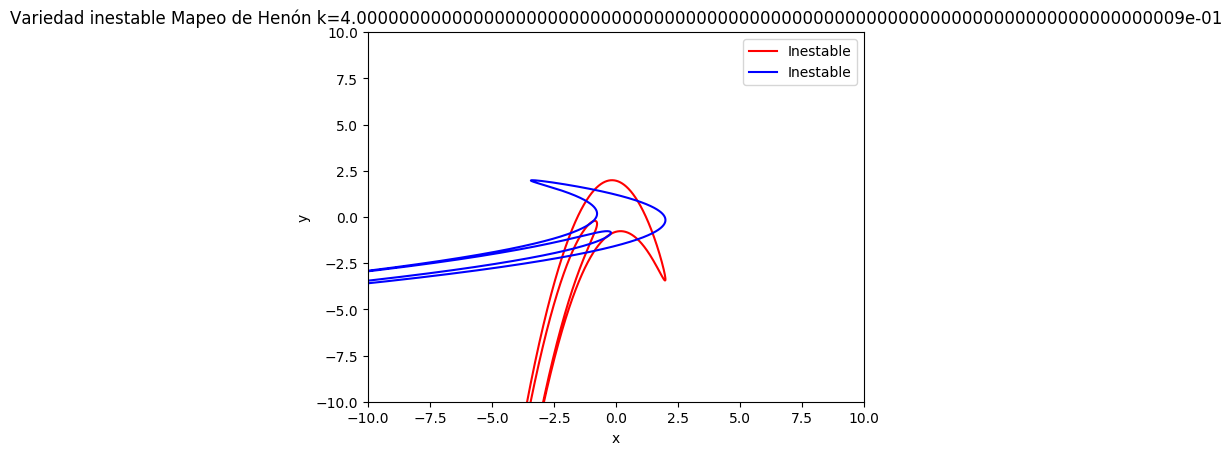

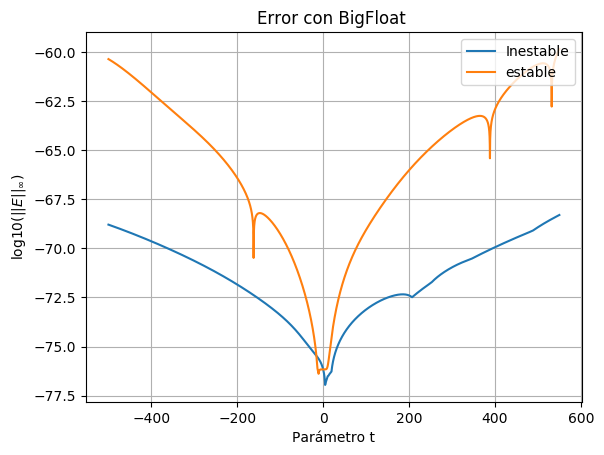

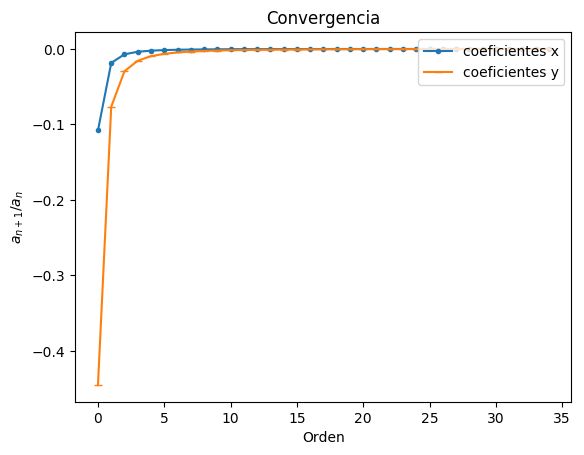

PyObject <matplotlib.legend.Legend object at 0x7f7102b21590>

In [9]:
a= parse(BigFloat,"0.4")
t=[-big(500.),big(550.)]
x1,x2=Parametro(a)
#@show(x2)
Polinomio1,E1,CxB,CyB = MetParametrización(Henon,1., 35, [x2,x2], a, big(1.), 2,t, 0.125)
P2,E2,C2x,C2y = MetParametrización(Henon,1., 35, [x2,x2], a, big(1.), 1,t, 0.125)
B=evaluar(t,0.025,Polinomio1[1],Polinomio1[2])
C=evaluar(t,0.025,P2[1],P2[2])
figure(1)
plot(B[1],B[2],color="r",label="Inestable")
plot(C[1],C[2],color="b",label="Inestable")
xlabel("x")
ylabel("y")
title("Variedad inestable Mapeo de Henón k=$a")
grid("off")
xlim(-10,10)
ylim(-10,10)
legend(loc="upper right",fancybox="true" )
figure(2)
plot(E1[1],log10(E1[2]),marker= "None", label="Inestable")
plot(E2[1],log10(E2[2]),marker= "None", label="estable")
xlabel("Parámetro t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error con BigFloat ")
grid("on")
legend(loc="upper right",fancybox="true" )

figure(3)
converXB=[]
converYB=[]
for i in 1:length(CxB)
    push!(converXB,CxB[i][1][1])
    push!(converYB,CyB[i][1][1])
end
plot(converXB,marker=".",label="coeficientes x")
plot(converYB,marker="_",label="coeficientes y")
title("Convergencia")
xlabel("Orden")
ylabel(L"$a_{n+1}/a_{n}$")
legend(loc="upper right",fancybox="true" )



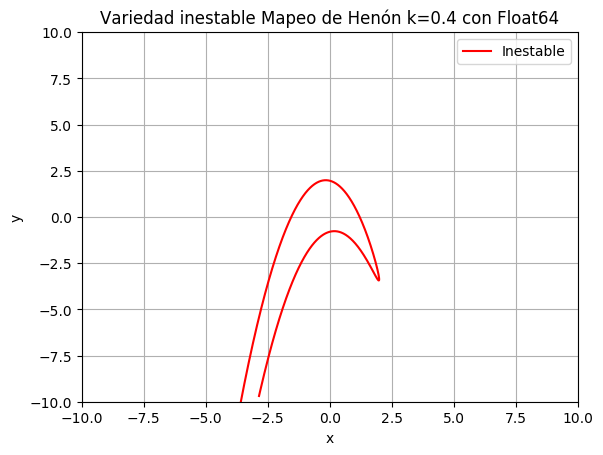

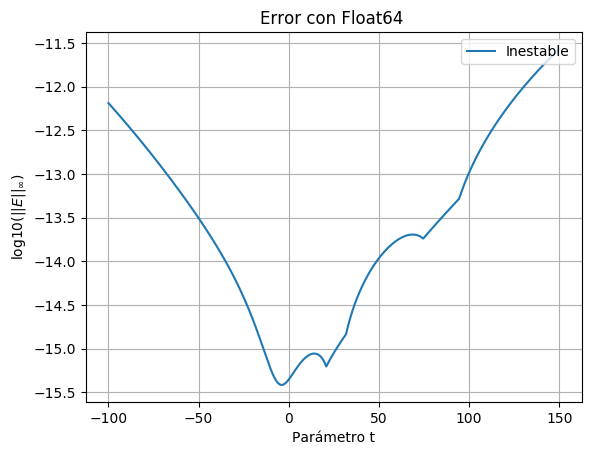

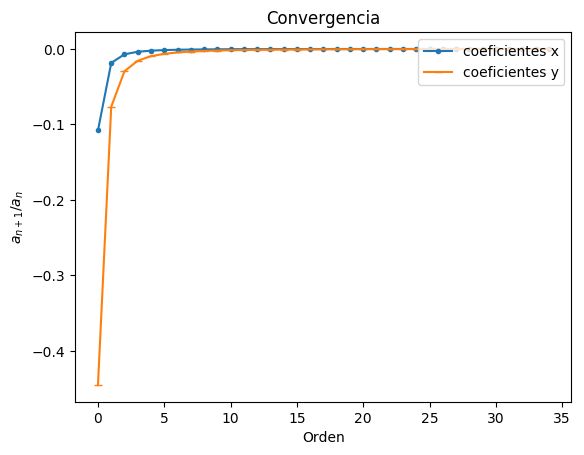

PyObject <matplotlib.legend.Legend object at 0x7f7102286dd0>

In [10]:
a=0.4
t=[-100.,150.]
x1,x2=Parametro(a)
#@show(x2)
Polinomio2,E2,CxF,CyF = MetParametrización(Henon,1., 35, [x2,x2], a, 1., 2, t, 0.125)
V=evaluar(t,0.025,Polinomio2[1],Polinomio2[2])
#pygui(true)
figure(1)
plot(V[1],V[2],color="r",label="Inestable")
xlabel("x")
ylabel("y")
title("Variedad inestable Mapeo de Henón k=0.4 con Float64")
grid("on")
xlim(-10,10)
ylim(-10,10)
legend(loc="upper right",fancybox="true" )
figure(2)
plot(E2[1],log10(E2[2]),marker= "None", label="Inestable")
xlabel("Parámetro t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error con Float64 ")
grid("on")
legend(loc="upper right",fancybox="true" )

figure(3)
converXB=[]
converYB=[]
for i in 1:length(CxB)
    push!(converXB,CxB[i][1][1])
    push!(converYB,CyB[i][1][1])
end
plot(converXB,marker=".",label="coeficientes x")
plot(converYB,marker="_",label="coeficientes y")
title("Convergencia")
xlabel("Orden")
ylabel(L"$a_{n+1}/a_{n}$")
legend(loc="upper right",fancybox="true" )


## Variedades estable e inestable con BigFloat

In [11]:
a=big(4.4)
t=[-big(200.),big(450.)]
x1,x2=Parametro(a)
#@show(x2)
Estable,ErrorE,Conver_EX,Conver_EY = MetParametrización(Henon,1., 35, [x2,x2], a, big(1.), 1,t, 0.125)
Inestable,ErrorI,Val_i,Conver_IX,Conver_IY = MetParametrización(Henon,1., 35, [x2,x2], a, big(1.), 2,t, 0.125)
E=evaluar(t,0.025,Estable[1],Estable[2])
I=evaluar(t,0.025,Inestable[1],Inestable[2])
figure(1)
plot(E[1],E[2],color="r",label="Estable")
plot(I[1],I[2],color="b",label="Inestable")
xlabel("x")
ylabel("y")
title("Variedades del Mapeo de Henón k=4.4 con BigFloat")
#grid("on")
xlim(-10,10)
ylim(-10,10)
legend(loc="upper right",fancybox="true" )
figure(2)
plot(ErrorE[1],log10(ErrorE[2]),marker= "None", label="Estable")
plot(ErrorI[1],log10(ErrorI[2]),marker= "None", label="Inestable")
xlabel("Parámetro t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error con BigFloat ")
#grid("on")
legend(loc="upper right",fancybox="true" )

figure(3)
converXE=[]
converYE=[]
converXI=[]
converYI=[]

for i in 1:length(Conver_EX)
    push!(converXE,Conver_EX[i][1][1])
    push!(converYE,Conver_EY[i][1][1])
    push!(converXI,Conver_IX[i][1][1])
    push!(converYI,Conver_IY[i][1][1])
end
plot(converXE,marker=".",label="X estable")
plot(converYE,marker=".",label="Y estable")
plot(converXI,marker="*",label="X inestable")
plot(converYI,marker="*",label="Y inestable")
title("Convergencia")
xlabel("Orden")
ylabel(L"$a_{n+1}/a_{n}$")
legend(loc="upper right",fancybox="true" )



LoadError: BoundsError: attempt to access (TaylorSeries.Taylor1{BigFloat}[ - 3.323790007724450207549786527856250514988406321001072527809800815323496739472809 + 1.52203996230988872361340654424789624725897165275740597187375376396491843259245e-01 t - 6.51780263380791936482351289547188214680835824924485430884527750927296783098386e-04 t² + 7.426295360028953769601128128551158712604966079020502140038729210164856311271895e-07 t³ - 3.674431920536583192820561853383875292039403708671494834065903917218828681909329e-10 t⁴ + 9.358757424898243615645055526029645154904940973338560034185805120160839244653105e-14 t⁵ - 1.412592966505332779774503527233957819463175031176755893574895067705028958190036e-17 t⁶ + 1.380429917559058594931216739059492184775108934748097129411329494098159518957236e-21 t⁷ - 9.263441712074751183331647323171992419038802498582877873019119375952047967673434e-26 t⁸ + 4.461322488589509868039339865202757350237113630702084831805450407289395431590715e-30 t⁹ - 1.598751598573464209523644583260918630107754585177214093089670039459290913105087e-34 t¹⁰ + 4.392147664939188327755373298242577567303403918863350093311663714950553353141181e-39 t¹¹ - 9.479416519018119047053208193392851349473112601957413402836140823092265738192400e-44 t¹² + 1.639997297112233658728503281314733481850900241889898818870928882584861649203969e-48 t¹³ - 2.312853478676728641412000810503753500874258738580674597804564135239762626803926e-53 t¹⁴ + 2.696956856936237271613745128528735708756158535244536652355585678191115674096195e-58 t¹⁵ - 2.632442826729354753982368375139625466984885183405778673820293745221962508754425e-63 t¹⁶ + 2.174180421702239725690347517980793357888477723196546741684322490504489002410253e-68 t¹⁷ - 1.534134295530737389290546750104661386629028755298508584668254752897887691946259e-73 t¹⁸ + 9.328618585100073733804459987517132811848335511103300495741988325550322121530689e-79 t¹⁹ - 4.926614725091525672351226410973399303687661958152076775472552821158089403531996e-84 t²⁰ + 2.275772425912876112038713494976547982737999614492238411592138335260091462564134e-89 t²¹ - 9.254345167967998066949284013030229523087121834622433357744798265220966050525357e-95 t²² + 3.332218618311495383071314457620526791894727420628495147155433618996447344518482e-100 t²³ - 1.068072547523168627330970713192007265518533192683518785313819742158107347307938e-105 t²⁴ + 3.062355198566783501452884261586063219422107692719832744791403419157893801580403e-111 t²⁵ - 7.889121165083930242899482156837433607266009959812928773749155950937727557613261e-117 t²⁶ + 1.83355615330036436667357423877486446684400753128633100007200333858373260466854e-122 t²⁷ - 3.85912516641777182935560539811883508352685717038508990268487251851342191035636e-128 t²⁸ + 7.381215426331883445009912083945320350872053858096540453459419922435486071170529e-134 t²⁹ - 1.287122034392080926767218647233756045805140012946378388395224488802382774341879e-139 t³⁰ + 2.052477584557539149345459143411878671949795025506309894562901760537966482522552e-145 t³¹ - 3.001471071380586248510169944407796764964367176521460366289523660239597509541632e-151 t³² + 4.03591755112992787783857960958941682813058036425245143155886397930846034542236e-157 t³³ - 5.002543610797719974282165828476198493528494403951991752063144481120404856001445e-163 t³⁴ + 5.729374199936203156165983709141738266636699701782436945197249435061957697359063e-169 t³⁵ + 𝒪(t³⁶), - 3.323790007724450207549786527856250514988406321001072527809800815323496739472809 + 9.883491000306101989346917751657783395311942239424469346251040094314089130191848e-01 t - 2.748336065980152290915001268155503278741659863385662113939900520720162547534485e-02 t² + 2.033410985797453723062634917767126101743600265233365882169527184537040893521712e-04 t³ - 6.533222792923120180326045385729521784654974773783556578162014647300334227953383e-07 t⁴ + 1.080537316359978270428390895685271168390380021559757077950138324382556149217773e-09 t⁵ - 1.059065777388147300888439754557821631914658284412508364158918780656392234546571e-12 t⁶ + 6.720546244372996997984957201627837385079512367581039170352238097791081707994959e-16 t⁷ - 2.928511270766816240073825037699639864537357288487682256998807743353663194477101e-19 t⁸ + 9.158460148718324705387533543946692993992636310749859231547941772778544899993572e-23 t⁹ - 2.131199718042048387611139434307915557596496871961439992884103149190748138645675e-26 t¹⁰ + 3.801932542132149172293209135609420852223338352006525417171977023955731504171896e-30 t¹¹ - 5.328357998358646993045943425231903860258104106636862900136643415116455918221254e-34 t¹² + 5.986034810741754485171750932380643541636475907409922002334520730320209828657715e-38 t¹³ - 5.481867602827970712111863906875285634268459028162821187588479601977454635310133e-42 t¹⁴ + 4.150866220273754085733327474200714529527302325061731545238853056994773716876758e-46 t¹⁵ - 2.630922171734936631612821536349734073343907231701340541793168567713000741883836e-50 t¹⁶ + 1.411006289968577295659666650254059788583936074891396852599875391800403870280604e-54 t¹⁷ - 6.465186592549825860527478051856329247446012577747846564788538635957835320833384e-59 t¹⁸ + 2.552814966862102369318181711589351629560231608008447762713760078817775180576492e-63 t¹⁹ - 8.754571966618644324228864304099062282420136637192188492015178354349687397701697e-68 t²⁰ + 2.626028671414872967521164749535020165374237826695972673085734416404198310292024e-72 t²¹ - 6.934268311021801839698800254457199379863118286661178625489648408497322144073712e-77 t²² + 1.621334972834588126388577020388922859834643765918816127090382692790513992684029e-81 t²³ - 3.374615776539503711540330185124134923983769595023796816576406328596420787638309e-86 t²⁴ + 6.282947897754686099220051215826410269806021425326030190720543285134581731602277e-91 t²⁵ - 1.051043855919780620333503369161186621374100603502615947033683737177236534806501e-95 t²⁶ + 1.58624673917662993666325917068793444551052560113521201133798478284531138038584e-100 t²⁷ - 2.167952227194531461103012957472240844302556477526633532059680108207655884428428e-105 t²⁸ + 2.692607429631281804616295739275471890557772625047175584142780810681517077221625e-110 t²⁹ - 3.048942260785023698564357442994470959896852379331741291521313003052427935281765e-115 t³⁰ + 3.157128171700751082829456391982209426408524593033004186168539020556490623275587e-120 t³¹ - 2.998004417782505155401193084072198901853840100548885263617975508275175194354518e-125 t³² + 2.617729142660639308325836419714581391040975653203197652279311743839188395088076e-130 t³³ - 2.10696645665457547147308903484265860854657312018299825422829757586753938879178e-135 t³⁴ + 1.56696119708975867528546451294610201710690435012726259466469026520387003341172e-140 t³⁵ + 𝒪(t³⁶)],Array{BigFloat,1}[BigFloat[-2.000000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.998750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.997500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.996250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.995000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.993750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.992500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.991250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.990000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.988750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.987500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.986250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.985000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.983750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.982500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.981250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.980000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.978750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.977500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.976250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.975000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.973750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.972500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.971250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.970000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.968750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.967500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.966250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.965000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.963750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.962500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.961250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.960000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.958750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.957500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.956250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.955000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.953750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.952500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.951250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.950000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.948750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.947500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.946250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.945000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.943750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.942500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.941250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.940000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.938750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.937500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.936250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.935000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.933750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.932500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.931250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.930000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.928750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.927500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.926250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.925000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.923750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.922500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.921250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.920000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.918750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.917500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.916250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.915000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.913750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.912500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.911250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.910000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.908750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.907500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.906250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.905000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.903750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.902500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.901250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.900000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.898750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.897500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.896250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.895000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.893750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.892500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.891250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.890000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.888750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.887500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.886250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.885000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.883750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.882500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.881250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.880000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.878750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.877500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.876250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.875000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.873750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.872500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.871250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.870000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.868750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.867500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.866250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.865000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.863750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.862500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.861250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.860000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.858750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.857500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.856250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.855000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.853750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.852500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.851250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.850000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.848750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.847500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.846250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.845000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.843750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.842500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.841250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.840000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.838750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.837500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.836250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.835000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.833750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.832500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.831250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.830000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.828750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.827500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.826250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.825000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.823750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.822500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.821250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.820000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.818750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.817500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.816250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.815000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.813750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.812500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.811250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.810000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.808750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.807500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.806250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.805000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.803750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.802500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.801250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.800000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.798750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.797500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.796250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.795000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.793750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.792500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.791250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.790000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.788750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.787500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.786250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.785000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.783750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.782500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.781250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.780000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.778750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.777500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.776250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.775000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.773750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.772500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.771250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.770000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.768750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.767500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.766250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.765000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.763750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.762500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.761250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.760000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.758750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.757500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.756250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.755000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.753750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.752500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.751250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.750000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.748750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.747500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.746250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.745000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.743750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.742500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.741250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.740000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.738750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.737500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.736250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.735000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.733750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.732500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.731250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.730000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.728750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.727500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.726250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.725000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.723750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.722500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.721250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.720000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.718750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.717500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.716250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.715000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.713750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.712500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.711250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.710000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.708750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.707500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.706250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.705000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.703750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.702500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.701250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.700000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.698750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.697500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.696250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.695000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.693750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.692500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.691250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.690000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.688750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.687500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.686250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.685000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.683750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.682500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.681250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.680000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.678750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.677500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.676250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.675000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.673750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.672500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.671250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.670000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.668750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.667500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.666250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.665000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.663750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.662500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.661250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.660000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.658750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.657500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.656250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.655000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.653750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.652500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.651250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.650000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.648750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.647500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.646250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.645000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.643750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.642500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.641250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.640000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.638750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.637500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.636250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.635000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.633750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.632500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.631250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.630000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.628750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.627500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.626250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.625000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.623750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.622500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.621250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.620000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.618750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.617500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.616250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.615000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.613750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.612500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.611250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.610000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.608750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.607500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.606250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.605000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.603750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.602500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.601250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.600000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.598750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.597500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.596250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.595000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.593750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.592500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.591250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.590000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.588750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.587500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.586250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.585000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.583750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.582500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.581250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.580000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.578750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.577500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.576250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.575000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.573750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.572500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.571250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.570000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.568750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.567500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.566250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.565000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.563750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.562500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.561250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.560000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.558750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.557500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.556250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.555000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.553750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.552500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.551250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.550000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.548750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.547500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.546250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.545000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.543750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.542500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.541250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.540000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.538750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.537500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.536250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.535000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.533750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.532500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.531250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.530000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.528750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.527500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.526250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.525000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.523750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.522500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.521250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.520000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.518750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.517500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.516250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.515000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.513750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.512500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.511250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.510000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.508750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.507500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.506250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.505000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.503750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.502500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.501250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.500000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.498750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.497500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.496250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.495000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.493750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.492500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.491250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.490000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.488750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.487500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.486250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.485000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.483750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.482500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.481250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.480000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.478750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.477500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.476250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.475000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.473750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.472500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.471250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.470000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.468750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.467500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.466250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.465000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.463750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.462500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.461250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.460000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.458750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.457500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.456250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.455000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.453750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.452500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.451250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.450000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.448750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.447500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.446250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.445000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.443750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.442500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.441250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.440000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.438750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.437500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.436250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.435000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.433750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.432500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.431250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.430000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.428750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.427500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.426250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.425000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.423750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.422500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.421250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.420000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.418750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.417500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.416250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.415000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.413750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.412500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.411250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.410000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.408750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.407500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.406250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.405000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.403750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.402500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.401250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.400000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.398750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.397500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.396250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.395000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.393750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.392500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.391250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.390000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.388750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.387500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.386250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.385000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.383750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.382500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.381250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.380000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.378750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.377500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.376250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.375000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.373750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.372500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.371250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.370000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.368750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.367500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.366250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.365000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.363750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.362500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.361250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.360000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.358750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.357500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.356250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.355000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.353750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.352500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.351250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.350000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.348750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.347500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.346250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.345000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.343750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.342500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.341250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.340000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.338750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.337500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.336250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.335000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.333750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.332500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.331250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.330000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.328750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.327500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.326250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.325000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.323750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.322500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.321250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.320000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.318750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.317500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.316250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.315000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.313750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.312500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.311250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.310000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.308750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.307500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.306250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.305000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.303750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.302500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.301250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.300000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.298750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.297500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.296250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.295000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.293750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.292500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.291250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.290000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.288750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.287500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.286250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.285000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.283750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.282500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.281250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.280000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.278750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.277500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.276250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.275000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.273750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.272500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.271250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.270000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.268750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.267500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.266250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.265000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.263750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.262500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.261250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.260000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.258750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.257500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.256250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.255000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.253750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.252500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.251250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.250000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.248750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.247500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.246250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.245000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.243750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.242500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.241250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.240000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.238750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.237500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.236250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.235000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.233750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.232500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.231250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.230000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.228750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.227500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.226250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.225000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.223750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.222500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.221250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.220000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.218750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.217500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.216250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.215000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.213750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.212500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.211250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.210000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.208750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.207500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.206250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.205000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.203750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.202500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.201250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.200000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.198750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.197500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.196250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.195000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.193750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.192500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.191250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.190000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.188750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.187500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.186250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.185000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.183750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.182500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.181250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.180000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.178750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.177500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.176250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.175000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.173750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.172500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.171250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.170000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.168750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.167500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.166250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.165000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.163750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.162500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.161250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.160000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.158750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.157500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.156250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.155000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.153750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.152500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.151250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.150000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.148750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.147500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.146250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.145000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.143750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.142500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.141250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.140000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.138750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.137500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.136250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.135000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.133750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.132500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.131250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.130000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.128750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.127500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.126250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.125000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.123750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.122500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.121250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.120000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.118750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.117500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.116250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.115000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.113750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.112500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.111250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.110000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.108750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.107500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.106250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.105000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.103750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.102500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.101250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.100000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.098750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.097500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.096250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.095000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.093750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.092500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.091250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.090000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.088750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.087500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.086250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.085000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.083750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.082500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.081250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.080000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.078750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.077500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.076250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.075000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.073750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.072500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.071250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.070000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.068750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.067500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.066250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.065000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.063750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.062500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.061250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.060000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.058750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.057500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.056250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.055000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.053750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.052500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.051250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.050000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.048750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.047500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.046250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.045000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.043750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.042500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.041250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.040000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.038750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.037500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.036250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.035000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.033750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.032500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.031250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.030000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.028750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.027500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.026250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.025000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.023750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.022500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.021250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.020000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.018750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.017500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.016250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.015000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.013750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.012500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.011250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.010000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.008750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.007500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.006250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.005000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.003750000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.002500000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.001250000000000000000000000000000000000000000000000000000000000000000000000000e+02,-1.000000000000000000000000000000000000000000000000000000000000000000000000000000e+02,-9.987500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.975000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.962500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.950000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.937500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.925000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.912500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.900000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.887500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.875000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.862500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.850000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.837500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.825000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.812500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.800000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.787500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.775000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.762500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.750000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.737500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.725000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.712500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.700000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.687500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.675000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.662500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.650000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.637500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.625000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.612500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.600000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.587500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.575000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.562500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.550000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.537500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.525000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.512500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.500000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.487500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.475000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.462500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.450000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.437500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.425000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.412500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.400000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.387500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.375000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.362500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.350000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.337500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.325000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.312500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.300000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.287500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.275000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.262500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.250000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.237500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.225000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.212500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.200000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.187500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.175000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.162500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.150000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.137500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.125000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.112500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.100000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.087500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.075000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.062500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.050000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.037500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.025000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.012500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.000000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.987500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.975000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.962500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.950000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.937500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.925000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.912500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.900000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.887500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.875000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.862500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.850000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.837500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.825000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.812500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.800000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.787500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.775000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.762500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.750000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.737500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.725000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.712500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.700000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.687500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.675000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.662500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.650000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.637500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.625000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.612500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.600000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.587500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.575000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.562500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.550000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.537500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.525000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.512500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.500000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.487500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.475000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.462500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.450000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.437500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.425000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.412500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.400000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.387500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.375000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.362500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.350000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.337500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.325000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.312500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.300000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.287500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.275000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.262500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.250000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.237500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.225000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.212500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.200000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.187500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.175000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.162500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.150000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.137500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.125000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.112500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.100000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.087500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.075000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.062500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.050000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.037500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.025000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.012500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-8.000000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.987500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.975000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.962500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.950000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.937500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.925000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.912500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.900000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.887500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.875000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.862500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.850000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.837500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.825000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.812500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.800000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.787500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.775000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.762500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.750000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.737500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.725000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.712500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.700000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.687500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.675000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.662500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.650000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.637500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.625000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.612500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.600000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.587500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.575000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.562500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.550000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.537500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.525000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.512500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.500000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.487500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.475000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.462500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.450000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.437500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.425000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.412500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.400000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.387500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.375000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.362500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.350000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.337500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.325000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.312500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.300000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.287500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.275000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.262500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.250000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.237500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.225000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.212500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.200000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.187500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.175000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.162500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.150000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.137500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.125000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.112500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.100000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.087500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.075000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.062500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.050000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.037500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.025000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.012500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-7.000000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.987500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.975000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.962500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.950000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.937500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.925000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.912500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.900000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.887500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.875000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.862500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.850000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.837500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.825000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.812500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.800000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.787500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.775000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.762500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.750000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.737500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.725000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.712500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.700000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.687500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.675000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.662500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.650000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.637500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.625000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.612500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.600000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.587500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.575000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.562500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.550000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.537500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.525000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.512500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.500000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.487500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.475000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.462500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.450000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.437500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.425000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.412500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.400000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.387500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.375000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.362500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.350000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.337500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.325000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.312500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.300000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.287500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.275000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.262500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.250000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.237500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.225000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.212500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.200000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.187500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.175000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.162500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.150000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.137500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.125000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.112500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.100000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.087500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.075000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.062500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.050000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.037500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.025000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.012500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-6.000000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.987500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.975000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.962500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.950000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.937500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.925000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.912500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.900000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.887500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.875000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.862500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.850000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.837500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.825000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.812500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.800000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.787500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.775000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.762500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.750000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.737500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.725000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.712500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.700000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.687500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.675000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.662500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.650000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.637500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.625000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.612500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.600000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.587500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.575000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.562500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.550000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.537500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.525000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.512500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.500000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.487500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.475000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.462500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.450000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.437500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.425000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.412500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.400000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.387500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.375000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.362500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.350000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.337500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.325000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.312500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.300000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.287500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.275000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.262500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.250000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.237500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.225000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.212500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.200000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.187500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.175000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.162500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.150000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.137500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.125000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.112500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.100000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.087500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.075000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.062500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.050000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.037500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.025000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.012500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-5.000000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.987500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.975000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.962500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.950000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.937500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.925000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.912500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.900000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.887500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.875000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.862500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.850000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.837500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.825000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.812500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.800000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.787500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.775000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.762500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.750000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.737500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.725000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.712500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.700000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.687500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.675000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.662500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.650000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.637500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.625000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.612500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.600000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.587500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.575000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.562500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.550000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.537500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.525000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.512500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.500000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.487500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.475000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.462500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.450000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.437500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.425000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.412500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.400000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.387500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.375000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.362500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.350000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.337500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.325000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.312500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.300000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.287500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.275000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.262500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.250000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.237500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.225000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.212500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.200000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.187500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.175000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.162500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.150000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.137500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.125000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.112500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.100000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.087500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.075000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.062500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.050000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.037500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.025000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.012500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-4.000000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.987500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.975000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.962500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.950000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.937500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.925000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.912500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.900000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.887500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.875000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.862500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.850000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.837500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.825000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.812500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.800000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.787500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.775000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.762500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.750000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.737500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.725000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.712500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.700000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.687500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.675000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.662500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.650000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.637500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.625000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.612500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.600000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.587500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.575000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.562500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.550000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.537500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.525000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.512500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.500000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.487500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.475000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.462500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.450000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.437500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.425000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.412500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.400000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.387500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.375000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.362500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.350000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.337500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.325000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.312500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.300000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.287500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.275000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.262500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.250000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.237500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.225000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.212500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.200000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.187500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.175000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.162500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.150000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.137500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.125000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.112500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.100000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.087500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.075000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.062500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.050000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.037500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.025000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.012500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-3.000000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.987500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.975000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.962500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.950000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.937500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.925000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.912500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.900000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.887500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.875000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.862500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.850000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.837500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.825000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.812500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.800000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.787500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.775000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.762500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.750000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.737500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.725000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.712500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.700000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.687500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.675000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.662500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.650000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.637500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.625000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.612500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.600000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.587500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.575000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.562500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.550000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.537500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.525000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.512500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.500000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.487500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.475000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.462500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.450000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.437500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.425000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.412500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.400000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.387500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.375000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.362500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.350000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.337500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.325000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.312500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.300000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.287500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.275000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.262500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.250000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.237500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.225000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.212500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.200000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.187500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.175000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.162500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.150000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.137500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.125000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.112500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.100000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.087500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.075000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.062500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.050000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.037500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.025000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.012500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-2.000000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.987500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.975000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.962500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.950000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.937500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.925000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.912500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.900000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.887500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.875000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.862500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.850000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.837500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.825000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.812500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.800000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.787500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.775000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.762500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.750000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.737500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.725000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.712500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.700000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.687500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.675000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.662500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.650000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.637500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.625000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.612500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.600000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.587500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.575000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.562500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.550000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.537500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.525000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.512500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.500000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.487500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.475000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.462500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.450000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.437500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.425000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.412500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.400000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.387500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.375000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.362500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.350000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.337500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.325000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.312500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.300000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.287500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.275000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.262500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.250000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.237500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.225000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.212500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.200000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.187500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.175000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.162500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.150000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.137500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.125000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.112500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.100000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.087500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.075000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.062500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.050000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.037500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.025000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.012500000000000000000000000000000000000000000000000000000000000000000000000000e+01,-1.000000000000000000000000000000000000000000000000000000000000000000000000000000e+01,-9.875000000000000000000000000000000000000000000000000000000000000000000000000000,-9.750000000000000000000000000000000000000000000000000000000000000000000000000000,-9.625000000000000000000000000000000000000000000000000000000000000000000000000000,-9.500000000000000000000000000000000000000000000000000000000000000000000000000000,-9.375000000000000000000000000000000000000000000000000000000000000000000000000000,-9.250000000000000000000000000000000000000000000000000000000000000000000000000000,-9.125000000000000000000000000000000000000000000000000000000000000000000000000000,-9.000000000000000000000000000000000000000000000000000000000000000000000000000000,-8.875000000000000000000000000000000000000000000000000000000000000000000000000000,-8.750000000000000000000000000000000000000000000000000000000000000000000000000000,-8.625000000000000000000000000000000000000000000000000000000000000000000000000000,-8.500000000000000000000000000000000000000000000000000000000000000000000000000000,-8.375000000000000000000000000000000000000000000000000000000000000000000000000000,-8.250000000000000000000000000000000000000000000000000000000000000000000000000000,-8.125000000000000000000000000000000000000000000000000000000000000000000000000000,-8.000000000000000000000000000000000000000000000000000000000000000000000000000000,-7.875000000000000000000000000000000000000000000000000000000000000000000000000000,-7.750000000000000000000000000000000000000000000000000000000000000000000000000000,-7.625000000000000000000000000000000000000000000000000000000000000000000000000000,-7.500000000000000000000000000000000000000000000000000000000000000000000000000000,-7.375000000000000000000000000000000000000000000000000000000000000000000000000000,-7.250000000000000000000000000000000000000000000000000000000000000000000000000000,-7.125000000000000000000000000000000000000000000000000000000000000000000000000000,-7.000000000000000000000000000000000000000000000000000000000000000000000000000000,-6.875000000000000000000000000000000000000000000000000000000000000000000000000000,-6.750000000000000000000000000000000000000000000000000000000000000000000000000000,-6.625000000000000000000000000000000000000000000000000000000000000000000000000000,-6.500000000000000000000000000000000000000000000000000000000000000000000000000000,-6.375000000000000000000000000000000000000000000000000000000000000000000000000000,-6.250000000000000000000000000000000000000000000000000000000000000000000000000000,-6.125000000000000000000000000000000000000000000000000000000000000000000000000000,-6.000000000000000000000000000000000000000000000000000000000000000000000000000000,-5.875000000000000000000000000000000000000000000000000000000000000000000000000000,-5.750000000000000000000000000000000000000000000000000000000000000000000000000000,-5.625000000000000000000000000000000000000000000000000000000000000000000000000000,-5.500000000000000000000000000000000000000000000000000000000000000000000000000000,-5.375000000000000000000000000000000000000000000000000000000000000000000000000000,-5.250000000000000000000000000000000000000000000000000000000000000000000000000000,-5.125000000000000000000000000000000000000000000000000000000000000000000000000000,-5.000000000000000000000000000000000000000000000000000000000000000000000000000000,-4.875000000000000000000000000000000000000000000000000000000000000000000000000000,-4.750000000000000000000000000000000000000000000000000000000000000000000000000000,-4.625000000000000000000000000000000000000000000000000000000000000000000000000000,-4.500000000000000000000000000000000000000000000000000000000000000000000000000000,-4.375000000000000000000000000000000000000000000000000000000000000000000000000000,-4.250000000000000000000000000000000000000000000000000000000000000000000000000000,-4.125000000000000000000000000000000000000000000000000000000000000000000000000000,-4.000000000000000000000000000000000000000000000000000000000000000000000000000000,-3.875000000000000000000000000000000000000000000000000000000000000000000000000000,-3.750000000000000000000000000000000000000000000000000000000000000000000000000000,-3.625000000000000000000000000000000000000000000000000000000000000000000000000000,-3.500000000000000000000000000000000000000000000000000000000000000000000000000000,-3.375000000000000000000000000000000000000000000000000000000000000000000000000000,-3.250000000000000000000000000000000000000000000000000000000000000000000000000000,-3.125000000000000000000000000000000000000000000000000000000000000000000000000000,-3.000000000000000000000000000000000000000000000000000000000000000000000000000000,-2.875000000000000000000000000000000000000000000000000000000000000000000000000000,-2.750000000000000000000000000000000000000000000000000000000000000000000000000000,-2.625000000000000000000000000000000000000000000000000000000000000000000000000000,-2.500000000000000000000000000000000000000000000000000000000000000000000000000000,-2.375000000000000000000000000000000000000000000000000000000000000000000000000000,-2.250000000000000000000000000000000000000000000000000000000000000000000000000000,-2.125000000000000000000000000000000000000000000000000000000000000000000000000000,-2.000000000000000000000000000000000000000000000000000000000000000000000000000000,-1.875000000000000000000000000000000000000000000000000000000000000000000000000000,-1.750000000000000000000000000000000000000000000000000000000000000000000000000000,-1.625000000000000000000000000000000000000000000000000000000000000000000000000000,-1.500000000000000000000000000000000000000000000000000000000000000000000000000000,-1.375000000000000000000000000000000000000000000000000000000000000000000000000000,-1.250000000000000000000000000000000000000000000000000000000000000000000000000000,-1.125000000000000000000000000000000000000000000000000000000000000000000000000000,-1.000000000000000000000000000000000000000000000000000000000000000000000000000000,-8.750000000000000000000000000000000000000000000000000000000000000000000000000000e-01,-7.500000000000000000000000000000000000000000000000000000000000000000000000000000e-01,-6.250000000000000000000000000000000000000000000000000000000000000000000000000000e-01,-5.000000000000000000000000000000000000000000000000000000000000000000000000000000e-01,-3.750000000000000000000000000000000000000000000000000000000000000000000000000000e-01,-2.500000000000000000000000000000000000000000000000000000000000000000000000000000e-01,-1.250000000000000000000000000000000000000000000000000000000000000000000000000000e-01,0.000000000000000000000000000000000000000000000000000000000000000000000000000000,1.250000000000000000000000000000000000000000000000000000000000000000000000000000e-01,2.500000000000000000000000000000000000000000000000000000000000000000000000000000e-01,3.750000000000000000000000000000000000000000000000000000000000000000000000000000e-01,5.000000000000000000000000000000000000000000000000000000000000000000000000000000e-01,6.250000000000000000000000000000000000000000000000000000000000000000000000000000e-01,7.500000000000000000000000000000000000000000000000000000000000000000000000000000e-01,8.750000000000000000000000000000000000000000000000000000000000000000000000000000e-01,1.000000000000000000000000000000000000000000000000000000000000000000000000000000,1.125000000000000000000000000000000000000000000000000000000000000000000000000000,1.250000000000000000000000000000000000000000000000000000000000000000000000000000,1.375000000000000000000000000000000000000000000000000000000000000000000000000000,1.500000000000000000000000000000000000000000000000000000000000000000000000000000,1.625000000000000000000000000000000000000000000000000000000000000000000000000000,1.750000000000000000000000000000000000000000000000000000000000000000000000000000,1.875000000000000000000000000000000000000000000000000000000000000000000000000000,2.000000000000000000000000000000000000000000000000000000000000000000000000000000,2.125000000000000000000000000000000000000000000000000000000000000000000000000000,2.250000000000000000000000000000000000000000000000000000000000000000000000000000,2.375000000000000000000000000000000000000000000000000000000000000000000000000000,2.500000000000000000000000000000000000000000000000000000000000000000000000000000,2.625000000000000000000000000000000000000000000000000000000000000000000000000000,2.750000000000000000000000000000000000000000000000000000000000000000000000000000,2.875000000000000000000000000000000000000000000000000000000000000000000000000000,3.000000000000000000000000000000000000000000000000000000000000000000000000000000,3.125000000000000000000000000000000000000000000000000000000000000000000000000000,3.250000000000000000000000000000000000000000000000000000000000000000000000000000,3.375000000000000000000000000000000000000000000000000000000000000000000000000000,3.500000000000000000000000000000000000000000000000000000000000000000000000000000,3.625000000000000000000000000000000000000000000000000000000000000000000000000000,3.750000000000000000000000000000000000000000000000000000000000000000000000000000,3.875000000000000000000000000000000000000000000000000000000000000000000000000000,4.000000000000000000000000000000000000000000000000000000000000000000000000000000,4.125000000000000000000000000000000000000000000000000000000000000000000000000000,4.250000000000000000000000000000000000000000000000000000000000000000000000000000,4.375000000000000000000000000000000000000000000000000000000000000000000000000000,4.500000000000000000000000000000000000000000000000000000000000000000000000000000,4.625000000000000000000000000000000000000000000000000000000000000000000000000000,4.750000000000000000000000000000000000000000000000000000000000000000000000000000,4.875000000000000000000000000000000000000000000000000000000000000000000000000000,5.000000000000000000000000000000000000000000000000000000000000000000000000000000,5.125000000000000000000000000000000000000000000000000000000000000000000000000000,5.250000000000000000000000000000000000000000000000000000000000000000000000000000,5.375000000000000000000000000000000000000000000000000000000000000000000000000000,5.500000000000000000000000000000000000000000000000000000000000000000000000000000,5.625000000000000000000000000000000000000000000000000000000000000000000000000000,5.750000000000000000000000000000000000000000000000000000000000000000000000000000,5.875000000000000000000000000000000000000000000000000000000000000000000000000000,6.000000000000000000000000000000000000000000000000000000000000000000000000000000,6.125000000000000000000000000000000000000000000000000000000000000000000000000000,6.250000000000000000000000000000000000000000000000000000000000000000000000000000,6.375000000000000000000000000000000000000000000000000000000000000000000000000000,6.500000000000000000000000000000000000000000000000000000000000000000000000000000,6.625000000000000000000000000000000000000000000000000000000000000000000000000000,6.750000000000000000000000000000000000000000000000000000000000000000000000000000,6.875000000000000000000000000000000000000000000000000000000000000000000000000000,7.000000000000000000000000000000000000000000000000000000000000000000000000000000,7.125000000000000000000000000000000000000000000000000000000000000000000000000000,7.250000000000000000000000000000000000000000000000000000000000000000000000000000,7.375000000000000000000000000000000000000000000000000000000000000000000000000000,7.500000000000000000000000000000000000000000000000000000000000000000000000000000,7.625000000000000000000000000000000000000000000000000000000000000000000000000000,7.750000000000000000000000000000000000000000000000000000000000000000000000000000,7.875000000000000000000000000000000000000000000000000000000000000000000000000000,8.000000000000000000000000000000000000000000000000000000000000000000000000000000,8.125000000000000000000000000000000000000000000000000000000000000000000000000000,8.250000000000000000000000000000000000000000000000000000000000000000000000000000,8.375000000000000000000000000000000000000000000000000000000000000000000000000000,8.500000000000000000000000000000000000000000000000000000000000000000000000000000,8.625000000000000000000000000000000000000000000000000000000000000000000000000000,8.750000000000000000000000000000000000000000000000000000000000000000000000000000,8.875000000000000000000000000000000000000000000000000000000000000000000000000000,9.000000000000000000000000000000000000000000000000000000000000000000000000000000,9.125000000000000000000000000000000000000000000000000000000000000000000000000000,9.250000000000000000000000000000000000000000000000000000000000000000000000000000,9.375000000000000000000000000000000000000000000000000000000000000000000000000000,9.500000000000000000000000000000000000000000000000000000000000000000000000000000,9.625000000000000000000000000000000000000000000000000000000000000000000000000000,9.750000000000000000000000000000000000000000000000000000000000000000000000000000,9.875000000000000000000000000000000000000000000000000000000000000000000000000000,1.000000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.012500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.025000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.037500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.050000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.062500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.075000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.087500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.100000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.112500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.125000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.137500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.150000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.162500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.175000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.187500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.200000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.212500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.225000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.237500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.250000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.262500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.275000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.287500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.300000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.312500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.325000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.337500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.350000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.362500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.375000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.387500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.400000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.412500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.425000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.437500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.450000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.462500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.475000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.487500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.500000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.512500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.525000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.537500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.550000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.562500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.575000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.587500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.600000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.612500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.625000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.637500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.650000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.662500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.675000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.687500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.700000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.712500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.725000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.737500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.750000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.762500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.775000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.787500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.800000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.812500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.825000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.837500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.850000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.862500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.875000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.887500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.900000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.912500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.925000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.937500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.950000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.962500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.975000000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.987500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.000000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.012500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.025000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.037500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.050000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.062500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.075000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.087500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.100000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.112500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.125000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.137500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.150000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.162500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.175000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.187500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.200000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.212500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.225000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.237500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.250000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.262500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.275000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.287500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.300000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.312500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.325000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.337500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.350000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.362500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.375000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.387500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.400000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.412500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.425000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.437500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.450000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.462500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.475000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.487500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.500000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.512500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.525000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.537500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.550000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.562500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.575000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.587500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.600000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.612500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.625000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.637500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.650000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.662500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.675000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.687500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.700000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.712500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.725000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.737500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.750000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.762500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.775000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.787500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.800000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.812500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.825000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.837500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.850000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.862500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.875000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.887500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.900000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.912500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.925000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.937500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.950000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.962500000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.975000000000000000000000000000000000000000000000000000000000000000000000000000e+01,2.987500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.000000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.012500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.025000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.037500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.050000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.062500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.075000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.087500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.100000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.112500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.125000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.137500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.150000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.162500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.175000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.187500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.200000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.212500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.225000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.237500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.250000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.262500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.275000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.287500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.300000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.312500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.325000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.337500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.350000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.362500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.375000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.387500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.400000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.412500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.425000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.437500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.450000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.462500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.475000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.487500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.500000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.512500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.525000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.537500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.550000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.562500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.575000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.587500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.600000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.612500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.625000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.637500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.650000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.662500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.675000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.687500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.700000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.712500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.725000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.737500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.750000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.762500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.775000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.787500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.800000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.812500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.825000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.837500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.850000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.862500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.875000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.887500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.900000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.912500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.925000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.937500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.950000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.962500000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.975000000000000000000000000000000000000000000000000000000000000000000000000000e+01,3.987500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.000000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.012500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.025000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.037500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.050000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.062500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.075000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.087500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.100000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.112500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.125000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.137500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.150000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.162500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.175000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.187500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.200000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.212500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.225000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.237500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.250000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.262500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.275000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.287500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.300000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.312500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.325000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.337500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.350000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.362500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.375000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.387500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.400000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.412500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.425000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.437500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.450000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.462500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.475000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.487500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.500000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.512500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.525000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.537500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.550000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.562500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.575000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.587500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.600000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.612500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.625000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.637500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.650000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.662500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.675000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.687500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.700000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.712500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.725000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.737500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.750000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.762500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.775000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.787500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.800000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.812500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.825000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.837500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.850000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.862500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.875000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.887500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.900000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.912500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.925000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.937500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.950000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.962500000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.975000000000000000000000000000000000000000000000000000000000000000000000000000e+01,4.987500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.000000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.012500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.025000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.037500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.050000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.062500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.075000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.087500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.100000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.112500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.125000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.137500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.150000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.162500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.175000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.187500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.200000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.212500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.225000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.237500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.250000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.262500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.275000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.287500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.300000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.312500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.325000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.337500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.350000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.362500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.375000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.387500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.400000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.412500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.425000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.437500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.450000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.462500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.475000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.487500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.500000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.512500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.525000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.537500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.550000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.562500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.575000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.587500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.600000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.612500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.625000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.637500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.650000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.662500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.675000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.687500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.700000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.712500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.725000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.737500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.750000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.762500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.775000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.787500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.800000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.812500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.825000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.837500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.850000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.862500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.875000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.887500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.900000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.912500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.925000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.937500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.950000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.962500000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.975000000000000000000000000000000000000000000000000000000000000000000000000000e+01,5.987500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.000000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.012500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.025000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.037500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.050000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.062500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.075000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.087500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.100000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.112500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.125000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.137500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.150000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.162500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.175000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.187500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.200000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.212500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.225000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.237500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.250000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.262500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.275000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.287500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.300000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.312500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.325000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.337500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.350000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.362500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.375000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.387500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.400000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.412500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.425000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.437500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.450000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.462500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.475000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.487500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.500000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.512500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.525000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.537500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.550000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.562500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.575000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.587500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.600000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.612500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.625000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.637500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.650000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.662500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.675000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.687500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.700000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.712500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.725000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.737500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.750000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.762500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.775000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.787500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.800000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.812500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.825000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.837500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.850000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.862500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.875000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.887500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.900000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.912500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.925000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.937500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.950000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.962500000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.975000000000000000000000000000000000000000000000000000000000000000000000000000e+01,6.987500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.000000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.012500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.025000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.037500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.050000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.062500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.075000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.087500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.100000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.112500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.125000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.137500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.150000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.162500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.175000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.187500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.200000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.212500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.225000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.237500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.250000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.262500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.275000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.287500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.300000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.312500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.325000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.337500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.350000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.362500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.375000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.387500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.400000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.412500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.425000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.437500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.450000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.462500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.475000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.487500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.500000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.512500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.525000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.537500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.550000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.562500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.575000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.587500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.600000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.612500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.625000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.637500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.650000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.662500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.675000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.687500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.700000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.712500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.725000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.737500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.750000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.762500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.775000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.787500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.800000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.812500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.825000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.837500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.850000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.862500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.875000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.887500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.900000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.912500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.925000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.937500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.950000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.962500000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.975000000000000000000000000000000000000000000000000000000000000000000000000000e+01,7.987500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.000000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.012500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.025000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.037500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.050000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.062500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.075000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.087500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.100000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.112500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.125000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.137500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.150000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.162500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.175000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.187500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.200000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.212500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.225000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.237500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.250000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.262500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.275000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.287500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.300000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.312500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.325000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.337500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.350000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.362500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.375000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.387500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.400000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.412500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.425000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.437500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.450000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.462500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.475000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.487500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.500000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.512500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.525000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.537500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.550000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.562500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.575000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.587500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.600000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.612500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.625000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.637500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.650000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.662500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.675000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.687500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.700000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.712500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.725000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.737500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.750000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.762500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.775000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.787500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.800000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.812500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.825000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.837500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.850000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.862500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.875000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.887500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.900000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.912500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.925000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.937500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.950000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.962500000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.975000000000000000000000000000000000000000000000000000000000000000000000000000e+01,8.987500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.000000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.012500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.025000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.037500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.050000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.062500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.075000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.087500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.100000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.112500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.125000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.137500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.150000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.162500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.175000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.187500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.200000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.212500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.225000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.237500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.250000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.262500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.275000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.287500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.300000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.312500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.325000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.337500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.350000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.362500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.375000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.387500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.400000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.412500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.425000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.437500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.450000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.462500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.475000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.487500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.500000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.512500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.525000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.537500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.550000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.562500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.575000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.587500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.600000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.612500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.625000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.637500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.650000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.662500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.675000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.687500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.700000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.712500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.725000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.737500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.750000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.762500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.775000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.787500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.800000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.812500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.825000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.837500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.850000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.862500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.875000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.887500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.900000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.912500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.925000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.937500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.950000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.962500000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.975000000000000000000000000000000000000000000000000000000000000000000000000000e+01,9.987500000000000000000000000000000000000000000000000000000000000000000000000000e+01,1.000000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.001250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.002500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.003750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.005000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.006250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.007500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.008750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.010000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.011250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.012500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.013750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.015000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.016250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.017500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.018750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.020000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.021250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.022500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.023750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.025000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.026250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.027500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.028750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.030000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.031250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.032500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.033750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.035000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.036250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.037500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.038750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.040000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.041250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.042500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.043750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.045000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.046250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.047500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.048750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.050000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.051250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.052500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.053750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.055000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.056250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.057500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.058750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.060000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.061250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.062500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.063750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.065000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.066250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.067500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.068750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.070000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.071250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.072500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.073750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.075000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.076250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.077500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.078750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.080000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.081250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.082500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.083750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.085000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.086250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.087500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.088750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.090000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.091250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.092500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.093750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.095000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.096250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.097500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.098750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.100000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.101250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.102500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.103750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.105000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.106250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.107500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.108750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.110000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.111250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.112500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.113750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.115000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.116250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.117500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.118750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.120000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.121250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.122500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.123750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.125000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.126250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.127500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.128750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.130000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.131250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.132500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.133750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.135000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.136250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.137500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.138750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.140000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.141250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.142500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.143750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.145000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.146250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.147500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.148750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.150000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.151250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.152500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.153750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.155000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.156250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.157500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.158750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.160000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.161250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.162500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.163750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.165000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.166250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.167500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.168750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.170000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.171250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.172500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.173750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.175000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.176250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.177500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.178750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.180000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.181250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.182500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.183750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.185000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.186250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.187500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.188750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.190000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.191250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.192500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.193750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.195000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.196250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.197500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.198750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.200000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.201250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.202500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.203750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.205000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.206250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.207500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.208750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.210000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.211250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.212500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.213750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.215000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.216250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.217500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.218750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.220000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.221250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.222500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.223750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.225000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.226250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.227500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.228750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.230000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.231250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.232500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.233750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.235000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.236250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.237500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.238750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.240000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.241250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.242500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.243750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.245000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.246250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.247500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.248750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.250000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.251250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.252500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.253750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.255000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.256250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.257500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.258750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.260000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.261250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.262500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.263750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.265000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.266250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.267500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.268750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.270000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.271250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.272500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.273750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.275000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.276250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.277500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.278750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.280000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.281250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.282500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.283750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.285000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.286250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.287500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.288750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.290000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.291250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.292500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.293750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.295000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.296250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.297500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.298750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.300000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.301250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.302500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.303750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.305000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.306250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.307500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.308750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.310000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.311250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.312500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.313750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.315000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.316250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.317500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.318750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.320000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.321250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.322500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.323750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.325000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.326250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.327500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.328750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.330000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.331250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.332500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.333750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.335000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.336250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.337500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.338750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.340000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.341250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.342500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.343750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.345000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.346250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.347500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.348750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.350000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.351250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.352500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.353750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.355000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.356250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.357500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.358750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.360000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.361250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.362500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.363750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.365000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.366250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.367500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.368750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.370000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.371250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.372500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.373750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.375000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.376250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.377500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.378750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.380000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.381250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.382500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.383750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.385000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.386250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.387500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.388750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.390000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.391250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.392500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.393750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.395000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.396250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.397500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.398750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.400000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.401250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.402500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.403750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.405000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.406250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.407500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.408750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.410000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.411250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.412500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.413750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.415000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.416250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.417500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.418750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.420000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.421250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.422500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.423750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.425000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.426250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.427500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.428750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.430000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.431250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.432500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.433750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.435000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.436250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.437500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.438750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.440000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.441250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.442500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.443750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.445000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.446250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.447500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.448750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.450000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.451250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.452500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.453750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.455000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.456250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.457500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.458750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.460000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.461250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.462500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.463750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.465000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.466250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.467500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.468750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.470000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.471250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.472500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.473750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.475000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.476250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.477500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.478750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.480000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.481250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.482500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.483750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.485000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.486250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.487500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.488750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.490000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.491250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.492500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.493750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.495000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.496250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.497500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.498750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.500000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.501250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.502500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.503750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.505000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.506250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.507500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.508750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.510000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.511250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.512500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.513750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.515000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.516250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.517500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.518750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.520000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.521250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.522500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.523750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.525000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.526250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.527500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.528750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.530000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.531250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.532500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.533750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.535000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.536250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.537500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.538750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.540000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.541250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.542500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.543750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.545000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.546250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.547500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.548750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.550000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.551250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.552500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.553750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.555000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.556250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.557500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.558750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.560000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.561250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.562500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.563750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.565000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.566250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.567500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.568750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.570000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.571250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.572500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.573750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.575000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.576250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.577500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.578750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.580000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.581250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.582500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.583750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.585000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.586250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.587500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.588750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.590000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.591250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.592500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.593750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.595000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.596250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.597500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.598750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.600000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.601250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.602500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.603750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.605000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.606250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.607500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.608750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.610000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.611250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.612500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.613750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.615000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.616250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.617500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.618750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.620000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.621250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.622500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.623750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.625000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.626250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.627500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.628750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.630000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.631250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.632500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.633750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.635000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.636250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.637500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.638750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.640000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.641250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.642500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.643750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.645000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.646250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.647500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.648750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.650000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.651250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.652500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.653750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.655000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.656250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.657500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.658750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.660000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.661250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.662500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.663750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.665000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.666250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.667500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.668750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.670000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.671250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.672500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.673750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.675000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.676250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.677500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.678750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.680000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.681250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.682500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.683750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.685000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.686250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.687500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.688750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.690000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.691250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.692500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.693750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.695000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.696250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.697500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.698750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.700000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.701250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.702500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.703750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.705000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.706250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.707500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.708750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.710000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.711250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.712500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.713750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.715000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.716250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.717500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.718750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.720000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.721250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.722500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.723750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.725000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.726250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.727500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.728750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.730000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.731250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.732500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.733750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.735000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.736250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.737500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.738750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.740000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.741250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.742500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.743750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.745000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.746250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.747500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.748750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.750000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.751250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.752500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.753750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.755000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.756250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.757500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.758750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.760000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.761250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.762500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.763750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.765000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.766250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.767500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.768750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.770000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.771250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.772500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.773750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.775000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.776250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.777500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.778750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.780000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.781250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.782500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.783750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.785000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.786250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.787500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.788750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.790000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.791250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.792500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.793750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.795000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.796250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.797500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.798750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.800000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.801250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.802500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.803750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.805000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.806250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.807500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.808750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.810000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.811250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.812500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.813750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.815000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.816250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.817500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.818750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.820000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.821250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.822500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.823750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.825000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.826250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.827500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.828750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.830000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.831250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.832500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.833750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.835000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.836250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.837500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.838750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.840000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.841250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.842500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.843750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.845000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.846250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.847500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.848750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.850000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.851250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.852500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.853750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.855000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.856250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.857500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.858750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.860000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.861250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.862500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.863750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.865000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.866250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.867500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.868750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.870000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.871250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.872500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.873750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.875000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.876250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.877500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.878750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.880000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.881250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.882500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.883750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.885000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.886250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.887500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.888750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.890000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.891250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.892500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.893750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.895000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.896250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.897500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.898750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.900000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.901250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.902500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.903750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.905000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.906250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.907500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.908750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.910000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.911250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.912500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.913750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.915000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.916250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.917500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.918750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.920000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.921250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.922500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.923750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.925000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.926250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.927500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.928750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.930000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.931250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.932500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.933750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.935000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.936250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.937500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.938750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.940000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.941250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.942500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.943750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.945000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.946250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.947500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.948750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.950000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.951250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.952500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.953750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.955000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.956250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.957500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.958750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.960000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.961250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.962500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.963750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.965000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.966250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.967500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.968750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.970000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.971250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.972500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.973750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.975000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.976250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.977500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.978750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.980000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.981250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.982500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.983750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.985000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.986250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.987500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.988750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.990000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.991250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.992500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.993750000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.995000000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.996250000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.997500000000000000000000000000000000000000000000000000000000000000000000000000e+02,1.998750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.000000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.001250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.002500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.003750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.005000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.006250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.007500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.008750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.010000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.011250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.012500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.013750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.015000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.016250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.017500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.018750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.020000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.021250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.022500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.023750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.025000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.026250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.027500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.028750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.030000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.031250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.032500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.033750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.035000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.036250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.037500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.038750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.040000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.041250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.042500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.043750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.045000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.046250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.047500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.048750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.050000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.051250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.052500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.053750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.055000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.056250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.057500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.058750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.060000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.061250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.062500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.063750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.065000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.066250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.067500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.068750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.070000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.071250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.072500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.073750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.075000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.076250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.077500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.078750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.080000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.081250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.082500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.083750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.085000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.086250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.087500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.088750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.090000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.091250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.092500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.093750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.095000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.096250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.097500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.098750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.100000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.101250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.102500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.103750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.105000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.106250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.107500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.108750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.110000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.111250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.112500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.113750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.115000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.116250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.117500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.118750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.120000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.121250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.122500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.123750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.125000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.126250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.127500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.128750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.130000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.131250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.132500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.133750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.135000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.136250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.137500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.138750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.140000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.141250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.142500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.143750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.145000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.146250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.147500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.148750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.150000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.151250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.152500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.153750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.155000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.156250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.157500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.158750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.160000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.161250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.162500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.163750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.165000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.166250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.167500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.168750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.170000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.171250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.172500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.173750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.175000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.176250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.177500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.178750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.180000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.181250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.182500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.183750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.185000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.186250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.187500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.188750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.190000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.191250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.192500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.193750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.195000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.196250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.197500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.198750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.200000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.201250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.202500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.203750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.205000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.206250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.207500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.208750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.210000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.211250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.212500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.213750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.215000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.216250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.217500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.218750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.220000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.221250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.222500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.223750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.225000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.226250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.227500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.228750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.230000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.231250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.232500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.233750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.235000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.236250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.237500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.238750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.240000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.241250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.242500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.243750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.245000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.246250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.247500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.248750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.250000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.251250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.252500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.253750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.255000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.256250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.257500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.258750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.260000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.261250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.262500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.263750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.265000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.266250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.267500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.268750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.270000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.271250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.272500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.273750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.275000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.276250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.277500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.278750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.280000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.281250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.282500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.283750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.285000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.286250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.287500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.288750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.290000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.291250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.292500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.293750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.295000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.296250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.297500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.298750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.300000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.301250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.302500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.303750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.305000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.306250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.307500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.308750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.310000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.311250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.312500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.313750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.315000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.316250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.317500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.318750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.320000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.321250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.322500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.323750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.325000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.326250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.327500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.328750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.330000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.331250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.332500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.333750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.335000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.336250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.337500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.338750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.340000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.341250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.342500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.343750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.345000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.346250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.347500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.348750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.350000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.351250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.352500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.353750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.355000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.356250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.357500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.358750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.360000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.361250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.362500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.363750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.365000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.366250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.367500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.368750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.370000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.371250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.372500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.373750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.375000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.376250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.377500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.378750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.380000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.381250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.382500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.383750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.385000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.386250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.387500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.388750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.390000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.391250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.392500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.393750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.395000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.396250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.397500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.398750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.400000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.401250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.402500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.403750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.405000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.406250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.407500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.408750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.410000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.411250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.412500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.413750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.415000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.416250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.417500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.418750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.420000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.421250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.422500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.423750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.425000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.426250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.427500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.428750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.430000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.431250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.432500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.433750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.435000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.436250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.437500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.438750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.440000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.441250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.442500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.443750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.445000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.446250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.447500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.448750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.450000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.451250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.452500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.453750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.455000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.456250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.457500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.458750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.460000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.461250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.462500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.463750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.465000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.466250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.467500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.468750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.470000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.471250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.472500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.473750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.475000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.476250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.477500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.478750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.480000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.481250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.482500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.483750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.485000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.486250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.487500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.488750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.490000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.491250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.492500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.493750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.495000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.496250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.497500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.498750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.500000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.501250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.502500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.503750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.505000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.506250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.507500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.508750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.510000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.511250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.512500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.513750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.515000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.516250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.517500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.518750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.520000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.521250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.522500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.523750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.525000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.526250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.527500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.528750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.530000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.531250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.532500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.533750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.535000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.536250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.537500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.538750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.540000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.541250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.542500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.543750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.545000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.546250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.547500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.548750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.550000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.551250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.552500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.553750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.555000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.556250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.557500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.558750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.560000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.561250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.562500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.563750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.565000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.566250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.567500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.568750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.570000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.571250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.572500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.573750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.575000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.576250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.577500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.578750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.580000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.581250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.582500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.583750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.585000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.586250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.587500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.588750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.590000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.591250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.592500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.593750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.595000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.596250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.597500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.598750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.600000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.601250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.602500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.603750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.605000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.606250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.607500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.608750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.610000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.611250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.612500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.613750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.615000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.616250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.617500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.618750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.620000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.621250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.622500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.623750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.625000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.626250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.627500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.628750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.630000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.631250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.632500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.633750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.635000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.636250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.637500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.638750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.640000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.641250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.642500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.643750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.645000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.646250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.647500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.648750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.650000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.651250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.652500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.653750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.655000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.656250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.657500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.658750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.660000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.661250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.662500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.663750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.665000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.666250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.667500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.668750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.670000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.671250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.672500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.673750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.675000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.676250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.677500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.678750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.680000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.681250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.682500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.683750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.685000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.686250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.687500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.688750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.690000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.691250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.692500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.693750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.695000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.696250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.697500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.698750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.700000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.701250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.702500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.703750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.705000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.706250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.707500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.708750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.710000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.711250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.712500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.713750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.715000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.716250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.717500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.718750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.720000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.721250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.722500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.723750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.725000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.726250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.727500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.728750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.730000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.731250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.732500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.733750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.735000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.736250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.737500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.738750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.740000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.741250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.742500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.743750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.745000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.746250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.747500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.748750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.750000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.751250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.752500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.753750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.755000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.756250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.757500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.758750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.760000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.761250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.762500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.763750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.765000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.766250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.767500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.768750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.770000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.771250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.772500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.773750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.775000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.776250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.777500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.778750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.780000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.781250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.782500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.783750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.785000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.786250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.787500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.788750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.790000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.791250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.792500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.793750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.795000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.796250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.797500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.798750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.800000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.801250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.802500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.803750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.805000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.806250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.807500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.808750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.810000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.811250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.812500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.813750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.815000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.816250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.817500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.818750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.820000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.821250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.822500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.823750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.825000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.826250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.827500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.828750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.830000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.831250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.832500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.833750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.835000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.836250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.837500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.838750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.840000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.841250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.842500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.843750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.845000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.846250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.847500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.848750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.850000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.851250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.852500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.853750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.855000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.856250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.857500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.858750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.860000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.861250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.862500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.863750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.865000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.866250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.867500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.868750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.870000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.871250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.872500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.873750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.875000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.876250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.877500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.878750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.880000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.881250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.882500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.883750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.885000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.886250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.887500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.888750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.890000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.891250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.892500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.893750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.895000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.896250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.897500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.898750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.900000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.901250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.902500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.903750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.905000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.906250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.907500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.908750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.910000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.911250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.912500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.913750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.915000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.916250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.917500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.918750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.920000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.921250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.922500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.923750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.925000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.926250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.927500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.928750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.930000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.931250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.932500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.933750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.935000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.936250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.937500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.938750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.940000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.941250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.942500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.943750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.945000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.946250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.947500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.948750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.950000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.951250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.952500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.953750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.955000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.956250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.957500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.958750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.960000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.961250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.962500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.963750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.965000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.966250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.967500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.968750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.970000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.971250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.972500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.973750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.975000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.976250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.977500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.978750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.980000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.981250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.982500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.983750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.985000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.986250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.987500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.988750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.990000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.991250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.992500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.993750000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.995000000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.996250000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.997500000000000000000000000000000000000000000000000000000000000000000000000000e+02,2.998750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.000000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.001250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.002500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.003750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.005000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.006250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.007500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.008750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.010000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.011250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.012500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.013750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.015000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.016250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.017500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.018750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.020000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.021250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.022500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.023750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.025000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.026250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.027500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.028750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.030000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.031250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.032500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.033750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.035000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.036250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.037500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.038750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.040000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.041250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.042500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.043750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.045000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.046250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.047500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.048750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.050000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.051250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.052500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.053750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.055000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.056250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.057500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.058750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.060000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.061250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.062500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.063750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.065000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.066250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.067500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.068750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.070000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.071250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.072500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.073750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.075000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.076250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.077500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.078750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.080000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.081250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.082500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.083750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.085000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.086250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.087500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.088750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.090000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.091250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.092500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.093750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.095000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.096250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.097500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.098750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.100000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.101250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.102500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.103750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.105000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.106250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.107500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.108750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.110000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.111250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.112500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.113750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.115000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.116250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.117500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.118750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.120000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.121250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.122500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.123750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.125000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.126250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.127500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.128750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.130000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.131250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.132500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.133750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.135000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.136250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.137500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.138750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.140000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.141250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.142500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.143750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.145000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.146250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.147500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.148750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.150000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.151250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.152500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.153750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.155000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.156250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.157500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.158750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.160000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.161250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.162500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.163750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.165000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.166250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.167500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.168750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.170000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.171250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.172500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.173750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.175000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.176250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.177500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.178750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.180000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.181250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.182500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.183750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.185000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.186250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.187500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.188750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.190000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.191250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.192500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.193750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.195000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.196250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.197500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.198750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.200000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.201250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.202500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.203750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.205000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.206250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.207500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.208750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.210000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.211250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.212500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.213750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.215000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.216250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.217500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.218750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.220000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.221250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.222500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.223750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.225000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.226250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.227500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.228750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.230000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.231250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.232500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.233750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.235000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.236250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.237500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.238750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.240000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.241250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.242500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.243750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.245000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.246250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.247500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.248750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.250000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.251250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.252500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.253750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.255000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.256250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.257500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.258750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.260000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.261250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.262500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.263750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.265000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.266250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.267500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.268750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.270000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.271250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.272500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.273750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.275000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.276250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.277500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.278750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.280000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.281250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.282500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.283750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.285000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.286250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.287500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.288750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.290000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.291250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.292500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.293750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.295000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.296250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.297500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.298750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.300000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.301250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.302500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.303750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.305000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.306250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.307500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.308750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.310000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.311250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.312500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.313750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.315000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.316250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.317500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.318750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.320000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.321250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.322500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.323750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.325000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.326250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.327500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.328750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.330000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.331250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.332500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.333750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.335000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.336250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.337500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.338750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.340000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.341250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.342500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.343750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.345000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.346250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.347500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.348750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.350000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.351250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.352500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.353750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.355000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.356250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.357500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.358750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.360000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.361250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.362500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.363750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.365000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.366250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.367500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.368750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.370000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.371250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.372500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.373750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.375000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.376250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.377500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.378750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.380000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.381250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.382500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.383750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.385000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.386250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.387500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.388750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.390000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.391250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.392500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.393750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.395000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.396250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.397500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.398750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.400000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.401250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.402500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.403750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.405000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.406250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.407500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.408750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.410000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.411250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.412500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.413750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.415000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.416250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.417500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.418750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.420000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.421250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.422500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.423750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.425000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.426250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.427500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.428750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.430000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.431250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.432500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.433750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.435000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.436250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.437500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.438750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.440000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.441250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.442500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.443750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.445000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.446250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.447500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.448750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.450000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.451250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.452500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.453750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.455000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.456250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.457500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.458750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.460000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.461250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.462500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.463750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.465000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.466250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.467500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.468750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.470000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.471250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.472500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.473750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.475000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.476250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.477500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.478750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.480000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.481250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.482500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.483750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.485000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.486250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.487500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.488750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.490000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.491250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.492500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.493750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.495000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.496250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.497500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.498750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.500000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.501250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.502500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.503750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.505000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.506250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.507500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.508750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.510000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.511250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.512500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.513750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.515000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.516250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.517500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.518750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.520000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.521250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.522500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.523750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.525000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.526250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.527500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.528750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.530000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.531250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.532500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.533750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.535000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.536250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.537500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.538750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.540000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.541250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.542500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.543750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.545000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.546250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.547500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.548750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.550000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.551250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.552500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.553750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.555000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.556250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.557500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.558750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.560000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.561250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.562500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.563750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.565000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.566250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.567500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.568750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.570000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.571250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.572500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.573750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.575000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.576250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.577500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.578750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.580000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.581250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.582500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.583750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.585000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.586250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.587500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.588750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.590000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.591250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.592500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.593750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.595000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.596250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.597500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.598750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.600000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.601250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.602500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.603750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.605000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.606250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.607500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.608750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.610000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.611250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.612500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.613750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.615000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.616250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.617500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.618750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.620000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.621250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.622500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.623750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.625000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.626250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.627500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.628750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.630000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.631250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.632500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.633750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.635000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.636250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.637500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.638750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.640000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.641250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.642500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.643750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.645000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.646250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.647500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.648750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.650000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.651250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.652500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.653750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.655000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.656250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.657500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.658750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.660000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.661250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.662500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.663750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.665000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.666250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.667500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.668750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.670000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.671250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.672500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.673750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.675000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.676250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.677500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.678750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.680000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.681250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.682500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.683750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.685000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.686250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.687500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.688750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.690000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.691250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.692500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.693750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.695000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.696250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.697500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.698750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.700000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.701250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.702500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.703750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.705000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.706250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.707500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.708750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.710000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.711250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.712500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.713750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.715000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.716250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.717500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.718750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.720000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.721250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.722500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.723750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.725000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.726250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.727500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.728750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.730000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.731250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.732500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.733750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.735000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.736250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.737500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.738750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.740000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.741250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.742500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.743750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.745000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.746250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.747500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.748750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.750000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.751250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.752500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.753750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.755000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.756250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.757500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.758750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.760000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.761250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.762500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.763750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.765000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.766250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.767500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.768750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.770000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.771250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.772500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.773750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.775000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.776250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.777500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.778750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.780000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.781250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.782500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.783750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.785000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.786250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.787500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.788750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.790000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.791250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.792500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.793750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.795000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.796250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.797500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.798750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.800000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.801250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.802500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.803750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.805000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.806250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.807500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.808750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.810000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.811250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.812500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.813750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.815000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.816250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.817500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.818750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.820000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.821250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.822500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.823750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.825000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.826250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.827500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.828750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.830000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.831250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.832500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.833750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.835000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.836250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.837500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.838750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.840000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.841250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.842500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.843750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.845000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.846250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.847500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.848750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.850000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.851250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.852500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.853750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.855000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.856250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.857500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.858750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.860000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.861250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.862500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.863750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.865000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.866250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.867500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.868750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.870000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.871250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.872500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.873750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.875000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.876250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.877500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.878750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.880000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.881250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.882500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.883750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.885000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.886250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.887500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.888750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.890000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.891250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.892500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.893750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.895000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.896250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.897500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.898750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.900000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.901250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.902500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.903750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.905000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.906250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.907500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.908750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.910000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.911250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.912500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.913750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.915000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.916250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.917500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.918750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.920000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.921250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.922500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.923750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.925000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.926250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.927500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.928750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.930000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.931250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.932500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.933750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.935000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.936250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.937500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.938750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.940000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.941250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.942500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.943750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.945000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.946250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.947500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.948750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.950000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.951250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.952500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.953750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.955000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.956250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.957500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.958750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.960000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.961250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.962500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.963750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.965000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.966250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.967500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.968750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.970000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.971250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.972500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.973750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.975000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.976250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.977500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.978750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.980000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.981250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.982500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.983750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.985000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.986250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.987500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.988750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.990000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.991250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.992500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.993750000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.995000000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.996250000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.997500000000000000000000000000000000000000000000000000000000000000000000000000e+02,3.998750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.000000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.001250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.002500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.003750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.005000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.006250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.007500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.008750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.010000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.011250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.012500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.013750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.015000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.016250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.017500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.018750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.020000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.021250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.022500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.023750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.025000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.026250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.027500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.028750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.030000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.031250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.032500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.033750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.035000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.036250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.037500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.038750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.040000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.041250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.042500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.043750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.045000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.046250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.047500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.048750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.050000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.051250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.052500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.053750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.055000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.056250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.057500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.058750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.060000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.061250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.062500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.063750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.065000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.066250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.067500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.068750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.070000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.071250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.072500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.073750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.075000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.076250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.077500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.078750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.080000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.081250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.082500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.083750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.085000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.086250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.087500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.088750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.090000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.091250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.092500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.093750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.095000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.096250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.097500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.098750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.100000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.101250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.102500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.103750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.105000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.106250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.107500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.108750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.110000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.111250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.112500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.113750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.115000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.116250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.117500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.118750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.120000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.121250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.122500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.123750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.125000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.126250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.127500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.128750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.130000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.131250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.132500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.133750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.135000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.136250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.137500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.138750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.140000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.141250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.142500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.143750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.145000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.146250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.147500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.148750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.150000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.151250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.152500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.153750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.155000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.156250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.157500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.158750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.160000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.161250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.162500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.163750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.165000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.166250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.167500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.168750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.170000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.171250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.172500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.173750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.175000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.176250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.177500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.178750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.180000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.181250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.182500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.183750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.185000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.186250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.187500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.188750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.190000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.191250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.192500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.193750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.195000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.196250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.197500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.198750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.200000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.201250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.202500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.203750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.205000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.206250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.207500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.208750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.210000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.211250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.212500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.213750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.215000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.216250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.217500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.218750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.220000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.221250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.222500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.223750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.225000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.226250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.227500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.228750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.230000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.231250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.232500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.233750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.235000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.236250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.237500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.238750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.240000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.241250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.242500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.243750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.245000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.246250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.247500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.248750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.250000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.251250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.252500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.253750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.255000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.256250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.257500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.258750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.260000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.261250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.262500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.263750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.265000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.266250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.267500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.268750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.270000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.271250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.272500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.273750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.275000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.276250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.277500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.278750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.280000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.281250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.282500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.283750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.285000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.286250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.287500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.288750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.290000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.291250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.292500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.293750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.295000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.296250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.297500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.298750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.300000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.301250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.302500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.303750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.305000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.306250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.307500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.308750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.310000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.311250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.312500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.313750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.315000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.316250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.317500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.318750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.320000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.321250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.322500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.323750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.325000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.326250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.327500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.328750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.330000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.331250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.332500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.333750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.335000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.336250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.337500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.338750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.340000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.341250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.342500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.343750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.345000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.346250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.347500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.348750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.350000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.351250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.352500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.353750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.355000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.356250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.357500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.358750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.360000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.361250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.362500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.363750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.365000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.366250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.367500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.368750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.370000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.371250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.372500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.373750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.375000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.376250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.377500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.378750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.380000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.381250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.382500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.383750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.385000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.386250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.387500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.388750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.390000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.391250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.392500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.393750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.395000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.396250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.397500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.398750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.400000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.401250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.402500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.403750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.405000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.406250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.407500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.408750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.410000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.411250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.412500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.413750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.415000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.416250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.417500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.418750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.420000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.421250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.422500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.423750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.425000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.426250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.427500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.428750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.430000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.431250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.432500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.433750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.435000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.436250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.437500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.438750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.440000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.441250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.442500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.443750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.445000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.446250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.447500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.448750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.450000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.451250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.452500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.453750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.455000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.456250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.457500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.458750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.460000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.461250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.462500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.463750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.465000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.466250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.467500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.468750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.470000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.471250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.472500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.473750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.475000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.476250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.477500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.478750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.480000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.481250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.482500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.483750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.485000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.486250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.487500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.488750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.490000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.491250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.492500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.493750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.495000000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.496250000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.497500000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.498750000000000000000000000000000000000000000000000000000000000000000000000000e+02,4.500000000000000000000000000000000000000000000000000000000000000000000000000000e+02],BigFloat[2.593291528497707273206369115946555844579353194716185815197112662231510466165298e-75,2.593439138060706350823105369435932199235088508005575158379321930453838663281739e-75,2.593586856336210893323709591310937659444333793157952640003981927000029885619800e-75,2.593734662071710626812990726313294498277600826407458628941875507204772527267613e-75,2.593882534086818403393804684145686230290407429180551582950611394594175139937908e-75,2.594030451273163199039112081540877205317965266452065876691679359766832753279468e-75,2.594178392594283160566711397513473282242897533703924542930209127861311843805189e-75,2.594326337085518701719459371713677252954900675611497512819853978704988229644501e-75,2.594474263853905648353791117882808477198603620179826864248430785346267626868751e-75,2.594622152078068432739353067614319155962205263118162584915461110398333689479352e-75,2.594769981008113336972562503951255196431717356726135401796532568405344600817955e-75,2.594917729965521785506908089801283132412789600725033759905957817339688023086818e-75,2.595065378343043686802806442723241532734095784103606762947199060103028440627905e-75,2.595212905604590824099830455334381273852936814955820718342329313948611251539291e-75,2.595360291285130295314125709404739534163668364592075430129930062187244020800872e-75,2.595507514990578002063831981644152993949065020235622519701282509304938619994771e-75,2.595654556397692187825327490247962149196639931998804065118105860307199946810462e-75,2.595801395253967025223114183449196567394564601460486426738868846899626591408743e-75,2.595948011377526252456163024627666071767845954705152263239039991357133528981983e-75,2.596094384657016858863538882949621025120721546303891852441320007214219088103431e-75,2.596240495051502819632125294055191928473848509685456977949946931325287488409714e-75,2.596386322590358879649270011974380331023798295170172933608897149886924070264537e-75,2.596531847373164386503172931235655489636499774721797656055834117616655049861107e-75,2.596677049569597172633838617033920286163199268132756428904919094930187354121688e-75,2.596821909419327486637416341346451622392420540405820240196873405973023925596948e-75,2.596966407231911973726751184026100923475954433606883772100189898978741006761151e-75,2.597110523386687705350970420160265594228035283937483438705689252049563161690802e-75,2.59725423833266625797693007836161843680567406352949823875177385917129276927562e-75,2.597397532588427841035347219152015345908722767241405963735455633626354001843922e-75,2.597540386742015474034444148214098286716591759188446290897918142018237563620919e-75,2.597682781450829212843931446015576914171264897458296009938697690441377706372491e-75,2.597824697441520425152157363158714537719506056215827457698999936786507911491653e-75,2.597966115509886115099251799771868845955421335245313893420741544775411444990918e-75,2.598107016520763297089093757340751298379502113933311848147182067185999088145553e-75,2.598247381407923418782931822574077829229587290611736417515916095785897951741907e-75,2.598387191173966833277487915211193998445321980501890047224961022243627407605457e-75,2.59852642689021732047037520510777651957675275756906678816994164812772619146458e-75,2.59866506969661665761566177847954679097821831117916503442015565243978003940363e-75,2.598803100801619239072412308842787296930440339139582357901498300239020319470172e-75,2.598940501482086745249040664964035216236503911893932610102140911057119726457500e-75,2.599077253083182860746307066019346008999887701683667210695399112474850154842036e-75,2.59921333701826804170179407316567992419114039679166696272612414366946711719069e-75,2.599348734768794332338696386842973102526896697614630970361895208115806857754299e-75,2.599483427884200230721760100355019107198583757865297866694796852727467588537094e-75,2.599617397981805603723207742620113209960269252542139232231827077273062714941268e-75,2.59975062674670665120148612643820754765028734485861280738264319807248026584957e-75,2.599883095931670919395674703189797344775722172646431222916650178329069512157368e-75,2.600014787357032363538392810562613816479003107941045118988373822349780414485916e-75,2.600145682910586459690044886695145212917308376186653020784818065438938375606704e-75,2.600275764547485365797243412030750875431543171231541869659914397243592210387697e-75,2.600405014290133131978250029192381326192293373447214628351534861128440195713806e-75,2.600533414228080960038275981315377530320624715003261544159012614769740273335055e-75,2.600660946517922512217483700514201821521245543323529268601085470887627726776184e-75,2.600787593383189269174532070507958882446545665334097264426269974730318051589106e-75,2.600913337114245937208508580888904977416090271590737303914832028336154639598261e-75,2.601038160068185904722092285087524750491307430768514266932965091075899138232964e-75,2.601162044668726747928792169766884773642406321701604677147006216947253159337785e-75,2.601284973406105785807106240167559149874799520170888974440762378501872914968106e-75,2.60140692883697568430444732382217238136274917004047670337960383065816999291866e-75,2.601527893584300109793682294065225984141079622755225280949893564599720065306706e-75,2.601647850337249431785132114879075594607971250793615478695749107185553449122952e-75,2.601766781851096474896880809840412239462062120438023304205510306192604639136664e-75,2.601884670947112320086242160263082744785649889281469260661823328736774057264506e-75,2.60200150051246215514523364107226770141304471728186145366447577317989910177049e-75,2.602117253500101174462907807491628786668137105021802697870475340784670004915304e-75,2.60223191292867052805739205127874841574449085041426425781650777887228264343507e-75,2.60234546188239331988048835200472155269733513155930874611230285850699717166515e-75,2.602457883510970655397685356740829989007086704819983601532926063637674666974223e-75,2.602569161029477738446435830488541479259331387293983195295857581833478786974916e-75,2.602679277718260017375553229768337835469530843989667818661926672744751429223383e-75,2.602788216922829380468581862967795495255916025782548547199566338469874400798555e-75,2.602895962053760400653995813339627310204393294457013527212874322257228906172953e-75,2.603002496586586629505082513935753509616289918393658165879353783181647082852132e-75,2.603107804061696940532367578263611186081684999895669504145954456044093992591618e-75,2.603211868084231921771438206055543472121665295327595334074144557914828464475649e-75,2.603314672323980317669023200250940125069992823648932395158448824937640520153838e-75,2.603416200515275520270188349103538848419025417785172430730649808726065469903243e-75,2.603516436456892109709506646242649734448361945381205568914357373456044094351645e-75,2.60361536401194244400906354153674214189971677769082705911199847235708871916074e-75,2.603712967107773298186158136730542594958781301460618140356138844039175277664345e-75,2.603809229735862552673561962052242421432445547249531733893779401968063451602574e-75,2.603904135951715931055197693315313398711823018622957834811151980213407484755019e-75,2.603997669874763787120100893469487250186713406281869035116484051565783004494847e-75,2.60408981568825794123752858808737908086731117487307747826305869546366306856625e-75,2.604180557639168566056079210906734452047791323305208864316539927230359790305363e-75,2.604269880038081121529689183283063508207964225125842119845074356899325416725416e-75,2.604357767259093339273372120243202166596602260176813882601016278844465458376303e-75,2.60444420373971225625156738576681868697404298344723723061545773548096430676496e-75,2.60452917398075129780196545095977282599923435593728319593427395360325409464513e-75,2.604612662546227409997678240920243162189295296895436898326897567803286633647536e-75,2.604694654063258241350623389335375011983118485794297691821266786491369446567871e-75,2.604775133221959373858992054182575648181737617422101385191707645063268135637646e-75,2.604854084775341603401670683345204326134892339321777403705777688193390257363435e-75,2.604931493539208269482487855486981011942381130889085721316389212798176819974159e-75,2.605007344392052634327158059162678826305055269384537040839019398497422345053266e-75,2.605081622274955311335795011874280247364634563625409884845535650348992608224547e-75,2.605154312191481742893867860611475279979740654565052083706427210707111053324885e-75,2.605225399207579727544474346342870365646894507393910127503367464317803360633364e-75,2.605294868451476996524805756949269089110941471129102694599369923522944490933724e-75,2.605362705113578839669679236212589091201215029640750310572218188539937467569019e-75,2.60542889444636578068501376069310342330857764469811487208136769923420246668183e-75,2.605493421764291301794126841643448322052760351752605997997307596550923818573947e-75,2.605556272443679617759729755519932532073806703894814461077547778327584025559208e-75,2.605617431922623499284499854159825393625260360950006104350053932345486958066229e-75,2.605676885700882145793109254297201516962604598425949021242721837716817702847366e-75,2.605734619339779107598589955789288608712716058508160474687090486521779451543269e-75,2.60579061846210025745591618871981156186337197753053635757023558215756660035653e-75,2.605844868751991811505685541435259980179595265468870075203053377017621431444745e-75,2.605897355954858399610781174554037633246603533729382285880068396904458210494749e-75,2.605948065877261185088898180066790727513949072141960642406306668912637451770159e-75,2.605996984386816033843817899818567173263040838734094671254934947934494063846311e-75,2.606044097412091732898314773929541112954415055585265383501909035699637378969104e-75,2.60608939094250825833158104707055578255699945845127116725179224204467131044208e-75,2.606132851028235092624055418962403277844166894994616354333112710649672097173233e-75,2.606174463780089591412542485013282009873894394748003225540157674361655408609526e-75,2.606214215369435399658510573646961619542946309456657299997166250237581395769800e-75,2.606252092028080917232456348604550985773093793632069216841566818967056032546341e-75,2.606288080048177813917225307325117855060151844398790677628848558784701139058952e-75,2.60632216578211959383317807042445873524549226158284691613943793944515409686575e-75,2.606354335642440209288093122296775270836827714686920264119793962956491767151176e-75,2.606384576101712724054697428960588632311794271248009772736433040269454843336809e-75,2.606412873692448026078717126457626832793168512608274576479185010657552777417107e-75,2.606439215006993589620341241391361701393524884492521668702617507448907726402158e-75,2.606463586697432286831992174560062906379409358127543080820060627199494472459758e-75,2.606485975475481248775297449097386389963321952177841424802388957103614740570873e-75,2.606506368112390775880157996081334350720058123194678475290273184227792531430321e-75,2.606524751438843297848809023209624033916242866148722985210606854011594248677295e-75,2.606541112344852383007770285865793652850513930498727284024631057025281601261389e-75,2.606555437779661797110583354715466397865843511163178949808435721368983551936327e-75,2.60656771475164461159423424987579837006919027371802093659457669964606046142552e-75,2.606577930328202361292160588692964123834916303376933784141405784794464739798348e-75,2.606586071635664251606743172242295079527088614920932003193911926320326884224337e-75,2.606592125859186415144182714833092182982261432405809850423436210742474397149448e-75,2.606596080242651217814663201054895692347811427900097110295107737228280628698855e-75,2.606597922088566614400704136243822760827847460327371822144969678588436129676955e-75,2.606597638757965553596604738676188494451282360254794160061463437430709851836423e-75,2.606595217670305432521883905311719379581048646420778121238017263167751794780574e-75,2.606590646303367600711620567509960421688337740079982099676667330730300644332914e-75,2.606583912193156913586599838830680084790672354292133516792693686374088330690633e-75,2.606575002933801335406171143801901283466354054973129079599536302364106596616739e-75,2.606563906177451591706725304397343413766755425857015198635264119310865523902353e-75,2.606550609634180871228698349908260916584443137422836147475959918836325047094769e-75,2.606535101071884577335010605922619391695994366871621621744370094064545262386538e-75,2.606517368316180128923850409236972111033119776752318299992783405274065484246555e-75,2.606497399250306810838712587722999247634958252383409535880044291731053198735183e-75,2.606475181815025673778602637451160617718261359813250867731769535767064968118409e-75,2.606450704008519483711318323738001646508568944002035253259094865968449139338247e-75,2.606423953886292720792721228231053076648505067819319686769522130283576460299913e-75,2.60639491956107162779491156067568914747764206825327712299725664916930153619114e-75,2.606363589202704308046220351621468134183514176681558854277481610962140973330902e-75,2.606329951038060872885933941021084841248053861572429151942619373661389185465992e-75,2.606293993350933638636666477452828531810272052392289634607871903408339768461778e-75,2.606255704481937373097296943557073524134593732404247928602252901735321831754253e-75,2.606215072828409591559388025218545022451295202532247537213481312597141087735776e-75,2.606172086844310902350004945048611439681911053742426554002533579679235238206548e-75,2.606126735040125401903853184825368325152090250104754229357043038019634650321062e-75,2.606079005982761119367654826733509886002160530582827186391633084791961822047689e-75,2.606028888295450510739684049510643884796075163155578136139733932575285147021695e-75,2.605976370657651002547383122951506349444727772717228333506785292411526815044071e-75,2.60592144180494558506598105264618603010818995179712810549536999793821167556177e-75,2.605864090528943455081037836332686909786010846589421997696315504866233881445493e-75,2.60580430567718070819783810382765239285076884133276343326530150642011197558007e-75,2.605742076153021080700558724161559174264017377054835447980882102820882795247928e-75,2.605677390915556740964135776285874390491324616504342717838938559141726371494163e-75,2.605610238979509130421757093539268673467527624012688786409405466899585810741952e-75,2.605540609415129854090907406957702417013694547436442323220748302327848253301568e-75,2.60546849134810162066089392848876520991680676706501182315700092527000193513144e-75,2.605393873959439232144781032223761323867406114893400257445701121946737036900416e-75,2.605316746485390623098663509891409743385610088690131568904547439120625415148285e-75,2.605237098217337949411208696064377907877093177662172279943795683387083053104393e-75,2.605154918501698726666398578813906565510137812818788871292879117800490626887973e-75,2.605070196739827018082403832908221420480360337904671946243106211874957969547878e-75,2.604982922387914672029522535086978138532564633902076575721323363115461639322767e-75,2.604893084956892609130117144456363352742625039124840061427318256482181706016145e-75,2.604800674012332158943484155637388218219755747871048728351191059966310947385716e-75,2.604705679174346446238591657963075479542775667089787352234256102211315703575032e-75,2.604608090117491826857620860758368660631432898802390519738569931581409025993809e-75,2.604507896570669373173248472549395628868764421618823990693285535211042353292967e-75,2.604405088317026409142607650935911232369156786320794373165187740970415391185998e-75,2.604299655193858094960866069822037813296855060956766976867289753051578971505973e-75,2.604191587092509061317360481735531056268257684669307704249139496526555371335836e-75,2.604080873958275093257227985074434777513269206541322836225478879461465948647932e-75,2.603967505790304863651475039301864879217020461520554301891618788184535600137033e-75,2.603851472641501716278426105364492809088293646393752224374181581488056371404026e-75,2.603732764618425498519494623937795545652221853248928737884317798542473313516117e-75,2.603611371881194443672219880501015486150004402307471477748019964879127144608484e-75,2.603487284643387102883514143716742800503938665616045042680056732966568379357621e-75,2.603360493171944326706065302133808028965362766997205165054349729008608979397177e-75,2.603230987787071296280841063847467183324559624233316095595002367343405867731755e-75,2.603098758862139604148641624437388645556978755361290989534989575956957047488998e-75,2.602963796823589384693648550261424070242409043670970350487924615617829445858302e-75,2.602826092150831494221918467011277657845707469513532780566301102273536905883476e-75,2.602685635376149740677770987334692987889848830329750418406762338602555022626438e-75,2.602542417084603163001021156297367540150833252413722268736991689063102452635371e-75,2.602396427913928360128007539496195587279883125077563130360975356171777622521783e-75,2.602247658554441869639367925743343855774131062630015781916510683947979864120115e-75,2.60209609974894259605751546441779480906578749143286003061618215068606342524609e-75,2.601941742292614288796768906827063234793256866590986714373265884123823329680197e-75,2.601784577032928069769091471236516689174196855536512829379481412537349789791718e-75,2.601624594869545010648393702606822978933248108896044357117205602892169925781629e-75,2.601461786754218759796356550531222002542210236329024945011526624290490509887825e-75,2.601296143690698218852731742383288727674980862638098095920624028838950412273516e-75,2.601127656734630268993077383272332693789983349238778877574736098086208890713921e-75,2.600956316993462546856887570057281083602774448262776943541395606274675738363767e-75,2.600782115626346270149075663390531033810166161424292532118012691152157646282072e-75,2.600605043844039112917771719550546425607178903982714523843843841451145570151864e-75,2.600425092908808130511395442675628924043777515542814193263793713290512137781171e-75,2.600242254134332734217966877931026579743691749900349630740999921589035699334141e-75,2.600056518885607715589617927127069967484603672103717124400837554867751923177267e-75,2.59986787857884632045526863035705975702545656139430334186349636084360870883258e-75,2.599676324681383372624433020339884978634500154474188544743702211670474493652286e-75,2.59948184871157844728512022033354228814495430306323131077330447054526856197789e-75,2.59928444223871909409879732173156752600807059147446588725189015441810657712163e-75,2.599084096882924109995381443764596116518404541170476374444633573416487663737777e-75,2.598880804315046861671229245103552724762140920313296524514550016060915117465597e-75,2.598674556256578657793093025599047480299627890659009756196935928251626321632345e-75,2.59846534447955217091101342589314043134364939358128245770976650413973819382655e-75,2.59825316080644490908311960320444219722172817179097340579780038936649462098465e-75,2.598037997110082737215308633215261568968841686864607048391968566808269565693535e-75,2.59781984531354344811877676067990463949794889055648775009104423226399781196938e-75,2.597598697390060383288375995125989540195976290685183542108600694188107108915648e-75,2.597374545362926103404770422835480676981460332464545487648677294628047408898135e-75,2.597147381305396108563367482168781195546747657390979274655447070556361517330259e-75,2.596917197340592608233000326233367005111203722621348179710911884687786397898188e-75,2.596683985641408340947338274897814837647824352749241204893239070937665485851582e-75,2.596447738430410443732003237212385343014424839745653294695362958773821751906181e-75,2.596208447979744371270370865418284990195551430555399059205308396118941762772142e-75,2.595966106611037864811036082909062474076707360499692558706577020269241005914656e-75,2.595720706695304970819923510749011371611644672656472902327276427962117139291382e-75,2.595472240652850109380024200654665949326537204963853479689876055030683105596385e-75,2.595220700953172192341740966706206336876977937082695755275629115595796462530344e-75,2.594966080114868791226825493475547832493061785906192470016387649388015151102961e-75,2.594708370705540354888891284736792021873415454430044074089256663490998045291635e-75,2.594447565341694476933487404462279841268971836231698491603421921094282555556056e-75,2.59418365668865021290071885040342390955656067541670927972594912972375467458665e-75,2.593916637460442447213400290209524647030938488116014802347575143144354361529664e-75,2.593646500419726309893730780749607186984565408647534961144352737313515879768345e-75,2.593373238377681643051477983071669208981005659203600347020142253765916991236936e-75,2.593096844193917517146661278260318961672900730411469570714053068417376607991013e-75,2.592817310776376797029724083337323322198495989821385416779024293122429828053469e-75,2.592534631081240757762186561289793225245949885283361326043759291562538815190651e-75,2.592248798112833750220770815307323696929140033137689043944303532126453481899547e-75,2.591959804923527916487991554362093598280140794329251291540180320443346173622023e-75,2.591667644613647955032206115374431614508391823589113424827343039478390245534123e-75,2.591372310331375935680118626370385655737834771369807858034710224318663127621355e-75,2.591073795272656164384733995257108341688556743642416555091515581306605783787639e-75,2.590772092681100097791758310116107348128837489503945861803066352453104389191167e-75,2.590467195847891307607443139243321860717483510452118434802685082653621615683014e-75,2.590159098111690494770872122548291018323846225022694014751515514695810543664011e-75,2.589847792858540553433689150362092881689158803276699557457773671914921595023192e-75,2.589533273521771684750268331194969025397201936049981665154849992593259246447712e-75,2.589215533581906560481326856529326254946374695981913708256779904255825137938705e-75,2.588894566566565536413982778331839172010606740165507503594218796868390475995533e-75,2.588570366050371915601260623619381367842768491070815238496338569674386921393566e-75,2.588242925654857261424048680117204977646750891186193738489598360371935015997743e-75,2.587912239048366760478512697803884280382400173821264656404283113539752515053128e-75,2.587578299945964635291971662945755123941877838321403606790501141695978055530075e-75,2.587241102109339606870242214083634382317204826035821387903952601547121087366601e-75,2.586900639346710407079459183346208638924625340659991127413916612315164621959435e-75,2.586556905512731340865380661427355110595208895627478980065839250318915258191648e-75,2.586209894508397898313186900578516794079234394017344870703060164021171195110987e-75,2.585859600280952416550783287031814287691895749090718077784673300025875963724767e-75,2.585506016823789791498618532384555113636228601929581994544703061375324009612294e-75,2.585149138176363239469030152640914082489209688371766929530738256145719028770962e-75,2.584788958424090108618130223821521783456749754188277592201143491595985479440025e-75,2.584425471698257740253245324316229177623370687005356427756004740912652104485233e-75,2.584058672175929379998925496469131084063724131339483914777792834871272010814782e-75,2.583688554079850138824537983247746690045033483390218229210836878901067035733791e-75,2.583315111678353003936462420259787738497397091407800324384079693826670885610582e-75,2.582938339285264899537905088840911442482006106786731645844758013801601681483806e-75,2.582558231259812797459350762444972183706828117283476479045060166488883455280341e-75,2.582174782006529877662671606124270448515938467841528713142169727897698701916524e-75,2.581787985975161738621913517490866060620655157902363519869365334960131936376288e-75,2.581397837660572657583781227200892447661445872545621134883259005028997391234595e-75,2.581004331602651900710844407701696333095829939182298565110541299002301154673358e-75,2.580607462386220083110487970726249822586721935301104757037063957780110708348345e-75,2.580207224640935578752630666810356343774124336040502954236531396971499942958779e-75,2.579803613041200980279237033945415330863589349959952189084888408744086135314093e-75,2.579396622306069608708648677362639993714603886808907500273714326702621071514823e-75,2.578986247199152073037761798373355089950329975936902890035090241800728156227134e-75,2.578572482528522879745078827164054484946230882582983724468567374894742092537744e-75,2.578155323146627092197662952463988637306049678214975328542862237703371565297091e-75,2.577734763950187039965025280066897227511933605301551763288090527022123409897303e-75,2.577310799880109078042975292296819237737082410058570343774233735602636511350212e-75,2.576883425921390395990466221660419216201106755529132935507757000722143499422651e-75,2.576452637103025876982467894124681586756151209568856492277575780767231036642521e-75,2.576018428497915006781900540698862102388246537981809877817880087229302918429894e-75,2.575580795222768832633664020282964340710200988931748545026825285361274134831113e-75,2.57513973243801697208379784207144699293868743131844603607535875311311269572534e-75,2.574695235347714671726808322170082139828033710751750845312556541991735002688702e-75,2.574247299199449915884200156495593315013266880554361852258322590034127805584129e-75,2.57379591928425058521725064048162254651732643851060006939446211871977864655389e-75,2.573341090936491665277065715610425400997361002491920706144879197983987172996585e-75,2.572882809533802504994957973327190034698898038304285465983933975525819412207423e-75,2.572421070496974125116187698472738123959333685720065812753613160497589726039193e-75,2.571955869289866576580108986990310092194934831660579261772787030147638111684369e-75,2.571487201419316348849763926322882097183812321948994378408601146963111092431982e-75,2.571015062435043828193968781618725661498400402745095091918578787897998319345223e-75,2.570539447929560805924937086604420531321725893489197045093223321164330910401805e-75,2.570060353538078036594485494765985287566325781304844202552073159867227369852905e-75,2.569577774938412846151869204299916402942232936932332738667312232865482922147628e-75,2.569091707850896790066294729156442875892868461514575907228631128557634837449552e-75,2.568602148038283361417158748396928355387244934315904922662960412849249626506894e-75,2.568109091305655748955062727025803919414003902175370070331930126323864398683123e-75,2.567612533500334645136653963434410546383702715299135612920490541868222847000178e-75,2.567112470511786104136344681609389025940154284744266877939805191195350878611978e-75,2.566608898271529449837961750311494839040424552486895944870693716212806589679007e-75,2.566101812753045233809380576521654683406097667239824308137417147024891771456152e-75,2.565591209971683243263197686579438158071973460874658946785120148552574497795869e-75,2.565077085984570559006497475604611019923040157750750726344784958816133662685225e-75,2.564559436890519663382769573994783797628841121292705964975591096627055056652531e-75,2.564038258829936598209034249031089847708267434596582005825096429856779061586245e-75,2.563513547984729172711234229899038658666625707259914087524491694624863625819874e-75,2.562985300578215221460952315742911888934705973189439973792878461445584809079279e-75,2.562453512875030912316515098719019841003200639127510440430181446015550993077634e-75,2.561918181181039104371544107395533447572083841388759992789296014105797418174275e-75,2.561379301843237755914016650264170037188167132227947578542789693785088363978886e-75,2.560836871249668382398899614581458859755193225683978036060255001645246335064474e-75,2.560290885829324564437420452244363331052817694185319672602790190258578245885065e-75,2.55974134205206050580604056192640998611770675886721252908486322197199041726223e-75,2.559188236428499641478197255255888041674168405691084534353139993297644248500931e-75,2.558631565509943295681881474406857126921651907280769874503888917479714542650976e-75,2.558071325888279389986119409096353060564132478244446340944622165370779727150007e-75,2.557507514195891201419427142637031482165111129248285466413895774408149037025214e-75,2.556940127105566170623308439383255681373817059903506189096898388566882413403201e-75,2.556369161330404760043866769630037144401765039439386808082231757886249742736437e-75,2.555794613623729362164603652777994229896711785290445405020362719971924543381344e-75,2.555216480778993257783476385363325114067545555450783612360772580449400174750595e-75,2.554634759629689624337289207369414866992252420566795470639423822368622112387294e-75,2.554049447049260594276492948085832439342189996998620932999475043647678437826285e-75,2.553460539951006363493469181660840693534248637387583812214560335765235529386971e-75,2.552868035287994349807375912404860689224881812430420718823855606084489396786403e-75,2.552271930052968401508632800844319555112816837237839498260542831114951255429100e-75,2.551672221278258055966124933497688813614047428190650225325513031375046344964466e-75,2.551068906035687848300205132348006379861721431070162723297547850784383005804977e-75,2.550461981436486670124575794018490080755323514742806047054657827758492191506416e-75,2.549851444631197178360132243719712923858520085679476585535112805300211083559232e-75,2.549237292809585254123850585127940021560998531869967022678402138728509520206826e-75,2.548619523200549511695804024474343616119373931709871587134838194559842837314454e-75,2.547998133072030857567392645273635670311042940144409659455225630145301954297234e-75,2.547373119730922099573872609297906642088080635780462568347306262116601407090651e-75,2.546744480522977606114271759606854046688839943972312068477853772918279625928303e-75,2.546112212832723015461779602678844964290892954508388804786608271778422539294129e-75,2.545476314083364995167700648948102554851078291293855707859958664251229903368727e-75,2.544836781736701051562061094341457714887606157103797094768055451536459801696433e-75,2.544193613293029389353959829723283115444051343622187007821986523558550854075986e-75,2.543546806291058821334755770499147899369492651682391660419063334182673620013877e-75,2.542896358307818728187184504997117233579637209941398487542528891833074034562295e-75,2.542242266958569068403498267640191693537356805898207850099312314100876344883773e-75,2.541584529896710438315724251343857129382277489403745454936102260687052829935228e-75,2.540923144813694182241137283018816293677782283736408348109965833061382017350724e-75,2.540258109438932552746043896530419208502648219901911882895984002698896875469529e-75,2.53958942153970892103097584896282016459643421388149722726021155930994443770729e-75,2.538917078921088037440392138557185568593298437607529958512727842231501845186246e-75,2.53824107942582634209998959623907881827401229902425929714753801714719836378156e-75,2.537561420934282325684723137220176263549119643799338102375891842481078868429332e-75,2.536878101364326940320637774753442416956214574213632543580232674087361232231752e-75,2.536191118671254060623615514738533267277585289665990418693915401998902578874111e-75,2.53550047084769099487814126751522421998252411969260905606254338450900589485749e-75,2.534806155923509046359192931846794276135552242777149751209658917211470600083664e-75,2.534108171965734124800361825782261045781814973661602061103445596430983917706704e-75,2.53340651707845740801131065979587259223563539870690734181541083239885237979122e-75,2.532701189402746053647677269334042480774288899154462844112911819296284493577733e-75,2.531992187116553961136533346653684360585496753962997327951980006612756592388203e-75,2.531279508434632583760508435611382585022793783069839348019353590986787886501716e-75,2.530563151608441790903690477859746455843943597003758403061283933880391823964242e-75,2.529843114926060780462415224725358386654810734861288612620671659785896604729785e-75,2.529119396712099041424057855881661384707551463806085858695441403295845540331132e-75,2.52839199532760736661694117378965955489022393314712555920628549400027596216901e-75,2.527660909169988915634475771759147682494504736658589906814243654190622968578506e-75,2.526926136672910327936648603383063240363102244677206856047387340711533589814002e-75,2.526187676306212886131977412017187320394468227483672859521271451653944210119202e-75,2.525445526575823729443049510916530979094549277402798075936102675697756677970651e-75,2.524699686023667117358764437598051322755243829343020852999962440400069580630437e-75,2.523950153227575743476401039976568391602629369060137088246722499315714444260656e-75,2.523196926801202099536630586816620626432018576851345457098602639248425329789453e-75,2.522440005393929889654598531057224549197435969901372885270375864364522715219698e-75,2.52167938769078549475019859159881443493233128556745833909550280529500999000595e-75,2.520915072412349487180663857191751411232008781994201958513219183858593566057423e-75,2.520147058314668195578600655133429849103071429892097926576215862534906886576164e-75,2.519375344189165319898591967565893401836221251634772814929098710880214389660705e-75,2.518599928862553596675498219267724944006805026596303298415262658463116898199128e-75,2.517820811196746514497584302952515338826415319296557212166071696416548278992999e-75,2.517037990088770079697602751221166837672963381348283255919381898086100422923866e-75,2.516251464470674632264964008466369450258049850816921694721739328267990868989926e-75,2.515461233309446711982125801194524317806445699540968143416566100690250469003858e-75,2.514667295606920974788334651412898515782840769116821062113439427063397228284865e-75,2.513869650399692159373853624927602388755353671906780109352309271618234034012257e-75,2.513068296759027104007811454610805100260450873102253971639135664097771588989934e-75,2.512263233790776813602809227923168228021250013140247763949746325252298533103511e-75,2.511454460635288577019421878219502653213900543723586665235156890582182158601063e-75,2.510641976467318134613732770621862425957251257766110327638672029346574486771126e-75,2.509825780495941896031040725514402522728251120414828105952020481745423978731155e-75,2.509005871964469208248879875998067270502242595367361762948782283760711202212497e-75,2.508182250150354673872493809940264563207400332392517134590622464484886280337912e-75,2.507354914365110519685906502564839745278408076806098840094401650543234856946467e-75,2.506523863954219015461733601850614131984185922415249671946397589218458167277189e-75,2.505689098297044943032878686342218564639281752757180650573916559887759438300558e-75,2.504850616806748115629260173324654189189996860726901112557475146442929314673562e-75,2.504008418930195947482715614672672867933661293943115741981819887626595848819223e-75,2.50316250414787607370323117805741039574689748960888392215867078201022795588983e-75,2.502312871973809020429645172575449144142638127359710421488268297815584730381162e-75,2.501459521955460925257975540259355089222043115772211969480352456954572174297935e-75,2.500602453673656307950522298333449624099036197579548655535807262675510094014582e-75,2.499741666742490891428896981493861384088769513740894594248872564448848527346248e-75,2.498877160809244473054132198917479835765079869982885426105310453299877068464414e-75,2.498008935554293846197025487140022951252682795202931535413049934072380014304181e-75,2.497136990691025772101872707388758299610083623170449875623571474196903757246593e-75,2.496261325965750002046747304410202771084713166316222351296759399358254362326436e-75,2.495381941157612349803482813297093380998735868146868495588768100111774541054407e-75,2.49449883607850781440051707129179269206606738675852956768143409777702110512691e-75,2.493612010572993753191757663024789901446976478598450631394762074893062361348919e-75,2.492721464518203105234629200136805156586935363444381151089663785000769781665955e-75,2.491827197823757664980464109730922826991163306701660980022598923912343341396597e-75,2.490929210431681406280399680606891943032187721842916824950402038279959732149656e-75,2.490027502316313856709945191742961533485127733100472406294054278341087707900823e-75,2.489122073484223522215384024011087906865705320450016446807424514644665901640571e-75,2.488212923974121362085176733638782824248861662724321742465040874620024197799675e-75,2.487300053856774314249532144464988839806401792059406737468659831802737794450313e-75,2.486383463234918870911314595577893716838067174267607219439609262752878505586409e-75,2.485463152243174704511456561469252678869463781397655887737177502789643927031346e-75,2.48453912104795834403204694339229828499703640611105687021873536844703050539439e-75,2.483611369847396901640266413168405923863722140698280167286813651565346952067411e-75,2.48267989887124184967634227425107133946943323470172848747422764792676932136405e-75,2.48174470838078284798869638942416831269714859715075021179964719153549651897174e-75,2.480805798668761621619460810084612743412995076144333300923913289450751505991998e-75,2.479863170059285888843536828637187067915139441532263471423366686651790866134821e-75,2.478916822907743339564374263111099404179634282695661695940703772539032108691016e-75,2.477966757600715664069648871693588281766960983103605083536265856465715419520496e-75,2.477012974555892632150016884465259563550803217762935726224655237993092500785085e-75,2.476055474221986222584126730214580521892157859006861861004440326192189894025631e-75,2.475094257078644802993069127804780351917678136261051305238421929209145453235682e-75,2.474129323636367360067447804165040088697570434517673960563583099000546137048333e-75,2.473160674436417780170254194579021382984997879374500221963517306163745414390616e-75,2.472188310050739180318730575547206361495635719484784594019455389787565698401475e-75,2.471212231081868289548407176104923372270059978469084869835921501001624304361700e-75,2.47023243816284988066249991008503935333488316843430627559250132713817637055375e-75,2.469248931957151252369856469422832463574529946663241453110952169362824073885823e-75,2.468261713158576761814639617210242118396650650785317979072198338044545091261308e-75,2.467270782491182407500937618817251359398733527265239489900282470079385940289300e-75,2.466276140709190462615492850009312276812901829886480734580426640220644772182009e-75,2.465277788596904158751740722601202756011763135801818783720151703933030773497183e-75,2.464275726968622420038352170799225934779408824916700606935452508588042995367655e-75,2.463269956668554647675474044994956276341542970792026438503449113361659650183761e-75,2.462260478570735554881862864384521964222063946287021793858667149951817963119386e-75,2.461247293578940052256108485397416328713650532720495340686451936870677126035171e-75,2.460230402626598183555145349527775180916143147910636724113805367723264859179635e-75,2.459209806676710111893250081768666258630680466922183673682398191770734301619395e-75,2.458185506721761156364725319455935518531453363111451675261794634338628072898788e-75,2.457157503783636879093470760932266820499335418361543956802667800282451878146117e-75,2.456125798913538222712643534044060762205346001448856976708304213433220715333419e-75,2.455090393191896698277611096083249194260815266089679557524795103465269106013018e-75,2.454051287728289623615400989382958477647350028677233304992648912225064653629581e-75,2.453008483661355412113852890369741074690592292629225194794651600512741770062223e-75,2.451961982158708911953679504465635871366972975977932108200556593876440237695738e-75,2.45091178441685679578664397482031703087121109227335058916822615982038690334541e-75,2.449857891661113000863062589436773534569628326396369485941439582141742613818525e-75,2.448800305145514219611842688833051274959339682920656076605455409265366009653708e-75,2.447739026152735440676266794957311064065449183810041265698730116867776027388155e-75,2.446674055994005540408735101643533687624478706519849169146344851130262656698404e-75,2.445605396009022924827679587460361687963922970602994487010817505417356151562218e-75,2.44453304756587122203986413336553145397820186665349309238916530103902035864472e-75,2.443457012060935025131286150132843032032159203167637485822529888025828716598049e-75,2.442377290918815685529896344067363483722082136387591939079586952707134975791978e-75,2.441293885592247156843354374067287281621114804284505553983160579567905949392425e-75,2.440206797562011889175039278627308868550732616719033275160411854999558133414848e-75,2.439116028336856773921534677908222865349152158258246615606749758790244610176771e-75,2.438021579453409139054809883520481292011405107602783629124151185321655828860436e-75,2.436923452476092794892319177185329402565240726908166849066755885812553511096722e-75,2.435821648997044130358242648945637199870683130528432441617371764444167394519668e-75,2.434716170636028259739093116099367307062296952005033334632743725791683354308313e-75,2.433607019040355219936914775521496581577034010181428088920289097555070864126909e-75,2.432494195884796218223300374524863659210639393294901955931398402001952569139668e-75,2.431377702871499930497454818886572542591332347308626144850354394326380861305341e-75,2.43025754172990885005153427113396847359281417921829232692818841364326935282615e-75,2.429133714216675686846490927642541764831156249517202362349860542306941700307972e-75,2.428006222115579817301654799547133163349912503050912795439578155396512103431197e-75,2.426875067237443784601284959907235871276534189764764412414891741704632931667197e-75,2.425740251420049849521323857996739784532973902899298722302427505631434013823286e-75,2.424601776528056591779589441007868102013823412741059637652784310381501271757147e-75,2.42345964445291556191264096386804051391039351224667821017797231817673010061844e-75,2.422313857112787983682555509266686048444105135325171626265398422490728476190723e-75,2.421164416452461507016853382376347730030983910779042788420363668890556344334864e-75,2.420011324443267011484811688128495907139710220860061545470612871785360246757237e-75,2.41885458308299546031340654326902291257949217904914209915097119658344635426148e-75,2.417694194395814804946125520771154129840989881987717025667012502555187970521165e-75,2.416530160432186940147893070524205103009611861764584562252715140774383596124847e-75,2.415362483268784709659352807544966630674630679928905643827229351963346433787234e-75,2.414191165008408962403751707274235451558457281233389505044248599522194657845483e-75,2.413016207779905659249672396823852826053549045848093009556452462998418554700032e-75,2.411837613738083030332860881329292747608930283852037135235290980627076602546609e-75,2.410655385063628782940398195839081424433854727382189824090409517686936876204743e-75,2.409469523963027359960465625434855838099867153912022132776816513692615853153137e-75,2.408280032668477248900954289524407433465900903735282175263213143437411186264132e-75,2.407086913437808341480171040484333185376790563901113060230732884835140401345926e-75,2.40589016855439934379289378204865632254451659945983532522780248473888196519152e-75,2.404689800327095237055030469044708807949466111756543724161501374431561191665157e-75,2.403485811090124788930137207267413257303706063630200262812759566818873201718506e-75,2.402278203203018115441052030457589341166190022876175485608853480261171272775291e-75,2.401066979050524293469902090508764920003046116011937004993572928829574958072759e-75,2.399852141042529023849743157169921301889197817433972025379051165809834308419065e-75,2.398633691613972345051091484638371225914471899679520045373033641789034810340564e-75,2.397411633224766397466609264547283636158172781220318704402521933823248129390603e-75,2.39618596835971323829720604794595723599402662244797088842025698312911093886944e-75,2.394956699528422707042819682947531454325499694285192665529296837123187417049773e-75,2.393723829265230341601141479778135107139595535228336467156001416047471194334132e-75,2.39248736012911534497755148100323603166873864859249214029110844829906353773614e-75,2.391247294703618602609530881730895677769080562332830490896111059728788378613122e-75,2.390003635596760750308819812597477472290585953135935501029885417843789499056662e-75,2.38875638544096029282458986732883317677471453023747088398459926599276441721265e-75,2.387505546892951773030901926638823925415445793918660693201298698230366752775315e-75,2.386251122633703991741721001176948686592548345673469101291160950687667458367282e-75,2.384993115368338278156760988167579104240648379642984955055736046208883929251717e-75,2.383731527826046810941433409294562650723412958463235058616773524154537714468069e-75,2.382466362760010989944175371276482405656781260214617000939800529567763598441408e-75,2.381197622947319858554433165449378249221339025594144839585807355724474455328858e-75,2.379925311188888576704579098524967546896061070277105119448483917285868543985005e-75,2.378649430309376944519040323523080267216694126905613453932345833159664815314296e-75,2.377369983157107976613919617686870716090282124221809303545155022341723170584533e-75,2.376086972603986527050389232978112530343110685108456758154500210606904989570239e-75,2.374800401545417964945140124517252128471906147070929165324494417983215525466699e-75,2.373510272900226900741170043078615385892357067539333392225716280043071684249787e-75,2.372216589610575963142195159474959842162244902258973475129212625912316537908871e-75,2.370919354641884626713971071367167254455174998173861413599009124765075279460823e-75,2.36961857098274809015581022671400581964753842511497822502987453249715633477593e-75,2.368314241644856205245583982733284970331065762211136866995706960151237250691498e-75,2.367006369662912456461498704879105420340772366370664922312882121856561138051263e-75,2.365694958094552991283936496950000244334066801968807111613678086812183206801092e-75,2.364380010020265701180652341029296413775079931300620089263306908413760807839274e-75,2.363061528543309353278620614521727607422346009641417796930954016572588997160326e-75,2.361739516789632772725825141088925535977733918798312202129437794455333197951159e-75,2.360413977907794075746288122800635774643053757437194952190566824337796773768676e-75,2.359084915068879953391634492308072529471008740527364118726613060382450040857513e-75,2.357752331466425005992489416310472257908695405652224299639422425589361315476656e-75,2.356416230316331128313007875025356043917579467879689656907967222243707964768307e-75,2.35507661485678694541183643678699255538674035828883126657619521394248007266668e-75,2.353733488348187299212808542285794786865892095822041910987927199292530532361748e-75,2.352386854073052785788675809323612153304422945995173121473326679587007615040581e-75,2.351036715335949343361179066295822428595788171559458696658500402512547687253218e-75,2.349683075463407891020764020920513133113239140019046901040265374717836592802057e-75,2.348325937803844018169247670017596922606834713206273009558358567319852795616703e-75,2.346965305727477724688742756396158011026959375783300257389142533072241212409163e-75,2.345601182626253211840148780136404404937099476163129103787776000688303187825312e-75,2.344233571913758723894519273753031508732947592126804348366638699552832439341566e-75,2.342862477025146440500616253899314288100845752619115491773736111745406692422414e-75,2.341487901417052419791963966415565502867930339864459020276917838619470365361238e-75,2.340109848567516592236715246641454427084520819544741020820503003006184489354323e-75,2.338728321975902805233645022998801889912006768637830298505401421983095890041904e-75,2.337343325162818918457586698909581360339387728550257439065393369288778961662841e-75,2.335954861670036949957628356142690165174966689816599156289783227537356495077645e-75,2.334562935060413273011386931682337814983003235537574222186525976380592536087191e-75,2.333167548917808863738679730180357897041809698056085254855395615984476106196143e-75,2.331768706847009599477913844994114196916778643341385896870821976396435966033373e-75,2.330366412473646607928515272720668788326298111949078694345961442837560073804632e-75,2.328960669444116667062720719016237980604391178808262730920290441366942939696007e-75,2.327551481425502655810056307337409468708599814410605205365883086717391409585402e-75,2.326138852105494055517828617056859065352578182327820678296926833858522649848216e-75,2.324722785192307502190954693191116319904213501165602337794421995995158288252636e-75,2.323303284414607389514458886731013494089303404720246215654291516359142406444033e-75,2.321880353521426522661965602286540158635253098131961095308225111465436434579496e-75,2.320453996282086822893518248446644524572802673750658077522480763351600122718595e-75,2.319024216486120082946055905910800993203470594487512262689096010257988425899582e-75,2.317591017943188773219880449072629803362945230079038502595493064611216512506032e-75,2.316154404483006898764448078326237615589134635251835545229280618527956560380605e-75,2.314714379955260907066820442922975980543968685890068352993201306134405323363932e-75,2.31327094822953064664611175772971651231580762199564280106345098968247681879866e-75,2.311824113195210376457269541729245883175996440215396937938119286288433939723100e-75,2.310373878761429826107527831558719170452921562734100352622485239531120668765794e-75,2.308920248856975306888872949803005352223310894193572322103279964929938634542907e-75,2.307463227430210873629863135145942638622705875307921734390302876528556954444916e-75,2.306002818448999537370144569833722650166623290433933316373680683490070288086536e-75,2.304539025900624528861007569220570062261438390542633792676747141742480301235587e-75,2.303071853791710612895327928447307113055462666474945332148956353559112297694821e-75,2.301601306148145453470239652548019245184094826676872621001654006197580527905837e-75,2.300127387015001029785886528488598084294907399750122674743291904455609281106026e-75,2.298650100456455103083601230813159950230832089482385868878040056941694450995307e-75,2.297169450555712734326861886709951190355624722832411762667601198356461793579851e-75,2.295685441414927852728377261407084896887122167557812419710482016146592957172974e-75,2.294198077155124875126652960870036137616772817902096600121479666410814072223517e-75,2.292707361916120376215392285796983846576106157477502016043826937070275759506908e-75,2.291213299856444809629086608894556180767557456511324312069860916961418676706201e-75,2.28971589515326427988815138636504168186802524864327101895296692853937013034564e-75,2.288215152002302365206965154446400256839161932769541822162038147100349263107462e-75,2.28671107461776199116817010271817511576644632067888126587983388342368769090418e-75,2.285203667232247355266594057719398724241145080339698510349200555045835820647899e-75,2.283692934096685902326154953218531924537241233687846741642754622386800017775629e-75,2.282178879480250350793110107230105076148011165173987432771424008845049374690466e-75,2.280661507670280769909013870587772821436193314009016024819673954830279055617247e-75,2.279140822972206707766748457558679393779432955992782136376979221797695933102242e-75,2.277616829709469370252994015619088789267007240779535475439153643583356233254774e-75,2.276089532223443850880505239105893192365588713039838925520258130389664025398171e-75,2.274558934873361411513563080012603392681081006019322462819649159928025971455682e-75,2.273025042036231813989971358711476203666145924692853893736336409899593158639106e-75,2.271487858106765702642969327855275782516892940615222609443982168027114506062083e-75,2.269947387497297037726432494142527979203905607810597381647248658058626714233304e-75,2.26840363463770557974673525501873917519400654769518146000452331148625022648284e-75,2.266856603975339424704650160732643310493125039256681320822830771132190292522472e-75,2.265306299974937590250659866470842780668528883459937075290544413722813245359514e-75,2.263752727118552652757059094555950490906147948746270127382582401580861627264378e-75,2.26219588990547343531022518291225149725225654376238533057843986208589115157843e-75,2.260635792852147746626437053178713299202210306458991914424630138504508378979142e-75,2.259072440492105170894623689981613963839805924921514437593047290948297830858931e-75,2.257505837375879908549424481967856888776871742420705922414179536725294635354500e-75,2.255935988070933667977945035244930216028217894015824629196397274825176729962126e-75,2.254362897161578608163593330874177796359399211040805656368031597061260903456134e-75,2.252786569248900332270382360020307316070619608770792963722261309803149504392776e-75,2.251207008950680932171086633271599915952113765465498705065500147126469623155602e-75,2.249624220901322083922641224511834573389300927409386298149913583981970512667036e-75,2.248038209751768194192173274546229939223378015659064684938378674330829422673084e-75,2.246448980169429597637057145459466514673304472737490130558936868048399451735892e-75,2.24485653683810580524238568341381335184826016584198664550685178371870023619849e-75,2.243260884457908803619251315279276233323380498762211623981414258605650044176856e-75,2.241662027745186405267231973125238938847843923158354917669353817768536784083835e-75,2.240059971432445649804478110194016185155744384587467043944611367195002837396983e-75,2.238454720268276256168798342520806610416122501755467933139247517860722117905104e-75,2.236846279017274125793142521861457288141882926748564149476075753351974347093148e-75,2.235234652459964896758882318038958254110617736417696001516750937688207738247045e-75,2.233619845392727548930290662221407009432173866011962752806521182020960812157783e-75,2.232001862627718060073622676998049556379152594263559956228634953217099843501647e-75,2.230380708992793112964201994425646901667190206707864629046977470570406667423464e-75,2.228756389331433853484917639474564832846743512346695723774369763509695554821352e-75,2.22712890850266969971953793351237088327356272825372399699082334970190325531583e-75,2.225498271381002202044249150622076533285258001659337390042017989180298328664229e-75,2.223864482856328954220827938662215670834681806527863391987040749640925687881024e-75,2.222227547833867555494857797036433012596064204473119888127138753644290076520082e-75,2.220587471234079623702401184150899462702565643211933280339589857317593208765261e-75,2.218944257992594859388540109498406194572898287161010437219404306788407057133400e-75,2.217297913060135160941199348218146553048108787300214937512999191940333190001129e-75,2.215648441402438790743667699839705698111476475659362306431247005025048516099854e-75,2.213995848000184592349233997728373294130802478479700209730128387286186197740261e-75,2.21234013784891625868135586150630557365757289703252352286851813500555321784271e-75,2.210681315958966651262780471430020893630685625973490427188843357025308788529745e-75,2.209019387355382170477037931358948613113733234311068551038983202808302162166437e-75,2.207354357077847176865729075551995951641610176648824055619418744200250348165791e-75,2.205686230180608463465030864079082669495406397456645560919270991504040922845653e-75,2.204015011732399779184843802132050216814959734150578039672879452115800645359123e-75,2.202340706816366403234007109964011735852999550273396915830226306484469877939955e-75,2.200663320529989770595008662577803315722868010988001260930272126929693764891723e-75,2.198982857985012148551618011622456574921381050000065592069476320490057068100739e-75,2.197299324307361364272872096241269404312467477247433817276665972254158168419828e-75,2.195612724637075583456844544845837000079996022941718645660824768521330190610076e-75,2.193923064128228140037630765967050647681335021780866617122776282052346584479369e-75,2.192230347948852416958982323456308616662086007417282250812581455504635822881815e-75,2.190534581280866778018025389377743562242469023234933797073540103254719129747591e-75,2.18883576931999955078249936694488561006861891240570362251329594986246820705449e-75,2.18713391727571406058495307581258146993165193097121794057736954910757546903705e-75,2.185429030371133715597337192936909164356560986863898907209351089475332358558006e-75,2.183721113842967142989432944061996987769515939036032935556144311296712657452168e-75,2.182010172941433376174558343682805887724872201920883722907062195332071651253147e-75,2.180296212930187093145994585066798374898409974922008482813696641429098319261715e-75,2.178579239086243905907576486594726153930935962682348711025558306670661402718516e-75,2.176859256699905701001892206301254790636108537367064357328032991129609384445635e-75,2.175136271074686031139538743059538797653967767958103503823892309116246978152449e-75,2.173410287527235557932881050359896472595185840733384285718667440415130643947551e-75,2.171681311387267545737763897081142639496977038010864868697842749561543424866586e-75,2.169949347997483406606626919043651142561048206687977962994851741424644883957614e-75,2.168214402713498296356474615465569574358906434797759487352270671322134229817700e-75,2.166476480903766761755154355717528379779284035045973558069428575028024358888886e-75,2.164735587949508438829396773986407289868629184791387285995539046094868766011522e-75,2.162991729244633802298074242614976171380186388832023281821611235583192750374789e-75,2.161244910195669966134134428981247030377379833311637616810375888674114450886956e-75,2.159495136221686535258667255818891320771996111491204754359432763344489410515519e-75,2.157742412754221508370564900857824157403946825479663241231336750622358497994056e-75,2.155986745237207231915235788581766831408171429144376711097510528892455044772797e-75,2.154228139126896405195834844757003523406760863907507082120602612254653034153152e-75,2.152466599891788136630473603183379694758292616220363239989077909027657413838322e-75,2.150702133012554051158875073854580732931873935375797538292077619322629483698047e-75,2.148934743981964448801939602389612495269401993452238419913976760482470407355352e-75,2.147164438304814514377689272210912934139824267528247427532157990513750456067472e-75,2.145391221497850578377059723496388530908461065961492425205125715069717955025303e-75,2.143615099089696429003009586422623388314595985681787433232685308535482864469247e-75,2.141836076620779675376419050644285139766659555308483255702103942524453665861405e-75,2.140054159643258161912250418320082975630911655309354798006402661420168647903855e-75,2.138269353720946433869444814298251743606550931904067379989724374627820823174498e-75,2.136481664429242254078030554314174972429238859414977177098252214506903210173171e-75,2.134691097355053170846920000229151551975442610710340620676258097366034719356394e-75,2.132897658096723137055873060452188471754928760393824394019875091337717797433811e-75,2.131101352263959180435106823735798304021271389323495775640077775778531826045549e-75,2.129302185477758125036032145521827884369503392573335112186345100201171463900349e-75,2.127500163370333363896599337934076795607301763470222256806131633387782792501894e-75,2.125695291585041682904736447370613740560843441345143946275733073884608634811952e-75,2.123887575776310135863364937439998673772495839368590141195510782547105306474342e-75,2.122077021609562970760478929711801664999006421884381366392786921682458015590986e-75,2.120263634761148607247775490412608940016490887247417000594499010526184624551812e-75,2.118447420918266665331324787793855474215496774908178855373693470939141383628437e-75,2.116628385778895045277770282427055026287560142201163472927841939021811202215043e-75,2.114806535051717058739550451145045754140478268789721907394233327834936065370107e-75,2.112981874456048611102634884744465750910232266116272326140102907837386677073104e-75,2.111154409721765435060268939894551210127147757613259583672890583915422357238376e-75,2.109324146589230375416222466960243746979365973672560351966352234551754092846265e-75,2.107491090809220725121039477643235975093794746505110893882920749318841018037698e-75,2.105655248142855612544786959472709109864142088358023679608449836643713010631564e-75,2.103816624361523439989802388237856521269106551919791839035572293107272991292566e-75,2.101975225246809373446940834446576209130024648708206888006026480908526875497661e-75,2.100131056590422883598823905818686576248016963043712189785201897773112077423485e-75,2.098284124194125338073594114677407120816762616123444871098825046739515572283613e-75,2.096434433869657644952679606889382286484390266502308618965000301975592571845128e-75,2.094581991438667947536075537720946260553636745620117212820523608354251017394512e-75,2.092726802732639370368649729626362598727548781421816199072982542906365964056986e-75,2.090868873592817816530981597562158815725878180321774159658460302823737299968901e-75,2.089008209870139816198244678930146188731372034050548962729062662279714293800832e-75,2.087144817425160426470644457690002685196949514318581706385248196636711295486585e-75,2.085278702127981182478924525550135894766980822190126459685626044497505810859936e-75,2.083409869858178099768455477442666900128361318405381701560155901763315641831907e-75,2.081538326504729727965422293714518983162735689728279968924149156940998514764652e-75,2.079664077965945255728627317621490786922098482750158436446586612268730061146618e-75,2.077787130149392666990427293795575933233176671431849462281303128343011607295197e-75,2.075907488971826948490324291367394059109632502195139601794857654552290653226424e-75,2.074025160359118348604731694365155747980373149061379909461758784288820548484059e-75,2.072140150246180687476437801878829895785262845706170202804605872403717860243644e-75,2.070252464576899718447290941272850705383392194013163950235891549946481848492667e-75,2.06836210930406154079763135945252681996575817272870215970485482609149341120372e-75,2.06646909038928106379599651983803119811659031038694877888713695174036688862228e-75,2.064573413802930522062627796275191347015268562840559737035719212909164517154257e-75,2.062675085524068042250307919613999649526207291135606179683450698050083473053521e-75,2.060774111540366261046059898113556965408303238133874414788811984561935843528689e-75,2.058870497848040994497239499185783712704259913132123245359869337277942251679474e-75,2.056964250451779958665554747269415534939554103552983274430917846564654299665065e-75,2.055055375364671541612547260830279761733728167422819043982209867597347495249737e-75,2.053143878608133626720071620613358539718200453769108206946533657282680437128191e-75,2.051229766211842467349310331326419148418330033081838173096369346230691500431222e-75,2.049313044213661612841863309913766059370727136377364255023491256208692603925648e-75,2.047393718659570885866452205481677219797584671157272804793047516700421513596278e-75,2.045471795603595411114781228764063354431982351899809279103927546302062832162422e-75,2.043547281107734695350097542767568326547493480773005927160916588764016941813446e-75,2.041620181241891758811995640909445364025658327950742724313700428913872961522756e-75,2.039690502083802317981011514558832856683365375963208408457608268668734583109469e-75,2.037758249718964019706553788412249121505912900150845597632106169045727952290151e-75,2.035823430240565726701720379576962703443024726478315942802205890814573946474299e-75,2.033886049749416854408550614601108157688266522844071718084552660501106070651294e-75,2.031946114353876759237264117976741607638312942314579896769017766299192407364599e-75,2.030003630169784178183039165851200489861641232812494204505933092280284870836372e-75,2.028058603320386719823884579812882618309758960263627834143697416140955866138686e-75,2.026111039936270406703160617669625895646154775459059621366161081623130279701393e-75,2.024160946155289269100305701110986576957648574685613098529160929842538705235611e-75,2.022208328122494990193327204039615893285135140807825694334918017467201931894686e-75,2.020253191990066602616615910171357048413703466246096069939451000246718101287200e-75,2.018295543917240236417645134238362127241872644067691284408896056124638688676842e-75,2.016335390070238918416116887784196348836414703024782105796809705337304142276655e-75,2.014372736622202422969118858114290448973070909543790587659753445400685752163578e-75,2.012407589753117174145857357458955908520313572159389754418150354079708407492935e-75,2.010439955649746199315532788819227414340656723710543783692006284117001138716388e-75,2.008469840505559134151925565297777543286789000967009805036879524931763909233482e-75,2.006497250520662279058261810967795428096137904994754481453746289709444791816321e-75,2.004522191901728707015929563501769363174572144424134732284893581596831999803227e-75,2.002544670861928422860617591869298240929861639473176307308952058539249531770764e-75,2.000564693620858573989450336418113713860959869601166835711621845799759398297283e-75,1.998582266404473712502693873575159428279331491000028614943597824169684133714107e-75,1.996597395445016108783609203244580982424861002941804944126434688765663193969459e-75,1.994610086980946116520030553736565870760839923237621514785548859050941081244993e-75,1.992620347256872589171247796734872069123475254632760799213455596696015657161473e-75,1.990628182523483347883773463401332609694249895238175129805093408619534639568616e-75,1.988633599037475700859576252222357043776658237494961039053406169554660081364339e-75,1.986636603061487014180364319625204683181877765506430950876775296976469185088408e-75,1.984637200864025334091503045730314572507308817977316948453925765368250367539962e-75,1.98263539871940006074915336985997893531682335505793798436394001646156531124227e-75,1.980631202907652673434218193592876053519689574305076412883533767122401070023484e-75,1.978624619714487507236685753238170913128396541441648664642587237781472737475373e-75,1.976615655431202581213960268601783248785892681169137706374236535986144208741766e-75,1.974604316354620478026771580830748647407710894891807324503569440408637184043613e-75,1.972590608787019275056256898949094967073198382640544483908834700282670862060273e-75,1.970574539036063527005809182440059365668938439523013267491578987240229133183241e-75,1.968556113414735299991288095884516625125738152992353339092731932138119957491318e-75,1.966535338241265257123190881233913147416241108633175635094433471556843649991749e-75,1.964512219839063795584381903777538969425703515256445372635250813543325900893006e-75,1.962486764536652235206981039258358412606278421984673286150249337550584882440163e-75,1.960458978667594058552012481898594602793674361140970649170950830914929218819982e-75,1.958428868570426202495416966315560154094249872448730413110522716577024172208058e-75,1.956396440588590401324031810439581932287711300838084582681369196473718507452784e-75,1.954361701070364581345144601589018157225819986673881331380745584112664011318364e-75,1.952324656368794307013227763812047365259794059353656676083509943510753537290547e-75,1.950285312841624278577462661470857162331699315275009560848854547001907650688506e-75,1.948243676851229881253663311820812522051427446764487478538739526890405235870061e-75,1.946199754764548785924211198024874922369984995026112692518941066875566050070389e-75,1.944153552953012601369614093641711206342335696143315422882542223974667990580800e-75,1.942105077792478578035303230134311069396650555140444512726731809990302158129095e-75,1.940054335663161363337284560364260925382022412647035814166373593652662474656227e-75,1.938001332949564808510261293364836029772464122107015526942691887958043922025157e-75,1.935946076040413827001846298923508619494437865566284121311581552298459325254665e-75,1.933888571328586304416484404651063979051162565912254809782835254537524743369917e-75,1.931828825211045060012706033270005311457878105629884146148958824657235620541286e-75,1.929766844088769859757335053819048664867579939508384537578517273196663345049304e-75,1.927702634366689480940275147342997561902704806112599897389502849732285196666464e-75,1.925636202453613828353500415417880054203479489668862636950146792419854941441519e-75,1.923567554762166102037877388549665370474814737547393925688852305533054647215196e-75,1.921496697708715016601447021080889868591088927272009291408450150351558504934358e-75,1.919423637713307072112796689742849402631584394279438447934318812853675130547711e-75,1.917348381199598876573153644401394270883314098922039212734102040719060698805493e-75,1.91527093459478951997083279186153045294766799082525328860593137417382456279482e-75,1.913191304329552999921673126819723740464055686039012317483831701741314554455541e-75,1.911109496837970698899098558182758519200655786878671650151752699353668603015218e-75,1.909025518557463913057440314007957308170035099187869053793432356186615665778421e-75,1.906939375928726432652159544261257677029313072298793736136917412977149439759948e-75,1.904851075395657174060610177436806854542866077051814256434303433465266799437933e-75,1.902760623405292863406983524834108251726645463586241077680769526119845116832117e-75,1.900668026407740771795077564946075332033172514872840505885058214815906346623908e-75,1.898573290856111502152535279973353881306707140148943016123787259608026234620626e-75,1.896476423206451827690197856946700911111468581534224792750723069751209693479347e-75,1.894377429917677581980220007309794354411166318597644970424167786919826540121276e-75,1.892276317451506600656596101089329601566651005513686411725816570917926361364645e-75,1.890173092272391714741747254957374031429084880697988500003010952576343601316339e-75,1.888067760847453795602820957572436306230783960018729520926892910120314556378793e-75,1.885960329646414851541356260570300644375746644356706349439292392615772678164724e-75,1.883850805141531176019969009463114921522179618851317996395802380905546650833475e-75,1.881739193807526547529713035495242671985317938204048030016402134315766391126842e-75,1.879625502121525481101774677196730298951247902973152168964003465483292670894900e-75,1.877509736562986531467159448969639517773039097510106025188324222916060935734292e-75,1.87539190361363564786803112353868875120760058487304986320717533686103319557043e-75,1.873272009757399580524364945495373403315720631581381807338622868084512728938093e-75,1.871150061480339338759578144463731229326785741264569403603855947976960569582656e-75,1.869026065270583700788802368615922996454917804475602925446326748123030166842196e-75,1.866900027618262775173464112366547934774613312195366913917148533408291537715597e-75,1.864771955015441613945840666075845782075510441803473293173958216434975989992993e-75,1.862641853956053877407260570493390241281455999689650033449993071178880282928446e-75,1.860509730935835550603619014475290137597624779532175715494744471046246400573789e-75,1.858375592452258711481880071209022263980816597407542574055789034767256064479432e-75,1.85623944500446535073123912578056165161820725722443494701675466125145605696891e-75,1.854101295093201243312620305418188645506470014931581933490788693794658192759274e-75,1.851961149220749871680185183145975587441241725603348971974895476079196776952271e-75,1.84981901389086640069853048587722702807401541505341706790202269220590516189922e-75,1.847674895608711704259253999173804159295519180000129816292894164901218940217674e-75,1.845528800880786443600569322991044565980977772163368364428709453899774542446581e-75,1.84338073621486519733365159571963046478197730747651099677357418847375571981029e-75,1.841230708119930643179397767725000384635206549051305243183795778041580644108755e-75,1.839078723106107791419286470371478841193449291095038194302221245980455720063996e-75,1.836924787684598270064023992201954092417710092697047179386660431263334429446546e-75,1.83476890836761466174366434052440369677112516981844398980380723187165527162628e-75,1.832611091668314892322892834133589525201646307177976804350339735239319414920699e-75,1.830451344100736671245164141269556334459590795220504353375659421166426669548726e-75,1.828289672179731983609387146183909258013569284157051247882963950409351312120308e-75,1.826126082420901633982850497849953912312362542890258064136869923017155005680987e-75,1.823960581340529841954084165413396585447561087559554824583995469856549139020909e-75,1.821793175455518889429353796936159542092400412715295142702868870382901002234586e-75,1.819623871283323819676486150836706247235485935775015701055368811364627312124668e-75,1.817452675341887188119725343175831720607769785254531592838454146207811785210314e-75,1.815279594149573864889321128576892757320895417222617660020401837010473827073613e-75,1.813104634225105889129551908103669896173873664764986236713955499177056691079075e-75,1.810927802087497375068886633847206327982741102526219753202847487687480389775663e-75,1.808749104255989469855991257294796989330267245898789477744823958899470576234682e-75,1.806568547249985363165286846769542494037353108719887109147444194961741025845763e-75,1.804386137588985348575767978337275961658871450821635974456293583671138838592353e-75,1.802201881792521936726791484578954890141041285887517494315211981721465219758532e-75,1.800015786380095020254547126520523703669427108865699439716807688471902757739961e-75,1.79782785787110709051292323579853423638382968115216707446753279645903290692044e-75,1.795638102784798506082481856818199972194693211425436195478579742300111634229587e-75,1.793446527640182813071259402230794169005051113301671734924185692599921199095091e-75,1.791253138955982117211110319519120905251551459845095145970854530513146352055757e-75,1.789057943250562507753312751832930485271416141225177143720219778950539025203535e-75,1.786860947041869533167156662460355449422918221785900886348110304113657713424003e-75,1.784662156847363728645236379456449611364041885594417983379573691470666723413292e-75,1.782461579183956195419171004975459079027011068678602833633122452154280170577509e-75,1.780259220567944231889477622769280132570937534263547262745213785730585576874287e-75,1.778055087514947016573323727120403191247900343637254187556830293766756068349312e-75,1.775849186539841342873886787173243995302971825830560100799095262587246178501752e-75,1.773641524156697405675050352212861686681722499280497351351213726569647028524529e-75,1.771432106878714639765167595914397855672598656919657268664818833805489338703479e-75,1.769220941218157610093624690949880026181984931507274202104013712762303358248328e-75,1.76700803368629195386393789959105671091045917708193717060206330183220834641627e-75,1.764793390793320374467119761087408344306760658659016693477741668703023260641108e-75,1.762577019048318687259051252627148395097003376248269916290060759954319078815600e-75,1.760358924959171917185598297605631104920298009418829192987384041170602777024231e-75,1.758139115032510448259212492729855962857071632873047334432215083084014451162118e-75,1.755917595773646224890757424179443609316416780775026690777517942655694382901327e-75,1.753694373686509005080303442623292802937028649659077805695902885737157106348497e-75,1.751469455273582665470635267356852851101105822578158427525961627729517901659975e-75,1.749242847035841558267218291177300002760823981844422086946123909308743055007737e-75,1.747014555472686920028370959852629270067177850664811337112208796037927757738618e-75,1.744784587081883332329392103165504555426642546018541736638262063791834318101344e-75,1.742552948359495234304393598523389419854008229380015679417421902848262694716209e-75,1.740319645799823487069590253022747977693195570080307986375664482521646692885773e-75,1.738084685895341990031800295636699916871960903065231150804151096717089253737592e-75,1.735848075136634349085911377862175231833299248985033194511608636180444106453903e-75,1.733609820012330596705068488714082661185510456138412701928489345623815805514207e-75,1.731369927009043963927341698390020821006330180357294975582832761947332336916366e-75,1.729128402611307704242633154249362428714074068179943253132722840047648287877391e-75,1.726885253301511969383584262954869666573283668211221106517126133045018533137346e-75,1.724640485559840737024245503713092517315070921261837851633313387194512302123877e-75,1.722394105864208790390272829521401730077935040607310205739978744675598631114353e-75,1.720146120690198749784416126184353889926727572452941750793557899979667463025779e-75,1.717896536510998156031066712599917849543106447270380991559221687626412764972854e-75,1.715645359797336605843632380436649552186888912337224588716908024825445039188361e-75,1.713392597017422939118509986825926079505247363147226767643050759143925245232121e-75,1.711138254636882478159427130078579678916384829333650071774705632992019964013686e-75,1.708882339118694318835925955702448679701712584655490387334884898124689169369529e-75,1.706624856923128673679763658146224745061210060623296157241539489710839866180697e-75,1.704365814507684266923005762725265013531400101514715416524114290690201094685800e-75,1.702105218327025781481589792096493575485482989780891823998485860533278276136477e-75,1.699843074832921357888138442441879660907532937940472393275809548157022875927935e-75,1.697579390474180145177802916192990169044979535144196606055104143651790031263262e-75,1.695314171696589903730918580682512068479580881094505200111302604442414676842515e-75,1.693047424942854660076256645542166090981627637627498136904877028039426609788998e-75,1.690779156652532413658657075979827421356429870847680318875823577956102327620803e-75,1.688509373261972895574829484261672169238981167666202858422719627360172692819008e-75,1.686238081204255379281110267797520752061499307711627674879370532664824157712654e-75,1.683965286909126543276965789178991409550584451875578644617708234574168942805008e-75,1.681690996802938385768032921350349431154287255181610414080523602389318052350464e-75,1.679415217308586191312489809800780864494862921405744414350133506304269040704044e-75,1.677137954845446549454551233253974074708121850945039461984724559302810025958325e-75,1.674859215829315425348884474796099164445231087351672593206371231058219384086832e-75,1.672579006672346282379743146726274599105308363258922914234586730487660500287943e-75,1.67029733378298825677861794463414310189762834272796589410595544786891850418647e-75,1.668014203565924384244204839306985712579015284390531195380053891997197698033631e-75,1.665729622422009878568492749043624599756279961077504710913446667683211623727686e-75,1.663443596748210462272774269803942570654709614943660407711219503691034948136800e-75,1.661156132937540749257384576350921058974178837358460016132972335615106374589656e-75,1.658867237379002679468975144146409549185271772951375714083104988335187735239133e-75,1.656576916457524005589130479242128806203169118213182017512450507894047625260976e-75,1.654285176553896831748137581763418848189759255039569007418962622203374772079307e-75,1.651992024044716204267719407814711286160907611144969182695761145231304347193603e-75,1.64969746530231875443654513474237544950120628521802071405749818687175726146192e-75,1.647401506694721393322331575672199647281779661930268323703423476795437149911333e-75,1.64510415458556005862435163109506404077568757296204650066003362922236714085934e-75,1.642805415334028513570167208005081015561967032312503309827214780640851299266947e-75,1.64050529529481719786040558069936376833426013565636757205712829073016117121128e-75,1.638203800818052130665399711827375223638287237250421758255355832552716567868547e-75,1.635900938249233865677514597630248562318331391420742564844732401864568489323602e-75,1.633596713929176498222983247536298802914848877914587328894979474743415477402933e-75,1.631291134193946724437077455377903289461073574682602026154930243103916336154198e-75,1.628984205374802952506440067466758897278172634631246462197298560643671833117595e-75,1.626675933798134465982407001608966599017691039333345849009827478785117822373472e-75,1.624366325785400639169148820858191096232714025779815460877551528924090139479716e-75,1.622055387653070204590463216394035910380908989100955598563679414955692744550531e-75,1.619743125712560572539051305373504067883458526364287078430029797383525075975594e-75,1.617429546270177202712112201935722766483519485441825790631380363542741368669246e-75,1.615114655627053027937091872743738667740502939519251511617203060483312190324448e-75,1.61279846007908792999142384252188024939606292677071709656021898540625469981695e-75,1.610480965916888267520100869992676531132755722503331671100649921110205654177948e-75,1.608162179425706456054918270433359050725102107765052790367043777950960150808208e-75,1.605842106885380600139231117758297840778147023062220745963438608474923185570617e-75,1.603520754570274177562069116590073998383144005079462064471056603681395411471202e-75,1.601198128749215775705454493208012943500963463953401486126323278036776479379773e-75,1.598874235685438880008769813558635352288187368090775146899074228182242084417707e-75,1.596549081636521714554024196677368787640240632525600305365155040826359956082263e-75,1.594222672854327134775867952904744022811622144698848221563127562208998087639999e-75,1.591895015584942572300207238182917790081289678294408447938445612199504533057137e-75,1.589566116068620031915271878489460043167110164884818690617685408849383415947881e-75,1.58723598053971614067899108210466069065720657604418507716820632295715966731594e-75,1.58490461522663224916653332191589006239779271022427644705540635866267625230319e-75,1.582572026351754584861868235337531068901013414179194938229372543422766058381812e-75,1.580238220131394457697209955667431095806237190729278283820708104655979157819898e-75,1.577903202775728517744202855810440164672487231275047706170261681454335128651859e-75,1.575566980488739065060712253276150844345975664378500118406408964963465115339435e-75,1.573229559468154411697084194201176903287127404307172775286573082968497852998434e-75,1.570890945905389295865740003855943874997466018680742073898857108373313531832099e-75,1.568551145985485348277972861671757721473965412273992584393356388329551794048746e-75,1.566210165887051610651815230265609811811824518281135377215328427735384145487357e-75,1.563868011782205106394847540247509705995102131926454370687477091043479006223573e-75,1.561524689836511463465820105767854001806315600948756965100350266016338977542365e-75,1.559180206208925589418961819800182052812999246592671149372458783135058846479645e-75,1.556834567051732398634850753057380017612272838559775448506595133637991001094662e-75,1.554487778510487591741723356206715807878436186202605777034699934759589283974626e-75,1.552139846723958487231100541680761451076954348379709965023414715413601362804062e-75,1.549790777824064905271610498877028591648028666591520100361194139799229274131686e-75,1.54744057793582010372488967489874977352989084124381308996735751864011006234805e-75,1.545089253177271766367444932212425261415066089040814967790319560003126496119833e-75,1.542736809659443043322361474684264985249501524953797998954196485837784616305700e-75,1.540383253486273643704742714407230282125228945792909693014501955269375078996438e-75,1.538028590754560980484769833542763044590799719771358509212164012212367146559054e-75,1.535672827553901367572270378076223279981736372349910905564350014084202645653194e-75,1.533315969966631269126686803922282589875178847059419712535012578395788757307096e-75,1.530958024067768601096337480215783373150967319734139567271113747002842168415934e-75,1.528598995924954084990864239884614354065383920207823445268701065386620933337207e-75,1.526238891598392653890762153723715084585902683266005959905361844781880296357135e-75,1.523877717140794910697888791173148147055101679145929904332375323996119162734035e-75,1.521515478597318638630851818848010700781058989414112567996714249612101650779846e-75,1.519152182005510363969175376573539618778773290104643092500817107569567077217444e-75,1.516787833395246971050147260244839625642955654814605514319046258389489918239332e-75,1.514422438788677369522250531256974484074154068418383415430791966362812036624241e-75,1.512056004200164213859084763537450328176340638638688482905492876337437828278796e-75,1.509688535636225675137683731359130681159911542643964314792149528912456125300932e-75,1.507320039095477265085137934117097530965799254432043179348375616256550464041304e-75,1.504950520568573712397431948117655109586355671945246092556086726655763040252781e-75,1.502579986038150891334408190151305803059933539847493327146964360161690055929644e-75,1.500208441478767802594770273203854014357405652098350139830678463211146995416246e-75,1.497835892856848606475040731100556948279392830525382104001302993314883938634807e-75,1.495462346130624708316389486177184356167145868220341683181951241688362693733566e-75,1.49308780725007689624325103222871547131231414091451058482351219527653324495736e-75,1.490712282156877531197649904000933918520548292849308617411356347729062425803614e-75,1.488335776784332789273155604362123560889974832356617420402956811538898386543335e-75,1.485958297057324956352389761021163353501416875323474863638538779342004799396411e-75,1.483579848892254775052009886244310639805392257702965897479356482323242042782493e-75,1.481200438196983843979095715465593316867955008416641757512943040462670575392181e-75,1.478820070870777069302865703984745307538672384605342825550542850616846096580238e-75,1.476438752804245168645652865101760240648286866025646499841000858416433667737097e-75,1.474056489879287227297070738048148616518031162937807014431949050156339646700723e-75,1.471673287969033306755301879941607518707326468713157278199088899034292816629456e-75,1.469289152937787105599442882712792650719689761953937492974322586204048751934632e-75,1.466904090640968672696841523529963687328654472684925751668905485114015392664905e-75,1.464518106925057172749363265679199225584226914897305003773286232789211939205995e-75,1.462131207627533704182525936144390624015765335829969842676446025302925178597747e-75,1.459743398576824169381443016272068385935874800538252270321288789693548623929028e-75,1.457354685592242197277517592901034162210177989904934432740694461614545025709976e-75,1.45496507448393211828983062918550964077412075647404498516460408474715694683564e-75,1.452574571052811991625168827042814307165751643807358629710904024833075696661341e-75,1.450183181090516684940638966712191087233825519884474049470044385302237908441304e-75,1.447790910379341006372817223320056037005187915280105166422051406513667283368075e-75,1.445397764692182888937383575608399374670891648038362827938576675702249911082416e-75,1.443003749792486627303193038097054137163409875221340289750974089467368246091621e-75,1.440608871434186166944737064916819502388708225049684651271873208998875862576321e-75,1.438213135361648445676950091368722293527129904225371857179499106335910574373669e-75,1.435816547309616787576317797934766351730271399526477551934680640370039820958424e-75,1.433419113003154349292245300987099337930145544277367130024706550190250443828301e-75,1.431020838157587618752645094815364145348115223146028143052616065743292452230966e-75,1.428621728478449966267706190815841545728497138349711287867822620447128777900019e-75,1.426221789661425248035807521760576060472210508032115353159893026720807873374501e-75,1.423821027392291462055540301989752480903549899568717749196122551882231240758451e-75,1.421419447346864456447805658145900130094272311488833363802134927742807426985623e-75,1.41901705519094169019195546969379006423655567792661885500846870535387040137789e-75,1.416613856580246046279945983944901188744189986196402629040281674774319874522417e-75,1.414209857160369697292475396629808979299770169790803200803811591601016683481776e-75,1.411805062566718023401078216235539449155475603598854873232754955496123207385093e-75,1.409399478424453582800150858347575521292331003251628927911208787315764660695774e-75,1.406993110348440134572884545107547409643659047663929385318357421883066931194895e-75,1.404585963943186713995083214617427381513329274214264309828025982784462876354264e-75,1.402178044802791760280845775689026789498148768847009380187033178665009958794977e-75,1.399769358510887296774093674753503983479919286440944885433178824261311746640609e-75,1.397359910640583163589926374009180131288341558500288758595893333660373966029564e-75,1.394949706754411302709788972996970612016186708435539945791727945820348698952212e-75,1.392538752404270095534437839750917052105765381707006532246102060455292862711354e-75,1.390127053131368752898691752476393836465789216738343191020194786631112425368694e-75,1.387714614466171757551957688360307662082218233052825101091866752347961017758464e-75,1.385301441928343359108522032615754058719105045753072142024685964336832095358254e-75,1.382887541026692121471599618207885461015365478210331072176234544703525500410637e-75,1.380472917259115522735134644897926090991100821253249461114105686562500920073072e-75,1.378057576112544607567349165278084343858126924245843433533926731346876450306713e-75,1.375641523062888692080036465351308338999152728969599729173079555501293196154479e-75,1.373224763574980121187598307936149609678464986395756480924360463148984250476491e-75,1.370807303102519078459826648748188398822907527782363753989258391525647875946107e-75,1.368389147088018448472432077425276575107876161619562936543859375926150370824329e-75,1.365970300962748731659322879024015686319627144727828286823240178470654871498372e-75,1.363550770146683011670640255619153059925783240383836985959491297835358133226445e-75,1.361130560048441975240556892585693110001161492856928198905669276750704591850696e-75,1.358709676065238984568847699935229112788419271212394329494446584855713718739128e-75,1.356288123582825202220243205713047699501380637075205782584182311081689445125387e-75,1.353865907975434768545577725940689245383051671947499776278992446326143906404112e-75,1.351443034605730031628746083909607300975516589749529836032213133918392495104424e-75,1.34901950882474682976348430079510433908038520610277310938612290580725005779062e-75,1.346595335971839826463991329565574534576030474347088351620133334905394710301854e-75,1.344170521374627898013410555010002241240368116729393943320108200554972090014761e-75,1.34174507034893957355419143439639249865782926193164628000616766458353775895853e-75,1.339318988198758527724353305805092543327004660850833629090424734920546054636681e-75,1.336892280216169125843675044553546192884355352649309584473890872843102258758519e-75,1.334464951681302021653835902342651434049675505225693595187145005119283091131501e-75,1.332037007862279807616534518809310918072575511367760225793164400245061647031494e-75,1.32960845401516271777361475106472072815417585117150938348144439173357010891808e-75,1.327179295383894383173228623533180139003141073132347461975877756360082296718954e-75,1.324749537200247639866068357981469578243934357297118978718127607689557341762868e-75,1.32231918468377038947570110204388109311113920466981036032790054744183500800417e-75,1.319888243041731512347041633802540825404368304034624255480467746276234264356672e-75,1.317456717469066833276999980076481836079721268039870339718549574339026436549785e-75,1.315024613148325139831342547005753662505065742608859530825401290420142240433171e-75,1.312591935249614253251807023288437832034215408075988314844309018478882280432928e-75,1.310158688930547151957512979038521822207955875731003515023981447182595420999722e-75,1.307724879336188147644711746680913308922855775223573113817098719863180508985372e-75,1.305290511598999113988920834586197668967820239790153739742166944316973201826579e-75,1.302855590838785767953489789271800323334668811920789118768423655917315523402215e-75,1.300420122162644003708646087957757374843714843010069556070070254063773499581906e-75,1.297984110664906279165071310064068891313691282059385597304370599140776318264524e-75,1.295547561427088055126059503872354928401386819291979788339688641963706885402815e-75,1.293110479517834287062311333047000820207115413213366624632780870843632810410594e-75,1.29067286999286596951341925701991126785227019250481270044505608859923410296025e-75,1.288234737894926733120100669388138234731304143911363253415615735754705412088831e-75,1.285796088253729494291237589454751551435516142579768526505191234381353847601879e-75,1.283356926085903157509783173860129414003786376499158611814329921145817309241537e-75,1.280917256394939370281596987903104627874900266116888080972578687534351069033371e-75,1.278477084171139330731272649638857539515948172248695463295926901292083824985119e-75,1.276036414391560647849023134162844172104139876480325738360831431749134501928618e-75,1.273595252019964254392690700647134235856304096205161221225057757883272238115573e-75,1.271153602006761372448950080687054543715250523250625309323622468371671717607054e-75,1.26871146928896053165777524334173508625616180862560999930176408129047650903926e-75,1.266268858790114640104241729911783794051958410675552671758280417769194039016523e-75,1.263825775420268107881738229990618060542820509902622936424505229856195805168298e-75,1.261382224075904023330662749652702663910792734052952722929649222514906717617076e-75,1.258938209639891381956680402801831093779400363636608219981943071509559765025823e-75,1.256493736981432368032621537695386769933325814793734469902764331554264437922673e-75,1.254048810956009688888100592485978578840745610486424970935534166816966694214213e-75,1.251603436405333961890937756279707923665042281118095600033045736996862552751292e-75,1.249157618157291154124467195700338489709586397780554787200024500234255388572659e-75,1.246711361025890074764817291270551605801957460993404353488392446755989555781091e-75,1.244264669811209920162250013075025899846033279449109130936114672246263871973077e-75,1.241817549299347871630648251155026401390730295749488852928998877773543835658694e-75,1.239370004262366745949241602900271864191273504466299359123716159652202070581277e-75,1.236922039458242698580662807350816426835045181092674014347448660362147598417239e-75,1.234473659630812979609428704799279389869845385022368580281128760463002297785086e-75,1.232024869509723742404941289391731484630864448446398813889862398707012935951263e-75,1.22957567381037790501310611256364419404373964944755403030640193786094026991616e-75,1.227126077233883064280666986115277141805832054893429649223215088333840405571743e-75,1.224676084466999462716357625528464007012878504107838812730561865274815733185815e-75,1.222225700182088008092972566753706590759793697252201476774935143442258106773631e-75,1.219774929037058345794461383152546334503048227619978008722547457912984649699489e-75,1.217323775675316983912151923565099572756541321538509574421478743282171778172357e-75,1.214872244725715471094209987586163931444707283088931444052189338767987870919147e-75,1.212420340802498627152444550075175425094189910455738042056157935060048297901291e-75,1.209968068505252826430569343695265858828483598427754333264292678579314170291414e-75,1.207515432418854333938033305874485033323693545217613858116763363052697200768422e-75,1.20506243711341769425353409500765894162303154870063163434474445744670820139065e-75,1.202609087144244173202330579970100625761931110657296491422612005578048940406136e-75,1.200155387051770252311471907094221648912166705604790222064982207474100374208663e-75,1.197701341361516176047062449666756286202127596980330875369537870032648298689576e-75,1.195246954584034551837683646737554626088314110072256975823706313574476893861655e-75,1.192792231214859002888095440590471916288191493728436087623778938333183068302785e-75,1.190337175734452873787341725612526826540109726437972970551739780709951417285596e-75,1.187881792608157988915385925508968008075035858565832867256526726803714621615806e-75,1.185426086286143463652404520848923610434150118130736701371011504410479428520658e-75,1.182970061203354568394868054788659504420807043635862099510458122550751431241948e-75,1.180513721779461645382540851506886120302145769126898484033943795747150810645112e-75,1.178057072418809078340532389398778338118471502844690527429225262295140908768557e-75,1.175600117510364314940534979412155087821902194543922887800086770323500255226622e-75,1.173142861427666942085384108070352587099133634643291458389349797195534047413783e-75,1.170685308528777814021079514711464850715163391121733659856665757016857130397315e-75,1.168227463156228233280406783282564664037465709990876593471094371072013996499553e-75,1.165769329636969184462300940660005072453062675003946400875979452914938477120553e-75,1.163310912282320620851095265922683075445628481879280421327274554292232992778984e-75,1.160852215387920803879800228283971137293625984273246402193560062221846527801225e-75,1.158393243233675695441559185489635874171126412243623521130252520633637518179844e-75,1.155934000083708403053429189413214418702395897049321996095150478598611899634017e-75,1.153474490186308677876636961326755096880092625863455681983580617049045046330219e-75,1.15101471777388246559746181589329780814828512021000612381787553710922226605007e-75,1.148554687062901510172899030317718537105660068757801779601622485310605054639316e-75,1.146094402253853010445258873304339434702496669445884666020792457197461918898396e-75,1.143633867531189329629858227502758608243741743190874587521552991434443258708674e-75,1.141173087063277757679963458977429903465722948001005607231042326986094632601757e-75,1.138712065002350326533144907911370329145137478507535407795234076852907288820312e-75,1.13625080548445367824320509624973917605310720532953375896878379764348036834781e-75,1.13378931262939898600184447030466615870330671364831790076740594432934369187938e-75,1.131327590540711928054230219478353931556450633245301586766737682904869903004986e-75,1.128865643305582714512635436216891002588905312368837576226759611746216893169141e-75,1.126403474994816167072317607082132318010266683739031045805081461412265532137627e-75,1.123941089662781851633807150423184584151214488141908795440597588473866876410182e-75,1.121478491347364263835778442542219717979124653965294863689850815503854512827500e-75,1.11901568406991306750267750148128069827174678056145328408865665789036780878554e-75,1.11655267183519338601128222560718757720643650826152320650932082406129768428676e-75,1.114089458631336146580372813040345589086542340715402357839004241039984072133518e-75,1.111626048429788477487691717659950271259124262041624626709074279846449181635446e-75,1.109162445185264158218374227922524434143842345247581048227691450035596691412613e-75,1.106698652835694122549032486052656854873384417008341575321114762174157955212425e-75,1.104234675302177014571677497303990924524254899386225851055117416710235411420217e-75,1.101770516488929797661665411944681384461528541890710921728641134821066094571575e-75,1.099306180283238416393856096394447005070127922480622462102572814691379297735944e-75,1.096841670555408511411173744529744882189676122334593760706289248645244163593027e-75,1.094376991158716187249761015579226274938964040025147296051356428682239644404671e-75,1.091912145929358833124919921253252935260179158116963416976543418031990533211483e-75,1.089447138686405996682034421788605066288625295005350296357607234845833517758834e-75,1.086981973231750310716671428442345805306871703797760316211293250111264538124095e-75,1.084516653350058472868058648636870899193108084504752175495639377891798630777506e-75,1.082051182808722278290139449441214497399858891317593384300793149439765814885979e-75,1.079585565357809705304406655371451230920989948936913180939353091588023964399651e-75,1.077119804730016054038718937605279506567986578003367326554299092443056399015684e-75,1.074653904640615138056305193632339785136698560549660542419384067999180556201889e-75,1.072187868787410528979164059102263120453112078951443284385603933265395045303626e-75,1.069721700850686854110067437186608034369307541471232980356840146275360096909408e-75,1.067255404493161147057378675138476540828813650268105938925559023883476577250936e-75,1.064788983359934251366897762914451490170446602407266836079679614407880248206913e-75,1.062322441078442277164947674717316092657977033546314378019968024249800961684637e-75,1.059855781258408110816917721124551237290331454483663422227012342552626548492775e-75,1.05738900749179297760548152708660581744244091312547254009145174239635224378643e-75,1.054922123352748057432708999510148507671429640781801896144323453801363375718105e-75,1.052455132397566153550293397384685134623923652257371100364534009584968396265558e-75,1.049988038164633414322116367465812807575383456967659715025634331367983846080603e-75,1.047520844174381108023375559394729208533243921787160736386682945954545992473931e-75,1.045053553929237450680501185811171805472170379976622062968036193220046996076889e-75,1.042586170913579486956089645505476192173962922748757388707837841974330276780037e-75,1.04011869859368502408308408095466425093474514849211475446433403683106775717716e-75,1.037651140417684618852433495697150386266352778711947361057546696977120227957928e-75,1.035183499815513617658463811920536724399662429592988861097662139693272699945652e-75,1.032715780198864249606196004366804980175384670727276827804178386184352663434507e-75,1.030247984961137772684848203198752754585003963975444407739091665803314257167043e-75,1.027780117477396673011760415820514467109454979061240150974160982268420962478369e-75,1.025312181104316917150982275803201100894063403527622370718463117020874667542617e-75,1.022844179180140257510765986033837628967389270124371217510703604483574642165138e-75,1.020376115024626590824208382981621608888830268920169820340006688631673181245384e-75,1.017907991939006369717287809559820223566846386932513236714308965052175216875088e-75,1.015439813205933067368543245454115279123800561263388782515231232836089765692351e-75,1.012971582089435695264644905988645647601617083537907523164305843610896997875955e-75,1.010503301834871374056107283609133693405208314435271495982592234649927834786581e-75,1.008034975668877957517397369878065707445822906969815700084865177407312050419505e-75,1.005566606799326709615692560499675681113396958324028771420029931017585203723476e-75,1.003098198415275034692544511322206301960186065019595657407430052227812683334422e-75,1.000629753686919260762706979501340292131141718871622581906491072042926855915126e-75,9.981612757655474759343874510515586162564706311377834777926733546112066770720883e-76,9.956927677834924179551841238612391641523593326971682580107619835096127400746392e-76,9.932242328540844168879715839023098009616093263222373006761657209949010894393484e-76,9.907556740716043909210002818259627382763213981111749361560229981272734279984564e-76,9.882870945112368953164766874020726085378479374469668187119732076519141992156417e-76,9.858184972290232245018927703312880450555811987250605900471774317390213628597912e-76,9.833498852618145673083752278350356339927464158518119841812834005420286432944061e-76,9.808812616272252153603266521096354945014769785886071589684286369781952856794123e-76,9.784126293235858246206326042161291699024591024401807313977243460026795140695148e-76,9.75943991329896730095710335267012716615741708074046144018166739247240486179611e-76,9.734753506057813137046766708646006278301691484096185141803228193283392482853007e-76,9.710067100914394253169143506429693241562784539413955437488795410213963133363775e-76,9.685380727076008569623178914660922113679392860027097105221912112805454752911136e-76,9.660694413554788702185018203386316025314406322922433818413239647905120079131964e-76,9.636008189167237767792559013926460141643268586681323581605777915664999554426301e-76,9.611322082533765722085337604229543884483226849262248326738870438227982693964649e-76,9.58663612207822622884263090355821609884341056667856403435636246843788979014803e-76,9.561950336027454061362674017497422481047590126372839623454502360682331731929076e-76,9.537264752410803035825910639431517708533562720465859947857119581860123199232057e-76,9.51257939905968447668521164781636563417401523463690724666084461839641421931563e-76,9.487894303607106214126014999763960230503981841467140949723636790072269112069298e-76,9.463209493487212113639357870660818581330233327115909062116892214050525923682169e-76,9.438524995934822137750789836754516299166764355559846113822988156115932581613761e-76,9.413840837984972939948173752862756765532714962293495921603533913230701949680075e-76,9.389157046472458990851398840583790305363333339471715917885128600530215878329300e-76,9.364473648031374236667048373613329863711658352175596238439943222698462235945761e-76,9.339790669094654289971082225998848288578979228343514826643439777099523149187384e-76,9.315108135893619152862612436384791562893953013009873361766657911909124893797868e-76,9.290426074457516472531867836519305184757071574406720551263833307064983687922319e-76,9.265744510613065329285461695502050569915653831687750818393292011368648849143625e-76,9.241063469984000557072094242451088334152209626564650557543345097477428266517221e-76,9.216382977990617596551839849452129384091867297209820296774006486448648352127935e-76,9.191703059849317880752186583823206969054639115096982647864165567579776900589255e-76,9.167023740572154753354013773879507577981307667065698781891715459876872890780676e-76,9.142345044966379919650711175514220445764481787208426703826718722599931949283802e-76,9.117666997633990430223661278019329391604328088955913889629708921251428584870057e-76,9.092989622971276197377324246652781964673095946845087954412481055962633590817824e-76,9.068312945168368044377182966512934922948686483075392914175560444286939306951118e-76,9.04363698820878628753382362730509771008077286704278364950181876975470470921849e-76,9.018961775868989851176445271575882899916987675740020215744024315559235080180900e-76,8.994287331717925915559109719946430912830348680776281914847956900742930016741508e-76,8.969613679116580097743061285792912322733759363432797366439903053794486024988783e-76,8.944940841217527165498463698699531705454077735307649526890906189487929594101905e-76,8.920268840964482284268919670843069450944610236399532964389188078790592680454139e-76,8.89559770109185279724215656325630978262246583439413155587659124464206588418956e-76,8.870927444124290538570279639658022191748324398972673423648704210152974177490954e-76,8.846258092376244679783012434226997683720950584354073187021735301064256159015214e-76,8.821589667951515109437361806334499012452061001541190205745888575257741187259121e-76,8.796922192742806346047163309830874099985379970234898060443350911116678727143178e-76,8.772255688431281984335980567005513037781801819401848350831851218279413705290453e-76,8.747590176486119674856850407802310665190670072708868937387547466789807718272749e-76,8.722925678164066637022383613272838226007443823104568133779518566082836535009152e-76,8.69826221450899570558874918858403880682131898180499794458055463168632517600886e-76,8.673599806351461910637088185163952236758952511459793887229420070879216332368457e-76,8.648938474308259591095921193765256237280542002104154691788600327847538655066884e-76,8.624278238781980041848131740349792497138951694303507984786059815104821604778842e-76,8.599619119960569694466125934745239939773260010969083447207500854328369100744139e-76,8.574961137816888831618786847995213960458529139075909100514743113312448368502505e-76,8.550304312108270835193860228213821334375287072473142080365871842341253709334418e-76,8.525648662376081968179426306562597613851112571060578032456630788824071561042481e-76,8.500994207945281690348130594689309206209544169482552352816933273872305275548747e-76,8.476340967923983507787864732601828299012097971766353879486695136203998983706908e-76,8.451688961203016356322606611493698006134622171354611401309209356079247688638953e-76,8.427038206455486518867147169488610458116248039039242527439644509366066366448122e-76,8.402388722136340076759449439626335248330262183999185559347360826331794263281854e-76,8.377740526481925895114403618670173150095632255707499086795269177067362604246257e-76,8.35309363750955914224276012247328409862792544481965231766591333728985333426216e-76,8.328448073017085343179040798695763127715211665441479917541232532458955515380512e-76,8.303803850582444967362246680613627588274469515657631470381502812615601807413171e-76,8.279160987563238550513198886602448160489174475162368669471160344098964424166442e-76,8.254519501096292350752367498609719790793145494373944016594693954940145245870296e-76,8.229879408097224539002061489548741908881058075880666895205286909323277114901615e-76,8.205240725260011923716871014050275558947515169921477608529367293865265980648499e-76,8.180603469056557209986271629394084145498705575495132473479823469572784871324896e-76,8.15596765573625679305331827370816036045299189653681917136120240106034085939804e-76,8.131333301325569086293375096666510818889472730454692323294663422386019819439007e-76,8.106700421627583383696845513934328560523208231825929370747656362392722951198952e-76,8.082069032221589256899885140499748728190864554265961931071171638930504638554126e-76,8.057439148462646486807098549791671549166978037848734319952659753179766074317177e-76,8.032810785481155529850239105110866636117802459736121084427816063406186224679222e-76,8.008183958182428518926949417394261288164160530637808257757603102451345035385066e-76,7.983558681246260799063598298687480885038107302353461899223452782910350268803768e-76,7.958934969126502997846288403915869884630986306698901836594697280948398906935819e-76,7.93431283605063363066412708461689589190762730578536833275572698728051280021812e-76,7.909692296019332240808871317224545580217836579153357331134386159897640568990677e-76,7.885073362806053074475075915276579008771872650282366552163785119306147799665598e-76,7.860456049956599290704892589545837465881446430348329789333217368515065267543781e-76,7.835840370788697706321685782574719028877504015010228859431412870276048225922903e-76,7.811226338391574075896649574414965499566718845374907649728621726532110381952089e-76,7.786613965625528906792628334540564458471877990887160410138501213716512558920226e-76,7.762003265121513809329362180907381370169412303293723529439370463953160087719796e-76,7.737394249280708382114396700976619732337954551858865559201143864858615767218156e-76,7.712786930274097632583914791197883237343244216519659020874141318389384318862489e-76,7.688181320042049932797766880959004129950510320455785094047698838207027879993058e-76,7.66357743029389551053299422435142799851941356619760376588755522842284616367188e-76,7.638975272507505475720158368269329007877445577877395765694544322421246303805585e-76,7.614374857928871382266808338355293225533810814042078009704600441423553833001009e-76,7.589776197571685325312435525122873641840115326125971819118120500770003805434942e-76,7.565179302216920573959284701224111449118585964472443150879066976244422473735653e-76,7.540584182412412739523408057285757111628654782297279102414217337724584366842255e-76,7.515990848472441479350367608008934991302424009610969701807282843965202755480625e-76,7.491399310477312736240009792310900333865402877113814342577183973791291949532091e-76,7.466809578272941513524754571181861083164849162001944199453195948287068764056667e-76,7.442221661470435185845859814632103371459602412016289619940750265558763755253883e-76,7.417635569445677345672140264612392999434072729186521105875405535083803852062359e-76,7.393051311338912185605638864101350417117065077122289075468110021651147955958049e-76,7.368468896054329416518766753664738566860094326494547977316141232293100596327517e-76,7.34388833225964972156744675570088664885545739994448579560375231489981528365779e-76,7.319309628385710746124813693291323890630417678832599503368600121878590663550653e-76,7.294732792626053623680043425073641492136593686319390767893089062281123168354225e-76,7.270157832936510037746901019842164100210646893256987429747043019878141084959959e-76,7.245584757034789819826617044658720738046771948856647824782371058336612623117325e-76,7.221013572400069083469719498118185649445997541746635424370899540674835586850291e-76,7.196444286272578894481467486059038861198134203498023406196509734769829680786929e-76,7.171876905653194477315551310435501541703059389749182646425906551688585158842237e-76,7.147311437303024957700742223272359835863984093811156125813403339197571618007568e-76,7.122747887743003641545193686603930455556694893616864446035547291690631633481869e-76,7.09818626325347883016311457605226984575483424084541771806860873875144330547023e-76,7.073626569873805171868553370224214446654182341338855963318630042988048727647289e-76,7.049068813401935549981050980399690923527253751147258701876030521442230156910344e-76,7.024512999394013507287938495042481003682115322499182646667204263179563401030352e-76,6.999959133163966207008074741486794782248767705640127307348445463477313747490942e-76,6.975407219783097930301837202736128347182694592682646995356178823774794583424746e-76,6.950857264079684110372198470652485913459180098651910270319937224501094451068731e-76,6.926309270638565903201739067911663204359049118495685547175496808256806188954378e-76,6.90176324380074529497046612995144770409978633644937339672091660585522040257111e-76,6.877219187662980746199326104741823033419992331636660266033890562463070455401209e-76,6.852677106077383372664318302557099742978921307897431866672176171505008899762829e-76,6.82813700265101366312613481002686422564343533868328754408519027781708362240961e-76,6.803598880745478733920270972583272436950334169069798039920804558383768249800313e-76,6.779062743476530120452569347004047174125339831311643883677137329940298374711755e-76,6.754528593713662105645178731071098560541306108961927603158227441894727494685058e-76,6.729996434079710585377928590421509148428505656954788988268413568014019388951525e-76,6.705466266950452470970137923458239993353980650619992418420239519800764791855738e-76,6.680938094454205628747896333709854745966666542841889477182979773379362094550815e-76,6.656411918471429356741873815279358097251935664019662303909680643819249898057015e-76,6.63188774063432539856073450099943592136781891925750123695534052887075529092195e-76,6.60736556232643949448524837461250057401565961902423378489523651474103728382538e-76,6.582845384682263469828213707716519683689158507929683574289017965634264972256348e-76,6.558327208586837860605321749359174347827944733055225997242844255977657927987074e-76,6.533811034675355076562113971020987115809428191812223216466073197404223604971549e-76,6.509296863332763101602200952300215975767173540692854584201170235239394726695025e-76,6.484784694693369731661930782896062502166435995209390518110537468449956598850126e-76,6.460274528640447350076713654479625375291138729401761097416533514499942496353123e-76,6.435766364805838240484228121741579931179647397780722472909512325897442135809433e-76,6.411260202569560437309753325309315789284829288288557649148416521003391237410835e-76,6.386756041059414113878890290331753752572624987199773063750346682220591497701883e-76,6.362253879150588508202954243334826167240656253751786873524983144640613223124149e-76,6.337753715465269386482338726452178121877005332799566320648630623527332124197847e-76,6.313255548372247044373171132331566882479175131586182496651885179188750216354191e-76,6.288759375986524846062598134905240692583838865849324432184591747952920451403317e-76,6.264265196168928301198058350789802677400573491533991812640746214326402269106099e-76,6.239773006525714679715918433345248506022643342885104730457711659651465784313068e-76,6.215282804408183164614867676371545383206591338568753233767191229157831107039744e-76,6.190794586912285542719485087051832826379819383394372167203082148186998250175759e-76,6.166308350878237433479411778061610766601898374775694007088082487371143125403069e-76,6.141824092890130055849580426750676293793989258589897052485061727609400387608013e-76,6.117341809275542533296972454966615613588989187920292337193301734787050107663476e-76,6.092861496105154736979392496422891529706882139367796017951456833890958784805064e-76,6.068383149192360667141768639518528312857769655905576441071626936770840539614503e-76,6.043906764092882372775505862187624732652020818017802408846921822620710227308436e-76,6.019432336104384409586439011692962147317920748164755470717182947307849811612207e-76,5.994959860266088836316950626276357968121088065011974920036482461158594413330862e-76,5.970489331358390749467837847236685908471458459948664910391971454730481650608412e-76,5.946020743902474356465531629322183825144890590947461133968746542433183914038172e-76,5.921554092159929587320290424294338560148606741233487340229272694193889905675221e-76,5.897089370132369244821009487143816161624579102555005245803135110644044401649077e-76,5.872626571561046693312305936712136631536704802723453966735384416998374189207921e-76,5.848165689926474086099558692393616612904039304894231105463763882856667288499814e-76,5.823706718448041131527601406158063151486584791945647753012167966343411691644906e-76,5.799249650083634397778785514343339072681941950063432068557668256013211899960576e-76,5.774794477529257156436149546515778095478380059191074523722087642264797435426179e-76,5.75034119321864976485744984918304831793981949354776264859226968949266542576275e-76,5.725889789322910587405826910265989173788816516901237887822580406575750403966198e-76,5.701440257750117455582900505990722662564815278274802546955889907164069692101321e-76,5.676992590144949667110105935247508146199775641463156725951599340326039127919195e-76,5.652546777888310524004102657475915096409217388063334357027538942381636269695683e-76,5.628102812096950409692105708774473947716609231415483526335056799614009087320995e-76,5.603660683623090405213009337194576001652264600289597106616813651388723229823227e-76,5.579220383054046444550191372060573743731425368023705690060813397400208243513666e-76,5.554781900711854009141905923658327844685493884275063202725841145466851590605438e-76,5.530345226652893361615191098750401652820360173919439725004633626888668760974318e-76,5.505910350667515318789237514105263540121779483487150030579995885661867698317265e-76,5.481477262279667563994182494567767698556316244966954421570439494516138143764469e-76,5.457045950746521498751313954146390815416035328954915266177527178508722181665051e-76,5.432616405058099633860687078146751670597221506584608487648879754422119532270482e-76,5.408188613936903519942176051538379539872769203963661155338018536825907431044154e-76,5.383762565837542217476002213500072064243496993601944273385763554923938139693231e-76,5.35933824894636130638879916044604092613928390323972407222386599786045349594056e-76,5.334915651181072435231294469787931490295745521823088191660618581509162067989983e-76,5.310494760190383409993706874234268014001218970944528209972286257960787614882315e-76,5.286075563353628822604976881566466863103553094624463240053768890519763233371677e-76,5.261658047780401219161968007556824403094889045202043159422879726308893547688894e-76,5.237242200310182807934794970006372146390791858089229818837502009437598323894765e-76,5.212828007511977707194454379776747866280875845274699903713734076098335112298989e-76,5.188415455683944732908952660167806534532481694938501729884130429887608404656229e-76,5.164004530853030726354145129049138163576208495396307792956894765639179201311198e-76,5.13959521877460442168551938878652025643976920518608550186217318987527228960306e-76,5.115187504932090853517175387211160169350881205226076253131192761034754711269842e-76,5.090781374536606304554273738657927114635581460512381442425400615296581756202606e-76,5.066376812526593793325243127446184876669110670946288949299364098563159239499100e-76,5.04197380356745910206005685709086494253481118450862263996762406321292247096932e-76,5.017572332051207344760907857009616282753620633590353713902439053336370227237891e-76,4.993172382096080075511630714531783336532782524785579752909452885509331310839869e-76,4.968773937546192937072238563614149000376082139295948105277968964086287962281958e-76,4.94437698197117384980496193282438598771653888623009210882188872834783357845705e-76,4.919981498665801740978195933863539478611691142850182087693876835438107688224601e-76,4.895587470649645814494781458161168429465173413650509712085785661645166513968011e-76,4.871194880666705361091065342888554438867842277965347172014946543904242270605925e-76,4.846803711185050109053203769094198101156430003009067998009392397697333174233729e-76,4.822413944396461115497192463569216016673941737304174824545207734501270209812408e-76,4.798025562216072198259126592495780017656880671825189783400844011986935337823489e-76,4.773638546282011908442212558916956919839317289701311153685036621489964495221866e-76,4.74925287795504604366707324758876568874806282074731919538217788647672925192649e-76,4.724868538318220702071907599832523040417286666920296707787946169972764391646312e-76,4.700485508176505877109084747595152160510042936109297067894242139758596716820682e-76,4.676103768056439593184772290044636662547606402005987166094307246260675282448812e-76,4.651723298205772582188217657674767611207903712003559349507396956906287189066559e-76,4.627344078593113500957320878065310163526955900885993582087196639521677326062294e-76,4.602966088907574689727156434138263139189304058604655674608417942436951534779105e-76,4.578589308558418471608121289965554887423126161247861470716645745060816736261974e-76,4.554213716674703993140405550915867695281641043100568850686913868339152965526400e-76,4.529839292104934605971501624175866459542221004563484772407153976484534653580551e-76,4.505466013416705789703487152441481457454550386821923103303157412119524405529869e-76,4.481093858896353615956836407845616091432701176818195719495815090685040052807099e-76,4.456722806548603753697534254967274996603013538057081837908883729120582759704995e-76,4.43235283409622101587428622105119269058528978388166283338077401058858911274482e-76,4.407983918979659447412637648354145070128283798687389785197081638387732648236052e-76,4.383616038356712954612834347821802832633999676254355399031467929368890571506469e-76,4.359249169102166475998276625085794890672848094497659532417667386581699359822128e-76,4.33488328780744769466143800905214887771766870808914857227468226293668979453239e-76,4.310518370780279292154139480127022991662603995909235362976199749612713378943982e-76,4.286154394044331743969089469391197021974215357542394636239277811995519926060181e-76,4.261791333338876656659619381788709043684898146620543199991156558595869710220903e-76,4.23742916411844064664456388563486677825539074428642627773708790893105263658004e-76,4.213067861552459760745254707472188113040288498247578607736786903468311823561367e-76,4.188707400524934438501616175507193087016232135865859195337881270265244811084707e-76,4.164347755634085016314370266543939393625492016055569023257108454981791100788899e-76,4.13998890119200777346037843048932497864542659228994177107500830464287015764084e-76,4.115630811224331520028166993138034731891263582922101226628412711320794109923042e-76,4.091273459469874726820702472049143949475727273167140994684773778776508819391413e-76,4.066916819380303197272502681899369794497733862543225375816105659288278446117342e-76,4.042560864119788281428189054737344277489042904326374381469185009424562037293873e-76,4.018205566564665632029605157066629435477709329335535900210881534085784162999261e-76,3.993850899303094502758645949650068784413836830353757660961771865474005844039931e-76,3.96949683463471758868296190735203038057604915724358933770866099410462753446563e-76,3.945143344570321408951721695215707831239999185888210731512970053359272863462769e-76,3.92079040083149723178863668330746847414899619463391648948803971979723700924063e-76,3.896437974850302541829470176646835081817389264042176762620264757896126253796091e-76,3.872086037768923049851273837776621474713591961694959699691465579427391539871858e-76,3.847734560439335244940613388210576232691254788674862946980564138627588859801903e-76,3.823383513422969489148065291123185413757356251702308260998130765016494689765602e-76,3.799032866990373654676285741215608211619492820769119725541285498883011922249847e-76,3.774682591120877303648972918700632447645040525565940577080391152379067205275826e-76,3.750332655502256410508063102795603588892468982370804371905133726655121547350699e-76,3.725983029530398627086520885993065752364552219427273968225911113985245474721467e-76,3.701633682308969090404103383691920287661055490004745004870794556946615017288142e-76,3.67728458264907677323349799451482166713059789516237139311797095442116482307025e-76,3.652935699068941377484252934807856445900588632268517723077265317932577128977562e-76,3.628586999793560770451939446413854125197511669660795689098546311226516653364512e-76,3.604238452754378963980004259828524252316189400241197357563055326530912786066579e-76,3.579890025588954636581790585286567660203831313017291543975721346125172160735685e-76,3.555541685640630198570225602180537279056849102730521509680907873218090371158932e-76,3.531193399958201400242692122486091580993367243750705448611880540024967591275706e-76,3.506845135295587483168621816550957835240650321808525470111189901701079778341929e-76,3.482496858111501874627367109698969592740840788361757969544010756104339279945446e-76,3.458148534569123425243928585602530071732069585505486629824649325585743629715969e-76,3.433800130535768189870134467284347514358937275473079843138649006872016029916637e-76,3.409451611582561751758888488919857511739516345527330742284739290605262931209314e-76,3.385102942984112090079122221322958382404511877721266622628377904723613312383543e-76,3.36075408971818299081910767110710681590025526772926797581962983584749139059404e-76,3.336405016465368001125805738019020286743006133507521580730543008515733606700332e-76,3.312055687608764927127945886840778578646655027060752666874840501946984071588515e-76,3.287706067233650875290552169545577757352052695891981409998253447408930613979031e-76,3.263356119127157837348650520070334962136941136389508697920128104467003161230777e-76,3.239005806777948818867912038132340568021042705572085622303058148792508071969406e-76,3.214655093375894511480006779964774966635273088278752654129697760048449824261123e-76,3.190303941811750508840462382674720034351683028954577409646259051533947374169479e-76,3.165952314676835066356841665134870158872984823015355018073527724658935577097589e-76,3.141600174262707404735073171904054583832278486341826719646719047085205543016659e-76,3.117247482560846557391788457629492155129755703990505691342938712007632931198708e-76,3.092894201262330761780539747712981908935066094382114984318919458685654201518791e-76,3.068540291757517394679791456721559171665858521795368005285363427563881060077626e-76,3.044185715135723451490598899088088034748130039906902745698618325037527575409504e-76,3.019830432184906569591907387076388555111294619077025338801652888256853269357756e-76,2.995474403391346595801424778776382395140951054493971803154404669716496197064124e-76,2.971117588939327697990040414044955677433788845632368512769599042338085098098453e-76,2.946759948710821020897783258815354659484674924031245825396290476798928664206026e-76,2.922401442285167886199331968059520745608739965322022195534091413568675131826081e-76,2.898042028938763536867109474901408906920613645228106902377344011879257119382777e-76,2.873681667644741425880014617942590578580618783480836788080043704337473353866027e-76,2.849320317072658049325863230771891594683883461951484329637772392247393898715599e-76,2.82495793558817832394563103688603099723745600997200139245472038135392445957585e-76,2.800594481252761509167610619845781152807328847108949149586720644508627342373704e-76,2.77622991182334767367961467242963730865259862287549982097731348239796125231672e-76,2.751864184752044706587377669821939543220514206480377481922727501068012332986769e-76,2.727497257185815873207328060482406280994256136727533115029968743731094902801365e-76,2.703129085966167915541923024286690659448700000764234555789279243077485747699389e-76,2.678759627628839697485757810800433810030949815696036342593938386735103926120963e-76,2.654388838403491394810681641149937542389583272364580189574904246159603749282408e-76,2.630016674213394229978172134878588241097100879346878851787244311409512571927636e-76,2.605643090675120751827240208427109479057602792774867996934076710766073582391967e-76,2.58126804309823566018615738444517864635112763959472471644317634118505329568371e-76,2.556891486484987175456317451029488754419034128335359812647928561180281329844659e-76,2.53251337552999895321656441718654671234511070354639961681029838592092403983046e-76,2.508133664619962543896338725334950235586107488470664294383033721477622822860784e-76,2.483752307833330397566013703489153830677283962743959972900537166123268276462266e-76,2.459369258940009413892814268902396936605649536863842825693447884994044085244568e-76,2.43498447140105503731072993138810147055146967285338943980236420613820066959363e-76,2.410597898368365897452854188284229139641456905001496913872650047190115521640616e-76,2.38620949268437899489460245407139859940264975792679374159435046462904807176988e-76,2.361819206881765432256280726000576762820824104992607213601063967807529834818322e-76,2.337426993183126690713497252727455431081680993611809374106102304626360369887296e-76,2.31303280350069145196392954588578230854609018798346736652940248461511137609508e-76,2.28863658943601296569897915475851300099514877332868023765174024802441557592308e-76,2.264238302279666962628866711721266638588188004064972992431964815444405086121141e-76,2.239837893010950113109739850934781414242081062423570922996335358191712143052128e-76,2.215435312297579031421386704849456925046542586581927940214071811684848510751277e-76,2.19103051049538982574416779245321732933393494489169377983712700280333200414138e-76,2.166623437648038193883799229841412805077595490186777309041521356558091587673144e-76,2.142214043486700064792640317611876675676567335069461192497567682786618745813903e-76,2.117802277429772785936158690787152155320689695149743025581845429020075156870129e-76,2.093388088582576856553266355436876495413853334804794192062938632058303458808788e-76,2.068971425737058206859240081913942162156704772108259654014633570832517126822974e-76,2.044552237371491023239959777625925558165826260978367667577523028316133976076232e-76,2.020130471650181119486218622535964971192304648513107468915316845028139023185195e-76,1.995706076423169854116878918122362382126161119354556375397445808493648623887579e-76,1.971278999225938593839667775321260222155894937610319535896022390470697177371639e-76,1.94684918727911372319842694902938610273428760118802425721687983186313425550571e-76,1.922416587488172200455651316051648157165126292096805909854180958761381622672672e-76,1.897981146443147659759170689938883372019992135284266021369392834072564914864261e-76,1.873542810418337059641849869971893830460108529810102809276503378360987375787493e-76,1.849101525372007877903202032606634055331021373638757919277080512269283047425608e-76,1.824657236946105852921830791999619782112420354854622648024498051329014710393047e-76,1.800209890465963271447636481779897901799863324332724081491256552499116587733103e-76,1.775759430940007802922742443021832619615014730001431648014077277278272679871684e-76,1.751305803059471880380117343399107941643020794628312644551910931192830300059274e-76,1.726848951198102627968889799762305528971786016723002950618164815540716674932563e-76,1.702388819411872335155371830877774084709225651513085787039547058001410911109553e-76,1.677925351438689477648827928791846336414980087400819308165547615903526249707075e-76,1.65345849069811028510104680623936715384319679634455197524250802327319467006404e-76,1.628988180291050855628793153696556443923829564041751038940379081413964495830051e-76,1.604514362999499817208237023083028471536586115666357665103165124582376153052131e-76,1.580036981286231535990478745743910681057028249155132962531998957613850828314126e-76,1.555555977294519871587307590188035690182586991855412698520678061393669619083949e-76,1.531071292847852479376352670119705879406485879440619630622342590077592026997269e-76,1.506582869449645659874804925577137127677256073595844566364883322695717632934952e-76,1.482090648282959755230909319477963201810029556724937726084782867429205145264404e-76,1.457594570210215092882446718568711783047744678709915355024433503906147405370002e-76,1.433094575772908476431445261678534031969079755404239258170484044492376901713098e-76,1.408590605191330223784381359285269109910614678582190307247303893458855204996633e-76,1.384082598364281752607150816711740582283940717419891684278657872713366041117256e-76,1.359570494868793713144110928779600751383228565356418005187352887290378520692123e-76,1.335054233959844668450514756454649561765850151540017724804568677478694573709279e-76,1.310533754570080322087679165918944881653595437233923251489621229233321253913518e-76,1.28600899530953329333024858759877901380833594801696454677842345973768260678651e-76,1.261479894465343439934936836961310786728162718497927867051257615470001784324278e-76,1.236946390001478728520149730363902312336574988021779556432117584579844485294412e-76,1.212408419558456652605911627896603492773697076229673858074676975680080411360279e-76,1.187865920453066198363539440997344872070126783719006758832668369800538709868000e-76,1.16331882967809035812452805563882994628900963216816741917168544029322804226692e-76,1.138767083902029191698131542083451288154027231413295872457390275280795904749862e-76,1.11421061946882343554714494957538076115230537757412350342857218996186283047208e-76,1.089649372397578659871411918884892877265030304340338305345398119582408841366302e-76,1.065083278382289973648603787336562407051868000119410719303185418294995100893607e-76,1.040512272791567277681836309837823327401634808800954479178102090050894769325884e-76,1.015936290668361065703710575475076968673659482185536643789004782619585509009716e-76,9.913552667296887735863851624586839080361264442341282156452664895428828331858626e-77,9.667691353663616767073070445733580892577566573221235089220724606476099781582931e-77,9.421778306427123355202492398242944014024339328462162646846044995534956855833371e-77,9.175812862963225893813236766593943206868197166665032339111373993593111805009116e-77,8.929794357377520986796582449918002423840258398953558591458689618796992655439553e-77,8.683722120502674353224474982422000644311808569938471987019127276988837922176245e-77,8.437595479895717216241069787646119226304076477272559142362029293018289549499896e-77,8.191413759835348176492816523101974401147737749267679686281237916518883024764638e-77,7.945176281319240570594794576186733917870935667648012942839302054595523175733398e-77,7.698882362061355315131215048036894778665812120572751061422762168765672860883493e-77,7.452531316489259236688209909147073588875297403162437314367203927070394585088905e-77,7.206122455741448888417234429110468659534579588786574096492947120004929583730562e-77,6.95965508766467985362761447271453232126361955459645386664549072704587593278301e-77,6.713128516811301536906975815823783896114348919238594925874417067299274641186598e-77,6.473460197166339100794246290308501585774808250664725743726739121102563766988651e-77,6.311799257696710820056501590753727944853153804620360343148482594554352184656527e-77,6.150125052902040690191262256999885336994097580215167086368043869065069106451619e-77,5.988437915769943579791502883242074787223188395908567308014320784730601514466457e-77,5.82673817966502250743657934690665867360152195419983542584503584243468516013644e-77,5.665026178328818192813606238060480386636131645053585046921714139381927185458606e-77,5.503302245879758025522670312193430334549870348787957477199571157378884428905128e-77,5.341566716813104451588395761951535132464978376686997583809120934605039911939471e-77,5.179819926000902777700405106028471964641258975857893577104063801705666644936618e-77,5.018062208691928393205247526171599484685792932989166884645479691513349800564617e-77,4.856293900511633409872394546121125578726586729918843970154563106320938645358209e-77,4.694515337462092719456931039274776979727235452359422760912578916062033228704222e-77,4.532726855921949469081597674952172965550966526287781067656099010896552585286800e-77,4.370928792646359954460869066319912836653234202057893872309497877996975620927379e-77,4.209121484766937930989780066327042948568710243073488598243707384273088940395216e-77,4.047305269791698342720240871387952926548675456716001119010561863316214013033395e-77,3.885480485605000469247609836032742231525100130017914692042142132360640522161329e-77,3.723647470467490490530321175320578154721489816722136392635190552081486371464283e-77,3.561806563016043469665393035476416029485640626349448360336854068071280418879600e-77,3.399958102263704753642669746962554160295558791058476386059039012489794103549172e-77,3.23810242759963079210068043803073263774624334218299990877289878447548685078645e-77,3.076239878789029374107024580714740552498105378162624767577771284991929263376231e-77,2.914370795973099282986223465214654619098228292086152663804982623792954458008608e-77,2.752495519668969369218005052688779111445978488313888101114929036214044178622239e-77,2.590614390769637041429018140604978295496271995073800245209333543558011754199329e-77,2.428727750543906175501000289006274982595051925218686579045413116356163641606377e-77,2.266835940636324441818452500313219940753734623315496517864952478986414975754031e-77,2.104939303067120050678902219614504974564707278202685926548690329699453937839711e-77,1.943038180232137915888864826784486562078318966957566351120559141427424651503863e-77,1.781132914902775236568642426208596825037872751588776627175821774118884552231034e-77,1.619223850225916497189127404391934875259289509160684123636958280024814351971674e-77,1.457311329723867885863806920269545554251385099457392980779823898200188622657829e-77,1.460207987496648792961501419792131594356080544193197844024394648193284671493178e-77,1.709184939434631739222931239126871322850914047865531897927336848783429065445921e-77,1.958247530596210583142609875049494458141914094480031661279486367940204609968842e-77,2.207396576756353525484911037972628988591340118881730946508233915271763196581656e-77,2.456632897079185365380558729985394271171426945748772398475773953611589004493322e-77,2.705957314120443811544303566677307534546885643427054572953218196659232195026213e-77,2.955370653829930286352872763998156469699219245465486606803952871664329535293163e-77,3.204873745553955222276175981063282919551209950566079511608209803237574301272807e-77,3.454467422037777850154540745120159828446400145774512554009481388067436721264971e-77,3.704152519428040478814542649885506035089194204930158041034354824256328655521522e-77,3.953929877275197265515786913166433568438108370436700943578739826009465764112999e-77,4.203800338535937476720789204118220006423311871912447819670108771542266751880907e-77,4.453764749575603238679894904689202146960104534002265301678280094528138810369229e-77,4.703823960170601777322967153783952479458227968040550845844266115546819881482223e-77,4.953978823510812146949365136463280289766060513159798623843729930850597207601705e-77,5.20423019620198644720752512411764603790128872172397619626530108412125165488461e-77,5.454578938268145527855247745023240072249907999258066687449199152066574338120187e-77,5.705025913153969180791585868041201744792505009258986666422397874892973193569165e-77,5.955571987727180818851018315474187332158042721903106583135423763735807894104921e-77,6.206218032280926640850385384274677415720202062716705970580478807257732461894161e-77,6.456964920536149282378852847929986907145514048703167398131558702161978168363439e-77,6.707813529643955951820961734453841909982981382943915708441974230490303494617584e-77,6.958764740187981051102611729017553080664957724835329885449600653806958760833632e-77,7.209819436186743280649616532879178904494104180342432735897909082944375590802109e-77,7.460978505095997228048259923440565959664844739349060972936337694520749803894619e-77,7.712242837811079439897071603503706247778240775497152624984974506524120483112144e-77,7.963613328669248976338832201133391283956760754025997030122566510719302802077155e-77,8.215090875452022447761606984986593945289505806994967641694432095504514851032196e-77,8.466676379387503533157397993564294976925792228478653152210750939719363256542278e-77,8.718370745152706979626794340602512278727973158902468618368694760910908686560833e-77,8.970174880875877082517790452770006195899901120722901658177856360193628754019988e-77,9.222089698138800645686731920004439396006209144373478233652538429464689030060694e-77,9.474116111979114421369138493220579743353923293543091409497031279882335246810617e-77,9.726255040892607029147943548787360922179916145122229785295482829660840825234524e-77,9.978507406835515353506479054119168287937942768396481321679908368030447427522731e-77,1.023087413522681541945332471398450425158563690202856826442843901007672851230347e-76,1.048335615495050774570592955272611397224022807167254810243199658232323055354339e-76,1.073595439835789717491970369353462163454641930116935741566878759748746831746656e-76,1.098866980126986718044906753224664134457708153312887875856098258524571666467799e-76,1.12415033029791486491267348698720837602280497847717158430990849896089953807447e-76,1.149445584625258313954729586521787689101125007326698660594608284600680455439397e-76,1.174752837733338061534095489659045181582642428003396124616909460357828968317461e-76,1.200072184594337165292306757965100398123781050294301784605384115243747909810105e-76,1.225403720528525412320491027708961871195617309562283037207251725431021545429400e-76,1.250747541204483434675090445490073389582260039808659521463207924997051086368318e-76,1.276103742639326272186730718970698965685435195849207955802964050840000583309108e-76,1.301472421198926382510716801181516821595852487945224635020783138696967507954568e-76,1.326853673598136098367614107952053893054470949614523505303049454742569371026174e-76,1.352247596901009531922353042162837343077293891016749886109907671202476249018596e-76,1.377654288521023926250273465725756142117694013214857305098961360027337872806974e-76,1.403073846221300453838504620475501454366075216998775568897340774063979727641865e-76,1.42850636811482446207105485250047670170903144175267907473282766262534451982817e-76,1.453951952664665165645964340858623876137595850761085892719184014901846628599448e-76,1.479410698684194785872852871114588842914565396464156174158936659073443937360049e-76,1.504882705337307136799173526701931712433439555932879822672289304202963287776141e-76,1.530368072138635658113461996760065337398775631268737759244801896335301741941658e-76,1.555866898953770894773850017822661880007694967669308345949766807307675410303002e-76,1.581379285999477423310090278544790244980355587634999491885973299713720313230031e-76,1.606905333843910224747318921552421830008597304544098626665707945138821338063076e-76,1.632445143406830504099760574482554134753707500857976638055577092003114773950709e-76,1.657998815959820956382559633357436710247521432961072061512976378800369722888642e-76,1.683566453126500479089900305604626927973455409249674856255434704085866070217172e-76,1.709148156882738331087556697298239095961931832225483769887215715120389702684121e-76,1.734744029556867737867992999558164330445495640023725940864251525952554436324028e-76,1.760354173829898943116112592505614877263821999068628079516450086806096709290369e-76,1.785978692735731706533733641737469627514906380986777608257656451900721969690343e-76,1.811617689661367247870847511950951536271713565696703549032895811138811046708303e-76,1.837271268347119637111695065126536470190282880993512195566971301144835167244954e-76,1.862939532886826630763674646563060407686333978088436790912325128387419273007589e-76,1.888622587728059954197074291057141411889788160338565835751541605111416475901955e-76,1.914320537672335029983599403631647699496421362337965625976345636074366605030000e-76,1.940033487875320152181645884447406535661060019469192440967809678969444534738754e-76,1.965761543847045106516247375881043484179934448389937223227751139037483861402987e-76,1.99150481145210923640160401122215041176111949764035554127560514917676608939339e-76,2.017263396909888954754078739037286054141896333051565628328582887904552931844151e-76,2.043037406794744701543525984968997159914143002219417915731762172997367755787691e-76,2.068826948036227347030796093587493285853564365432864310004138891537477361840306e-76,2.094632127919284040639237666893196067145063115842282837964266541785682580874969e-76,2.120453054084463505407998583182495860306557740123409250313523158597603122049236e-76,2.146289834528120777974905140239066480494272675616875953672956975693271032830509e-76,2.172142577602621394036677420201393544569797556097104044849810937753299359603144e-76,2.198011392016545019234217619986144695040710603966992425606736310696479832231523e-76,2.223896386834888525410686730819031518025045716439649175036254738181732809703955e-76,2.249797671479268512190063583242263873246492537082583863869092313649048114085855e-76,2.275715355728123273823858899932958010674810992465893977585749294459684113594519e-76,2.301649549716914211253635617782310434322476471442346243848373460099840727830524e-76,2.327600363938326689336965352953369959220542075135344098303772670313460877203948e-76,2.353567909242470339184429488058210556022611787086399821468275544166776611149976e-76,2.379552296837078805555251959175606945479694288227912502703560529891615736559456e-76,2.405553638287708939259129412170322841983679004371544386778093560066419604452861e-76,2.431572045517939434511802982677217394809079693304072498682161663972274334670801e-76,2.457607630809568911191894532179937674613728240599337302491523664575119979837542e-76,2.483660506802813441946508743847372732101543126136665256159639545393731883149129e-76,2.509730786496503524093081046193676340490431624750670413806802778706289609339222e-76,2.535818583248280496264929890201899342809512273882564815763156060894542993047833e-76,2.561924010774792399747950456299486672757315818845055305577913893045977158753807e-76,2.588047183151889284455865411498466512196926461068025150045493468373132993736281e-76,2.614188214814817959491426874116467392464915521571833446780583493836830768568853e-76,2.640347220558416188240942273779120838641394462568938483613940149747791246049341e-76,2.666524315537306327949475317872319689058836236849256811511333386899430475102195e-76,2.692719615266088413724051792266582585269077750412217122442057823314241102599938e-76,2.71893323561953268691217843397780020463816103981905393421105963735824037016047e-76,2.745165292832771567802961616461285278624038608311155074577705334834017418611304e-76,2.771415903501491072598091084461692780453107793701429068229706720152593208681235e-76,2.797685184582121674599932464762395148286554391012862175277481718503439106338307e-76,2.823973253392028609563950761796666102277431899412099175080471407163589414496193e-76,2.850280227609701625162665522901921380851825415624440973307112678647372195894724e-76,2.876606225274944174508316827019661224440970719401609675384824674170658800650705e-76,2.902951364789062053681399712870033131919949862312715381694953862516992025064321e-76,2.929315764915051483212203118063459561366679841364226018779615168007789073054804e-76,2.955699544777786633462467849254928894840973284282280800871417559151263840693065e-76,2.98210282386420659385425654530170398648517732599555573389152801922157322813103e-76,3.008525722023501785893107030454735611726675600869517953736526152692919523348166e-76,3.034968359467299819932518882900352577838102880378817388169575675429148944234089e-76,3.061430856769850795626801465474210385646259073230427089077936713904350800578886e-76,3.087913334868212046019290080096390189966008265077594307516272760339229076220157e-76,3.114415915062432325212915315427323231874096526072529497090045340614448836710036e-76,3.140938719015735439570089058421246547230446007890399771451007133697013592755969e-76,3.167481868754703322388849034859547029584035125809789219997196868273815448464946e-76,3.194045486669458552002182131582996077317166505243501249926137561694584585957379e-76,3.220629695513846313247425134011889119188203241987586620987530665881808094604043e-76,3.247234618405615802252619886648856123168426914168023998586732793930589456305197e-76,3.273860378826601074486678251602973383895573345904113330145552631869064266866958e-76,3.300507100622901336020190600758155887054313156747021994927450831554296123375764e-76,3.327174908005060677943689931036015597204545661407525288249441774689583257889557e-76,3.353863925548247253890162039275806141651757603777265514523051644544798620525062e-76,3.380574278192431900608570533574110399692813483735472383790112400817979819894073e-76,3.407306091242566201535143791496936087126699673642855435400544213508606558309325e-76,3.434059490368759993309149302399236983977947111526786396535143831486977774316757e-76,3.460834601606458315179859151163945223344801170311068454217571528629322251345132e-76,3.487631551356617801251388714006754076463306964157731598493131528584267942036935e-76,3.514450466385882515512068943586501769870948093159605730688938561997088150165114e-76,3.541291473826759229594990920516445692633455096142821568105171933042834088035462e-76,3.568154701177792143216339641491353334101119542926214282784566918530396896459588e-76,3.595040276303737047238112300631541676368353802596752759467613705017936106889129e-76,3.621948327435734929301794600300140593136639659373070421529264541800459459802552e-76,3.64887898317148502197954690057630792265880416457151310390918253800434185418938e-76,3.675832372475417293389430282767253933707972442807205788119829611957954210304575e-76,3.702808624678864380221180861818110339293427719000238534217927591240769024119491e-76,3.72980786948023296311901893523327308493928446422880378926139736992819972637886e-76,3.756830236945174584367957802158227901313039165608711127589256059134472260199213e-76,3.783875857506755907830055325589401922349689589028125018651543576248162380082753e-76,3.81094486196562842107702954328364219040646964381299048567552160376674870325724e-76,3.838037381490197579665637858830871063365898578596709343694551446441299959273797e-76,3.865153547616791393502197563535677672448730763249571691747608312073653279618265e-76,3.892293492249828455242603652228441724962948525563022509517008831273495940856436e-76,3.919457347661985410674178101896418978337253287487320474779526454409277290757361e-76,3.94664524649436387102566298109241430966853098301871383102735540826885572426151e-76,3.97385732175665676715164795044559595200356539784160836033374077523679098927989e-76,4.001093706827314145537700900268030452463333808964119721558113171706052243555121e-76,4.028354535453708406072448650224009320513791724867314595454306160559603170236103e-76,4.05563994175229898153283280830956207440953953365999359294012875115242165873205e-76,4.082950060208796458728744051979073162301155116299651511203313406226825545817133e-76,4.110285025678326141253216253157008539100336460949990597029550359592935567164171e-76,4.137644973385591053784340021087777833704990022828855215436929481715401476014922e-76,4.165030038925034387885033382508076161919859822581741834409445390047273996013416e-76,4.192440358261001389246785457476031652429846602026349023343177327319267644109709e-76,4.219876067727900686323467121362496386483899553484761283426362419639848786298477e-76,4.247337304030365060301280769004225242633525411617695006928341582164707926492277e-76,4.274824204243411656350899415838854428349723430735297293552860662225465572289811e-76,4.302336905812601636107823482989884419512415930284928088208619655356418397764003e-76,4.329875546554199271326961718748655572199669240001429847710809634495576316667797e-76,4.357440264655330478657420807711943581335118823936069012992130097170931191736977e-76,4.385031198674140795483466310980660807065356441380280584859995684399178903323846e-76,4.412648487539952796777595666309592648955323172772082359402053782776280882329532e-76,4.440292270553422952911642055922489804353111725993736570620936285214095145773636e-76,4.467962687386697928371806021873541392340636506096249353184956003920526675521683e-76,4.495659878083570321323489774347634358105613286226843884353869282660107708833709e-76,4.523383983059633843971787197150224901880212153734552158163866799136346704065029e-76,4.551135143102437943663460606845471317501607387627821136178371171252683781506894e-76,4.578913499371641864676213367560867802227692909775574748087104910468458801170014e-76,4.606719193399168150641045502390338544302259359631575883210994576645438402972634e-76,4.634552367089355587543457474597963549256635656885425820500506392081919766544979e-76,4.662413162719111587249245337453574880329175348930842657882566975667063453699104e-76,4.690301722938064011500608470521746722058741828859969590153929258169285655647499e-76,4.718218190768712436328269132579567197738462873789327433878761131653579052922656e-76,4.746162709606578856825281067058386259160182195885639242097901230344549942787275e-76,4.774135423220357832228182394992844108768261463533280772366472955346008377466869e-76,4.802136475752066071251126022919260207662660433797743461630887164058898862959204e-76,4.830166011717191457618598778997265475581146155476887115296008966864682782136931e-76,4.858224176004841515742318469835751119018990415703911786726702207873081590849246e-76,4.886311113877891316487876023089147759403638404208632073095931360931265528320167e-76,4.914426970973130822976667846855099113733502127795246479138695380288122404372078e-76,4.942571893301411676368641496252116155113932281489313287704596965849217755990644e-76,4.970746027247793421571355690288151010964883494021425950187361828740149513535825e-76,4.998949519571689172820833668250575214292732641712301685575738893610271884376642e-76,5.027182517407010719079666814357144491633640111023108611789333628449708137259387e-76,5.055445168262313069197803412308542044957874528452674395852361885209490421274349e-76,5.083737620020938436781435317678374070581460360357348498482545347403443727089834e-76,5.112060020941159664715373255768404674496980685519696281695507667264904563533546e-76,5.140412519656323089284279365647721821156989010654827628477065231636480228865024e-76,5.168795265174990843838103517586780734571074343608583406971239743851303583688672e-76,5.19720840688108260194704783099323531205147068859104369732842423947096427521939e-76,5.225652094534016759991361713258500480181269167017505890081291152585036727087427e-76,5.254126478268851059131247626634447700569970859270231532914184357184507336596047e-76,5.282631708596422646602135670380880513745032553669141536145120523648905416716777e-76,5.31116793640348757628056293895882540039090080116513348373150136675995581186012e-76,5.339735312952859748465871483994563460806961184089819542102784876424384911451652e-76,5.368333989883549288822916568107078400252009313723732300965914922774396706572494e-76,5.396964119210900366430954752479563807924020255543353731301770383856433099360828e-76,5.425625853326728450883859207266175292837106758026546403897641215339844636291282e-76,5.454319344999457008386787474560688067136450626901873984097248771228192462214766e-76,5.48304474737425363679440474771648523714610566143515594460097162454295140554538e-76,5.511802213973165639535743558299713379947712436886551148375447458933781415233269e-76,5.540591898695255038370758582881856768567320966605980419738729755344847525031593e-76,5.569413955816733024923613096236756496871707643948510697183570262362176287145079e-76,5.598268539991093850937711405302592196144755175373303067984712530563494734952926e-76,5.627155806249248157197469399503908294448480040025308974708930547408440318634814e-76,5.656075909999655741061793147704759928200860513490739909721043980803024676955002e-76,5.68502900702845776255421326018383156955037530185098844338968830740421499045671e-76,5.714015253499608388954600515588299895608745610530167285432682412628847804775528e-76,5.743034805955005877837366027837626925008551207045719514745147867785810537207554e-76,5.772087821314623098501026996413735328436241035840970554812439752306049602235443e-76,5.80117445687663749173399684539249024406318855161433746464163898925304911524365e-76,5.830294870317560467861436311945445874111256167584472501298330785849323869417225e-76,5.859449219692366243017979793872765399931348097415026641883964338675318578412808e-76,5.888637663434620113591129008020443941752632522562100205542982149096397737775739e-76,5.917860360356606168780083747189810834697363439242957827718224094876530990566624e-76,5.947117469649454441214757252367113641173716125621011083566070710783001059938155e-76,5.976409150883267495579701439788146135369775951788778363384928251222247462181042e-76,6.005735564007246455187644938509729860069159869612630042813539681988694507198453e-76,6.035096869349816466447324603788747469156026305648851612584704639104704526387443e-76,6.064493227618751601170268874672709448897350007049922156589300470430490527524269e-76,6.093924799901299196661169040785867293655475215938823446834701842493592622112271e-76,6.123391747664303633536452173354018951905273713352337072264484442811699170468659e-76,6.152894232754329551215647159051739329847643532819058903429633938538941815427744e-76,6.182432417397784501030112952280162634983085027710972651099584514469438500803479e-76,6.212006464201041036893675831993996972302616901364636224038749430396092232630958e-76,6.241616536150558243479700113195517302133624920306744126543195530587151323297275e-76,6.271262796613002701849094420703212881498948792962289352137469152293289136340317e-76,6.300945409335368892473733283785911710140485224314583818928451446980218000287916e-76,6.330664538445099035599751454731919178024038295967596830384394726046096532189917e-76,6.360420348450202368895145992399342773138737471137535885720820571756965921917719e-76,6.39021300423937386232609878327068088693929521588040574236804960768756930668765e-76,6.420042671082112370206409797514282800498670448268980268905523297260654422250258e-76,6.449909514628838220364408996039790018617302297983058207761956492651865395525221e-76,6.479813700911010240371692416526497233867197869116914622812694130216675592898459e-76,6.509755396341242220778005571905075160938589694397517226080513478396198181635151e-76,6.539734767713418815296574893786627918007355497445742573418708396441698045935435e-76,6.569751982202810877884165545860965001846998297394379535827100657214442295828655e-76,6.59980720736619023666012151833060248434461062816336859898991111749067775410592e-76,6.629900611141943904608621494010719948992095438295642253020785445550810565208736e-76,6.660032361850187727008361549810438807820050119810554100804662288945260176478892e-76,6.690202628192879465533853323919703735282654577248315888386662103723050189047431e-76,6.720411579253931318972503839161091591291248167667455288796693039473617794367389e-76,6.750659384499321880501620726629390768969421678093880521773281240800597037848545e-76,6.78094621377720753146946414093613760452528776884928207081058153662362504869184e-76,6.811272237318033271624444199103814360584312801139658496295026196483164639103332e-76,6.841637625734642985736540309417454197181991794395132828298372679208900957277817e-76,6.872042550022389146554996284342311156460003131248841005833469554973194674598096e-76,6.902487181559241954046322652957386011510461422401363616017020359617259766376917e-76,6.932971692105897910856615103238300194017521054249090943164573590137974023719904e-76,6.963496253805887833942175492951628070470755411309955170188265922020351517319059e-76,6.994061039185684302312399369898680557948246196542410977189281384303902824343179e-76,7.024666221154808540828871437772228257218972527906186226549597786923048134041777e-76,7.055311973005936740004587892967107557066853174145450040538083603913859259339402e-76,7.085998468415005811747202040317415977799973026808781087668260054459049996395499e-76,7.116725881441318580990167071921420647211000385328865174758782756136216102091352e-76,7.147494386527648413155627362962723337148317483075318148884896455695639098564002e-76,7.17830415850034327739288710174499385689987110502663445203880990018393199925281e-76,7.209155372569429245536262528030047549740689357621766481517363425084022509933744e-76,7.240048204328713426726101504207548745798867115771211541026530318333120921989151e-76,7.270982829755886337636731587831516688184499144587842936686505970260072713632331e-76,7.301959425212623708255075211636439896406389248292769327367658977036046801359559e-76,7.332978167444687723153648008296515213942744666058692335174804194488366583914363e-76,7.364039233582027698201633741917664784261943138708057769165100899954995379162964e-76,7.395142801138880192657706726555893616984055872967217270887158990178309657071871e-76,7.426289048013868556588250023939577775349790779804335983361244650034658169610711e-76,7.45747815249010191355459511803976389676974095252139595659229455148866968269721e-76,7.488710293235273578512886163183859936136108481695444080777380584102964729034100e-76,7.519985649301758910870149295046549710280049969529016406776621202573287171336946e-76,7.551304400126712602640124880079714862446761877250567224843715179024068669311545e-76,7.582666725532165401642397958762941926633295372911406574515187132906570994047434e-76,7.614072805725120269688339511470173749678333707558276673519279983064533929525333e-76,7.645522821297647975697348542758577948779833946681975830377060519447186820585349e-76,7.677016953226982123686862340495094496592223838802045070729946841694638573149522e-76,7.708555382875613615579579620446733916634194918730487641416427716031416677050744e-76,7.740138291991384548771318614774870748495383514506019727588418841695175627618976e-76,7.77176586270758154840290950429385754419181576755492804723520139442830454941335e-76,7.803438277543028534279497929382616151956682271107976958568506457727413737321459e-76,7.835155719402178922380613643076788728972199922489836828960319909448419683557461e-76,7.866918371575207260904335692120893926686371276672909061627715672697632638053828e-76,7.898726417738100300788862827627076967673064395992389236020440342481725835132836e-76,7.930580041952747500654775156471808667556475512547352990265871553670667460211842e-76,7.962479428667030966111250347666620465409408647633366935838234107400631582942489e-76,7.99442476271491482336947500466600265752537369822274901536448844259206410393006e-76,8.026416229316534027106469104927283559225051258918826169534950706518813839797008e-76,8.05845401407828260252251869201599035463991280010873560331523635330384086558555e-76,8.090538302992901321535389283158209873248018680685217096347814017203290147665399e-76,8.122669282439564813054469726381161223316830665196567277142750722461721200736351e-76,8.154847139183968107277973506256903716494890937185275720074769657981490922087078e-76,8.187072060378412613956301755774174266102883714431864158475798074287668901471449e-76,8.219344233561891534564649484012119697267021749143239372187172030107560157592895e-76,8.251663846660174708327913775079502264716551711636115970343470370516096282823124e-76,8.284031087985892892040939953216152060568593832818231938380030298968565858034686e-76,8.31644614623862147362711894203235866861012328728892705035125412703577463922968e-76,8.348909210504963619378326272588876974640743800567471172216236780872351708503816e-76,8.381420470258632854819170415397608898055625130288705056485712700296241857284071e-76,8.413980115360535079138495325453154224425863640366186787863182834834358564074915e-76,8.446588336058850013131059297090639781672688089710373409125219907862195871285943e-76,8.479245322989112080592289426807876835923506200521004921379433443479035105654532e-76,8.511951267174290723108988177192301542958184486433674729090171329526576180186209e-76,8.544706360024870148188845723757662166458162173161518070637038655107544107761800e-76,8.577510793338928510671588948824368987885926009613903973439256325047157405436596e-76,8.610364759302216527364575122573157641440229775841996348743544138020219477792923e-76,8.643268450488235524845615481066573101904185942194215305613336554025140668080802e-76,8.676222059858314920375791074369098658332165767911563196834242275061056081349764e-76,8.709225780761689135865000414906870681856246297755669526896776152465887436944181e-76,8.742279806935573944832955606894174435521988506191842444582390727127006890722175e-76,8.775384332505242252308320782018647006907811071717598955108429637019683280666858e-76,8.808539551984099307608663804622658934289934579405467369233483656287763809099154e-76,8.84174566027375734994386934134704434345392196639479685337116216538203705555306e-76,8.875002852664109686785638515617538349506414380264842747503038833365531317308276e-76,8.908311324833404204945677486456297876396811891798071485423650660812680029781557e-76,8.94167127284831631430515440389306551231015101538567249431082293455277655971102e-76,8.975082893164021324137981299735222993626675502520119792377794068059490170840921e-76,9.008546382624266251970454572635508671937527160539451181062012639113074297706154e-76,9.042061938461441064919764820272878982220082763563683331022712725034178819831624e-76,9.075629758296649353453863859038214446848785554013602802354180686421298922014155e-76,9.109250040139778437515153852894642907557567552167934493768106253488191982288155e-76,9.142922982389568904950440548064513100653605291610779526595775776583781286588946e-76,9.176648783833683582189569678883836841744610331912440816757482313410982671632579e-76,9.210427643648775937115142672562664264372695808013466613523543755198020551786479e-76,9.24425976140055791406568483669869989918506621964242270691462449455710242108659e-76,9.278145337043867200914616263213843861296057253805555499318876808116075264393093e-76,9.312084570922733928167352725921587845924188658810075815502737282876692632271351e-76,9.346077663770446800018840886189645666971142952685360273252492192935402286804919e-76,9.38012481670961865731380915213918819902212130705076282614341394688588926984836e-76,9.414226231252251472351992561521918127884439250050292756715370169415004208685356e-76,9.448382109299800775480567076841296044554037777329756005387542600886866973624617e-76,9.482592653143239513416005693436851137627856055681656297257521352399380967861512e-76,9.516858065463121339237545767133011893987951338815457875292144177545679767498237e-76,9.551178549329643333994433967668609490693900343802463197092931595208027499006975e-76,9.58555430820270815986909225747247347554996358032400661820352250497860645276816e-76,9.619985545931985644838325282436690252567644283019022779189855510886335947280186e-76,9.654472466756973798774666542164464014210657582034240675735496366080006626197221e-76,9.689015275307059260929937681736441137653958533373910379944837508865849993852403e-76,9.72361417660157717874307221535016657035026262847472128570823306013736744493516e-76,9.758269376049870517914231954244368094483169749618515507424949344370695049968446e-76,9.792981079451348803687221367125345144565145318275585123070399703489828205964878e-76,9.827749492995546293282182050869206462538667769993237731604196114660335812325936e-76,9.862574823262179579420526432583388556340228013433338287599950152043180049590564e-76,9.897457277221204624884046761176127768318067281143791203265040476811508692140834e-76,9.932397062232873228050112377405685687927341529825435132097818127024064275765008e-76,9.967394386047788919344845175964473429171078818437602091004969512478814817506484e-76,1.000244945680696228855614009149911754955589614336407173489981647500981231725628e-75,1.003756248304186574294837435257829156816109596922248544848481862080244035141568e-75,1.007273367367448769612062615349813444227605162337024814077991572081842206362679e-75,1.010796323801738618755020029346262312386115462007218456757659351525540882628492e-75,1.014325138577374193276323522609569242036478872467373943026456402110435204406622e-75,1.017859832703741080407414284943553365352638180096939579353505151742936482018475e-75,1.021400427229297574183560924753168571206349423942740079779734483082675623468323e-75,1.024946943241579809614086146951458954013101203600559138948590401200384837831467e-75,1.028499401867206839891988230053754124710229485749474757985032930996525964863007e-75,1.032057824271885656637123184130478106309833211211544912972436777273256970582907e-75,1.035622231660416153167111156899912634011333692649232105565471448606733218851714e-75,1.039192645276696030790128340231042759587029552116812078417556602492815781252883e-75,1.042769086403725648113743313694452794618492932940383350670892453125622289121079e-75,1.046351576363612813363954445546366874549493418676858217507056557923600672807251e-75,1.049940136517577519708582654657573827276923744373355585002040116577816257133328e-75,1.053534788265956623579171519405373612446371005965662150642693209013821736383586e-75,1.057135553048208465985544401433065371571399063473378734672968262926814577690315e-75,1.060742452342917436817165933448098089889193191193005361679976200811055809252554e-75,1.064355507667798482125452900877056998369528155901155609635749567697644900170123e-75,1.067974740579701554381177227223395102933882011619689899079726468024891947621357e-75,1.071600172674616005701101452382472566716640002546668748008038435176395427210606e-75,1.075231825587674924037984771958270023704933482493911733737605272720550601917805e-75,1.078869720993159412328095383797328186536090703039857818372447990189852820311492e-75,1.082513880604502810590362565508268230454061092188218236050846718023806221032922e-75,1.086164326174294860971299583669898276924039411335012289046160727412234591911938e-75,1.089821079494285815729826211747643736346435867927437547005022700449809097644804e-75,1.093484162395390488156117309437086156558582139645277730641051070459495327821527e-75,1.097153596747692246418601591234989403938746116048793055206549071463683225484773e-75,1.100829404460446950333232386502566303237766062823242616984195170461084496671948e-75,1.10451160748208683104914986713312609181618560904855659035009800797455603792703e-75,1.108200227800224313644851892166875999587778839105687921438730512415875606598434e-75,1.111895287441655782628988291309761728283400441738509658525313569106236865841295e-75,1.115596808472365290339891081311054338082450317052027399632848332673913181426015e-75,1.11930481299752820823795078053615780647352540753423744233646660874368356922346e-75,1.123019323161514821084946657837055038511696460261727527398738233895270216930899e-75,1.126740361147893864004436421973163099417667087871327117726271315964160786618225e-75,1.130467949179436002417308527370363614583633068941774369143920802522130335357072e-75,1.134202109518117254846597940925844328290857721143296647154098746662523299762953e-75,1.137942864465122358585663882871365405512522776957882366167374148300542553566953e-75,1.141690236360848078223825722397881860728530215919398840951215286606595069862266e-75,1.14544424758490645702355087582034414834107498549780004328335168196450933992336e-75,1.149204920556128011143286221523195080663382365898741019560441544796837778378559e-75,1.152972277732564866700022211774815466179072819937934660529878321279348694598624e-75,1.156746341611493839665676526733175782483637224688681080783976507153004294995238e-75,1.16052713472941945859138178058545939971705126541928097992216147073439887526589e-75,1.164314679662076930153759453771666921139057457774164893200318849106387686028186e-75,1.168108999024435047517259888636423662634116402825350580506082420081790871722611e-75,1.171910115470699041506645848634625692315829965716188211735106277048353937701543e-75,1.17571805169431337458369480338540672011120520406961397620926277527039372903046e-75,1.179532830427964477622192763425420975469731133028927785255429376333701088621903e-75,1.183354474443583429475290149456848534552744816994611377075179288229868178152431e-75,1.187183006552348579329287841218071836992186351186221182209887281456418196264185e-75,1.191018449604688111837919210825877832346921246835059777963586393614992407903795e-75,1.194860826490282555031191604547541768736571222124572112389977458556262123307286e-75,1.198710160138067230992848395459478517049133912969786397630944357111060921618700e-75,1.20256647351623464930051038733653793511592784108706537275098195588626251802964e-75,1.206429789632236843222553007392704524126140778776336921439511161180601477131307e-75,1.210300131532787648665773382160170906418076657231875545935403119591649170041949e-75,1.214177522303864925867899046849721837063490946925909136909909331473351390356553e-75,1.218061985070712723828987693981322914127191290778036611068649762341389312418334e-75,1.221953542997843387475765021909988222271788104566529731780135718283859717053038e-75,1.225852219289039607552945398098636165005760191240420076438860586258909575481500e-75,1.229758037187356413235577705606965031263538962859495783259350958314556532117389e-75,1.233671019975123107456456394273621706503648738716456889285016305674024812964956e-75,1.237591190973945144942635410468330666902279600482872998027307951789068261107936e-75,1.241518573544705952955080331081428262754721945303582424220818883846044379768138e-75,1.245453191087568694725491678600641564607896004097752100847094690872591546508700e-75,1.249395067041977975584330044699193959167967522782352662837617226058986220159306e-75,1.253344224886661491774071299725643473413959211272163087988497672883648391596954e-75,1.257300688139631621941717814844496691899401875554725042415133250763890452904615e-75,1.261264480358186961304589272327823316799172566239846490657937873010042404025071e-75,1.265235625138913798483414287642056091299044212901478508847655157106107246856401e-75,1.269214146117687534996741714511130138473836315896777751648957629785037995580702e-75,1.273200066969674047410688151067326919520396060660256148040359149673123682396433e-75,1.277193411409330992138035811524873132409080346371705128567204543612311059211742e-75,1.281194203190409052880692573528736085658090289486852481825394178089304267312183e-75,1.285202466105953130709523656442386508665957998967298825124057656154513169871744e-75,1.289218223988303476775562030343799502206497926033375183745458817832133232995749e-75,1.293241500709096767646602299398866478366064707929922237981281734247432020135019e-75,1.297272320179267123263180446575927562194005201728429059516388916006849787334457e-75,1.301310706349047067507939469354537087213194672715372510684386241596775942407095e-75,1.305356683207968431382378578166076559048287158241666030220215145793001674451713e-75,1.309410274784863198784981270783661816924814418362909560486105279210537177027377e-75,1.31347150514786429488471523675418610864271729914238622709888984886327973815382e-75,1.317540398404406317083894686236530413643536106212005591978945702459326152035329e-75,1.321616978701226208564393337277188589641556797388562636731266750848258480577747e-75,1.325701270224363874411193934618029755525849998105950164032829988164573734554264e-75,1.329793297199162740307257811590885717312328348057582902681277235380635253379665e-75,1.333893083890270253793695644510339141202430535940853734315160069168343703212611e-75,1.338000654601638328089218186229730510597267847858071487048806541379501242001079e-75,1.342116033676523728462843402176230590492136803305191332368292550547955239452879e-75,1.346239245497488401153834068229072067284896272177042485982764410956377709931719e-75,1.350370314486399744832837525250931124921057636327994042143653526802158906999619e-75,1.354509265104430824598196919926228835736266811528164976081508866066968213863035e-75,1.358656121852060528501400895802015248650348035732910283992209937255327329826125e-75,1.362810909269073666595636332067337796882832217024876476223206408929332311867892e-75,1.366973651934561012501406360645811956543897271200996645842542721892180410944666e-75,1.371144374466919287483173524613737786852256605381648796966023653573726047449931e-75,1.375323101523851087030985572792772879007437454766414592016232148352112404174153e-75,1.37950985780236474994103901660211212670210889702463363690362534301655230370672e-75,1.383704668038774169889133205890569385863976025406427361671234119448090606838956e-75,1.387907557008698549490965310504137279608879992047127169904533136182812901707986e-75,1.392118549527062096843214223779750877909059974332720427746055027127209767252556e-75,1.396337670448093664539359032991330477694268659474937629647323184122450689583848e-75,1.400564944665326331154175330009959951809118887578961009823021318114505640738512e-75,1.404800397111596925190850263076501834507522424533544048160160373128875474181631e-75,1.409044052759045491484654857622290163313539595894869160143870308000353254445794e-75,1.413295936619114700057109760512008784755917692885215666520991179064452976808668e-75,1.417556073742549197414578187922688023648957600064881655986067940923180343599275e-75,1.421824489219394900285217482314167967542415585417282715522069229743309594144288e-75,1.426101208178998231788218308589613771354660206783362402177519604339676294504323e-75,1.430386255790005300029258143589958970072476297689698699718774750237678176144094e-75,1.434679657260361019116093336513728414183468919396356601671942034004731064745353e-75,1.438981437837308172588211640703784714058263519082636814484919696058994021376599e-75,1.443291622807386419254464739495382583114533188939018360864021491894779357859816e-75,1.447610237496431241432597910475735779027890480807485279328764880847494168550821e-75,1.451937307269572835584591593564333017740173014222902685708716168229015998978959e-75,1.456272857531234945341727248785713823287740751214730526992969657872561054164891e-75,1.460616913725133636913287509472564310785068445756405815399480205707290250328627e-75,1.464969501334276016872798255907047900046082892577310751085992817586166172345691e-75,1.469330645880958892315717853082478429661307449614355242601639097706039547612174e-75,1.473700372926767373382476414346004578806988950838127548578761410042414686973195e-75,1.478078708072573418140765570166136386177243086113317604713427239915359835519677e-75,1.482465676958534319820976838156938448356400858071216470401156006775001894437302e-75,1.486861305264091136398684306783771536481094699322069107895027997534180298385457e-75,1.491265618707967062518064960873816329635601215982874488258660737673509651732226e-75,1.495678643048165743750147592158491152215567491957825067674169748681213247883729e-75,1.500100404081969533179778852584511433321206543927546121012858186473038278667919e-75,1.504530927645937690315192622045963478658896216031676669160720837935628269797674e-75,1.508970239615904522314066475511610445738341101059428120625961783042088148381728e-75,1.513418365906977467519946647249945514410616282657720294121950569821701852338991e-75,1.517875332473535121302920501989487506841263047837431288240719142592087791216582e-75,1.522341165309225204198413134393708980494244168235458724510718785727424769279128e-75,1.526815890446962472337982329179027428080558947335900868733553321610337518251718e-75,1.531299533958926570165983724560707990004854153763816832622002581268107052461741e-75,1.535792121956559825435975631475552324791402127507964032338164857579807820968837e-75,1.540293680590564986480730570202114285336228661066999246626155498178215949777621e-75,1.544804236050902901749718194579120094565916464656117168671052444752031119154665e-75,1.549323814566790141607921882011010071058882175044801852101763847571204641462059e-75,1.55385244240669656238984887484629187821733140354121946517482743420155654567435e-75,1.558390145878342812702591465519933001445822771275183781511454477107032161150444e-75,1.56293695132869778197179432406555392525636018234636193439456642856494570090833e-75,1.567492885143975991224380672226944502044062000601851003533081929950120972110708e-75,1.572057973749634926101887613431645479248728459932606694281963815611006169961127e-75,1.576632243610372312098258532332246271566359718898995079135889215187363569070689e-75,1.581215721230123332015938081473880006694689441888449064238780790454716711349112e-75,1.585808433152057785634112875909378800765622820096070406409276412784132348615634e-75,1.590410405958577191582938619256917284216544906707358069109198359308816631623174e-75,1.595021666271311831417591986778951738587356224617585272029317654063841695145698e-75,1.599642240751117735885983192556086944950692064841298405726206434130918148122349e-75,1.604272156098073613383962768735404097903534896379379610319791402586301113254357e-75,1.608911439051477720591853685149992004968554404772751975937103962596798372569532e-75,1.61356011638984467528613753733517135677722588876899532362481364765650604489974e-75,1.618218214930902211320121130107419192663536268571269421205963715727375033200792e-75,1.622885761531587875767407382424518860661807485567100007622954366882376455344979e-75,1.627562783088045668221992077210210829015478724386237865833380650983035834475342e-75,1.632249306535622622248805577203832684092175771630413956049781927492282348347623e-75,1.636945358848865328978516224685343570296847207087775718532015889775950211810005e-75,1.641650967041516402840409739128960201738412214477959794139446589897515952921247e-75,1.646366158166510889427156522454619400942212164391796193546452622737687746337308e-75,1.651090959315972615485276376575856882083539703722252909092491059166034196262183e-75,1.655825397621210481025107732385684667706838844177326929906552229468737818380447e-75,1.660569500252714693544086083178891068758556717075290752017289553245275461497165e-75,1.665323294420152944357133908780108515494614649325046965839045586010897665422415e-75,1.670086807372366527027961969332226636369671066575404426496168797178437085278851e-75,1.674860066397366397895079439799501765786762262573213864369464513464217546625300e-75,1.679643098822329178686307947754260429483184609068993358026014970537246299667992e-75,1.684435932013593101215592167945644205761239492153632298046015815347337258823068e-75,1.689238593376653894155897217493627576679578147354444980455865887210060466678825e-75,1.694051110356160611881980685311789838190803040372876302435601285788895743272851e-75,1.698873510435911405376824718538267692102028539818785098717269531147736515262757e-75,1.703705821138849235195511177346187643295791841420929628444500027047848000639138e-75,1.708548070027057526480320457512907608138062818377606276705823283455254553562229e-75,1.713400284701755766020832167551816027307992045155939039070256074662776802407408e-75,1.718262492803295041352803434051475078951487681578691163969874638507524956959313e-75,1.723134722011153521889598195124783104300250180793033927253076607708959304635475e-75,1.728017000043931882079938427545800873613880756838759864770473731852250512923671e-75,1.732909354659348666585745838244167609111655508002412737741323494359143600760027e-75,1.737811813654235597473840135336856504811587936094044781851985219382214519226716e-75,1.742724404864532823415257577804616589989431614258663670626726071795093211804773e-75,1.747647156165284110885951086266048910184479020213207925723954931233655965095305e-75,1.752580095470631977362630780066100871981163978438239191663928632839651992300946e-75,1.757523250733812766507501388078063927668306131589453021057594033367592836440135e-75,1.762476649947151665335650562219157263638409524055085929862546025987708245099204e-75,1.767440321142057663358839703699704490209512505142636959075338508656246389188204e-75,1.772414292389018453699446492464992186478536675290919030300564549357568527260148e-75,1.777398591797595276168305890147369195790221723693857447691100318918503277517596e-75,1.782393247516417702300193966124234447287742002127898917146290009613358334196858e-75,1.787398287733178362340696474975499436594412232615919388005966917654765883197389e-75,1.792413740674627614178201691752129961711585963469643727805629073760168348578324e-75,1.79743963460656815421475458900570089443406542140551938406776251108903940778739e-75,1.802475997833849570169507016487768276706668697620648539495504796861045861769711e-75,1.807522858700362835808496120807505457117504348723059306506963394615080541914438e-75,1.812580245589034747594480818136694904926736728786288895099790714782146289604613e-75,1.817648186921822303250563708273045325504648691232364800576564590918629520950314e-75,1.822726711159707022231323393016145307719217192645575381730486325732919209761039e-75,1.827815846802689208095179735875400504690372125035196031357720321368735491727366e-75,1.832915622389782152771712173616261816554769554628474649239302875885723813948043e-75,1.838026066499006282717648763060167727740877039259979489382299955407947415545642e-75,1.843147207747383246955241218885125360179924073596668384233624788314036240290505e-75,1.848279074790929946986738769927972434495630717828960008566563684355612173162642e-75,1.853421696324652508578671232666326668348193825691487724252048864189087478933927e-75,1.858575101082540195409649271158270657801628802011320582425044043573067219690578e-75,1.863739317837559264575387382741169445126788085191576887080164825178013833821403e-75,1.868914375401646763944652718237905224396932304287721596485299674787228525548042e-75,1.874100302625704271359840414289469412413989152172361408472063965813772589357669e-75,1.879297128399591575675873683727507043061093997916726182676502416844713168292228e-75,1.884504881652120299631124477619292542574764606480769513044646058160911435521074e-75,1.889723591351047464544048099760959814277309279198183509574675551465494203188384e-75,1.894953286503068996829222720962843595181572741949071730104951499911395493272459e-75,1.900193996153813176326482306463743623136731979147950924582143787191478086551966e-75,1.905445749387834026436829035229028639792984769514935271433281307051873598817572e-75,1.910708575328604646058808854730984008019126133619245969044147976556346858496892e-75,1.915982503138510483319031379078905087352269810853777872290957419161281762843757e-75,1.921267562018842551090512902061378820903532742662019775671143312229231712737506e-75,1.926563781209790584292518859784208563686170005736521675779742806548751946344182e-75,1.931871189990436138965579640134752335881378371875719711626716467393835326813482e-75,1.937189817678745633115351198277292713949401800158211778506101681392342323499049e-75,1.942519693631563329318989498784667765117497389068636675744973916485151975921305e-75,1.947860847244604259087705365838997062590320616804963888751323215133656518777903e-75,1.95321330795244708897916388318916515438220969924097271589326222351563355329684e-75,1.958577105228526928453390045235007151126362829511139699099118681875964055112549e-75,1.96395226858512807946583991971810758936705837477904848614034064383941116873917e-75,1.969338827573376727791294141037004647134848676874374304787818205558253399051405e-75,1.974736811783233576072228111170617357161537109266178363077809457944811119399429e-75,1.980146250843486418585310842588113887726256432161047248828776009170864874576248e-75,1.985567174421742657719681934346444438365261091125374692570270743264575875448219e-75,1.990999612224421762160653728828603012790483370487301144652516982370079414371418e-75,1.996443593996747666772483252256588458365617668714210847008247268616963148339954e-75,2.001899149522741114173856097223236863179984006875069817157235654328222984666287e-75,2.007366308625211937999721960026824829733125198915320102493796733178363127607731e-75,2.012845101165751287843119099561826438907996722928829418294775124200252908569929e-75,2.018335557044723795870622537918676008516836761902747833964564534995944345814244e-75,2.023837706201259685105048375675074155359217864900034506407711537691918954220301e-75,2.029351578613246819369044147121506295423588287745204426159463667109463547246216e-75,2.034877204297322694883192692354450659478973474460803275236317224982533749925847e-75,2.040414613308866373512254574292467245650160987950586282311120246391019575677978e-75,2.045963835741990357653171619223209950396561639298437750091996429192019643706146e-75,2.051524901729532406758451709473621477332767889471025412635320589395951493798584e-75,2.05709784144304729548855250621138457123080550912385769278702684133206580856868e-75,2.062682685092798513486879329233343703026463001259211368411136879971378140273979e-75,2.068279462927749906771009968876308570434870283832039625847404168612947535907791e-75,2.073888205235557260733756752897634696628029467830625534421680228796289976009824e-75,2.079508942342559824747673738317477014168630919807293048668117269100920087137153e-75,2.085141704613771778366614444791859609945233050475488400362199340898396637364999e-75,2.090786522452873639117943092095928765235078571024441044115224194811341945505153e-75,2.096443426302203611878999849740187028380777397082572633352523467855799004848904e-75,2.102112446642748879831418151619373270201767298882563313084329807687332989902077e-75,2.107793613994136836986889672904187447635145327192825188572810386956732581906755e-75,2.113486958914626262277970110130489081866416278935417399448943259669950803942488e-75,2.119192512001098435207516448619155175231872253305404448707628109875247966408569e-75,2.124910303889048193050343943972696367544000725939728681101391475243359582898172e-75,2.130640365252574929600688586442229477553865821173029697314315335517046459790539e-75,2.136382726804373535459058358440720088635908216514151751896069374331488025881127e-75,2.142137419295725279852054136395770408369593057207952713324677859162639386564925e-75,2.147904473516488633978738628487865137720475495629975985487327094933496959754852e-75,2.153683920295090035877129279608131394546074503821860287547007183121087265381121e-75,2.159475790498514596804388614093547705079535957105394847329144703763069388205036e-75,2.165280115032296749124283025457381552161795435009328158711341132129851413795422e-75,2.171096924840510835695478560428674785982192657456993462422394260180782085936128e-75,2.176926250905761640754239782147061187046345546902472855115912285153732443014807e-75,2.182768124249174862285095334328320436554125953920187781462770408414169189432481e-75,2.18862257593038752587303136462207750033355104775288537717086040345671063621477e-75,2.194489637047538340030771501226175762411011174432918234461724178459574389974025e-75,2.200369338737257992994699612102715936176875559121839032991174230707448499287022e-75,2.206261712174659390982979110858790607420962199449023598062535959576163025795502e-75,2.212166788573327837909420107510785986298624277488640578187812554272768268761017e-75,2.218084599185311156546643235944997816141233952402960293494106018581790506641039e-75,2.224015175301109751132086522919447147123285524289902080638176831664526820380629e-75,2.229958548249666611410399195922413562924320423344940318207691486882767481967343e-75,2.235914749398357258105763859112558169083772554045939894445504723607198765203732e-75,2.241883810152979629817685997913815922792047493596029495416469827183350981448834e-75,2.247865761957743911333787303625726405108895296446447280917066663283669282673679e-75,2.253860636295262303353136839636773597454222424535664265016557029514899506674481e-75,2.259868464686538733613651600494848303788109050577258116391374084795500014126351e-75,2.26588927869095850941709554419536122702533232968222990915479767420908629593612e-75,2.271923109906277911545203706594050021503506716058806888505126472107179571942828e-75,2.277969989968613729560455534838369551101190653815442686647149816528800344380539e-75,2.284029950552432738485019104138760723031725660784329277999894345478345367031088e-75,2.290103023370541116851385409069289268380333187738151408873710831206559382407121e-75,2.296189240174073806118209446896361319898493651681919665016312884690012008029368e-75,2.302288632752483811444872336184687203066324242442318580150352031711845403628422e-75,2.30840123293353144381827623912160810549989601349118232328262018896258325463541e-75,2.314527072583273503525381380634551809830242991667695479263062949741905673040816e-75,2.32066618360605240496499198145197304354382896426953545336284862316994902013615e-75,2.326818597944485242792295445775890783216461749604790520794663685433080771894295e-75,2.332984347579452799389656667194288607317335771657314428936887542807215987520322e-75,2.339163464530088493657166838864424468508394022629704184458420308926677387862434e-75,2.34535598085376727111644367584373259031683538352031234650640519718219985136229e-75,2.351561928646094435321177478733722111435472040702758131597283976606581777560059e-75,2.357781340040894420567914988534314120967563053341043384183594671330249925648337e-75,2.364014247210199505900570502781640357002062231528794854488993327921858051407191e-75,2.370260682364238470402151242661682576386693987003355920367293944359037144685786e-75,2.376520677751425189767181479855490932967986129714522495912600874635741456818112e-75,2.382794265658347174148307450379312102521607991421037327094559827933520477626541e-75,2.389081478409754047270562600635012832880426630333451494578773671220835003364125e-75,2.395382348368545966806770228282931535324914002244357307392593612472478416892214e-75,2.401696907935761986007558097390958916261092572719932607369230873179897849501254e-75,2.408025189550568356579457123600467914913045113643533526739188440518239359470964e-75,2.414367225690246772804553740781912791766763374537845300679731199035662583535248e-75,2.420723048870182556895163075830726522635986611789821027611988337746582868557584e-75,2.427092691643852785576987572877794103565407461215668706915840915220858882330705e-75,2.433476186602814357894223222258496361720349578286668146877393684038575516255812e-75,2.439873566376692004230073063100333786625252239160272473467816447019417292188863e-75,2.446284863633166236536125141351682124629818695375060831261995360505614327449414e-75,2.452710111077961239764049617483530387679503193155361026147596157888916520351336e-75,2.459149341454832704493067229952336876099290295616373095612873996273374293376757e-75,2.465602587545555600746638831815639155315726331969135077112142949564897813736019e-75,2.47206988216991189299182322864299899980821504272432608273505394240506702627212e-75,2.478551258185678196314748056063482456101011777348434670651592903004850243101804e-75,2.485046748488613373765635944937397702745430566994348128475363901681411827072386e-75,2.491556386012446074866825731234668611940730237101460101681626389668913277091452e-75,2.498080203728862215277225976245239148146077748404166558710245352656750450970429e-75,2.504618234647492397606635570738512267710873760028047546948236485005710285121006e-75,2.511170511815899273373363704129256094705384713930832330643325094547558459507989e-75,2.517737068319564846098578986596889116840699848273360359208366882140879032421244e-75,2.524317937281877715530815018443814237283973447260301890336350820578556958827805e-75,2.530913151864120262994057206766737989564976744666262866494297096659429993263632e-75,2.537522745265455777852833134752915320523221447124881932157456021366727891410227e-75,2.544146750722915525087726293601231307899175893919106513129506737490667771139756e-75,2.550785201511385753974730491206198232935024979765217427510872943938619028081456e-75,2.557438130943594647861859755331538793116486489332463595180373036782433637724913e-75,2.564105572370099215036426052039273125564674517933273078995391263471397796950074e-75,2.570787559179272120676394642630357917915023592043814267407746866786085228722176e-75,2.57748412479728845987922440429416940189084990716901867309463021282938468857336e-75,2.584195302688112471761597941056707637058118123438895790742284839275312981079107e-75,2.590921126353484194623443812461556371096219661715460312435295032060149818413496e-75,2.597661629332906062169650707713590071813831735007922547457821649624284128936385e-75,2.604416845203629440782870892763406619393001575641594885072774206408560158961087e-75,2.611186807580641107840807757010709770130325881028074147682308132972416326069045e-75,2.617971550116649671071379784957598991312413128571044387941636161668440450900884e-75,2.624771106502071928939150776248174747764826864624293762927592599811314544170505e-75,2.631585510465019172056413635089263911921731496582621898601772976399104399835252e-75,2.638414795771283425612312547058641779792103026139311160071304390505843839748926e-75,2.645258996224323632813385857772103304725584074238203698898601013233909058148748e-75,2.652118145665251779328909463799345700169242260315690538267768468119892402148076e-75,2.658992277972818958734418021591096593423527498750785591771379256400255280124345e-75,2.665881427063401378946778775006485507546101802693663151105177239935567041669155e-75,2.672785626890986309644190296310540671858098427726152843623728698760258968067244e-75,2.679704911447157970664475929247127067889691124314006790615972262251364114382571e-75,2.68663931476108336137503921598285425306142365304132015889501146241137656011489e-75,2.693588870899498031007846082362702906046340706084188161639540138459868995000593e-75,2.700553613966691789952796048018576233839428298921311518539776031275121718708271e-75,2.707533578104494362002842219427905390472258457114289471622328583990199970535782e-75,2.714528797492260977544217315031055891623389170650103774082011712701800975953483e-75,2.72153930634685790768512046198382366985577200438920372469227516796597017364064e-75,2.728565138922647939316216994045003894844493995060838416289756419605761636951848e-75,2.735606329511475791096300969479091965962636750448470941679591605984903072097921e-75,2.742662912442653470356467616690863146449699499861232006479710647879445929386662e-75,2.749734922082945570916140403602104115855685290141200785174072723402761862956391e-75,2.756822392836554511804294914531365228595471114906501100807729411427361048509345e-75,2.763925359145105716879219205545495430645602074635145947817442461031295341231698e-75,2.771043855487632735340147795917141544395696493587866708853364641360833539989006e-75,2.77817791638056230312410393944556891552031214869579193862551675235399300084233e-75,2.785327576377699345181282304979320148941213848348613373846319292381150832534982e-75,2.79249287007021191862230168051860175838819869393005723881200616205291067280042e-75,2.799673832086616096730654799773103922050737107028078378795566492332449323934487e-75,2.806870497092760793833679874007445073103671661926518258558500191294633939035676e-75,2.814082899791812531025375895421819647719496454428842149254228616263472581775072e-75,2.821311074924240142734381261189942845270335382340607256724370466535423401483558e-75,2.828555057267799424130432749610259598010460576097468704424854742879788555978527e-75,2.835814881637517719362619361619844964384843617233138371117036622128622340782688e-75,2.843090582885678450622743022173698706555802134210073673456479180991738788409243e-75,2.850382195901805588027095616705456735679675879165199726102733577633614873386566e-75,2.857689755612648060309959318059135246397624406963780820541341986438785662146667e-75,2.865013296982164106322134638915618545046883457821370325576053638422637390228858e-75,2.872352855011505567327798123832427626008983291719777580473480227796836130840418e-75,2.879708464739002120092989073571092280808610364899409533370937299976181263454014e-75,2.887080161240145450759022172403423740162558848758140882173981079225082072927092e-75,2.89446797962757336949412036656637634695786185538715783791004224668360207632297e-75,2.90187195505105386591655981897522432664195826478371028423401521920761310919761e-75,2.909292122697469105282616241706692141012078747298435132913577047645776032989999e-75,2.916728517790799365432599383627692953939803636626525424756037649056729974630322e-75,2.924181175592106914488259925871678166992526877437655965775157814019956859763709e-75,2.931650131399519829294850512653510554858872339871403095449562654213984086235214e-75,2.939135420548215754601120119165472992423676248480203371218331161656664179418741e-75,2.946637078410405602970518432011742856596168793217603897551070558635036432674021e-75,2.954155140395317195416884390816627637772396582803882826150328617364809913989733e-75,2.961689641949178842757890512283298831204677793188063523999700649097904399813125e-75,2.969240618555202867679512090084907512568219537247577520291435418358537573474853e-75,2.976808105733569067504787835539044841606774855172443767037244416810652750401381e-75,2.984392139041408117660135995049752781813062285069380239819029472874672563628913e-75,2.991992754072784915832487450798923263543459053424379420746216253971147992526306e-75,2.999609986458681866810494781131176535669508930844080640341962819817265053797883e-75,3.007243871866982108003073726503410221743113582098704845690753065989091478202923e-75,3.014894446002452675628530975762388287654020621647456870925721051426699948610833e-75,3.022561744606727611567529655871222397908875526179573681056517653032874829296063e-75,3.03024580345829101087314137602861563806885097142238150924055276522280810887781e-75,3.037946658372460009931231144413518954763899393331497905336565072173900440206189e-75,3.045664345201367715264418942542622547401521505819039963718246043099354745791291e-75,3.053398899833946072972859208449096464702799325014042684894312507812172512060188e-75,3.061150358195908678805076945578435434196500858051171113843051544894246039504988e-75,3.068918756249733528852096639451381095644857696759106921040707258502857146687449e-75,3.076704129994645710858097628764918924138361488588334492358089371249774025585236e-75,3.084506515466600036140827041690505811593866665265934109680674171320524611711092e-75,3.092325948738263612114998871684206115190054781618345610143928309023027833413914e-75,3.100162465918998355411905230146527558725281760539392947354467730777519896101696e-75,3.108016103154843445588463275760682261133468491804844920161900494764392139395812e-75,3.115886896628497719418918782296980930913953616141322706944139770720505995342479e-75,3.123774882559302005762424768098328463833893360805753976885274572320672455701091e-75,3.131680097203221400999711071357555364123874051554627550163292622213383793417354e-75,3.139602576852827485032058215661820119071505042553949490381170844605392237891739e-75,3.147542357837280477835786370112781428393475034765732705403299484362553692744205e-75,3.15549947652231133656546766763389455043185017755564978740494398565370333922316e-75,3.163473969310203793199067603848261496923005238339572424026079827217248253089699e-75,3.171465872639776332718218697152188899146416449030435816075750194705357918967977e-75,3.17947522298636411181682704832120858548708722154473882290853487002133097288193e-75,3.187502056861800818131209895167022751165089262150429529312664964645395145071206e-75,3.195546410814400469984959714415876554959441331273223788292988660021145455726695e-75,3.203608321428939156641727879101464527598989860707996655822552370260904259317669e-75,3.211687825326636719059118335358871797106010731322682922571529266234522259494287e-75,3.219784959165138371136879217570465295354495032278635486913702489892948539194864e-75,3.227899759638496261452577775350312267661185359120302257571887839661636438328498e-75,3.236032263477150975477941439860842016222598163496805727450517582120938182829623e-75,3.24418250744791297826904531043431031416868142168569618502630924588454051212173e-75,3.252350528353943997623523795422402768132015623557528523345594960918326270204934e-75,3.260536363034738347697981593620252014446041254176237901019543397877566014538823e-75,3.268740048366104193078776654506472431030485603709596228075846678086158210578205e-75,3.27696162126014475329934520690876345009055053335880583683110612865793657956881e-75,3.28520111866523944779723639654542697511334659029456912175560073566219292833243e-75,3.293458577566024981304021523207014241248073939500823343392823168178966179736458e-75,3.30173403498337636966124031812949110577730772823349641818532475897498226152367e-75,3.310027527974387906055544151371016602632868497416182761489205359559068715561893e-75,3.318339093632354067666193507738896022245727136843172954724983129650036141979424e-75,3.32666876908675036271806451802172515878843282930540143343597369501118623533537e-75,3.335016591503214117933316779964415067314022319522309502978907695319994006751822e-75,3.343382598083525206374872150580905052582264448487354765726013706420179764932157e-75,3.351766826065586715674851638031164021600545731348792833339799249898291429495457e-75,3.360169312723405556641114967395775118165483599629309243668349729833762647371456e-75,3.368590095367073012235044840263224058031389961997927065312844158473402277162123e-75,3.377029211342745226913715353102196128819594373924819335614756233897620126535398e-75,3.385486698032623636329581483923958733514158450737705446323328137933892058971369e-75,3.393962592854935337380824000748493957511171130415925039330914029548252407200219e-75,3.402456933263913398605481588872677236919352500436972681316381353763401944656757e-75,3.410969756749777110912499436899702103461635673501962349804954152713442707875957e-75,3.419501100838712178642820963926355475328583257297771304765393178402242768874800e-75,3.428051003092850850953646812198881343249630779210192208489533629285155602173923e-75,3.436619501110251993518982670939261249600347693862916531570017235232684852591834e-75,3.445206632524881100539594937912015951456244291896827577292417289896258559330184e-75,3.45381243500659024705549066564732236524072789260864576478864540957753610035351e-75,3.462436946261097981554035679059571573324305424657870783583013809723412185266789e-75,3.471080204029969158866822190501695587186373506235866026024637130728740354367516e-75,3.479742246090594713348394677074890956388485067474624760138457864866150435934576e-75,3.488423110256171372329940223270994429755185383528309971483850037351316466350882e-75,3.497122834375681309841046969760947950251101384595579476701916430827587636961723e-75,3.505841456333871740592631746357755526847642496681865829081620104502651851336886e-75,3.51457901405123445421413540387631119730868048855869558432328332106994247928829e-75,3.523335545483985289738081795785693590785321470459156691446215770740342478121784e-75,3.532111088624043550325093796202206727284516691440470121478117900975670532561308e-75,3.540905681499011358222457175903826854771285521129595919380041569927146279685405e-75,3.549719362172152949949320592659019519625212317642990570360106639676186136253183e-75,3.558552168742373911701617386255347881604673617290235790107542547688553858582842e-75,3.567404139344200354969792302186130703065192797230167924334524785701829908560823e-75,3.576275312147758032362413701006854640123463226439726486327516074052486648974957e-75,3.585165725358751393628749242907328610473430238802812685352330669134784926253358e-75,3.594075417218442581873380469060916271909956671619144808326711291532548448764206e-75,3.60300442600363036995592913280882417413231003048650594057901649884850808688486e-75,3.611952790026629037068965564715586094507651070760894059613345731958843743242988e-75,3.620920547635247185487166785991796580209525079361661456874508102715108840368151e-75,3.629907737212766497480789514722036932177362420584518635407561026125072360019789e-75,3.638914397177920432386520638760032911994796144369997773111694309256449101416964e-75,3.647940565984872863828765158059613456058782094777334082728277785607788541769002e-75,3.656986282123196657084429027599231761008274522905694281536129253788482066448875e-75,3.666051584117852186584251759929892372721083747421094129696110882650882130765388e-75,3.675136510529165793543741073731528474433014592172902643457084314752649475014581e-75,3.684241099952808183716759301601420527610603233825409525372301487591352652421766e-75,3.693365391019772765264808696620368865829222600292069538517979995945318136191844e-75,3.702509422396353926735060203048256864590526358841318820098101513933347148627858e-75,3.711673232784125255140167681790595990104382244370907280322941227856408371044677e-75,3.720856860919917694132907006051857442758257461670328933026756356735301113418747e-75,3.730060345575797642268676866850095325371231699140998863564782674992510210495827e-75,3.739283725559044991348895551810781345344022268695073016555135289780766071146823e-75,3.748527039712131104838325383886129060349743568085171142597401133836168567296601e-75,3.757790326912696736349353929359714650078975187302747665396907975183323527567157e-75,3.767073626073529888186258506695129186532439188724160786741697524984648384300369e-75,3.776376976142543609942477949471952421201246268702440576904173309731699107147507e-75,3.785700416102753737143912997822748241946750800510480475736296022026482841145006e-75,3.795043984972256569931274113441275202272208233601116169766215918600990075048514e-75,3.804407721804206491774492933374909911795210302049888545798545454168875182562269e-75,3.813791665686793528212210997443624613979486533401451115200493229864051989791995e-75,3.823195855743220845609356803243970974552703089034511813506241504434638501178047e-75,3.832620331131682189925819661299627964620109638650791044805837526509140587936155e-75,3.842065131045339265489226241010400743511936558893511803332627663740943670134379e-75,3.851530294712299053764823115629337619259652813151993464494003729625140987839788e-75,3.861015861395591072115466031563091474843321044664543158892675183617449983156981e-75,3.870521870393144572544714043844018475748301336366111831184179675385485025334515e-75,3.880048361037765680416024075664008392893415012284788294808093816746681512722644e-75,3.889595372697114473141038875389905452865107911794951101994647538718053703345718e-75,3.89916294477368199882995875949883422709742470256661011050112467019410244854735e-75,3.908751116704767234896984944379019649945341348221056883781688937716288207282044e-75,3.918359927962453986613819683938011763585959792527358857494699271613847331342227e-75,3.927989418053587725604205843445822170753943794366956573059881946672639901198032e-75,3.937639626519752368272485953015578374230807297900211676980775033683744105746142e-75,3.947310592937246994159158196589132128891248752448904718567415258500391809097297e-75,3.957002356917062504216404204249846556487014651086190586172681350070107741247116e-75,3.966714958104858218996560927129761998159316275720388504794963884150155226170574e-75,3.976448436180938416746506285113730322292166269216884696063116284924043049207029e-75,3.986202830860228811400925687969139577588533137036607861314065816294101548882535e-75,3.99597818189225297046742394044675338948798747023019195181227773237658226712552e-75,4.00577452906110867279644445130619024307109455891294631885823003944950240690144e-75,4.01559191218544420622895507511889467276010259437363504421844159657925023359114e-75,4.025430371118434605114857324092333278322586308914910906743186332040243309882838e-75,4.035289945747757827695073095041811292378780337046231054214635618456425518485508e-75,4.045170675995570873340260464010978015859423500227177285141109752232950120317091e-75,4.055072601818485839639107507908999688326844868925460543728184328995715649720600e-75,4.064995763207545919329150518891754138060191809778244274711810127187117175010116e-75,4.074940200188201337063060383066470725275062806748875567393348434961353768281156e-75,4.084905952820285226003338300444229508435668230404468703789076145595372140286094e-75,4.094893061197989444238359427902873080661555208333574000757664923922323138142414e-75,4.10490156544984033101270043125440098779058714722439959716840733473964542673457e-75,4.114931505738674402764684336336037893538975619533658784399268451232185964602338e-75,4.124982922261613988964073472363120536967349271700883517033465348380537539399436e-75,4.135055855250042807742838703594962864476551635895900037165202628740062259349346e-75,4.145150344969581481311930547672161338985243691029407020352370183080441966281508e-75,4.155266431720062991156975180785621153782227276295734132969906067847716495004264e-75,4.165404155835508073005815731134146723652016466973501608583829219771728948515521e-75,4.17556355768410055156081666291897420197033159906717498260287537633784725919488e-75,4.185744677668162614988846453410357685182013094601283375021290384993509017523158e-75,4.195947556224130029161851165403482015951786201472254950245985165604753027979135e-75,4.206172233822527291640928916658791478804018577791881624968246142444701506086575e-75,4.216418750967942725396812646695522987689929548463159966079720469535675081240343e-75,4.226687148199003512259665979577042379073565726365850722287615483704406704618308e-75,4.236977466088350666091094379092730927252233515059296474153988096224929419311694e-75,4.247289745242613945671271190003883966192953010684240926534806187118791373318589e-75,4.257624026302386707294075555780592304694799217262422180116132065579794185802928e-75,4.267980349942200697063136599513107724771563949060802974376982069242552614130828e-75,4.278358756870500782881675650434974017478716540396906709264424218281728867378983e-75,4.288759287829619626129035693746462491788715072882547762404329264936148233281526e-75,4.299181983595752293016784616175813441493686589017837494198166918241803319301342e-75,4.309626884978930805617276213962680418589508890833599456707414071099272692114443e-75,4.320094032822998632557550323693230080458313869454945718033152534656718135839506e-75,4.33058346800558511937145082965979458891007680259388902795276832262513952154695e-75,4.341095231438079858502837694160033773487690799303787962929447264996763607513071e-75,4.351629364065606998952766549391468256351928618928349239763934336601488877828613e-75,4.362185906866999495563506781337220193781888876901560399386919058141236795338808e-75,4.372764900854773297932266427278072937384584083242712839032841302101448092405464e-75,4.383366387075101478947489599304762469350688189735129662597949370624616564312912e-75,4.393990406607788302940589536442969628705330168227181450764840175972537344372218e-75,4.404637000566243233445977777742020623025200190314276422692654852738646084723061e-75,4.415306210097454880562247337917051811448946340757237628609511028416945042872935e-75,4.425998076381964887907365155873580944322548542618204912049985697807119302018779e-75,4.436712640633841759160726474683278642245607621841338820472948304654589486524545e-75,4.447449944100654624184921199320478577815743126396008666926152043607743378723272e-75,4.458210028063446944720059665710830267672974814895772857131920493948274152659562e-75,4.468992933836710159643502641386712266681497152932243482637234140369051247233507e-75,4.479798702768357269787837764288813551923129311767724492168648981354354686265491e-75,4.490627376239696362309942011999884658820535190590853639374893975857431235080955e-75,4.501478995665404074603967178945285347921834641117816233976317226792450106052377e-75,4.512353602493498997751082723845839897003485510089734758807390692640945638991856e-75,4.523251238205315019498807733961882183128635297554418162678040138535531925390117e-75,4.534171944315474606762761136423458192700237039700642918173304016570026893156738e-75,4.545115762371862027643656670200681119584279029982591284114602939797693216394421e-75,4.556082733955596512952366515030431422928225873139938787940312920455710303300434e-75,4.56707290068100535723587485588118875393258302306057160314586529817886291377228e-75,4.578086304195596959296940043307002156830486274020586362311366035521610234567648e-75,4.589122986180033802200281391314677031706321967107772244596620412050736742120304e-75,4.600182988348105372758104035145409639310478781307363761848034651126147282918857e-75,4.61126635244670102048777265165356005025233704766981616765441843501819326178311e-75,4.622373120255782756034442224751250008226591447443940525338247889535016291545894e-75,4.633503333588357989051451417678230800420325480398509490396015551913869410821898e-75,4.644657034290452205531281492652215514975653603521888118430768091906225901201686e-75,4.655834264241081584579881096755837618227482913021961433041740478163870995549248e-75,4.667035065352225554627154610722811202168936345372528146401987956565779711167091e-75,4.678259479568799289066409134597955129899927264287013911943538745923356809114633e-75,4.689507548868626141315552561063731234301913079791924161662984753836878531911337e-75,4.700779315262410019292832563550063289423688878356754720162694218638474778323928e-75,4.712074820793707699299903702074676257606139953243435437924741509951249821930763e-75,4.723394107538901079305007225098251896764461456842698240200763016329707510675437e-75,4.734737217607169371619045520522564766052317949700786467321153314958512234281276e-75,4.746104193140461234957330543310669564965299946577444869537629855634240415938031e-75,4.757495076313466845879782921066384147478252436174710394354242628079590137237849e-75,4.768909909333589909602355812275980031818057922622832847298656809830160741924395e-75,4.780348734440919610172454964788381336825930125249865739025199628816167974313603e-75,4.791811593908202500001123794491511372569293058629589167661352476119262299305683e-75,4.803298530040814328744759676031941147085552586562848997325012282737414138996592e-75,4.814809585176731811529125008822913370217964120952357290911072693512873646217681e-75,4.826344801686504336508413992492366682975789460704070311752631742785194165525045e-75,4.837904221973225611752133416337995356476625661741381590503210790562635316940981e-75,4.849487888472505251452553137280877124311172238010351520662777306347299436774849e-75,4.86109584365244030144547929024301366837836847529855373614691179621436064038003e-75,4.872728130013586704037100643817482099428179548219961552264609559889894273702617e-75,4.88438479008893070212965588255301908458676845711596949684309643257950515136318e-75,4.896065866443860182638666965137979596223045690721680045068592655406152274694486e-75,4.907771401676135959194481075241957107199809457413470988870724650079548800742639e-75,4.919501438415862994120861048757148950766763996157004022612339998889460388016754e-75,4.931256019325461559683361527676027009425476288948064142014245219933262155508096e-75,4.943035187099638338600225456847257402777846788846408350252567284211694108809861e-75,4.954838984465357463808532905368330912853419691314398589454420142670443603053735e-75,4.966667454181811497478331559401246016356035295351666651060563416956899615026717e-75,4.978520639040392349267475597737056082824081168436237312358730644413534483353041e-75,4.990398581864662133809897025486379038518299636163709557310071771218373490786962e-75,5.00230132551032396743003090483629907712661206067125757329517814651850333085128e-75,5.014228912865192704076113284889693305851338186046541585478731161110677655851158e-75,5.026181386849165610465067995191119031442167389681802907716386348513382433324300e-75,5.038158790414192980431695829644227194179237578522346451768493444042933174625843e-75,5.050161166544248688474877009139451724237255265902854974850310779707293825666321e-75,5.062188558255300682493495172337690796460194501196392043270623239739176864484697e-75,5.074241008595281415704788504696071565199373722492685095227391980699325647183900e-75,5.08631856064405821773783097597590243605674192810632589879098720924911528293294e-75,5.098421257513403604894844016140793738381909165087888616630053354403983431562415e-75,5.110549142346965529573036318734896260180826855830457461418230226018987655352562e-75,5.122702258320237568839666819527494951446465150150599813388794048484417822084923e-75,5.134880648640529052153023256421029645335478059361082114761854466066467968168005e-75,5.147084356546935128222006074345223338407872527806692041204419738280339470588534e-75,5.159313425310306770997004796100608857459661224679273411728134276384160419165641e-75,5.171567898233220724784751336870584064296645542402750011672379388591295445121054e-75,5.183847818649949388479832096392421550973155015468420139937456010946744914191034e-75,5.196153229926430638905538018564638493294458498250052900252735872154356364907212e-75,5.208484175460237593256729163571023393409089758394895061204459262936677897991487e-75,5.220840698680548310637387692420646283685007545937077924813445810763311619003139e-75,5.233222843048115432685530518138575011315288021334310222122259873836299084525115e-75,5.245630652055235763278150231694009900757674464459612116597760640372162264609382e-75,5.258064169225719787308850264121359820701697394168974397965643445199169069073983e-75,5.270523438114861128530837599175641882324672082824845185867352269217228274657673e-75,5.283008502309405946457933703266722081737030999014411231516072992177231305258218e-75,5.295519405427522272316261691337552584389792287670962580790278860178045644049181e-75,5.308056191118769284039265098789930442574807011115410778053560564885413421721936e-75,5.320618903064066520298710980517629745857129283452308060268110001689207650612466e-75,5.333207584975663033564327408581271932339225877196498640690244847545228111532168e-75,5.345822280597106482184722790052224637227443511033560208152695924111038738755118e-75,5.358463033703212161482231776064385422591089981927512999539282555930977315955867e-75,5.371129888100031973854329882143140414015222485309798669435916285099777210997857e-75,5.383822887624823337874256288430316658816402978764605770846059701014581080412401e-75,5.396542076146018036383481636492798306630389712542554692078929034421623396617869e-75,5.409287497563191003568654986990877883776003612100208985748625287278684354643368e-75,5.422059195807029051015661449590592372426585172053852418491911165976678185513063e-75,5.434857214839299532733419343132476896170648750139118722498842505009757528692761e-75,5.447681598652818949140043090217583934244848020346929761253608983891418727607323e-75,5.460532391271421490003995396040490514163124281593889967489155573298772837189982e-75,5.473409636749927516332849606488577140615931957305990720227602810442807248594176e-75,5.486313379174111981202280485237337678747263654517211109754828620620058815152334e-75,5.499243662660672789517898993803096391036351851312388352484044463485938911544149e-75,5.512200531357199096702544002267494195266365701441422568226127836796164440766347e-75,5.525184029442139546301641201662688330177011293295655147444882260948162657400313e-75,5.53819420112477044649923683180261534658891289390880965698562347711299409830761e-75,5.551231090645163885537311180664124043789073600973181471307001794034249752507729e-75,5.564294742274155786030974153262520000051977113315217310011694594486425310092446e-75,5.577385200313313898172142549329304056175188633906358364641977385673497560253475e-75,5.590502509094905731814296029985860853251119044253879737712985568184852766160509e-75,5.603646712981866427430906094015787649604186359866336872874012740474472306070857e-75,5.616817856367766565940129724270675493550468751488128585918881593435502376599317e-75,5.630015983676779917388356704199691752692393777444906302698989667305285997042929e-75,5.643241139363651128485196943472492338825626591230290234807024572760066877770527e-75,5.656493367913663348982491490168041059887471073821864431575239291803074735879556e-75,5.669772713842605796889928245029059714113449358906952887788387501194155590773004e-75,5.683079221696741262519840730833303151830765296309047426463578050148072237170081e-75,5.696412936052773551353765607008875900007918895484622886224235555602193671803552e-75,5.709773901517814865723331956221608404489527559452680042183864861814087721051828e-75,5.723162162729353125298052705788318823274537837069519754722640912566119401137975e-75,5.73657776435521922637258588242082792757653410129425943274556460245157895488461e-75,5.750020751093554239946030733982097359923309741476585489019989457465814804018152e-75,5.763491167672776548585821086638052582272837070097513293784742365219666377799145e-75,5.77698905885154892206877564001675864200741405888572455675176004544606598781923e-75,5.79051446941874553179186223674086670760238046882789832825474833502364213969081e-75,5.804067444193418903945230475979869494580386621934476774388617387357115527722598e-75,5.817648028024766811440064373475921529854036925273587176456718449055045175776207e-75,5.831256265792099104583804102831023000515927952198829423019950509855762117929381e-75,5.84489220240480448049528318470446101135518190998063795629080102001353093250301e-75,5.858555882802317191252324821957776741698058838624489605338483571182340163595877e-75,5.872247351954083690764338409700408552479211213894246468472366367852110417250898e-75,5.885966654859529220362454579632776852721886425516120457039262811153552557501572e-75,5.899713836548024333099734468055153792914910716895172082208496675662111766998564e-75,5.913488942078851356753986226410426911321987177945296481049868344592506040480255e-75,5.927292016541170795525719122257048016393057788777991149423699954842550412885415e-75,5.941123105053987670423762907125284140687133661533086225444823259849689425068183e-75,5.954982252766117798331077455795583643773190267339654185249771869088618789986621e-75,5.968869504856154009743275009152664766378357968689983836680664236026853013162383e-75,5.982784906532432305172374679913053436767037596652471224635310826179715528223022e-75,5.99672850303299795020830620719746919238811031051648897072430364739873196028209e-75,6.010700339625571509230677272122909992931145240821731760128533128745192503142364e-75,6.024700461607514817763316012322745751103808596604496694727567822935552244979814e-75,6.038728914305796893464097698566823879027872282943940258480298795715825063865657e-75,6.052785743076959785742561861447745323848239344538802592522404756698461649297272e-75,6.066870993307084363997823480424313727030430907338550350263503289492331139160211e-75,6.080984710411756044469279171368920767356105072203033427842676774353414812199236e-75,6.095126939836030455692606632152534715702059292073642991148012689992687932750054e-75,6.109297727054399042553552928719234016636691592820449949487075554488918317549629e-75,6.123497117570754608932004526552100592484849354719651032045106468552131093217682e-75,6.137725156918356798928829294413985813080736771170467203558896533714167800140301e-75,6.151981890659797516667978028760412960742693893844701589959556326932231710786268e-75,6.166267364386966284666330368267910815389745322921000607702200184444847871716004e-75,6.180581623721015540763767288499610958060010144975479010392287376963745072124852e-75,6.194924714312325873605949686841213809845844911750861699134461351566878265259158e-75,6.209296681840471196672279887484662553491446579788512567006600035643946221564657e-75,6.223697572014183860841520215414287191290772224181573224055174215032679239339005e-75,6.238127430571319705487540107061020338808654556400324995332726648990500025752718e-75,6.25258630327882304809766054353476920132665296683467863954282284607138420893782e-75,6.267074235932691612406061910123381789480069270593526595148872109456957294556848e-75,6.281591274357941395034718703059097061710830226833871820408158810394007064994254e-75,6.296137464408571470634321821400145592057039180330768594215717636687822215812566e-75,6.310712851967528735517646498256496809338389673101433763496247362318353138036352e-75,6.325317482946672589777821241504858093664530585747955827392066573755129676561211e-75,6.339951403286739557883950469589147302883583402292400183147736907276376323214676e-75,6.354614658957307847746540842989010888421281417244977010726962902717358745434232e-75,6.369307295956761848245178606460771899109556071286363029916140773283347182409738e-75,6.384029360312256565210902571212693114112502153979609147059197101813196742072327e-75,6.398780898079681995855714679769857541869671169325152652936987917642720865721513e-75,6.413561955343627441641667409413528819952987695053926247872117101079511122109937e-75,6.428372578217345759581964582745784898677698257940728413479604898930793660514802e-75,6.443212812842717551966509466132747035987883217940510328884525251054041515417469e-75,6.458082705390215294504331348519079818308998891586559420134316428238520278863177e-75,6.472982302058867402875319104382843896489832607072752425255334593873627792909901e-75,6.487911649076222237683687555413468631443449783586315105403206404085645929664896e-75,6.50287079269831204780559975584680412349642140683282468882291435311587338484091e-75,6.51785977920961685212336563628013839470179925373459537760921478914592983398942e-75,6.532878654923028259638634750216953045499436443422111976242689024919138216078327e-75,6.547927466179813227956998176556266756277143140579752601967961840866366218487992e-75,6.563006259349577760136411939744907789904770737916175034694484610360816672158586e-75,6.578115080830230539891851617353191411657534158044332677242286940810508529727849e-75,6.593253977047946505148605112415483115784383509217784142168508534070956056193951e-75,6.60842299445713035993660787499723097019728983556834708340134340207004779315269e-75,6.62362217954038002461822216410947749848160385651695478079725129893705186075155e-75,6.638851578808450024441859247290840547041124857139053699832351774360275428348203e-75,6.65411123880021481641384074091571076936321477553734446264860157062575465990437e-75,6.669401206082632054480892599566177933095179571373153936616656066637783184282358e-75,6.68472152725070579301566256762419645216896639913862416144068387292907324581291e-75,6.700072248927449628597649210599959598255373271705326325582981395734015568377139e-75,6.715453417763849780081927947612598985405308226565461486702303154332855615052159e-75,6.730865080438828106948056809880388380276386794919368335615593349790948078205774e-75,6.746307283659205065921541953059835898701753389000034928290077029034167752952072e-75,6.761780074159662605860240253796623437831972005275839467204478106033889816524303e-75,6.777283498702707000898073622916523991434631490049095922300586418385443740260983e-75,6.79281760407863162183842696929142353342426626156945046255620663753653244950882e-75,6.80838243710547964578959904956462166008434335134059552604847680070675704360389e-75,6.823978044629006704034672739610911383036061072181694317285112330103390296383731e-75,6.83960447352264346812816856384077059066669885875645936034080468515494727078001e-75,6.855261770687458174211842618234562972895810550217069579611514428346129704514617e-75,6.870949983052119085541987322312171859877529562036766354565008647819418194307986e-75,6.886669157572856893220590734106203686185732853288183380210169346286488692904915e-75,6.902419341233427055122707460613025884529996296568221960303039239291079483060541e-75,6.918200581045072073012391494145674163101415049325027277534227575499956154722368e-75,6.934012924046483707839538602506303553941671588327520157870275324524764936394148e-75,6.949856417303765133209983197933593561678315045453146233998994693304122653474465e-75,6.965731107910393027021191906362577417727994291512690168078466930211367422556131e-75,6.98163704298717960125589335466097607955604755251233475959892583076798082067539e-75,6.997574269682234569925980989177506432501775073102814760361009500013665029095537e-75,7.013542835170927055159023034154027377550933569627812482387721573931707848080549e-75,7.029542786655847431419710993315014346611110047111595927512998858924080611423109e-75,7.045574171366769107858575392254939501528823547849717423755402587467009647208485e-75,7.061637036560610248780294753096908668366138695931134102137605706312929141962453e-75,7.077731429521395432223921086294594158318397050283068501815223314125213096802779e-75,7.093857397560217246647342477394332255017962741715739270123104028608643502889799e-75,7.110014988015197825708300639065452528694631220246518633872091814043176433575753e-75,7.126204248251450321134278590744700494585947743909887499901787063554024049737426e-75,7.142425225661040313673570919825232689938881628312668062883616552682934023319559e-75,7.158677967662947162119846369452331224764219196378227190960713876534074276091522e-75,7.174962521703025290402509788666930490083140533676911760988473339647846649589111e-75,7.19127893525396541273516777086449920769154867687993876223077531022963461562488e-75,7.207627255815255696814499596311003601497990568149256297338674048356347176045161e-75,7.224007530913142865061832383779819386410968547621086989879879851402459538747458e-75,7.240419808100593233899716645243788730838977299723298998975836052248001605842589e-75,7.256864134957253691055795725975360577554983789419744236324763259873510657593284e-75,7.27334055908941261088625990037513592957796846760947391732039030943223327230332e-75,7.28984912812996070771117318136539114765066316949750195831498541324215667856039e-75,7.30638988973835182715395818825049918888230903447647637314366363331245135803795e-75,7.322962891600563675477321704560838267463161015205588606357941877170399969077742e-75,7.33956818142905848690790084356099686359915773099595529918042790143274301593541e-75,7.356205806962743628941907024817080571809802722114763908515749159543091600691579e-75,7.372875815966932145624042250481927190645632495884162150441645385070918477352754e-75,7.389578256233303238791959454771268939219118683580055293902024895429327359662012e-75,7.406313175579862687278535984468571968572637930924347478908368654182214317308558e-75,7.423080621850903204064226552211660645083209093966819129922252767579799951258259e-75,7.439880642916964731371759287780524646488868619658696769172435774931869796573406e-75,7.456713286674794673695435795623137956810589458415708496201295601701853605135082e-75,7.473578601047308068757293409424917602986312709185373782986832475691582829277897e-75,7.490476633983547696382385116647843672457810106668907026063079133886258731224832e-75,7.507407433458644125285429907637478016785760254553277291515701516662350310391058e-75,7.524371047473775697761083585120384311666898577332347757011252436173442189908162e-75,7.541367524056128452270077350690994039090047347576896916827819937687335305458271e-75,7.558396911258855983913468765216008713966365318813778949675086648548321673691612e-75,7.575459257161039242787246959966205527167958832842058893269123033654193817632539e-75,7.592554609867646270209531254720248751889424213765731175002809197496874388905812e-75,7.609683017509491872812599618073029993630089161741488757182696347893093294765806e-75,7.626844528243197234491980683722393889564739522873949500504279819592266461960917e-75,7.644039190251149466204840314603079414997537726145807382286741530846090010191774e-75,7.661267051741461093609890984385547768056898434887826894471101740651918972775174e-75,7.678528160947929482541049523060303114599813863201845202650422710363664396285532e-75,7.69582256612999620230706605008556952001947157448157807900903942607050398193851e-75,7.713150315572706326809344194887993410635506731440312632750612224696515417536279e-75,7.730511457586667673470169980372623132739120211955640963975080171632783814030621e-75,7.747906040508009979963564020520002851137682806832229308802551164293035087627279e-75,7.765334112698344018740968958125034391015466558045942292459027586649013999304542e-75,7.782795722544720649343981343264534917790114235572610383872261234058803809261708e-75,7.800290918459589808496334427168377810984043860454374545781428638432049038776494e-75,7.817819748880759437967335619812975962449373885570714370775519623314979257104335e-75,7.835382262271354350198959632755878260028027745019778964193751970092193471823406e-75,7.852978507119775031688795601486628449303189873400248526040469982749113075371600e-75,7.870608531939656384121043753882008143899053374919682274976533276998339854948026e-75,7.888272385269826403237754463223579725217884087705565157703927579052250542612229e-75,7.905970115674264795442499795662287483005329631400109770844296031366233756068847e-75,7.923701771742061532128664932998993847201767210446674470679591878133471907435185e-75,7.94146740208737534172454412219144919874429478329136194470614939757558717265463e-75,7.959267055349392139447423073097545773008760923577387437943192342391394978176001e-75,7.977100780192283394758826995622015836228295787416650687872707732558424471370563e-75,7.994968625305164436513110736649228875447924873333358643629779087697482714399541e-75,8.012870639402052695791564745918649250500495589624108546772767030791988502560199e-75,8.030806871221825886414207868332061867439728390102696681389901903336705244492506e-75,8.048777369528180123121435228073086203383282381800298357545917628551932008211969e-75,8.066782183109587977417686737370005700586257258058771188226514723425456376453948e-75,8.084821360779256471069299029742767411833131519999553466365133362890183486162645e-75,8.102894951375085007248700884144383080242233713777468206281068061964763130396736e-75,8.121003003759623239317109472536114835972061362007276595462765588890520303490868e-75,8.139145566820028877237882029124983653089088559585876800763622772911845000545584e-75,8.157322689468025431612674804741523896346768892519720711684602247825778761773795e-75,8.175534420639859895332558434645549965561784351818628122642076408512977275056485e-75,8.193780809296260362836236112418228481787928718553976962015909011720942495809784e-75,8.212061904422393586967508226530188923140510850365909608831011992445552967658808e-75,8.230377755027822473424124379667984378926712707623718940646732980069729173169137e-75,8.24872841014646351279016097395515942017684280969536894947165455136883994802538e-75,8.267113918836544150144059807819721255733090222091802273025212073395602508485374e-75,8.285534330180560092234460392437170630242999509780252206087840572236721558097848e-75,8.303989693285232552215955957417657599776132791900266837658155701567633132474819e-75,8.322480057281465431936900376707511669954129130659512138809782130314347424076885e-75,8.341005471324302441771390506539583079667976814958536739691188657111021764741244e-75,8.359565984592884157987545687693749541477949193330865310278604464875994167280672e-75,8.378161646290405017644203424318817790115609407149751482677312194304475819234483e-75,8.396792505644070251008147511120109127259295100172232463198828949960163917040634e-75,8.41545861190505275148398213983349006974504893530204043200164871143989054796745e-75,8.43416001434844988304876277458672049712265878744639807477351389068123045689423e-75,8.452896762273240225183491843992969642221337680588338779590196677059087035094849e-75,8.471668905002240255293584555629422166156402466441611577314776647785101471984477e-75,8.490476491882060968610407395926289699770009920971749962835450806133842941263958e-75,8.509319572283064435565989135428484911439949288747509531808295053143839823716027e-75,8.52819819559932029663300141589393267291985631286833231369834064614745622948105e-75,8.547112411248562194622103251759213538649363326914404105660024088620882027126029e-75,8.56606226867214414442874103413518582992252636702635681511972128145551547665674e-75,8.585047817334996840221492880692641425451169466430430047603288526303701825094046e-75,8.60406910672558390006404342956114420814862889561982399268426797481006474524054e-75,8.623126186355858047962872429693206310272487899431161098518758460193932903438958e-75,8.642219105761217233332737734041103143251019780778120804009229687429273103477616e-75,8.661347914500460687872030555355141004414376857635096576728691344434145767438125e-75,8.680512662155744919840078097440298132307056993818931459289372051749275760211735e-75,8.699713398332539645728465927303088749157034846672736035395458055154884378224281e-75,8.718950172659583659318449705782477199361953206891561773571022517729248740345737e-75,8.738223034788840638116523145987923084548731890043567812725673186104619130678571e-75,8.75753203439545488716020632016439562900008766752470637097664308545023234646839e-75,8.776877221177707020186115686468683706278822000445151778360128476093807436995578e-75,8.796258644856969578152374457573774343129629257447480086629938994324709005376749e-75,8.81567635517766258510741918301870441678558771538778946536689456046518648178071e-75,8.835130401907209041397255666790335005438503953141901991776603722438492637265333e-75,8.854620834835990354203214590761182769857510146326721719031696304838698443434076e-75,8.874147703777301705402254463313995170213359708488715036093978836053377688240301e-75,8.893711058567307356741856760759403591610743074950269202872760898379781328403384e-75,8.913310949064995892321555376997957902464529533673423099052649280917600228503964e-75,8.932947425152135398373139744292364941811325939388903756434025300149495385620467e-75,8.952620536733228580331568235000049267398094136306496466758532803651523004526593e-75,8.972330333735467817188625700670454540770984503725432173555383417265612272213359e-75,8.992076866108690153121356251036035525822920918250832930904430486196815857603583e-75,9.011860183825332226387299621120881182980879969099671392034365735387477295851251e-75,9.031680336880385135478556719956586104489956756111532709065996694760360746208839e-75,9.051537375291349242526707199231577911605038172520668461584935572036936857711281e-75,9.07143134909818891395059912460783957893665882198526049264205185692756135925994e-75,9.091362308363287198339028076418065324223940025769101577184176890106737576471693e-75,9.111330303171400441560320250006984065460546931982625975960405066740057579426507e-75,9.131335383629612839090831369103102866166572257139025788877826613390023936414514e-75,9.151377599867290925554370468301691630841992318191414549781195300322717993074586e-75,9.171457002036038001464554843006676946015769441970345707867405726376975720985605e-75,9.191573640309648497162099707018464760200338110647552500762408762208803896764495e-75,9.211727564884062273939043339366795933500787213517776940577013865415353588258347e-75,9.231918825977318862341905742972782942306869980366030451313645251386902309510900e-75,9.25214747382951163764577607828250757680155147857712454283588617768456263750332e-75,9.272413558702741932491321375146205702055369925263699088690405402804726410136807e-75,9.29271713088107308667670626592235345308392180315131396058750069153262687707853e-75,9.313058240670484434096410722065126989031552518472472525946810617189446465330522e-75,9.33343693839882522681893001530696253299945177158116364446465986331122155170258e-75,9.353853274415768496295338362975522266162311011958395798020792789687031906315627e-75,9.374307299092764851690694954986502124749436904377174371505210652909889780917623e-75,9.394799062822996215330268297630627066095669511431911968645262646562374408157551e-75,9.415328616021329495252552046425095328067133533768711307541246686129662313921525e-75,9.435896009124270194861042737026883010413398022497167300461372881192920702628244e-75,9.456501292589915959666747059507931365595386890794808726608594795957330251980900e-75,9.477144516897910061113383557170538911943010105527092799222212982792498414089881e-75,9.497825732549394817477240866535496288138486111135249313547209191340329635497564e-75,9.518544990066964951833651850165861072529671951324200797687138670257294474132479e-75,9.53930233999462088708204020859600001420343315341606229022781002006082112504555e-75,9.560097832897721978021493391818854688688844860566670253283909801637362497024548e-75,9.580931519362939680468812864544540926279744833614966073821835211140303269620104e-75,9.601803449998210657410990012780599895024642221102876159399795456303938558910829e-75,9.622713675432689822184053212198706886304477832996101781634454102509465447145879e-75,9.643662246316703318670228811244640084620572633345143351035771406851190610380919e-75,9.664649213321701438505356014018043343925338899998257215311006825246214796430813e-75,9.685674627140211475288492879596211682913343188600388987555598993561027910091905e-75,9.706738538485790515785647885702013296727444943162995111339143566107810067061997e-75,9.727840998092978168119568735420364811335930196043406545554601605623854305192394e-75,9.748982056717249226937517316050624731471994658434872915183762156982259706059525e-75,9.770161765134966275548956949144091008848664825525638139049539956883292263855933e-75,9.791380174143332225025075300316709843027870622145794563528302134685597401952077e-75,9.812637334560342790252063546547351684818674377032035163377632510019290689486209e-75,9.833933297224738902930069627371814406746237448361972073509502754840693752776451e-75,9.855268112995959061509740634662300205686092832119883607789129534504717682765566e-75,9.876641832754091618058266623541709481313988921976493906127182189060416524777814e-75,9.898054507399827002046835354421929166120122321182902265275645457249086084117092e-75,9.919506187854409881051404703175592247365656273741545875775952498942657081744439e-75,9.940996925059591258358696703051777000977901859091082071130154749643556868739152e-75,9.962526769977580507469314408128026237942190153503491350088487384314300676574234e-75,9.984095773590997343489879993854126134725637632437125574330959013498003397976421e-75,1.000570398690282373140608973558751847367533672184360337545534485190806080369597e-74,1.002735146093635573122857873094625685375160193672742346678425121818745659097053e-74,1.00490382467351552800034854563132841465560690523986053795608875691147986427906e-74,1.007076439536300191067960347191573267117837622846918503957679916377646341961414e-74,1.00925299579038444078240048135751577513346592132833835214492249538612492987374e-74,1.01143349854617524001780168324793370106878058030208796921879089915034029281937e-74,1.013617952916086789004543146716372947188953082764529652018902268762738552799589e-74,1.015806364014535671950482315431111777024232937147098522802172731248548564185685e-74,1.017998736957935997343784880698158109615173773774518815816161540535783826836595e-74,1.020195076864694531936540051047199336768832997408404530582182959147277760556923e-74,1.022395388855205828408347880717493813534625291065635834670430987355325726222478e-74,1.024599678051847346709065166256150636901585190131175972954149178251675407519852e-74,1.026807949578974569079896142475112310965405950205443707788134392022488389572992e-74,1.029020208562916108752013931005456152636046347565964230747505139216321174210436e-74,1.031236460131968812321898416638387574864661055786515924466656846344789815984247e-74,1.033456709416392855802575948551534449261669519695741153657446508152845020566424e-74,1.035680961548406834349945985386889352147694115706635700429619840477024615740351e-74,1.03790922166218284566337952497300839321221539443979611227662236240446761411985e-74,1.04014149489384156705977388126888427013441619621803334914625368718563433032444e-74,1.042377786381447326220248092850289942229463099523223785552775524626158799387785e-74,1.044618101265003165608662968961360628305767541029338364062047659456727823035472e-74,1.046862444686445900561149500814768465743042893453424347533571119484774913235935e-74,1.049110821789641171045829087443068877022168939338734164525846335248967144744507e-74,1.051363237720378487091908746981683234659791364508373590967411163875910021987263e-74,1.053619697626366267887334205800551554238260527729869795535199638653844047058125e-74,1.055880206657226874544183479396764436903611200244395152518010574906364572763545e-74,1.058144769964491636530983280414488086675466341112928377540396683034771748105132e-74,1.060413392701595871771130310571252703936061486715226388773023057349153747524746e-74,1.062686080023873900406599214641205664724848034677530079332889765000551380282335e-74,1.064962837088554052226118695976259396567310728857967559087256460503041457796251e-74,1.067243669054753667756997014335212516544228934115486368418596284890489151494241e-74,1.069528581083474093019777808038914367621043736606532314151650559076473756131361e-74,1.071817578337595667944906903676400336796988055981775290548559260132541196038443e-74,1.074110665981872708450590497752671025723608100254056789493076628094368013022768e-74,1.076407849182928482181024815793445233840739266181336803142499726007352086465877e-74,1.078709133109250177904177075505807568980846027982642708631290902719685133402197e-74,1.081014522931183868568297301636219084435688444538706080918739831698821023700499e-74,1.083324023820929468016340261168886418740566571844430443193649434642735434294739e-74,1.085637640952535681357476508468014249433568631336107570099803269101983498275015e-74,1.087955379501894948994871250887020229759968953723786909111593018973849910238317e-74,1.090277244646738384308909466246393723134244964251791586507170291480211593895871e-74,1.092603241566630704995045424419552350014952929872755366998789063523176628844327e-74,1.094933375442965158055454486062816382015939996485817375145144574209968310265003e-74,1.097267651458958438443664772281503125352661189211759704830935223912798518977536e-74,1.099606074799645601361346019739164397345256649687372152841351098294698618532674e-74,1.101948650651874968206432656391172783372415461711285331392601943799098926483887e-74,1.104295384204303026171757853657229335557535128084091884784350330886681057757312e-74,1.106646280647389321493375031439939507203037109594230218517024392542440616920511e-74,1.109001345173391346347743012948408177670197846226216662082203611710273027717369e-74,1.111360582976359419396950746796861380601695044993291826664219248192523166342586e-74,1.113723999252131559981157234318634574146752220484974704033850664159731083720422e-74,1.116091599198328355957422020465497755694493372061864080327408399767995501791005e-74,1.118463388014347825184101327051239196548192570136504348273046229592075534557403e-74,1.120839370901360270649984627446724825460308362926215608566559840281532544007253e-74,1.123219553062303129247346182141312095957203529494920390913782084921994370618672e-74,1.125603939701875814188085774852548303360220455596016739258478471062934903794247e-74,1.127992536026534551062132609092546546290941333246116673595424534142824750281165e-74,1.130385347244487207537286045285330627657713308661749947315562263279758992995407e-74,1.132782378565688116699666578674795935575034121755152525952557844880020120472891e-74,1.135183635201832894033950178367769509779213211812481988037047642414577963737489e-74,1.137589122366353248042558827920991858782151071606371885507279327595262216569421e-74,1.139998845274411784502979827904708422659083318123055149977465239829073020482319e-74,1.142412809142896804362386140858972651906744917113183638026278140149450587044615e-74,1.144831019190417095268729779001748270651114792776421948396032838705931744330398e-74,1.147253480637296716737479954950478189551053057206715115368919960187586064036895e-74,1.149680198705569778953177435580984507467354708616589717064785653194217027394581e-74,1.152111178618975215204976258969400869289288938489611958281617391104242799602082e-74,1.154546425602951547955343694144337908689909001797452841002148872887287683376244e-74,1.156985944884631648541089043117667377991105155041600300717407426109462125347435e-74,1.159429741692837490505891604363203632252200093362153855540824712418014007014573e-74,1.161877821258074896563497836573185171165789213321061223223995119438807999622974e-74,1.164330188812528279190757481142836730889115437983164730955355836163564825102633e-74,1.166786849590055374849668121413446739622224233635249191669691476467598307886645e-74,1.16924780882618197183759737624434858715763215336821697226095325977886218649307e-74,1.171713071758096631764851644983969891893308865429208203008428361853597985814202e-74,1.174182643624645404658760040369734561577753921877469769480748829919118132470733e-74,1.176656529666326537693441865306090719534875260299092333264122498526911887580735e-74,1.179134735125285177544425708849316290027376201910937795124104837230586686446355e-74,1.181617265245308066367287956067045989031067229429993261125639752104134280022082e-74,1.184104125271818231399478225739691434822486699965877026096878820978223749149374e-74,1.186595320451869668184498969130112861787309595066305661645901372702461620700128e-74,1.189090856034142017417606182267069276643841981053915939169751107085977671819447e-74,1.191590737268935235412197903367146625301173598941360293700023812792063877242957e-74,1.194094969408164258186056886159063427844569123900857328037717764426865918005133e-74,1.196603557705353659166613558973503176225651094512808853349661854115930450500807e-74,1.199116507415632300514395098520945362253458630369731690097855929223421382984588e-74,1.201633823795727978063826166299385101115923563739176496509408322315147570509404e-74,1.204155512103962059880546574553367727153241178998761867916932039931013798845146e-74,1.206681577600244118434410867645442253763172996002394230740120442555331911717575e-74,1.209212025546066556387334523600978998518656976153027210508173259517898990612093e-74,1.211746861204499225995151199447324768764787552112241392117019519799251351071913e-74,1.214286089840184042122645162788506573651666128959359551156452186901186316544453e-74,1.216829716719329588870922770837164667842457970156545393040087785246784727524005e-74,1.219377747109705719816286576866120632679526462229901472963311076853719770894692e-74,1.221930186280638151859775362742988955642124270825703148089111375889778813148905e-74,1.224487039503003052686533114872543972314661602950714704196225496437850613553495e-74,1.227048312049221621834169679493180881216803308929768985334647898712178700431173e-74,1.229614009193254665369275551855782625723642650778088550081560908479897200111222e-74,1.23218413621059716417125297235564655451276482135226338009076715251940640076395e-74,1.234758698378272835822625221190858718693099321363830472761409145355269974843307e-74,1.237337700974828690104985721583652236769582349242294346086413396877512985905585e-74,1.239921149280329578099748280024872155245304471518344027232335818695761539432983e-74,1.242509048576352734892859510385715450924899428630820800834085202900046304392994e-74,1.245101404145982315882634207085444059426147834297879826799732981936317102911274e-74,1.247698221273803926689874150808803872201070551317902841963971234178100405335476e-74,1.250299505245899146669430548532446321288770445564711792870760248765441921334205e-74,1.252905261349840046022370027845764267453621246912353154771969742729718339129887e-74,1.255515494874683696507903823738243224298264980833043214133514325191118901181396e-74,1.25813021111096667575423951417271528998834527919972109913354750800074035407404e-74,1.260749415350699565167514378871809321607387923477339909678036087249420571746263e-74,1.263373112887361441437969173813439677715913353866772814356163056404241263121887e-74,1.266001309015894361642520831960390075879077604018116197940414949427417453566949e-74,1.268634009032697841942892318738951567834837375873454262377578788208244379793507e-74,1.271271218235623329878457588732187130307793879595773594168355625293481884384814e-74,1.27391294192396867025295930796474270956790694026838196556460953299187227941168e-74,1.276559185398472564614256724028228548653473923170677893762102888278720954417016e-74,1.27920995396130902432626078412907807432171953897800390335008291790927056914292e-74,1.281865252916081817232213318934477333490343577879971564629472345813827598618518e-74,1.284525087567818907908466827846468754058868963321571599260134545810463845343023e-74,1.287189463222966891507921119049691671058636540622782651950256882324607150288685e-74,1.289858385189385421192272775354451415225815571204962124616244244396265820705885e-74,1.292531858776341629152233134493931617118271894352163907456717243007007196043782e-74,1.29520988929450454121487019013240354624684011527025653730770145393958812056883e-74,1.297892482055939485037229537400264592456039495017379582979574001229200542061206e-74,1.300579642374102491885389204291678217711817463736407091318341833463431978898753e-74,1.303271375563834691998102927741512672931894778590488662166172952477206243852642e-74,1.305967686941356703534186150640208299581679035194037443058237697965171116923495e-74,1.308668581824263015102798733448166133168456420921359386809083111224268912844695e-74,1.311374065531516361875778091435266609873034180731796347981519462216401458162093e-74,1.314084143383442095281176185896219263399408472451893545655620216215320248492489e-74,1.316798820701722546277153514978635202403876427313920989290877476025936318581803e-74,1.319518102809391382205382967008026695958512945848859664816317677557865986428100e-74,1.322241995030827957223116116402395182454452744479449456239923846149640689559197e-74,1.324970502691751656313064259438693273875894361770990500448008818888188810906853e-74,1.327703631119216232870246204264260670870123074911183282864043465823621219868719e-74,1.330441385641604139864954546638361153574524839816537443744117183567130533165032e-74,1.333183771588620854580991879942210788491800961486726119603122678216700535339365e-74,1.33593079429128919692832810501040901326597144346106550750474034462133057274622e-74,1.338682459081943641329329722312487150126597329023280690469794194643713623635657e-74,1.341438771294224622177711705950395976847462574220085070932129592819413748213868e-74,1.344199736263072832869362275836188073809853582044585524462220142337616046465600e-74,1.346965359324723518404190601273934590363730690429129550995893024478928104379723e-74,1.349735645816700761558147185991072657032159998858901438595152052435235116796287e-74,1.35251060107781176262456640144693173679295033695869462018063037550758808243103e-74,1.35529023044814111272398035199015758398446573447241926218317249625728344974315e-74,1.358074539269045060681552972142163989310805512570922280291200167647654175368857e-74,1.360863532883145773471282972950617960660947717317736738958779983980935079843918e-74,1.363657216634325590226123970985326249410700046685436316145304952706362920556999e-74,1.366455595867721269813169850138763008659175280883150805009102743178243488411886e-74,1.369258675929718231973053122944882692289341445526093541576000385605470575983928e-74,1.372066462167944792022703774642821901376322985167763440191431311567960172722418e-74,1.374878959931266389120615789686631587556317769866559466096955718455643476527808e-74,1.377696174569779808093768276838319662491893810896500066958157290339579796353446e-74,1.380518111434807394825347825379246470227007087966041574895925882218004848446662e-74,1.383344775878891265202418441334324587443067889700350164450574943696848405894197e-74,1.386176173255787507622685128924552858558712131344213591892046135936248939651221e-74,1.389012308920460379059496898746185282143188442423348055422756633668435520083466e-74,1.391853188229076494684234700419321176851124726253768439402232012175508552508633e-74,1.394698816538999011045229493654926804384097773652531489146483009934622400341751e-74,1.397549199208781802802355387857283149928084271390698280084348253405620860368986e-74,1.400404341598163633016442496508622693931133513255919674513864159105037749485105e-74,1.403264249068062316992653868674292590539953435220651006995568010043649958585339e-74,1.406128926980568879676970576020185535819340051018870393285191943591007590078502e-74,1.408998380698941706604928749749435602093065736200953479028673104163283154138671e-74,1.411872615587600688401752077842507273176742648575846224828103232428586630250347e-74,1.414751637012121358833022988923834679481718472971626952858691064571635624095596e-74,1.417635450339229026405035464979117443267771008469071587670339659534016640736257e-74,1.420524060936792899513972141010272444781326232781977389664082811565253963527359e-74,1.423417474173820205143048065539900052464212402867006509853064321118091906379876e-74,1.426315695420450301106763211663971768446111320930616897002219512181095168611137e-74,1.429218730047948781841405544100306668496307386703108397259524425942327121870778e-74,1.432126583428701577740946163391299308627845277511176605224380251422726622881498e-74,1.435039260936209048037467764092314774509367950570510282128186938958279034401603e-74,1.437956767945080067225267359412200111407549182058856688578936062852307333561200e-74,1.440879109831026105027773940369498338990692718807865583981103723042248684210752e-74,1.443806291970855299906421453087214475182431612054837561774367698086614020615736e-74,1.446738319742466526110617193370395315352821786841911396090669212194898507561638e-74,1.449675198524843454267945433194368987242838721646807406293446794111000184773284e-74,1.452616933698048605513745809177269378691223997450241372733914649135545359541876e-74,1.455563530643217399159205718518467265809625394643199763652258749412610196965047e-74,1.458514994742552193897105683254767205861287720131707191177524367553826091324212e-74,1.461471331379316322544356359018729854659315571505491668756072078290109567402811e-74,1.464432545937828120320465579778266176525209389359059140453049164670746305274906e-74,1.467398643803454946661073545293745890245225424408171978455418541088750794200543e-74,1.470369630362607200565693973248290292337625297472783965860449748276432558287618e-74,1.473345511002732329478798753188702175405258626994033400525672146570610954584431e-74,1.476326291112308831703383354558645771305517197773986212206744754429446553147015e-74,1.479311976080840252346149956212250354039480925879264873712540232012777998576575e-74,1.482302571298849172793444979865295194168087246469278587748220414385056109422896e-74,1.485298082157871193717087424972563824539971127934375181799485064892263026623287e-74,1.488298514050448911609224117513854916310808166073274502067259938034713013999581e-74,1.491303872370125888845347700127528335610563979875568783498514868920568150264285e-74,1.494314162511440617274612905949371016553935626031342795884664398490175454346644e-74,1.497329389869920475336586373396011008191762012264250785278389455988589330910251e-74,1.500349559842075678703564973976112294891409123588365718198935710439531556791246e-74,1.503374677825393224447597340019170615761524254023617348348464286580351916894861e-74,1.506404749218330828731342993980924384178278379674446008839978126936740556269281e-74,1.509439779420310858021903195716217799133671733750414540565101699356797966536438e-74,1.512479773831714253826757338804628212751739182531113975091733640717109757101617e-74,1.515524737853874450950938441671319640480777293642070743076945721488511319729403e-74,1.518574676889071289274580993865431840581849445385137627991866190126754556566962e-74,1.521629596340524919049974132440882516848705864812656910827058566813923112500831e-74,1.52468950161238969971725283792977178310731523087257269926074426793438429904448e-74,1.527754398109748092237859553906655940894877954535489420053889672723207522304623e-74,1.530824291238604544944908348612824734596380005782635635048632564154714896899044e-74,1.533899186405879372909583451543395433859284911857332088310596081915631754043884e-74,1.536979089019402630822703712296551224804084767217308708394641900279849841869606e-74,1.540064004487907979390584243343623343745240052468759892640881060563245869846221e-74,1.543153938221026545244326222700969035035968385927689687367358011990511331616706e-74,1.546248895629280774361665546769753634313632012059356050056153576715589272766798e-74,1.549348882124078279000510737857827746774631684737986626647733405506294470916485e-74,1.552453903117705678143300225108922484937989232669328563559359992702337164312016e-74,1.555563964023322431451308831738389930321650307018379306975573582484445238450718e-74,1.558679070254954666728033015611715268081099512576476132768840900090857206608353e-74,1.561799227227489000890784124302044293344438680966512924955909021133819050175957e-74,1.564924440356666354449618639826028083994542122534022467107485174188869288206648e-74,1.568054715059075759492734102283408459147268563053764994811170200635324306600941e-74,1.571190056752148161177459115614976278584539786757112968816359485146144672328376e-74,1.574330470854150212725965552645852569833988057778715372595141168922285251996983e-74,1.57747596278417806392483079049649278123893382415065710775345533020399754142603e-74,1.580626537962151143127577521322420036916769218772581582497389570938366622414811e-74,1.583782201808805932759318397185476999532933873119425263611010246486634338869454e-74,1.586942959745689738322632481664370716786049317418514271105221588900919125248214e-74,1.590108817195154450903800194580493525766302482599306467825719374888540416158599e-74,1.593279779580350303178523149946458605169592312947818804975543043488303579917349e-74,1.596455852325219618916255000939513988879385605779456935245999258762683618169696e-74,1.599637040854490555982269119360016676723608893886694772827067007296680893134845e-74,1.602823350593670842836588650656481791236479567944853451058204576860633835850662e-74,1.606014786969041508528904199183393425872982667646394174982445224600409742667723e-74,1.609211355407650606188604111905996804114022536791568701540852068259473580234616e-74,1.612413061337306930009042042277708514952152950062751310250546264993997612211045e-74,1.615619910186573725725166189490605803964465296967188634846979427765933540847811e-74,1.618831907384762394583634321737710077080638531950346284789981405927864943585902e-74,1.622049058361926190804538405527486813679449435655823334434332898660641993062993e-74,1.625271368548853912533862376456166885156985630208342022627429482040677795994314e-74,1.62849884337706358628579630017217573388931115172572498635642792427983541397176e-74,1.63173148827879614487402988555915988577293639749930365155261782421033318975389e-74,1.634969308687009098831148025419847748408770127499337614100020660116744863323338e-74,1.638212310035370201315250753162296488571489790073167152948906598380172948044476e-74,1.641460497758251106502919717172981889882728480878528349471275638257403861489036e-74,1.644713877290721021467652987707706368525957520897129232190119580754502079671329e-74,1.647972454068540351542889724241454676285285708612477501684156491647671632095438e-74,1.65123623352815433916874594429214015198295365423146095475184311529962193497666e-74,1.654505221106686696221582347770679601298423309507234938484967148160581495994926e-74,1.657779422241933229825524863911034898689477626437418843149204742946299971109304e-74,1.661058842372355461645058300798787122365446650213495126144230594373570494482476e-74,1.664343486937074240657813190445487363598807848926887070445789277428407396760941e-74,1.667633361375863349406665635248480205672149740484492836784889850541048613508047e-74,1.670928471129143103730269674532144156967440995496286084285030915924025180691582e-74,1.674228821637973945971141402686560959597223609236817618069448977994372772578459e-74,1.677534418344050031660413783203535592997656562073319315022437764138058161747988e-74,1.680845266689692809678380815657663865460068238078504434053194792103439581910481e-74,1.684161372117844595889949425391807651045997141832539478655758035223776198989244e-74,1.687482740072062140254117158341912001054638082902523159018257018797640701381119e-74,1.690809375996510187406593476075606455506542699971412113639517094346302731386629e-74,1.694141285335955030714682158722497819262567163490538518329772617186769300529806e-74,1.697478473535758059803542036041506368677964970937790696298680938353735065444081e-74,1.700820946041869301552942979402044838342559075290836031498213031082612031166658e-74,1.704168708300820954563633799951312524704777725782309284371211063071776975716524e-74,1.707521765759720917092438410699498356429488918888478283361232615069591731890967e-74,1.710880123866246308455196322678279743392801895309916212124678729484675802053202e-74,1.714243788068636983896663257715691351455891917868313272998746488321401965325771e-74,1.717612763815689042926487372722242583760299477922187836320722090154559041175997e-74,1.720987056556748331120376302699107407418685043587146507948542815909616891506164e-74,1.724366671741703935385569941959318174303582458026774211724502850110518181529696e-74,1.727751614820981672689733595297189174326948554771188363932840856054405916352273e-74,1.731141891245537572252385843049698758321172265130201184551636192849345269153108e-74,1.734537506466851351197975176166293905547355952340330924643845980983290436545361e-74,1.73793846593691988366971916954057101914503697340699605822057216296626533697588e-74,1.741344775108250663403319673958554443683746459990600884860889689063179029358037e-74,1.744756439433855259759667219083862645576815584146291581012713543735004749139351e-74,1.748173464367242767215647531929944113681287588514533711713123975199527583294023e-74,1.751595855362413248312162787263803759160564688613429111098027377792524691301534e-74,1.755023617873851170058479918344248856873136488172396479759542867469871104940906e-74,1.758456757356518833792018028320684312437259162211726240189570146080870920145875e-74,1.761895279265849798492686654505903197997374356480656877049551327137659449086451e-74,1.765339189057742297550886349588173014899198762078533804988724679563891503874547e-74,1.768788492188552648988282755664233953311338207240992460555732483316101539397704e-74,1.772243194115088659130465058755625468687776297412179279433871125772279261079575e-74,1.775703300294603019730599423216064725257184467120157047003084241035173026254681e-74,1.779168816184786698543187717147437810897461524121763808827341914921623578678673e-74,1.782639747243762323347041551616355050291738484825570828691867842381861309108212e-74,1.786116098930077559416581368102188179691021656593497758415384808463858813378175e-74,1.789597876702698480440570020211072543498180188660526973087344240624861656190005e-74,1.793085086021002932887390007258544777853847483220513054780298153204902156508622e-74,1.796577732344773893815973228856318608111483708000885392679757777488649229528122e-74,1.800075821134192822131491841136201355252079271379177715892938803456146092234975e-74,1.803579357849833003284918506706344471678266717955532194732828306019363031986001e-74,1.807088347952652887415564041861925861268716676325186618529950571129775200523522e-74,1.810602796903989420935700175964002834951158981554526407181948619722509988952389e-74,1.814122710165551371556374849256675265312007002091785265310266980950482895412119e-74,1.817648093199412646753527186713881786911969675105385578673851876983047782821155e-74,1.82117895146800560567350899679314069909610116058798341834246747710735869005075e-74,1.824715290434114364477119355224364522318150577985963156361089067953751042642591e-74,1.828257115560868095121258545177545895558829162026739264175884812636665967078434e-74,1.831804432311734317577307336333655640595520076150437143493538118127801618199355e-74,1.835357246150512185485337296528534319043152350275487265137042603190146485263398e-74,1.838915562541325765243257540749919431677414374293230519914041282588253019608236e-74,1.842479386948617308530003033343054519098507597021092222823727849158447715900363e-74,1.846048724837140518261869270320596781906405644872616023757849902689301235843998e-74,1.849623581671953807981097879677799411933621592623060848513733789374363883435968e-74,1.853203962918413554675817388584216579504207124355408782809566717351074934103331e-74,1.856789874042167345030443117258485922034911160335900523640644999047742701685256e-74,1.860381320509147215105639870233108394536812705785446177892339012661643868768769e-74,1.863978307785562883446950806581591441780427705012634756957637272617014798531196e-74,1.867580841337894977621195581510871605220314358004141238135721891975800483178477e-74,1.871188926632888254179740562517609856504048541360539965451477584535977420423336e-74,1.874802569137544812047743634067780125886548846781503642590934375864762426328501e-74,1.878421774319117299338475815484971641612007510072360401121942141074125749776048e-74,1.882046547645102113591821627424021789899022568689786194913295399095799822806019e-74,1.885676894583232595436059852963011220268322248321985052634284668275927739506593e-74,1.88931282060147221567202604996830983439913613892587905685742626782984606306711e-74,1.892954331168007755778757881974284086418744090548315843436572455523862147233185e-74,1.896601431751242481839724045371485667568018540939380540543895606860490912605949e-74,1.900254127819789311888737281214662128713433020376949831666479057755681615191486e-74,1.903912424842463976674651670444784291486688963378832271344604318768127705589418e-74,1.907576328288278173843944121767496395347069543501305296593012980605758995180094e-74,1.911245843626432715540279671843985807128241605209381343135569921308174930140793e-74,1.91492097632631066942015992782926276633151661985186630357933413154076288635874e-74,1.918601731857470493083753692637260039376733729644512994931496722058987533988443e-74,1.922288115689639161920008523622030496171810599100899230854856454704641156716473e-74,1.925980133292705290365141685639660490803693502554620346187443340835334588004934e-74,1.929677790136712246573608669696351514119725000485938291810797376671958114548019e-74,1.933381091691851260500647158594474879836381281901943754560783672822084196304795e-74,1.937090043428454525395494031160297199105727055404682361323903977795082217156346e-74,1.940804650816988292704372706774531083861901475539889517151508674142801497136532e-74,1.94452491932804596038234784202990889058540736335482608927310791555646285829803e-74,1.948250854432341154613144101408630368341190629623581078174840426725316752280347e-74,1.951982461600700804936025433906820804203593542873771844905071061764837292814562e-74,1.955719746304058212778830997533077662772758638579496931045806947785076999641147e-74,1.959462714013446113396263583573803792870377210066140935391184164976430293641957e-74,1.963211370199989731212526102449347023299683833918428001076110703055570861752172e-74,1.966965720334899828567401402882012391554127497780272243463211499893527967470258e-74,1.970725769889465747864870405959807346519523228010570140222002948989143795944734e-74,1.974491524335048447123363245508345041666046639575240737570613058279203743744108e-74,1.978262989143073528926737815977689293274064365533546401000231898035298182672542e-74,1.98204016978502426277507983881109992436345645395445322710889586363830765159406e-74,1.985823071732434600834418267988652055861345311330699030983260235477625875635226e-74,1.989611700456882187084449565130580449991693449957412269151619889652035278298394e-74,1.993406061429981359863364084202963265930423403473595418462524185321127756079394e-74,1.997206160123376147808867515492031564657092191593504038952166453150697484669087e-74,2.001012002008733259194490048102994610053984662453754259975573890044873403948841e-74,2.004823592557735064660275619794829469253291248524563457889091308084577639704281e-74,2.00864093724207257333694333248401963080510502095740606674946336655996708334286e-74,2.012464041533438402362612821237764349422923565485972621564257756772338396901700e-74,2.016292910903519739791185074030741207048632732322058298752678501353466545080033e-74,2.020127550823991300891469908959111969157420447975394430080321237459471800906758e-74,2.023967966766508277836151024991139231191470478755271077624410040515168541960556e-74,2.027814164202699282779679251685551612573815113225339172828533606001919340698508e-74,2.031666148604159284324184332626681385924558918957105945860475557990398577512066e-74,2.035523925442442537372495286609423449107514236643951120563192359975780737924324e-74,2.03938750018905550636735909985725148101785360626632289034173932062664166013218e-74,2.043256878315449781915947211772898993240010568297018918889645921141987761082162e-74,2.047132065293014990798738965903892824739194894764202324165716730995002567068462e-74,2.051013066593071699361870906953937452701635319256640269711251813346184881928506e-74,2.054899887686864310292040513786213337835320592886635515398794710061975866814706e-74,2.058792534045553952773052667445994416439608220972239116807721526375281135472094e-74,2.062691011140211366023096862277631825133909098783428485496846528523753464523885e-74,2.066595324441809776211842877224916029320842897299948123112441083710407258511756e-74,2.070505479421217766756442333384140756501247551534929979917331657449106856415573e-74,2.074421481549192141995523272825872544948556613365818982633310141891754039049863e-74,2.07834333629637078424026460261450234272009626990669930411902628549674276557519e-74,2.082271049133265504201636956834143468507531119040921201329141307229429004435948e-74,2.086204625530254884792896238275366412628242546544913112159127256746604178374244e-74,2.090144070957577118306415810249648453002141725414526688428493651145668385621995e-74,2.094089390885322836963943017777287927963176202938666634335682904780159994486254e-74,2.098040590783427936839365426139912287193591590598906656030839986574937551905259e-74,2.101997676121666395153071873500618777169538930926984264693329371650264157391302e-74,2.105960652369643080936993142973249852754771909015025053927938922374961383802997e-74,2.10992952499678655906940676816734518772161487290673991888667335122020785227123e-74,2.113904299472341887678590194846951531025065934333166566967956305921406784248106e-74,2.117884981265363408914406229919733670882641654403960729665530313522421179487718e-74,2.12187157584470753308690441751773747466357744123338896485999181396387108248543e-74,2.125864088679025516171021690442732420081416722512527521839860011084762186668976e-74,2.129862525236756230676465353727329274302483476772007417569159008938951247973909e-74,2.133866890986118929881861165508051665693899788026110946033870977040095256721968e-74,2.137877191395106005432248988818261282681924239954149092396395264767977946738068e-74,2.141893431931475738299008196287318381498815535606417734881854333359850530786276e-74,2.145915618062745043101294718077625246672209677400833390520579802776923730537261e-74,2.149943755256182205788071331703273283449401190853522918659325243764944218496446e-74,2.153977848978799614679812500652917589732972625468803298819608657841142488943214e-74,2.158017904697346484868964776985259217608275091903859686967234864609978334614638e-74,2.162063927878301575978243491278147953535548508319439632085595253496872360348989e-74,2.166115923987865903275846161491850385424625718587613924118572494013419522882825e-74,2.170173898491955442146662760453482349071802083999829417704193792102358625488466e-74,2.174237856856193825918562689783004622081705179348109006538428560123543489550183e-74,2.178307804545905037042838016161549027991074307463639272361537088209631540764128e-74,2.182383747026106091627882233890201995732087997259189012579073495081778063118782e-74,2.186465689761499717325183525701747160005268132701231895069900383979277096109741e-74,2.190553638216467024566711201769280858072780859842388974381263102004845847025746e-74,2.194647597855060171152773704804087450743169689065306167384614350878960707408851e-74,2.198747574140995020189426277050718344026055687439792691118540694422666495878715e-74,2.202853572537643791374506092869882488537375853261651667963430752177090473439629e-74,2.206965598508027705631372368449550063001503129738421190855417975807039829910191e-74,2.211083657514809623089428668001618084219801767229224403977343610709005017612652e-74,2.21520775502028667441050433358560990807657968214027126967124497082067729274095e-74,2.21933789648638288546017167345220307528337924303891130569243802447764097316466e-74,2.223474087374641795323075251517924793703644809543391269718481072380972149453358e-74,2.227616333146219067661349328268144619669292962066495311475134644264143198845078e-74,2.231764639261875095415199211038552688453149329275171316002720743910376516156338e-74,2.235919011181967598844721979245662235091008087709812029655509625576442943683858e-74,2.240079454366444216912041757724540228491023263322324889192871021648306839743337e-74,2.244245974274835092002834418886972803008023558233300416152177365788862979387919e-74,2.24841857636624544798631630193563590252544475753246158549931370087122307066285e-74,2.252597266099348161612771244859589244057267649745037316614596125796666462329207e-74,2.256782048932376327247689932393566453788648772320870144082304185490128323635989e-74,2.260972930323115814941595270548119122504053269606677587445911210966364378422689e-74,2.265169915728897821834627205709710665050625450418228359099716794268138783550071e-74,2.269373010606591416894960113669370346757571557026051787086633782606811186628676e-74,2.273582220412596078990125591265531756847678108035349849439872331525968610279839e-74,2.277797550602834228290313190621216464468397150373905791051342606414543206878403e-74,2.28201900663274375100272134321780568803886130997871299490507588692895892177496e-74,2.286246593957270517436030428277293645527990230763788115044887743034984834195921e-74,2.290480318030860893394069647122158935792902818934077041350567934209102825598131e-74,2.294720184307454244897749072346847934337251850580510375332064670283955446857723e-74,2.298966198240475436234327947767359877295217603392445831543917761815627598472248e-74,2.303218365282827321333090022215580162988943080984231918887995748204954568662422e-74,2.307476690886883228466496407312849530308778351522089645688542152208617057265304e-74,2.311741180504479438275886156392805288076410836445526490759032535283642466895969e-74,2.316011839586907655120794468746809781508916599318706443528835968419434822823868e-74,2.320288673584907471750958130336313904336206184097284784300453134217946527423335e-74,2.324571687948658827300077509055312812858163661363148490708292021013558546516412e-74,2.328860888127774458600404129532660187480139092614372378663730764186757069336592e-74,2.333156279571292344817222559338439535654314995749463972413772233081586195378434e-74,2.337457867727668145402295045300869256699171028103445878696168284559296268516003e-74,2.34176565804476763136533704545036561409311447988475376105359189066173550807567e-74,2.346079655969859109862591508885427506371146275901403534056085804029997228157087e-74,2.350399866949605842101569462600962116934105434869950059918647083554741494739775e-74,2.354726296430058454561024171033564280559156586770487889846780812274920748060998e-74,2.359058949856647343525225840760117856242569164334729410863561472808730856043874e-74,2.363397832674175072931603549435927669693106289194595485228346350778420866213081e-74,2.367742950326808765530820784676438813227501071572604417496429963444984289423862e-74,2.372094308258072487358350685172479396321508114237419610904509968475189829785927e-74,2.376451911910839625516616782882896358388367477261373795613504111732303762458813e-74,2.380815766727325259266764751670464819665799420414654506436888004853278915125751e-74,2.385185878149078524429130374237062790997130987172747577225235373470585103289059e-74,2.38956225161697497109146864567233802482836309702216601016523440342146469274661e-74,2.393944892571208914624008638356475505382271173329677408038699210624670300335141e-74,2.398333806451285780000398459352225684621750218308015282126658264978143600974684e-74,2.402728998696014439423604337784098212626304886532775551700663827968469759702445e-74,2.407130474743499543255827586033586728169143277513965571363497970541606379445184e-74,2.411538240031133844251502884878490410834192729058035422617848578737191217295847e-74,2.415952299995590515092441048971860594636663820013499134919062285190475889600739e-74,2.420372660072815459224179135291848950941984660831675024492157867616799313534466e-74,2.424799325698019614992600463397790713103322510727870239033954783998707842016719e-74,2.429232302305671253079886822500245285700265967809935373924685967002703896644341e-74,2.433671595329488267238864846493460508061351510982588057363201474992980697086798e-74,2.438117210202430458324808244207848976852387412775759639042809044461702381206064e-74,2.442569152356691811623757278217588329335552536164703137639448164118368208350504e-74,2.447027427223692767476416591584405402341397314262590258630998258187917526099536e-74,2.451492040234072485196692187932999868405874623166923624074984822644673621556365e-74,2.455962996817681100283928076236429467737042199813018860609520821608618672641334e-74,2.460440302403571974927902797641139461994288952179684003863701098964592006408241e-74,2.464923962419993941805645757581196594066131722562780583958066129361227485030800e-74,2.469413982294383541169132992319705809378780793869717464791748454544295017817638e-74,2.473910367453357251222921704912369442496027072606963974660737810301295285817532e-74,2.478413123322703711790782611413716663104662879054450935672082007315770619006486e-74,2.482922255327375941270388843940708874628154215838220260103498696286199428908298e-74,2.487437768891483546875119862971237634873204598646616517209554317282518201551123e-74,2.491959669438284928162038536986498690979371139984307692005660189066591104640807e-74,2.496487962390179473845099253266372061695394026847367463340280582757494470274428e-74,2.501022653168699751892644629315786931328548603033353859567734471489575682919455e-74,2.505563747194503692908248100037624615785666538408413223145783308309022480365407e-74,2.510111249887366766793959361374036197629002376675555368493354210029707927160932e-74,2.514665166666174152695009356713146781193897611543423364576439156691575876887155e-74,2.51922550294891290222503119790200886925240893048418682628805783730189133566581e-74,2.523792264152664095970853118219376289661641404997520741146185454090000432353401e-74,2.528365455693594993275919260143420585623700493921664502624914462863376438364884e-74,2.532945082986951175301393806199927009837096650338756504071152808523225728451063e-74,2.537531151447048681364003666595810415685750348438323358516160939165965962255841e-74,2.542123666487266138549674642731005603960191375450137100216340200987694781423403e-74,2.546722633520036884602015691038935249227544533839543951609195647211935083981567e-74,2.551328057956841084084705616931864585179139310500136172430526312848020323446519e-74,2.555939945208197837816836233922538763931635681814399927785056886379283389730517e-74,2.560558300683657285580265728257589412714444524466610508012729036039905202132476e-74,2.565183129791792702098035674631314586551015602215871110186718925709921520581836e-74,2.569814437940192586282904853750604252877993426910961159616117554722942257361018e-74,2.574452230535452743755052727693024840526268763025841002541266595973884183576965e-74,2.579096512983168362628005134140414439634386202415783422451521775183745945997331e-74,2.583747290687926082561834465679798150943844366134076826610803331564297677129837e-74,2.588404569053296057082686305442034054149812409441264117888406460300153951243796e-74,2.593068353481824009167684195396367498710577821378970902220192806681455052170649e-74,2.597738649375023280094263918636028121466751851736404490217975509297100827870819e-74,2.602415462133366871552988381976173369852826125646575858829639975296201325074841e-74,2.607098797156279481022893890140887565221450887506743277873130645203786918544285e-74,2.611788659842129530408418307740609887226161879662850121567382082297308222459008e-74,2.616485055588221187936961310135311308264204220398984244686304101068596951773966e-74,2.621187989790786383316126629141992669174787295715541439978943585453189235321142e-74,2.62589746784497681614969590437765697779356826856223535377639231199887372649363e-74,2.630613495144855957611383455830841846224831382332495547128874469031802434855104e-74,2.63533607708339104537542099802610597802414894988352971148919033151564488090496e-74,2.640065219052445071803021020886569991676337234362119422009917031989101909124228e-74,2.644800926442768765383767267109739842173533766974471552113094754130143302656288e-74,2.649543204643992565430980440551413900093319531955598608558008190081751302111162e-74,2.654292059044618590030106984761515590876510109936331556944768294269777070818283e-74,2.659047495032012597239178475434225611123090325342461754392870622806838641691677e-74,2.663809517992395939540388875122834350364942551049378594509677064263839196025539e-74,2.668578133310837511541836603127319484227928312735656239576620737316491187794926e-74,2.673353346371245690928478077989798998048772803303265696236451587903331934003767e-74,2.678135162556360272661339094529739380344761802749942215086750568711243697071792e-74,2.682923587247744396424030101817135626125228026371105298122610369531700038513687e-74,2.687718625825776467315611152917847245562571025135775609014133576663430569646266e-74,2.692520283669642069788852001650895920289773964734245025544182182881483941892399e-74,2.697328566157325874832932525972829025449571904107862290396675653022416655774044e-74,2.70214347866560354039962836194925218008458436949672542406174153687388986526935e-74,2.706965026570033605072026336588356542635927475202066766192766113333065628304809e-74,2.711793215244949374974813992095735974931835869611137392193394363402340799703986e-74,2.716628050063450803925187198364028701435720326499522745572599451618192061391562e-74,2.721469536397396366823419554734950936641839678227653725949252385005548801170052e-74,2.726317679617394926282136986265139389934871401701456263178917455862387369494731e-74,2.731172485092797592493340643890908833169747679279986493462852361352048107971145e-74,2.736033958191689576332220922020583282509546729871124076903193923140833232325551e-74,2.740902104280882035696805111186498055140706731603579024587367296513043635101801e-74,2.745776928725903915082480907462118267457037949081015690955015647511562811947216e-74,2.750658436890993778390437704393000499892198136113387393498801881727224932005423e-74,2.755546634139091634969067297203561622146904038591157014386965769094958545243751e-74,2.760441525831830758887365333024835410104414743635432865526956862463404384889146e-74,2.765343117329529501439374544841616852900390810753416973469134181303653885748744e-74,2.770251413991183096878710510780639207700783866930379738750718369184948323830594e-74,2.775166421174455461382210384254723174681263559364810547551064537172151040007245e-74,2.780088144235670985241744744341204301081417871833509536983904362647232127389126e-74,2.785016588529806318283232419606407148267016162850399789362773891048281909104427e-74,2.78995175941048214851189784239151613836993697123898976881050311370479380531147e-74,2.794893662229954973982810194348916607841973833408897056028059767501081407364282e-74,2.799842302339108867895743307761968706370402120600287440453351194653938769741381e-74,2.804797685087447236913394990895254664938016436520041590139821721727184955454007e-74,2.809759815823084572702004149306629891912385511504353503558086025146636216006341e-74,2.814728699892738196693403778706933618130947993183418950309463293486097450054121e-74,2.81970434264171999806754760857799867989410906917390684502009120271620818577657e-74,2.824686749413928164954547879354665783145327430002875772388200288204140875219100e-74,2.829675925551838908855261439541878515139369253429517039877655157920305001861841e-74,2.834671876396498182279461052673634745490566934433069703110306143935243507622222e-74,2.839674607287513389600628507526621172246843756953347730078836329437572601488852e-74,2.844684123563045091126405828477783907831533506396917957045917972067990503252575e-74,2.849700430559798700383740586341912453299632930329796658318472861775202680791854e-74,2.854723533613016174617761013442560468023608616259684967857579772545208497323164e-74,2.859753438056467698503416330057317698003931265099221612170864693127359177775124e-74,2.864790149222443361068917392736606573533604786867763409300867501362619750679753e-74,2.869833672441744825830012478323827621673976136928979638759064457783145393369807e-74,2.874884013043676994134132720803843258360964961070316570152995420202713668924073e-74,2.87994117635603966171344142137649302809910451616855965239352934086983468178861e-74,2.88500516770511916844582115539209824696328038564014981359196481455482779526771e-74,2.890075992415680041322832302996763579570538749218734347559569802510919208968048e-74,2.895153655810956630623676333516740647073088842956743596282667369507774283358512e-74,2.900238163212644739294196876763207627038078379148443676776597420983528828700981e-74,2.905329519940893245529951317561562275015092614044802421468689946701907574733904e-74,2.910427731314295718562385352902747181062244091478480160100802273265401583390528e-74,2.915532802649882027647142654178248683640845279722108129780212905640218682828783e-74,2.920644739263109944253541479995258010955320724645665274457024644469112588109118e-74,2.925763546467856737454249788074078220593843897440969700637687439681506843530062e-74,2.930889229576410762514190097706226678529725215872130886403535816159197634825352e-74,2.93602179389946304267770505719884347621893359422109619703976632008178704476239e-74,2.941161244746098844153014373648994649454589436885456111094770945191101141793161e-74,2.946307587423789244292993465280278656330921137197318586392613044667769596716466e-74,2.951460827238382692971303899433828617382573565198576648101632627492695930115017e-74,2.956620969494096567152905382136374643697915663484568452795733676210543110633916e-74,2.96178801949350871865797876796951350529944324197702446022471164021547875435923e-74,2.966961982537549015118289261736750250830181089007109291852874830816512989151421e-74,2.97214286392549087412501868616825151082179779389623624321019166727144237581143e-74,2.977330668954942790567095392617606432540206235983247295811588293151890461834913e-74,2.982525402921839857159050094390251838355222230770512953093134578138514961577496e-74,2.987727071120435278157425604999606607267757995250116403287074865637170642469959e-74,2.99293567884329187626476816627439978791691030243249478130502898105886777026788e-74,2.998151231381273592720227753839190900109184830427959807030514054127398778966273e-74,3.003373734023536980575794450059692611457778376656221615578121723866956726891253e-74,3.008603192057522691157197677085238828654536312167492690018581378612267660805135e-74,3.013839610768946953708494785132618563555184478892621189720529934251614559237533e-74,3.019082995441793048219375193638541068747663984471171160078222052612566499693053e-74,3.02433335135830277143420598536223403347816365659581229388332112258928407644669e-74,3.029590683798967896041844555945127438393004331649926742336306280279228592506402e-74,3.034854998042521623045243623831264337961742700455303953227563032949700513021394e-74,3.040126299365930027309873607820029725906835160523133591995624934509675622935522e-74,3.045404593044383496289987081862023096493922593647304533083564087503229433937597e-74,3.050689884351288161931749719019442699939777265838070990830848899087793184646862e-74,3.055982178558257325752261838794223162069869154533692582532556027998703474832135e-74,3.061281480935102877093494374280396457096841848954276277142109499565764467115835e-74,3.066587796749826704550162777821752550184864928843778965370246530633888924234868e-74,3.071901131268612100570562086051883727302865745743780920413607204151028571540921e-74,3.07722148975581515922938606736112906954478465255335479235507526288271353007621e-74,3.082548877473956167171553076973816075205363116545387975869525930078904373470273e-74,3.087883299683710987726060946929548454851699588195441887993975565415517715136251e-74,3.093224761643902438188892940344135993640689644169349364413169345390728906994615e-74,3.098573268611491660273996501379127464230605559137673614215549967957803311534886e-74,3.103928825841569483731356234373814257667516202408537588964587900234846201383552e-74,3.109291438587347783131182247590044055258645635386722311399016869976773352992814e-74,3.114661112100150827813234698988243870161002816402439517551181200426767521210164e-74,3.120037851629406625000305083392723523524456522817175507922348521477007083046528e-74,3.125421662422638256074874502315637468670183014886710836449492426487637526221166e-74,3.13081254972545520601796885959194822192356312492339865538202371713175894569303e-74,3.136210518781544686009230627832381886152461939106134418949674527062766083265843e-74,3.141615574832662949187226532527718750419175200388715613495984262291449180531991e-74,3.147027723118626599569010202435843105906083222775926222096538322480239493535562e-74,3.152446968877303894127958536652809625729899735886976890393522452263533024509848e-74,3.157873317344606038028900240510792307568446428100282401030799327432838919578619e-74,3.163306773754478473019554684159189468183303186682943236428870248109581587067494e-74,3.168747343338892158977298939370388004775381101885844151442342604079689423070154e-74,3.174195031327834848610280551768765498352715829354756886842467250940180329626355e-74,3.179649842949302355311893307310453129467883512419919857734869999924166637073738e-74,3.185111783429289814167632953442219209199377586065760280280111874190803235126866e-74,3.190580857991782936113349536940585802368358947647377089020441161322317364647855e-74,3.196057071858749255243912721976982841821692570480545190755131305812291089990932e-74,3.201540430250129369271306153471398710160034126063240771033791044431669180023228e-74,3.207030938383828173131166632285626908398142830189002517520707473759321838660937e-74,3.212528601475706085736783570267858551434726767212163748236686921861104026331684e-74,3.218033424739570269879573894593053441473727224264546823509657163392285594077952e-74,3.223545413387165845275047272248261788145024676141142556272696358346120297344289e-74,3.229064572628167094753276226888887685364014936176278223923787970091403357061065e-74,3.234590907670168663592885421640807639169837975467432909746832469386557069517515e-74,3.240124423718676751997574082744306188996943315722116416391453218420931382612244e-74,3.245665125977100300714185240228989400054721997528957306490684232284274727997900e-74,3.251213019646742169791335163074209151593238658858816212277101817518376463933734e-74,3.256768109926790310477616067547100131587964400282829935852858601168676737913374e-74,3.262330402014308930258384878620120701443999902764162363874238519605251888775829e-74,3.267899901104229651030150525552021745257257517567193673180560348993021484582985e-74,3.273476612389342660411571953870467699431279744192104269677897734805231373095535e-74,3.279060541060287856190078737121124604389478648809885582851288753839143184991395e-74,3.28465169230554598390312587284693466700274569988749226986055130273728260870262e-74,3.290250071311429767553094048332538908336914710995788049662030342024366245450292e-74,3.295855683262075033454846362692412436487585016022996862251677878011044464850642e-74,3.301468533339431827214952192897264170596924774141230791500840610692780708079503e-74,3.307088626723255523841588592321647893538008932051330121523155877937226695517585e-74,3.312715968591097930984129311356557773023535484005124860887098772567172613430215e-74,3.31835056411829838530143123056406241178340216493439282042164628615996905186205e-74,3.323992418477974841957827697756790516617734406149102157080863956041352350279687e-74,3.329641536841014957245837961263341865151445129749153911848127055156398035250014e-74,3.335297924376067164334601592491482851503643236922851898377055716723098750804151e-74,3.340961586249531742143046491724319963280675627136934787077670878955337546529927e-74,3.346632527625551877336798771880550539678557668420045314445998388353980363153537e-74,3.352310753666004719447842515738391543347740860977756925987358195666956011251727e-74,3.357996269530492429115937102863907308277423357795149493724178718712608607405948e-74,3.363689080376333219450799503198219765485553067808172451619268825388097689418591e-74,3.369389191358552390514058634944512962885380422240941462078295143733865952936301e-74,3.375096607629873356919988585054861252417084701089789464423110399259040117148709e-74,3.380811334340708668554027191248740785409608656058162241144915373988724406124193e-74,3.386533376639151024408086185099650407150832834343913429093587515364086940047349e-74,3.392262739670964279531658796303594146725171878987314641187668065448012907248474e-74,3.397999428579574445097730418793286733214944896749669156469933537681932907177393e-74,3.403743448506060681582497639884859411203292121849347713465384059800255606530181e-74,3.40949480458914628505790063413958925597194932333173608953150390292265631581182e-74,3.415253501965189666595973624091774682631627065087714316746749292480318031768438e-74,3.421019545768175324784017810435356386398331681179592190061377300287336478766147e-74,3.426792941129704811349600874676260028048118781331923074478214449371478526760744e-74,3.432573693178987689894386857644738075930723451871038593188972922884821671691321e-74,3.438361807042832487735799917622236822459997470635906603975524103164590580379284e-74,3.444157287845637640855525172170534199365008004706097754463861009636402717965488e-74,3.449960140709382431953849528057108114799765449331434993278069682083854511288051e-74,3.45577037075361792160884510394992712127512171676088964345673700268514713716217e-74,3.461587983095457872539397550807128792882881200709095398503445766512237796306998e-74,3.467412982849569666971081275112389742007932494685450345623567250961429490009791e-74,3.473245375128165217103883270305218240239124213598944354857920017544998246579651e-74,3.479085165040991868680776961926939428057780680915136519787710363727217217126825e-74,3.484932357695323297656147172147817607665190659460316110285384019273575900801000e-74,3.490786958195950399963067009458593619567690094328823613958450435300343193282885e-74,3.496648971645172174378427189400731314832938728560430027149252664654987381547172e-74,3.502518403142786598484917992273889161831434848173688157604621878264289748150843e-74,3.508395257786081497728863763796584581358609181425081495947477746793399647043791e-74,3.514279540669825407572909564706723201880666718937029125570053171930231799434401e-74,3.520171256886258428742559275272646383860354009284401308143241310580441797895976e-74,3.526070411525083075565564160642631597311321075510200921468466909902800512788691e-74,3.531977009673455117403160602891385070534355618639600465623338735643970767608919e-74,3.537891056415974413172155405526018083059140280757920314296100811901404300075873e-74,3.543812556834675738956856776091320876828664250997349026037341805053349731260609e-74,3.549741516009019608709848792364864933323728499670879749628066968272137438018233e-74,3.555677939015883088040606857456598839364899353757343748316688505179572198912599e-74,3.561621830929550601090951348925178671513310817179613817785532532265298316596424e-74,3.567573196821704730496336366794314301118841255833444143765159025970939395026944e-74,3.573532041761417010431970185096941793970454501928097005653530363337581842738499e-74,3.579498370815138712742763711293072687064753677958910273485203885052051268507178e-74,3.585472189046691626156102957598746909143382538766735020863445484311373119839108e-74,3.591453501517258828576441227928651012321323590371521530398322560043149387821915e-74,3.597442313285375452460706423793680742347735538621006038366378806352097933253376e-74,3.603438629406919443273518572107050339870633150751643168171335067524057472692158e-74,3.609442454935102311021212377438503881631553150568869633458769066059440283074338e-74,3.615453794920459874863659300815789987967394769410637096507082997965956752104776e-74,3.621472654410843000802883366705843892573496968730409058811065635708675908502619e-74,3.627499038451408332447464599315103745475627797564377889644796261022431550936186e-74,3.633532952084609014851723688829094655923802978608765103219494719047847905952841e-74,3.639574400350185411428681187665867935879274435169265882940083700347191528531111e-74,3.645623388285155813935784236246107836408544240165983389932034351371169357057225e-74,3.65167992092380714553239351718473734018782006223449951765716562340835539764465e-74,3.657744003297685656908022836184691847095625417996872920468566370170245017200469e-74,3.663815640435587615480323427263208432245429971638640483382290637362241636297177e-74,3.669894837363549987661804779264522334579408628889408167013577207754555864772096e-74,3.675981599104841114194283479910295019186820995136388478215166439759076471905813e-74,3.682075930679951378550051272910443119789576038741398264903285853675544137403753e-74,3.688177837106583868398753222902318383405058037841778655770083547245732200115583e-74,3.694287323399645030138966582205428983194876463613480280875011513757245585273698e-74,3.700404394571235316493470652572115816174085534067438566892249447527259539334363e-74,3.706529055630639827167197634281827240121098142453742634522388448529752374986065e-74,3.71266131158431894256685415406789571112546620919878689393083936682215359553218e-74,3.718801167435898950581202862481033544272056178665530269701959265416272134616821e-74,3.724948628186162666420993190383156121623419638109458303829946840327765059238376e-74,3.731103698833040045517530053328632902671910746048207528554306230231639874244201e-74,3.737266384371598789478868991627683143643657588565797852087967781649352363939108e-74,3.743436689794034945102625932898397896414631657488001988911141052167691399569981e-74,3.749614620089663496444389462899806230426708672325258366065338534537527643715157e-74,3.755800180244908949940723189398535299068555846916206862656953843268459496254482e-74,3.761993375243295912585745482755964454832745598285386793103283152640867491171235e-74,3.768194210065439663160273575831366706620262195099645590932837506517503627546383e-74,3.774402689689036716512518704679390011406062576154752545205040430411593551789871e-74,3.780618819088855380889318670377379806802750307945012961917197482892612513768241e-74,3.786842603236726308316893901149506428693245881367700685358196545008550880482383e-74,3.793074047101533038030112792760460229011160517610572715606824696178056203305149e-74,3.799313155649202532949251803931636925029728887633439890392576105463526102993807e-74,3.805559933842695709203235482287279587416406444957883444583345796386978036673961e-74,3.811814386641997958698341295066995326202522961483617399538442352992117301959397e-74,3.818076519004109664731353837544447780232497551211994144327660968079329204298236e-74,3.824346335883036710646152690769864577269416267266212423251875980655087347097201e-74,3.830623842229780981532717898906315631567871539945382958843170716426247378970981e-74,3.836909042992330858967536735056537108358453900630933081605506766015808258817612e-74,3.843201943115651708794395123078420737454436391114357691223698094420300376494665e-74,3.849502547541676361944536781463182530381647050484034262747446563113472898671159e-74,3.85581086120929558829517285390069247850001742017002047928030579323978680856026e-74,3.862126889054348563565324489681511117146350142351306676389377626439623736887805e-74,3.868450636009613329247980535584863568665490717903837791260456338272170608439919e-74,3.874782107004797245577552199376110463263548048944407745421777593804440187554757e-74,3.881121306966527437531606243486271621036230345535254099315606172008725686490062e-74,3.887468240818341233865857965869846203596514418614576879154076765205521297362409e-74,3.893822913480676599181404923435575853924845290676776826050684025940446948343701e-74,3.900185329870862559023182051817938785048007393253683887053977268197985963053711e-74,3.906555494903109618008618533605066500758605898185068304104595402670078349694849e-74,3.912933413488500170985476465461464485840094054225565008803247501926720542797364e-74,3.919319090534978907217851072881417442374996987998228652540296368157729063453431e-74,3.925712530947343207599311919581292128089812594781988761193267124364660037323100e-74,3.932113739627233534892164256786140229926006769365784231460061568504533663997009e-74,3.938522721473123816991809355888073640915858689495004743950717085191803250164835e-74,3.944939481380311823215182366150858662976964454022816470233537085055273191030587e-74,3.951364024240909533612245937307077696614016178983761109259689679127641409873135e-74,3.957796354943833501299517545041060567129523903706924010292693340068691098443846e-74,3.964236478374795207814608155472616444402081575257237246700439023557352816546687e-74,3.970684399416291411490749562853425010407109470327789197820900865362309291334018e-74,3.977140122947594488850287432759795788458833252799315630049347705821953726938983e-74,3.983603653844742769016116781112401045886985344198706365445283147518127615123952e-74,3.990074996980530861140036317375554094988755338396149590662057296892677104414113e-74,3.996554157224499974846997778285664825298023998773259917023748767300938197613711e-74,4.003041139442928233694226076430681585395491028583932738635045816588653828322241e-74,4.00953594849882098164418578594964677877671845742324154818097555545336816121935e-74,4.016038589251901082550369185543976432061011973780166022658026386520836861020856e-74,4.022549066558599212654880776889745223654707465138942183415393494782189454823017e-74,4.029067385272044146096792894413141717704396353901514977313507425313421531037754e-74,4.035593550242053033430246720239377524852528372265756250313783347482980191083002e-74,4.04212756631512167315127271594871250324305143079854837721674131424099748782026e-74,4.048669438334414776232304180571919617964142316126317408761747028125429532224222e-74,4.05521917113975622366335734203148139444970656020341794624071576400675590935393e-74,4.061776769567619316998851086984108733330159694108166379015253221257418414727664e-74,4.068342238451117021909039131744825905115666658655522312834562780234329321061323e-74,4.074915582619992204735027134672896519454497388079859102269921871013776991648439e-74,4.081496806900607862046346948075297874334527433458516307822360050418897737481137e-74,4.088085916115937343200059905334309046545055626571863304180613800051026008268406e-74,4.094682915085554565900360736592085099308441937887923949614764487161790875433871e-74,4.101287808625624224757653403926869571810260424363787223248742310974671241536698e-74,4.107900601548891992846069844532773696253368148587203244096422146129346619858027e-74,4.114521298664674716258402307967847281155870643717657624744763743695129021081045e-74,4.121149904778850601657419671063506627298208367767142017541552774364882143260742e-74,4.127786424693849396822537811592292929668443781699254569512105106697996274903702e-74,4.134430863208642564190813819270434091903125165526376234688481372910267289309312e-74,4.141083225118733447391233520126797468300280461279571219885754144807212183450005e-74,4.147743515216147430771261487700574484000928238718711945238264236968937996874468e-74,4.154411738289422091914622411936454100191823352681052156660620154243263470280715e-74,4.161087899123597347149282394028144424259614169190437520499707879198367283858795e-74,4.167772002500205590044598432818914153101329198035519077318355324463601204770611e-74,4.174464053197261822896604065701371721938536033874348641732073034988373740056186e-74,4.18116405598925378120039882426800375396000622150630124376553823681696127252566e-74,4.18787201564713205110860886224907941319736659677542375946576268794077702532477e-74,4.194587936938300179874885810535417301789550820256879714286847324268629880390778e-74,4.201311824626604779281410611320230363089584539386903394211186050150879772660989e-74,4.208043683472325622049368780606835606093945878654485279813919065499128084096177e-74,4.21478351823216573123136324551746310892367525714661204428233221316254626905178e-74,4.221531333659241462584730600002746446364166157631415814303581449144585301421003e-74,4.228287134503072579924726319691748177899851285443449124297620747256315957011624e-74,4.235050925509572323456544173738593089702338245997661543359803516295241780709717e-74,4.241822711421037471085134768613972270409042669920979385111619004033383060784901e-74,4.24860249697613839270178785585796658235141159962337527749398755258415267934072e-74,4.255390286909909097446442732854842435571857307425553980033314562324117589236903e-74,4.26218608595373727394469076271071975225073248503614022620505277855488916297789e-74,4.268989898835354323518433736311325397125778041317677471621696545143634832974018e-74,4.275801730278825386369161496609448920538411946845829993102921051448726473951412e-74,4.282621585004539360732811942140234992633926873883838661518461295961607843423965e-74,4.289449467729198915005176223687102180066765868355812214397150614943001777107964e-74,4.296285383165810492836811644921894512751641402272703940894165832440133407908482e-74,4.303129336023674311196424474719874392536636698944440321767241331502175424534341e-74,4.309981331008374351401684575703376595284790828246475734559462664655911949264758e-74,4.316841372821768343116433450397387202216900117748176657802895835707621788379868e-74,4.323709466161977741313247003186012057325654459914215733503095864293898111529669e-74,4.330585615723377696200314013040780579412201697689120289413214220764349877183662e-74,4.337469826196587016111591008750016256373117415481411348341648814890036504019477e-74,4.34436210226845812335919393511311871469350034503612827757967887004450152679701e-74,4.351262448622067003046986695274567689960833932148155287960672763015716362358158e-74,4.358170869936703144844326351059800328252782412391232478112357804717849616183934e-74,4.365087370887859477718924459838853829489508567462058348962656768294871714716974e-74,4.37201195614722229762778372308382931067028999927607042960672223307980829073996e-74,4.378944630382661188165168818402843730104390548430787366678736849597071953527274e-74,4.385885398258218934166569983426218586445615808934731097103162370195849124460844e-74,4.392834264434101428267617616490230704078876236851405211006072049137498648496406e-74,4.399791233566667570416905855609845557100099690638618273623901873412272416011434e-74,4.406756310308419160341682793754491088079995928729434263661931099482348972727709e-74,4.413729499307990782965364684940133667699559721671686501538066516066582808424627e-74,4.42071080521013968677583119212671154227569648883607586262794099482652918937132e-74,4.427700232655735655143458424362388655639409511887000557972410493807932186242071e-74,4.434697786281750870587846207045136939665347653876496621714159312205697934052777e-74,4.441703470721249771992195725577861876259973503825313801417791570494673363495767e-74,4.448717290603378904764293379075678177479767818828862809517803015505548682705394e-74,4.455739250553356763943056377143043646760876768665058278861885263655612565259123e-74,4.462769355192463630249595309074293512496868273403354537881479840050859501882763e-74,4.469807609138031399081748611143708607313271239792483917470871267425134415742574e-74,4.476854017003433402451043553940622546682599256576418313130334260163214688016225e-74,4.483908583398074223861038067971249385745425044342781899084627420793490198099839e-74,4.490971312927379506125997421991917952515885420849270087037224916608500403768691e-74,4.498042210192785752128859464758256020640916741463426457211794630502209756618322e-74,4.505121279791730118517441837071600549564503686032035467331314248608949880850998e-74,4.512208526317640202337844257177543240762776039195710177099944007336686793421297e-74,4.519303954359923820603998678722077494535717742179884715906276475327031957378241e-74,4.526407568503958782802319816598317363973424954562838588136937990524512181902996e-74,4.533519373331082656330408232121235154902939727674736294020387266742459943789436e-74,4.540639373418582524868757865049335779048931419379982743049728344643498898028174e-74,4.547767573339684739684419596030676700933455687954666301695020799081473873438126e-74,4.55490397766354466386557211908617619826732059547425741404921458214442043613912e-74,4.562048590955236409485951099755753554266689634422890590080566119626771652455536e-74,4.569201417775742567698087290522536594432495756627945873013781658955212987002645e-74,4.576362462681943931754303971097178548279413366648944021352038544129073818594205e-74,4.583531730226609212954423777088271439174019554047461060925302806989162012949075e-74,4.59070922495838474951913467650595096617570997403867039889696452438119663480272e-74,4.59789495142178420838796454944408202636787059869780913365553566802776393021378e-74,4.605088914157178279940813522161918522884067720455919726814601020725493587883422e-74,4.612291117700784365641992902638869803405059406668225564957673240208571135135926e-74,4.619501566584656258605719260506002869527596331023724839631466180964625912955999e-74,4.626720265336673817082011890065188284758262513018230096113059836424298235422707e-74,4.633947218480532630861941590891382386113410913184008895644022533397269884050781e-74,4.641182430535733680601178396275452872036149677454045427866611902052041691382385e-74,4.648425906017572990060785575504223000680838598112552317120805260825660594479366e-74,4.65567764943713127126420693169105539315586211042919502213080920217226362234781e-74,4.662937665301263562569394112564343704134210615216215212766032798117905551496939e-74,4.670205958112588859655020347292753107905500159282493663992535096142842548832845e-74,4.677482532369479739419726718074972564511346968493489939700086059198853506766931e-74,4.684767392566051976793346770848137093632088425437181463767294651993936310074615e-74,4.692060543192154154459054965072970711427815229793232907892753651273517787774066e-74,4.699361988733357265485384158135114198131933600597956077990309040258151900701847e-74,4.706671733670944308867057015461060384905432898781445144827491044447949021450525e-74,4.713989782481899877973575932983647102844918344276003547575557668445684570073158e-74,4.721316139638899741904515754106178253166075841236973987486524515652917473930692e-74,4.728650809610300419750463258805980566036697868066892846898016494147907788490917e-74,4.735993796860128747758547097987581449403950670375734500891033883784611376480075e-74,4.743345105848071439401501541642735824060308876421250938577891480482568936352452e-74,4.750704741029464638349207104799260935252267752132793362842140964750529577982148e-74,4.758072706855283464341650810643081765008715898129422495993865252143031482790972e-74,4.765449007772131551962248545578069786230037965851667796487205871416837145044474e-74,4.772833648222230582310471656346198345140888314087338520213943376823228454839337e-74,4.780226632643409807572719634666262881206117221293755403342965764991399860449492e-74,4.787627965469095568490380430162947443811010689940467394924530717056559227241068e-74,4.795037651128300804724019627649384496220547669075612509252251743152960214841843e-74,4.802455694045614558112639420095576765403535731836500188927512704940369301370849e-74,4.80988209864119146882694800386215185962380695290591122670952924160437055405059e-74,4.817316869330741264415579718003926495194259130667750519160974785935666315220958e-74,4.824760010525518241743205944650691412939875464585581576653551008566303786368369e-74,4.832211526632310741819476482653514389752525923575490686041124891460383426931717e-74,4.839671422053430617517730801843721129725812650038924119561630884161227674902400e-74,4.847139701186702694182418280388576223870599877152066591448257173635961106095421e-74,4.854616368425454223124166222842572771027733709823486635121509264077459045014485e-74,4.862101428158504328001434151586173631571589056691836673123961884410046095362332e-74,4.869594884770153444087692559414853618658248340992222899905317796297069963091458e-74,4.87709674264017275042306400609039420050385159691704856992292569303764755778248e-74,4.884607006143793594849364136693604475440032659693704326022006191215284104736176e-74,4.892125679651696911927479894623008275814760943919315634607489144164455313139857e-74,4.89965276753000263373602189706757124629382671668839908021581445647356109996166e-74,4.907188274140259093550187635743267618453995905010649660974410977468030899664887e-74,4.914732203839432422399771860623228161007524829584742351444481860287217117227488e-74,4.922284560979895938505260199309392420406701453913535362535903755633635077177461e-74,4.92984534990941952959094175959003387938001172633696749208025699906993863014914e-74,4.937414574971159028073976157602260053171049312921047086478810999278733036204871e-74,4.944992240503645579128350108871634819501794548083682524529221383122083093402882e-74,4.952578350840775001622658414332451445772332598537315433006334568123699473745409e-74,4.96017291031179714193064386824192584554574032151572398583965519365442224019262e-74,4.967775923241305220613430309689704578356136188130551440464735996909495927828389e-74,4.975387393949225171972382734170615017329041474592331156063354574548431159772926e-74,4.983007326750804976471528076433549965631203197745728568546028100892905269757388e-74,4.990635725956603986028469970542799825595298435326252651229558817998518526269463e-74,4.99827259587248224217273048779004623632813658260386397024206140581343386751034e-74,5.005917940799589787070451547775635922157787955107918988906999946923655233406617e-74,5.013571765034355967414388392636686363470991901313331809994700565967581740974889e-74,5.021234072868478731178127209037059844022328820046750861215750437961110468620366e-74,5.028904868588913917233458677150303477968452751601755031578246197313971184746698e-74,5.036584156477864537829838920461314011626815910615177417074769487430299998996448e-74,5.044271940812770053934869024785771567839368151395225769776074870585841428644107e-74,5.051968225866295643434723989458320096029017294781343238062558696146701182132656e-74,5.059673015906321462193461668171078152395052035270433563303135205065671745232091e-74,5.067386315195931897970141951453365808664434190560445528361197664224850822242747e-74,5.075108127993404817192686137271556023499140819696223855572847125097301103963446e-74,5.082838458552200804587406130694725759797750422983602989180789469197734343534871e-74,5.090577311120952395663132808017317548109073129420129338399693310434042741645627e-74,5.098324689943453302048872575154350138231145057141092819928005521166562289961177e-74,5.106080599258647629683920844527861407484925072101797944623419978641854077281703e-74,5.113845043300619089859360849045251867466182300015684891834950419136217932996149e-74,5.121618026298580203109875906131046996284821493648878555121124393010870431873231e-74,5.129399552476861495954802939113335288050370959781638494868184354520518855917225e-74,5.137189626054900690487354757584790425969090143251604190586844743210651112465769e-74,5.144988251247231886810938292655774422859895244194514602068933160960966967146174e-74,5.152795432263474738321495677293568008817816597290007386340734460622898279832127e-74,5.160611173308323619834794756197309058469560659087336214613157172517033568336011e-74,5.168435478581536788557595303892763520763120406338426822492536219366277008828502e-74,5.176268352277925537901616923944630226174821560116378062418808758278866731397045e-74,5.184109798587343344139234296376715185943456702879237612659140690043701349423139e-74,5.191959821694675005899825134562026654473976307663139421370028372586557108955273e-74,5.199818425779825776505695906995663391098084860145308396534446175351017489831071e-74,5.207685615017710489146510073493319325328116437014794465094504837609805065957929e-74,5.215561393578242674891143279467332297675193745937746445964385150153374106504142e-74,5.223445765626323673535889646020486815796532996241786313903718735164753823913775e-74,5.231338735321831737287942987665264935658435815101236392901922548351951676065108e-74,5.239240306819611127283076483522949554717365154214952906169900768476103735531397e-74,5.247150484269461202936444021882944696698454412019366608831025340256640984827472e-74,5.255069271816125504125426132007911885959129847608536218396204879952354890869035e-74,5.262996673599280826203443111054854566941679729065437212863566059943773171635449e-74,5.270932693753526287843657647946137836827985449137666373209293682609638123425169e-74,5.278877336408372391711488939967632645909408442002628986881609081401580501035291e-74,5.28683060568823007796485999179374620178673400010975341937113574104486823599399e-74,5.294792505712399770581099480541067714448205802681304482011176387626403180350742e-74,5.302763040595060416509419264333744966387306775249184084927628514405301636016058e-74,5.310742214445258517647888305724536614788285724982352304715890935897331138920501e-74,5.318730031366897155643823475155781763724500119771589955384699665961499065748429e-74,5.326726495458725009516517393464316318309023995301241162973857720128763964174384e-74,5.334731610814325366101223166233669087566616224663209271327344690875143647363975e-74,5.342745381522105123313315556575713678953201860842614343678795126934490395643389e-74,5.350767811665283786231547836682359068162619983709600955231395856222181531575634e-74,5.358798905321882455999323252225856479099461150834567189703655514544597169594894e-74,5.366838666564712811542899727403907019372881272928262305614769041829239182245487e-74,5.374887099461366084105446132122997537836267223552091184937232749835157700696171e-74,5.382944208074202024595868126490295556766685741943352092761301689522863574304721e-74,5.391009996460337863751321291441022039202333616836322278210277152922528285353211e-74,5.399084468671637265112328947964517341445713214793248651104150958115824378022917e-74,5.407167628754699270809421761008245134261607747367077741798268688284436139658991e-74,5.415259480750847240160215917734765519078193576079428241547346125035329465639326e-74,5.423360028696117781075846363382276185525123403523181615138584339991523592818072e-74,5.43146927662124967427567127153469342466752773160543156407962632699957725940004e-74,5.439587228551672790309163619142447301840868080176058974233003356450869847221164e-74,5.447713888507496999383905430150221480350372467874814756847567589037329905975181e-74,5.455849260503501073998599945082802251535823536514065100922648821491865691055092e-74,5.463993348549121584380016667415037449659489493694348128891623482916636105828339e-74,5.472146156648441786722783931006668296372841751587511549594450537520854844513481e-74,5.480307688800180504230943326317510016559174060089982650461036442353769022881337e-74,5.488477948997681000960180016533144485321851520223051561568164353397325338222662e-74,5.496656941228899848459642668125974397766755018056774995283902849796345374523311e-74,5.504844669476395785212266413751197694777997468304496880022258328337409903514337e-74,5.513041137717318568872511958732017427766806409476964695417068007869242545980813e-74,5.521246349923397821300433635723230104739224767129665952586791494183143051255547e-74,5.52946031006093186639098890545725903313242322566516300488226556359197994396181e-74,5.537683022090776560697501494771742468667017933559201245769683581256638265211561e-74,5.545914489968334116848190056392973703713365754984739792005908247669657135022112e-74,5.554154717643541919754673928204845795940147369810145013507765430616476894364566e-74,5.562403709060861335611367262968501663680506560723143283479307059513502264877594e-74,5.570661468159266513684672492673654976704348876779588999024870131380350926129053e-74,5.57892799887223318089088378489855287093058595530544355659592810888210836487289e-74,5.587203305127727429161710841731822236874147626345373573839021175496444917811282e-74,5.59548739084819449559633308496600140094482909322724760201818311097000991928651e-74,5.603780259950547535398893964409432665568023091116644107663396943761717758951133e-74,5.612081916346156387600344819280402630777626556995826338385251858800821894127971e-74,5.620392363940836333563547415744990721565239468061839651993331913654268609927421e-74,5.628711606634836848270543976738046129816154359913616084448298164962979803600497e-74,5.637039648322830344390903213265083687915986989370734665074199867893953305668648e-74,5.645376492893900909130050559421694266704815990226430288412907091330821522849385e-74,5.653722144231533033856490506386329379862174784064266223695710429056219402025718e-74,5.66207660621360033650682862364206702934388610295714428631630206554353359711172e-74,5.670439882712354276767500548663220694325006211398939345862529144750427002703709e-74,5.67881197759441286403211491926344000424607826876825019453229922249032621851884e-74,5.687192894720749358133316915743294302878900473014319148272215278145277526603096e-74,5.695582637946680962848078772897253265544729803154575582369967395780647103109685e-74,5.703981211121857512175323314842506239311943524029673428425865443296693101691947e-74,5.712388618090250149384786258515218302612213005482628972694088229455634349224903e-74,5.720804862690139998836022724543630455548446492899869375243904245741062823835149e-74,5.729229948754106830566463087051898127394888249899322348355714477399299085788567e-74,5.737663880109017717647422986773750598449927374040617959525093700551751794155759e-74,5.74610666057601568630697202466096825740765187211415217150630771171396106328839e-74,5.754558293970508358818565345958339133552266486152772366623776538803063086137457e-74,5.763018784102156589154342017484195139015291867601923702036161136955751908543837e-74,5.771488134774863091401993793603866216614753896628276029116311569443002584620401e-74,5.779966349786761060944107559112451402847620849637792973474662110792450853467253e-74,5.788453432930202788398884429953213975747137952493357544605188607111513744241244e-74,5.79694938799174826632113818538868765875017881041534395859924675913165001287055e-74,5.805454218752153788662475397913256592542997272042124984593348571893428503315079e-74,5.813967928986360542989559319848567768058349569681552449943705948210851230573831e-74,5.822490522463483195459359278196675139272037078284066798400734293146025804826464e-74,5.831022002946798468550287021940324010982142898251543276323671639357430007149794e-74,5.839562374193733711548121158575286834042557715419510767499739443928363215664691e-74,5.848111639955855463785620509236181551162911129289350252724034494817057532702356e-74,5.856669803978858010634726904334765435887818728673033357562739053856934526847941e-74,5.86523687000255193225025763416832527414930740050616903129725466541374842350528e-74,5.873812841760852645063987461475503073181920982282241550611956437121906785107484e-74,5.882397722981768936028019795417729570852344340237304051794954844031715265908181e-74,5.890991517387391489606346318946409986756740403800668234411358925023241647842551e-74,5.899594228693881407513494053979142034874846987819576382803616058905989471682532e-74,5.908205860611458721199158541252569539161691528770107626072925781513829269116866e-74,5.916826416844390897077721504145010394155840048674325483282457300151762628125754e-74,5.925455901090981334501551058168769431369351864341690021328161529605897850533608e-74,5.934094317043557856476982220220079330715514068163968725543549222440830319439684e-74,5.942741668388461193121875164043930399279768487048934188607610940935236055411398e-74,5.951397958806033457863648360721677175040985011622959796895530552175847898178641e-74,5.960063191970606616376683435321270751341362039856493614231858142463281072054061e-74,5.968737371550490948257998263163284812566587122070015874857121938083018576467118e-74,5.97742050120796350144008452145060497916500552406618898591766233652412585206229e-74,5.986112584599256539339805604285759540288495892637778726757377429840682967050978e-74,5.994813625374545980742250501357409367415994074529416222968527443763776122012193e-74,6.003523627177939832418438932816510117717812708649714267640973078305039371569719e-74,6.01224259364746661447577272508313511998981272926673231872063681473725953043874e-74,6.020970528415063778440128104526926960048736254698222015406884412139983365709119e-74,6.029707435106566118068483278147654120817000134807568397759692304615165612433564e-74,6.038453317341694172890975362547410462188959733156139639228266257218733321924472e-74,6.047208178734042624481280414632634227384503864912426943201088138514331112018708e-74,6.055972022891068685454210009612364019057535808232362454673467786687806831127422e-74,6.064744853414080481189417503969016186111259679301458892161089927323324052444377e-74,6.073526673898225424280106813169485690134025569791127942005993749642820740546893e-74,6.082317487932478581705636225957565170746407679681758374764205990009567872415035e-74,6.09111729909963103472690946912356899706547832445339739230080611904137198623188e-74,6.099926110976278231503445928683664976057689277455263809738383833548594409459076e-74,6.108743927132808332431021625419780488870531002225364193467768137705913303211315e-74,6.117570751133390548198772234731086547402566852991232769994281009822880450882804e-74,6.126406586535963470564649132729997012485944895063416493369551131546982035645009e-74,6.13525143689222339584811914247937540220938977995444798393797884077802026707864e-74,6.144105305747612641138998346213242757200039111181502235537138654069407462336057e-74,6.152968196641307853221310021310751335211983596311789656757489171562794110020409e-74,6.161840113106208310211056449702554899249121528544266864126919454650159406087578e-74,6.170721058668924215906794042279991463802372926630972032930843695285413002589289e-74,6.17961103684976498685190091175072299774299895936247056366869972701235501780248e-74,6.188510051162727532107425719239673178138326567031702633051089195734587030124358e-74,6.197418105115484525734406311771293277917033598767216380631964802696736079163385e-74,6.206335202209372671984546359588392086104464723223122573800595783039586345941816e-74,6.215261345939380963198137894064012839495945632342354995717053742868072823974066e-74,6.224196539794138930408117338746152929387883388043389508106347465370341968617398e-74,6.233140787255904886649142317840525079623996903536822522876149728121649547405075e-74,6.242094091800554162970576218184076219052852768421437885953210800033028866392655e-74,6.251056456897567337152267172491636841885508697858342480615463797744254401898876e-74,6.260027886010018455122007823369893715780847571266819611772196402534830797094377e-74,6.269008382594563245073561919286886815206170009213918011811868848434569479656183e-74,6.277997950101427324284143485361451785202402741697700695592036978339730976983783e-74,6.286996591974394398630234003495486539655879898235408581174650223453738776980041e-74,6.296004311650794454800622728012639233122334642358194334400377793161039183202283e-74,6.305021112561491945205554954590019283797890549939762161298544611526298353075991e-74,6.31404699813087396558087275187484783807783679941665641517144930382408077712526e-74,6.323081971776838425286032356765613528038018130931464256904053200333047382270468e-74,6.332126036910782210294882125907308058929676948212054797942284507840262404722075e-74,6.341179196937589338878084627502708554276015699241443008163271657783625838251607e-74,6.350241455255619109976066149076474164345485312270963819657833752501865005768607e-74,6.359312815256694244261376588346057695672010909086238037365912782948977302437821e-74,6.368393280326089017889342385853123433989339740416039736314273631340173558975941e-74,6.377482853842517388935894849491334402615739933962690135292107556905327648774413e-74,6.386581539178121116521455912531050518216557130684783392654630068400515928369437e-74,6.395689339698457872619763058188687974318540172055235603940110475452265531670561e-74,6.404806258762489346550514835218254201369856344990710278325086290496491518822217e-74,6.413932299722569342154718080414916425040263360345990173206238705349349697137893e-74,6.423067465924431867651617655315409679435237711566580781992381465235264010724335e-74,6.432211760707179218176089195757666639648406684730457920976057341433481979392115e-74,6.441365187403270050995375064322281332387869240294295690397714493414488033327077e-74,6.450527749338507453404043387021326181173305664578439459195227879985502768212665e-74,6.459699449832027003296049746925651463804330822539989655400402507347519697044735e-74,6.468880292196284822412780798730132627544148045813919170228405194967897112154269e-74,6.478070279737045622265958759547418547952527497096252224708825566157887318086311e-74,6.487269415753370742734285422494597259856159232435634295663846115408261356140822e-74,6.496477703537606183332704030893859465994457522654633264363426358146849696568657e-74,6.505695146375370627153157042147728775973973354462070418932673785920257555645174e-74,6.514921747545543457475717501571765683973742877533961768142395548419833167395208e-74,6.524157510320252767048971437672864299959048973887703248653979803684483636674812e-74,6.53340243796486336003852838154937135089981046824491361658460938806801705295291e-74,6.542656533737964746642536804260290513698339583260218628669674420467876872062993e-74,6.551919800891359130373080957164816281387185950603307171477599921182262291779302e-74,6.561192242670049388002335291370394852973210865480312575756720544020206083771818e-74,6.570473862312227042172352323547459532528109307762871485391310091751185721831647e-74,6.579764663049260226667359506471959385347597126055621830759961808512249769846554e-74,6.58906464810568164434744035374281699195363358031597680239387231403260589861463e-74,6.59837382069917651774247475919053863127440435704479707227292774263701425011741e-74,6.607692184040570532305213142545382682532092174244056681546053611895023638479667e-74,6.617019741333817772322358743968794034377025861449996128734559601712204171379007e-74,6.626356495775988649482532081070258405961383143403169734343484191556162862195038e-74,6.635702450557257824099991273033345297436305103760911279461868157602268964176694e-74,6.645057608860892118992981627459516379433333669259114871146125472405954660496841e-74,6.654421973863238426015587576506302088267849865107929447987176905218534317565031e-74,6.663795548733711605241959739847717604857959008235987080847158819545042266751900e-74,6.673178336634782376801789582919324852835151698082030373019172120067001367160249e-74,6.682570340721965205365903829828174250352879277032011814569240145200839100154792e-74,6.691971564143806177280850481209003289170310507829171362223981778170730640775685e-74,6.701382010041870870351347978192553195372830203171321762751170218272539130923363e-74,6.710801681550732216269468744519714553440483277910127177454654583533010316142586e-74,6.720230581797958355689428029686452457325956348444459197650296360082523353954388e-74,6.729668713904100485946848666839116099976314711558127255858482746644785180323345e-74,6.739116080982680701421372049957831340738040492928535183185978977281908197350345e-74,6.748572686140179826541485325667232315925267796144468440515075148349221397727049e-74,6.758038532476025241430434485798834202303538320917478963389424616936810156065189e-74,6.767513623082578700192092737597908430340578871588019070473126068808075402644662e-74,6.776997961045124141835653219219818600996702358193617141395690101561852330103236e-74,6.786491549441855493838014818896434716969009881061488588429588725540429604623502e-74,6.795994391343864468342729546872489730270441470898618156292027536332696535983005e-74,6.805506489815128350994379599914600469630853235526903753360636868657236523999624e-74,6.815027847912497782407251948882169383478687157361105509512733928308722432369536e-74,6.824558468685684532267177970519538860439360980175168780459873313179994132247394e-74,6.834098355177249266065405335282610815828955015471754362163490528452378551756321e-74,6.843647510422589304463369053650695409208512201420231723319206012583894674692308e-74,6.853205937449926375287228273995638837598271475431529623673808308249449606580195e-74,6.862773639280294358151035115685325787561855047493696518751902364367228059291506e-74,6.872350618927527021707401511687481986416605246382646616810523712759700457198384e-74,6.881936879398245753524529725512341030898926408447299020687287958070235781317754e-74,6.891532423691847282588471897889211956538762013011365516793926425282941050532072e-74,6.901137254800491394429483669112314511839365385669014924871898726908229077477429e-74,6.910751375709088638871336613515462490422339084079284256980015422734114016146222e-74,6.920374789395288030402453913043296427132344789282280421387759054599387600777676e-74,6.930007498829464741167733387378820159496418906224737754106265354901600715788083e-74,6.939649506974707786579921688563005875944531451397458626528864846245820502193047e-74,6.949300816786807703549403158502224002118415578323341747686733678374634523338042e-74,6.958961431214244221331266538203252304977637745174647614096271394313228345935918e-74,6.968631353198173924988512408003647613066478089006565251721375719061409749390908e-74,6.978310585672417911470263928477348255304681548312117003375169409084103536667405e-74,6.987999131563449438303843142091540408345780078665114777110640588895586386696941e-74,6.997696993790381564899574786071091715511648130188142307082042651853166505678432e-74,7.007404175264954786467179257291255503434219743114236756949895760902701407405289e-74,7.017120678891524660542616060367903383960551494020256243479344625766243068163798e-74,7.026846507567049426124238760447277700026943706768353330339937824203583114997626e-74,7.036581664181077615417122152514192869781407518533556211225978718878110630356347e-74,7.046326151615735658184422049338780921212549581437646040502800524944346329626937e-74,7.056079972745715478704627780467296111192384461786333653344248351129828259742384e-74,7.065843130438262085333567184932191212713301510912647387637292835117397707056891e-74,7.075615627553161152670023570610678560038108401672470701408250849617525289140882e-74,7.085397466942726596323823803399316994622421018800746563902603053309633257975579e-74,7.095188651451788140285256379594846189442213038142901051791415431445652203509221e-74,7.104989183917678876894678025078547183496391217662667364374956984385159849213557e-74,7.114799067170222819411167055092867072786804421519996895138265577701718576849052e-74,7.124618304031722447179081418574931423342672402501092284032863591494537653220264e-74,7.134446897316946243391379041171904843497047016698043316831698898431966586847744e-74,7.144284849833116225448557771207973027593972412425751790982919157848999669461037e-74,7.15413216437989546791207192300203321587413679906492996074566263435990810410144e-74,7.163988843749375618051082102049019163037818977323993845017524916233537042890077e-74,7.173854890726064403981394686676176131819708969828833488446362957775551758039701e-74,7.183730308086873135395447030868565892055575538757485178795217432161083581152746e-74,7.193615098601104196882194143025645977725488823331019011809837606076945776341093e-74,7.203509265030438533835752285462956305199884314794486804050982843318568349415706e-74,7.213412810128923130951654629509784459601354590082591770488949645274660322115597e-74,7.223325736642958483309573791075193290368440247848094652779631328286199328866662e-74,7.233248047311286060041365761561005702646111106485615780098148732677362829230046e-74,7.243179744864975760583289438991276472248724609895464031076025401851618698604514e-74,7.253120832027413363511255654203464336204959323178352935706215945485089941109413e-74,7.263071311514287967957959276906974309205688945832974878121029852756605657116812e-74,7.273031186033579427610747676359994942888236909879026004478766649860466368832149e-74,7.283000458285545777289078501345632877408199399203199200782388110797456278600258e-74,7.292979130962710652100419434043272334131234203560164792773328282214035178543666e-74,7.302967206749850699173442262290884968836903099203187715940465599936945172604391e-74,7.312964688323982981967363304618710554239583577935178148939406334195678428746882e-74,7.32297157835435237715628191230434609993503565041551321520238436736337952464109e-74,7.332987879502418964087368462553845061478380813815247726263647310979777542392901e-74,7.343013594421845406811752946752964055961448010902800008779391304817833808034233e-74,7.353048725758484328686964947557226810327465593487931922477585760546887014000046e-74,7.363093276150365679549775488399028745256014588214239215001871211300899990238800e-74,7.373147248227684095458290928784605469665289055758258719982291738272537650441934e-74,7.38321064461278625100214876853335935998642396053471196053794819663990340213097e-74,7.393283467920158204179664913876805159023359299477236833681683764331046408921133e-74,7.403365720756412733840781648084282989464752800166765939037165146743624236969075e-74,7.413457405720276669694665239017620178394018546085844471476300635375434891679442e-74,7.423558525402578214880801805737126676273599658390486566664466694005611996584461e-74,7.433669082386234261102439755986707475078695605866436849730446556211777045331259e-74,7.443789079246237696321226796076494137140060681545080098888181537646705153475963e-74,7.453918518549644705011889204357261193841872109594781106080511025282880399001028e-74,7.464057402855562060975800749142026620029152289458974961359477607935612516076657e-74,7.474205734715134412712288321576663697636269351447846444675454485763150728107982e-74,7.484363516671531561346521043593099215889330433792080083645108251422913687382412e-74,7.494530751259935731112829300695764984108683846020061158411560481671946297721598e-74,7.504707441007528832392299838934430928706201554022958611944194184109391543152265e-74,7.514893588433479717303492755004403483916462764887851783473468804931438102774100e-74,7.525089196048931427845125897988347445023259908416721555011225898676190422045866e-74,7.535294266356988436589571890812707815668692119379106551171970036126344714861493e-74,7.545508801852703879926012669035895333013944474843946405412828865699347602504896e-74,7.55573280502306678385209612411508018524079313995348041017973489582585091316834e-74,7.565966278346989282312939127813637837755639860964479286024655054565003904013911e-74,7.576209224295293828086320903912033753533690141209385467390743277008525688464599e-74,7.586461645330700396212910402871245028808408584478988842977513727120163354517428e-74,7.596723543907813679970371024569721470700628649655522629380185837308454232047192e-74,7.606994922473110279390185723692411324766956282067069067747595156409677123590658e-74,7.617275783464925882316045221793542627649881165304059642963230876852466934912555e-74,7.627566129313442438002641739483684926303911731536754440066976495173385722922377e-74,7.637865962440675323253710351606142787377742299309043800249835242810668025393581e-74,7.64817528526046050109815975766797703843257382681151820852942861585411309494208e-74,7.658494100178441672003133949176936960410768301191858275451616813186769585071582e-74,7.668822409592057417622845944907341615238363346610241788588438864841643355112154e-74,7.679160215890528337082024454475496074215694022340633771535335466050344288203899e-74,7.689507521454844175792814019948593445956217538539888324707764779741580947088509e-74,7.699864328657750946803968874540261224578963064228894102742867012440886785463701e-74,7.710230639863738044681180446760985530622703554667587436948389268510114806288934e-74,7.720606457429025351917378127692614243184288475161123516577359231462046452828415e-74,7.730991783701550337871842608343024770023280070940864295071350793254984452761016e-74,7.741386621020955150236970783309869224236099718818516318180807689603533135507194e-74,7.751790971718573699031530906241104026486545256300424461217990195680554173819803e-74,7.762204838117418733119246371824797389075176326157504863762073144397702242449965e-74,7.772628222532168909251546188271511724218164306958176891278153425475438606772368e-74,7.783061127269155853633319893469403719161268055249757890401957337333542496642886e-74,7.79350355462635121601051435719509760404807861852330813251587763344103386854542e-74,7.803955506893353716278409600952391977164908640608136360702452501883467670387346e-74,7.81441698635137618360941045618598242217183116421068027081198464669630532937917e-74,7.824887995273232588099190570778646032580287890134740227034897756520522712537797e-74,7.835368535923325064930024962887764832940954982662304780951495645163177767486391e-74,7.845858610557630931050147010310687940361350537112453350991408903730473868832295e-74,7.856358221423689694367965452688272133995709327724798930714327172762658028762108e-74,7.866867370760590055459976672962022287472130681123000677877186572744900581353872e-74,7.877386060798956901791207213592601866796527378827576306992401858854780087927539e-74,7.887914293760938294447021172126124404575414904268426915721991860473955264171646e-74,7.898452071860192447375126809759594534432308087960812278866280430650687489605059e-74,7.908999397301874699136616395608166814786878197942165929247853719846672039825894e-74,7.919556272282624477164872998414557199785660636910559802835704972163592496524459e-74,7.930122698990552254531177626465000641716671898781090677298056046129181133615192e-74,7.940698679605226499215849805486623951844498879022269178692081695020356370339796e-74,7.951284216297660615883754373298020726944930316537607866211259849717304153698868e-74,7.961879311230299880163006958968199892120574953333479037874419656180730522169358e-74,7.972483966557008365425710303208956245509557754431702473353315752104640728345184e-74,7.98309818442305586206955326568210534957648481733385653863189382469371353501903e-74,7.993721966965104789299104053845961232669316055242555950301820805249056950666875e-74,8.004355316311197099405628896894938682864134820886756496951819039833116686838451e-74,8.014998234580741174544267077262257476787203871334992881954328209664557104997153e-74,8.025650723884498716007392921058438735646832759837472815182061271790230057459758e-74,8.036312786324571625992995037707638789237616145861491730159473975920472887054637e-74,8.046984423994388881866902787919888509875118534018971602596641833428996686110065e-74,8.057665638978693402917689648000021109329023243975856060804755986476937814211417e-74,8.068356433353528909603082827343503933669381004956109756957042937252163616958054e-74,8.079056809186226775286708184805564907922382940963846122914416737862341323486848e-74,8.089766768535392870463999178452947042526731354951931036981715031532226446865054e-74,8.100486313450894399476098272017359888349012156809262828441056108970291712866679e-74,8.111215445973846729710578910166250091601387074508883409824666823703445612290066e-74,8.121954168136600213287815863489909333140348517100659867344004555992113170551573e-74,8.132702481962727001231831432874202020635111662076467724746000629799562819538618e-74,8.143460389467007850124444691685352222896269442434292071558742619818706592481565e-74,8.154227892655418921241550632937304582764281315433999236577021517813972116013402e-74,8.165004993525118572170355777343192411487689859991846195165778268012084124839841e-74,8.175791694064434140906396486870432950189900719275627842793534914135194386124407e-74,8.18658799625284872242916591712394998315386583350727516091238124328351009220104e-74,8.19739390206098793775517523057402270717767454646226398802404327601530617884363e-74,8.208209413450606695467274381324302108714080628555850545884644677606977228828387e-74,8.219034532374575945719057470781647187061124746304788755618342202022901225421431e-74,8.229869260776869426713177362242638302294500934044672697334107144017149869703158e-74,8.240713600592550403652393931051948839320862188679536942828466443845289463488756e-74,8.251567553747758400162180015615224386403965555657818999895047847013940548217862e-74,8.262431122159695922183708823163755853417874421695405023929576397383867371194728e-74,8.273304307736615174336046232770064531188122471010293688497090470301403805113825e-74,8.284187112377804768746371126702568151499813143946959384957332796129758722005109e-74,8.295079537973576426347046569783792684223302209447810047268668452102072951298616e-74,8.305981586405251670638364344980160043713772501184706762455472906135901649138957e-74,8.316893259545148513915785042002242215002157268760693587772467421603405252263107e-74,8.327814559256568135960495584232552698777069249658453675227008230653841915814305e-74,8.338745487393781555192105767823471763873237199109180342075325924898124924705496e-74,8.349686045802016292282305075320797941694009300012945317713529007918063227441645e-74,8.360636236317443026228300714668709657119256431249651257549826501394739217320621e-74,8.371596060767162242884857522939633027056890122779703595595797254586228275082963e-74,8.382565520969190875953760062607669836616438533862523609516595372071036956668281e-74,8.393544618732448940429516926646868693308740071907541575062729322332851737315818e-74,8.404533355856746158500126957185747534763619473982131444427952830177065023499112e-74,8.415531734132768577901726770887122201931924242229219309742868382011867851181937e-74,8.426539755342065182725938672647488867994715221114836007767394603231345999809327e-74,8.437557421257034496678737727622972917309553515917041568017667601710294952128075e-74,8.44858473364091117878965644998921858642713046690712929150941477049146635853747e-74,8.459621694247752611570145255230577501935925152340061252397610007289674604552256e-74,8.470668304822425481619906511129585372745635710442425326805294232580105491844969e-74,8.481724567100592352680019710991019716194781732220162354938955066980776257456096e-74,8.492790482808698231131674980985832820545515510647454445870058223336248031498143e-74,8.503866053663957123939331821838978377182107349902844722855121893202796832262117e-74,8.514951281374338589037119673411622564025940654422842665280245599591497502225645e-74,8.526046167638554278157296579042476040883643736630996112642897345432700776800276e-74,8.537150714146044472099581914815027544920959163900225487521195187050132786894088e-74,8.548264922576964608440178837207327771171117760500923155908337873339479148122404e-74,8.55938879460217180167930179085868921361706454103639338567502815576321864976828e-74,8.570522331883211355826024106453258855315275414639167163398499310514316312572239e-74,8.58166553607230326941926040697391126335064494141381396865692408061921949053511e-74,8.592818408812328732983698228821325001937661492474325646794450019607951932489696e-74,8.603980951736816618919492952522470564241533684586365065834657528755212620240865e-74,8.615153166469929963824539825970078483733846102420575717197883255164604302490831e-74,8.626335054626452443248136551339997166094463358413012571694570898539444669682502e-74,8.63752661781177483887484959502671653352550206803478558267631382624358832229406e-74,8.648727857621881498137397068118751049284922952205934748939469983979963568645309e-74,8.659938775643336786257360713105069349440240823062496127742150190436883359592034e-74,8.671159373453271530712539220661352813186466300718561095060639932726259687370864e-74,8.682389652619369458129754788510587218204983331661689104536741936578148197762731e-74,8.693629614699853623601924522486365422841750056235191246460948650812678668870953e-74,8.704879261243472832428207968049330065478892025939885570980364934325731534223084e-74,8.716138593789488054276041748617438850236097060081519681031726225494068243308878e-74,8.727407613867658829763871975169216377690608160340466349854347668630550819955084e-74,8.738686322998229669463394779665890964024131504136864737528663019071035545996381e-74,8.749974722691916445320115012913327760025387830264840119960766656604356557578961e-74,8.761272814449892774491032835547986024591737743384511329666251843220409235128754e-74,8.772580599763776395598267618882773921438320743298890545317172463451485649569732e-74,8.783898080115615537397428260388673992060069567313748233537990615405377499596566e-74,8.795225256977875279859538706616391815790964296149164992873650519615918710605229e-74,8.806562131813423907665327164379064606027680654675974937730073888175990382786405e-74,8.817908706075519256110687169022280921067582334448041384217704414168636658656939e-74,8.829264981207795049422118366601332603067513797881367469072890243624004784883648e-74,8.840630958644247231480954554767770817654236984159838302814760676600690910636809e-74,8.852006639809220288955186215137994971787231197656751032582019807387564678812764e-74,8.863392026117393566837684457875791664453964965274093329401029664523431368554819e-74,8.874787118973767576389632987168486003320069876891947217267361598852189515107315e-74,8.886191919773650295487974384212694934007888418005847302277796217521970869609454e-74,8.897606429902643461375676692250607014477768686191864000251929978179207789520526e-74,8.909030650736628855813625976111280666076704430769758565707176542424175450785144e-74,8.920464583641754582632950216613678690039241556806222950819543286348652731980636e-74,8.931908229974421337686579588079066102221050818355376868331063000256652963527483e-74,8.943361591081268671198847855080016462068525859491408462016055484081152640278846e-74,8.954824668299161242511939312421624210540777727265063279316916753437742279843547e-74,8.966297462955175067227985380207632445979260821657632319974731005992287073413822e-74,8.977779976366583756745614653690082420656989389328833008172219934763143017299185e-74,8.989272209840844750189759895435798201645087511589210640175064032262796727961772e-74,9.000774164675585538733525145166562779242631826366729091485854752716722938626492e-74,9.012285842158589882310915810442245799884923885583832283457988406618749050857892e-74,9.023807243567784018719234289157433427362136506070698612256459985303076229667236e-74,9.035338370171222865109943362612312979362507429356684008864084337738840117001163e-74,9.046879223227076211866799285697704332653803311264254923405965346195636822162564e-74,9.058429803983614908870056188502232030322639039366053509570783768348883481001553e-74,9.069990113679197044145543091406721952932480629670656694606150981511267363999229e-74,9.081560153542254114897414523477009730609916648695990427940245585552143353163407e-74,9.093139924791277190923375421701490177143234721853349989758265446686651170995648e-74,9.10472942863480307041118067634394332624470364107569394426184645563092508707417e-74,9.11632866627140042811520937539546855410747832875520837942977162337023163328323e-74,9.127937638889655955911913488811769195053965515751258214148394059600063839556379e-74,9.139556347668160495732940420913581416057062167643510867144545138242854482064367e-74,9.151184793775495164874728547008758332712143337698501983345133599207009235487726e-74,9.162822978370217473683374537964428849203244293823467903598890552451060551837076e-74,9.174470902600847435613570964116775917165732145818049879963165315671456208104709e-74,9.186128567605853669660412357554346266194029041078766585146113127761010439203692e-74,9.197795974513639495162867599448438599043712531916794974403080262886530912146302e-74,9.209473124442529018977716186731045208175596038015472868970228991239841802914525e-74,9.221160018500753215022745620037068401907128744535353497610661635858667096683079e-74,9.232856657786435996188006842433123476677515150635517446156330984226722081076651e-74,9.24456304338758027861392434605019968928611752828246986998857835736514411595047e-74,9.256279176382054038335057251321805225805652610247197702119927747446398501770043e-74,9.268005057837576360288307351102996992470008121509779677883841331396336258609032e-74,9.279740688811703479684369799508916632352658624423912289043338458230992357489632e-74,9.291486070351814815741221812864145968144013187635510071647961154009906599554004e-74,9.303241203495098997778444437696383557762820201895074640893758722210599542142936e-74,9.315006089268539883671172128239654701759103952096599602231695129300465029810314e-74,9.32678072868890257066246456343352553925100173857297224356729367775417823792202e-74,9.338565122762719398532894820915623296161165659724475648590314158659105703990626e-74,9.350359272486275945126147713005194793367810235271928490934901936213378085627643e-74,9.362163178845597014229421777165489474563607887291926038707959362958025725366584e-74,9.373976842816432615807428100912456969542899844647799472720297787631716565343227e-74,9.385800265364243938588778848606628067655398133763803060164064539466494699153306e-74,9.397633447444189315003558045024127441537858155525009074811645934791015208267248e-74,9.409476390001110178470866858051572040156108394460689722925953826506285091046383e-74,9.42132909396951701303513531028816627378019521190909474970833328267727175005534e-74,9.433191560273575295349992036766639456829951142031546092761892032546541825912817e-74,9.445063789827091429008483393422807976557593239987242029823177281196681038943125e-74,9.456945783533498671218432908351509839207427145536521663789192103354555609760928e-74,9.468837542285843051821731755284478137481651954138249897660117450834928740677706e-74,9.48073906696676928465635061611341811466176783923044988010585976967865199096182e-74,9.492650358448506671259862986659155406351179767107190058347118526429573373360586e-74,9.504571417592854996913269667255256259231126439896297784178550396815836840337422e-74,9.516502245251170419023913867072009600127769554625688245693174814640682647991766e-74,9.528442842264351347846276038454131304698749908845270434823187188696132471990446e-74,9.54039320946282431953943724488302844374822284781080039592946095942492166281858e-74,9.552353347666529861559999553501971221118673371292217317516974479705579301181201e-74,9.56432325768490835038925163046008831879991161747219847237407190423353480313762e-74,9.576302940316885861593367404638752994823682066382318084635944774301839688922176e-74,9.588292396350860012215425352621688104131299259586687335150052080685913715339363e-74,9.600291626564685795498035645058013802341565170648573891338132910109869424215438e-74,9.612300631725661407935362081845517621614753056310991533917635263908206606246899e-74,9.624319412590514068653325430829668454994400007195610656905144955763396379201072e-74,9.636347969905385831116774471972349333084699612190427014783218908877165278256554e-74,9.648386304405819387162410736192974311047023430908136965874832343014291987914945e-74,9.660434416816743863356252615323607895024062638597546341134291921234494334832661e-74,9.672492307852460609674424206848946819566756933485159298744545921160368340845462e-74,9.684559978216628980506053944321579239786014411667453397597599952675020490456154e-74,9.696637428602252107977067751552831126115641901766823718084104628776633500945224e-74,9.708724659691662667593661145879769452094299694758844247931572239388016483187996e-74,9.720821672156508636204234402999582256797059615891525244165025083730063688504672e-74,9.732928466657739042278574583043622457823677005039625285580536033183296313063246e-74,9.745045043845589708503067904734911006444397738443897634485521072592218971926932e-74,9.757171404359568986690725641634871235992452222838995917458182378404466883387984e-74,9.769307548828443485004806401637535684269822670018664475654945358226841588257081e-74,9.781453477870223787494817338012454901013946918029270542241839583612011073146526e-74,9.793609192092150165943676527431070416795350325356131801725335559423725273665883e-74,9.805774692090678284024818437535416788543469803676324289218335412096578388562056e-74,9.817949978451464893768024093722716091722943116293931139953844937769722973602907e-74,9.830135051749353524332757241924748046530289146032324943833163056541512619321748e-74,9.842329912548360163087787491256845795911238626565543607516849710994616899170157e-74,9.854534561401658928995881107498006851310174668137551643971261504638221058053491e-74,9.866748998851567738302339815440946546494557162423485420741105057646619435253907e-74,9.87897322542953396252616765521898315323236510392853146827295283349603559034421e-74,9.891207241656120078752645624775455281770225558718344082437295460027340034525624e-74,9.903451048040989312226093527690958984744954568228909016793031332819098138737069e-74,9.915704645082891271241598132624079780195897193994629202817758242796139549767736e-74,9.927968033269647574334486437652509286620160327571984079473553274085148531627678e-74,9.940241213078137469766322519823503003477297329351051201341792781974693480265956e-74,9.952524184974283447306206137235580661216238135109894532235930748457072541535203e-74,9.964816949413036842306150937977219196842588574649636969842716457218812476691018e-74,9.977119506838363432069319817243066479414512115611843765334440672779905947888755e-74,9.989431857683229024509894650933937113867278980487681106491543398057500295466748e-74,1.000175400236958503910335732102356569451162566308110527419741343654062234299868e-73,1.001408594130835408012595863494281346879812012117918376176746771061184914740600e-73,1.002642767489941550218215142819077721893800897576594936565587621297065395283059e-73,1.003877920353159096801876382633205998925321785978790093430482261454108339284800e-73,1.005114052758262999862468832948035780031344390846461143289053922379688910110333e-73,1.006351164741919551561486206930052042071527833588279565037001878525872412571022e-73,1.007589256339684937589731327548438334156820889867465930096798722556203412384123e-73,1.008828327586003789862204867556996804927190775341926562212105469988979015393169e-73,1.010068378514207738441055623887913425499371575105696926660966235446169130173037e-73,1.011309409156513962686469736224546665448159695525877245028362037084951420059102e-73,1.012551419544023741635376228209211580367759272713508000176668632921218120984173e-73,1.013794409706721003607846218429851355233914422563070553527132456153981787426125e-73,1.015038379673470875041063117016537393195045008531555490333942782157960800192498e-73,1.016283329472018228550741092364919620214686837116177028171739157733640302279618e-73,1.017529259128986230219869061189063368233258498461157089939644490500935135714523e-73,1.018776168669874886114657423790560579691545030711636140092493739389886262560486e-73,1.020024058119059588027564735114393721250592697640026418231224913425982472118209e-73,1.021272927499789658447281470844763281654821856024967355218589749628467231915407e-73,1.022522776834186894755548016475966635631844570557895968166611273097747027901848e-73,1.023773606143244112650683975974439960631667828868922400825008974115196825547114e-73,1.025025415446823688797705865328248374621111693883047170061572735598437893602897e-73,1.026278204763656102704910224959635100021609742013605986358278423529982914066042e-73,1.027531974111338477826799153654720830579420621916901564550501823832225650180173e-73,1.028786723506333121893225235342082164270400487347338968366145062145401995229419e-73,1.030042452963966066464632798728735546465307721520035402268798752612938654357882e-73,1.031299162498425605713272418478013224129583839166189603569914577761426278962433e-73,1.032556852122760834430265535288942824832439973327966412983646023261917852470093e-73,1.033815521848880185258396040911034925238254848562694488199200882195703151196144e-73,1.035075171687549965150505642801845944409054741268521665614681105778451601902637e-73,1.036335801648392891053369791807319469936718552696989261199260355502218410387232e-73,1.037597411739886624816930924916720282340578112043320147627767377161845410443716e-73,1.038860001969362307328765743814964468420141623048875974085003782129487221231435e-73,1.040123572343003091873663218625318690870767024739727280861876771705836517602285e-73,1.041388122865842676718189974904794493396699802744864720798152565640087318690578e-73,1.042653653541763836920119690623102052153155718283127420775084152274272369906186e-73,1.043920164373496955362603098523754620397307547720593281482169513000468407655266e-73,1.045187655362618553012955157932832638925709963778567988484403065181715482147354e-73,1.046456126509549818405935928747027685840105004062692039613474828354970734787087e-73,1.047725577813555136351401648997893701450886181747879059853666528766348262994794e-73,1.048996009272740615866202486053738834153217423814336208398648818351914571343834e-73,1.050267420884052617330203400184298397769924211492069396977463695388337492138029e-73,1.051539812643276278866304527876240397442688542421548557865092882541476747283037e-73,1.052813184545034041944337460949672457383850287318907793160680258227294944286063e-73,1.054087536582784176208713766187145357810786728093519545415374734562677288514062e-73,1.055362868748819303529702058847186348729733282383873966613484728430755987637248e-73,1.056639181034264921278209912094147543893431913066156651827935115229733599673467e-73,1.057916473429077924823946853035123598625950676367180318695818847072337480480922e-73,1.05919474592204512925684466471288113010890481165336656270532861527092757201046e-73,1.060473998500781790331611182061152538398623079622320318617887370855718696454433e-73,1.061754231151730124635293738485281621558343427619009927041816230528562844383289e-73,1.063035443860157828977728388387070239930699144102836785855172528357792529997689e-73,1.064317636610156599004750999607766864253893652556476803908469801004009285275761e-73,1.065600809384640647034046278417461731973600401800178538656571261046423985266795e-73,1.066884962165345219113510758332712128078828284385041246553327439792564233081556e-73,1.068170094932825111302005752697017593874654706951248933224269849784757856488123e-73,1.069456207666453185172376239610801242502872406381202638285037901603036163746267e-73,1.070743300344418882536611616448832417362684282442129993662879568765683834367992e-73,1.07203137294372673939302422985355026292181710501436605813634765121087574125649e-73,1.073320425440194899095321555742519981223061382719980502409976517260982469008081e-73,1.074610457808453624743447872517276216586884607750795890681650138645915470523524e-73,1.075901470021943810796071239309083740917669451337519233656606792402805396345109e-73,1.077193462052915493904591559744676998395520576981063555515691754936386384165853e-73,1.078486433872426362968545480361829707359954376457915134674772128859820448993408e-73,1.079780385450340268412283841450656205475198628762613840025268987616929220882884e-73,1.081075316755325730682797366741860158845225282830248661193130686559342372644151e-73,1.082371227754854447968566247007726234083143939189237082787231196425096659571969e-73,1.083668118415199803139309241285498952324809372436916935763510103275125443278238e-73,1.084965988701435369906507888075912804128850743266955597195207437305014536255334e-73,1.086264838577433418204581387512031402871319497628419377711425005757984580549136e-73,1.087564668005863418792587684135223590797688670316304810095794361676720555469861e-73,1.088865476948190547076326248556053585941640076610083065584105783282686284776882e-73,1.090167265364674186150718024918093069691585278293307154830583130721746051121219e-73,1.091470033214366429062337979722178164344140367847859390979816282002782009469329e-73,1.092773780455110580291975656207436138420399835435839490222588573397620789394685e-73,1.094078507043539656457099107123498006157350275337927862345815818335827234987058e-73,1.095384212935074886234097547365696558174888315203910492377243780069051211907347e-73,1.096690898083924209500178036581727375040961235217003260179250768578064315862018e-73,1.097998562443080775694791470494225636926485917318123538159768724278693353823722e-73,1.099307205964321441400463128318986653802230867069148736579698285524480029898009e-73,1.100616828598205267142902992293135605157538075795304758922811315079491606666942e-73,1.101927430294072013410271023961434599923155577285842800263488734901895207079363e-73,1.103239011000040635891472550502105450497161026028317112023590324592528846940617e-73,1.104551570663007779933358883006047104275975079792832818580957778329123582654942e-73,1.105865109228646274216708257255140097086470812402825418365582097800490062496634e-73,1.107179626641403623650862156176459291037854405305386461497511994757748664107701e-73,1.108495122844500501486892041779663140634294379061348778470052704416140961203906e-73,1.109811597779929240649171493014595402015788131597221934035588696362374840366764e-73,1.111129051388452324285228714615226167863963469360265108406139466368640887082251e-73,1.112447483609600875533754350624475982194124858261849456079641332123284134144164e-73,1.113766894381673146510639504922212172762099196737151317331718732032024509511018e-73,1.115087283641733006512918839705783042386374607170652364216122688753630660736156e-73,1.116408651325608429440493591498865792799855821035164267496677862067042671746245e-73,1.117730997367889980435509312890150624813922706632697903361050071259468708037723e-73,1.119054321701929301739263116828468976148766215044393531174909654473752921714372e-73,1.120378624259837597766515168925400933242637362157407704338289145632341596555061e-73,1.121703904972484119397079141840168096119492389840983416941430900127086726386662e-73,1.12303016376949464748456631444473619682703397859618569210514237893563134849927e-73,1.124357400579249975582157967089519183349794588027425779464216937921074617535634e-73,1.125685615328884391885280692911895893986428043790661768731629484396418297025738e-73,1.127014807944284160391059213750924474126104716984022084529521731828334580386817e-73,1.128344978350086001274421257852170940773077321864121393214506867342900936793769e-73,1.129676126469675570480729025166459393096536663703029921282505342155540676152174e-73,1.131008252225185938534811734665604913208759711933003952202050179207521345538114e-73,1.132341355537496068566273716716808814221035283247671643260262704772601917237224e-73,1.133675436326229293550952482175382186755830667904604432574489839968298990791956e-73,1.135010494509751792768401168472820285306464310969216382805960344165864803251556e-73,1.136346530005171067475269731593979797373244298688163143398992894117663840784927e-73,1.13768354272833441579445922145321606684873683620626943001123199594265155716863e-73,1.13902153259382740681992344679482051479601519732633373131602465987635436702639e-73,1.14036049951497235393699230435796243212454232701000017972949764635191442812908e-73,1.141700443403826787358091015660586626721863826218222192413475203535265513091638e-73,1.143041364171181925873729483370351709789914243621677066053356480265848120340799e-73,1.144383261726561147818635947843715720348435095200961680103729105562287912333061e-73,1.145726135978218461252909093026688931432626896625384714592441030073590504521581e-73,1.147069986833136973358062719522580675197768799809957394590424516211493034633385e-73,1.148414814197027359047837071243270486162704905294733014591687437936387685069907e-73,1.149760617974326328793650870671136411832198056623988116849977340889281335697859e-73,1.151107398068195095664568086368777598033695082620053110144033421601173960896843e-73,1.152455154380517841581653424983076843028968087703493947212348596022307764889505e-73,1.153803886811900182786590508598964350801069262386885560902043023736831813262004e-73,1.155153595261667634524436666906469021301783155371442338912722154366120378748542e-73,1.156504279627864074940388242252280915748356301188027584359090233742984536391974e-73,1.157855939807250208190430274254100650599467922294690406381780147958694483108384e-73,1.159208575695302026765744399262521027382886038913774276544206469842617821231673e-73,1.160562187186209273030748768561075820300018239868256655456776499612927462426218e-73,1.161916774172873899974643757800402943150189827538053321892767301224913664912715e-73,1.16327233654690853117633720876720682570043316820380362811918426847978041492405e-73,1.164628874198634919982622913192870371721523071290134003269904429008300392152344e-73,1.165986387017082407899486016910162971511127461112079366680469990381911711113857e-73,1.167344874889986382196408991269520326270263732119081854949412073902651815035786e-73,1.168704337703786732723551787328836936076890253477430639876826944678840812419665e-73,1.17006477534362630794167975693261563374498719423515530855857235453292313622008e-73,1.171426187693349370164712893397663140351203731794801698945759528398773003062392e-73,1.172788574635500050014769913123308901884435708633716807427637329297412423009675e-73,1.174151936051320800089580668044359068005276752893998302447802869857308885181404e-73,1.175516271820750847842140347444681021419555119615020072263915132237516810649321e-73,1.17688158182242464767247889624844898844950552568272566990619188442606412266148e-73,1.178247865933670332231419045504670587053195356038710156535869917149906360726876e-73,1.179615124030508162936196319378660327272889685566351483822333562996917187754783e-73,1.180983355987648979697814351561631700811266805929033381649460898620540791631981e-73,1.182352561678492649860008812606547211516166753747469454295154381101987539560463e-73,1.18372274097512651634969321829479813782577413341706103923551811658737770122098e-73,1.185093893748323845038759857734185612963539707223458832081644010269771323302477e-73,1.186466019867542271317109048484044390603610113997855036856264051859070709630711e-73,1.187839119200922245876779894598193065032388952566013347843231584394744398058934e-73,1.189213191615285479707055692070712168141181618819023499859676673722585601686867e-73,1.19058823697613338830041709476334710398183513117009310748095486314432004818583e-73,1.191964255147645535069216122486608938637404416898229465194669181028204871567489e-73,1.193341245992678073972944061499405272791376347688810680190934156034858376095733e-73,1.194719209372762191355966276284278421063076133095693627526235301988465212116706e-73,1.196098145148102546995596920047061540808086472117011386662372246890992303394253e-73,1.197478053177575714360386499980987829008961478840444100735667533051839386370716e-73,1.198858933318728620078495221926006074905271972321142983778460719380624014352006e-73,1.200240785427776982616025007644270354389366609893623766145672915063525857011862e-73,1.201623609359603750165183046522485116636007614175127048864091940311874109934772e-73,1.203007404967757537742149712101001981105925810866318612669493599200598474728235e-73,1.204392172104451063494523642418283871586184500468322362884460225416500813832725e-73,1.205777910620559584218216751747578301380363935419987353722278918157500655945754e-73,1.207164620365619330083671909890377328671077605417670997398296907670612684754813e-73,1.208552301187825938571275993778489562434398750291687111889069190780775485443421e-73,1.209940952934032887615840984723312256535001758144013423721953799992482604098184e-73,1.211330575449749927960025753237171622673510055880357535096096875551421589572108e-73,1.212721168579141514716571141937399662052011768541473270116665961656589507788411e-73,1.214112732165025238139220925629138701785609054637608287880465813008518207206647e-73,1.21550526604887025360220119624771306649049905243272155334193726879524502489655e-73,1.216898770070795710788130688925783559853686433975421919804026206072375177228206e-73,1.218293244069569182084234534034407317525502553777054570918626039704665093296209e-73,1.219688687882605090186733888630565764021727350975595589676017632122763442798176e-73,1.221085101345963134913283869326699505584231280287809458349345381953016367238309e-73,1.222482484294346719223332177180303661693820076733262285669375710474308464080778e-73,1.223880836561101374446270773783693024182020520814845300993269874219238875313417e-73,1.225280157978213184717252936315646179135347224802186747348935891280379800547894e-73,1.226680448376307210620547987897783977971717047210007104124078818944211407986326e-73,1.228081707584645912040305968179233145600139267459871339743999187425342033099609e-73,1.229483935431127570218604477653373011318358720748104007301341435950590801080808e-73,1.230887131742284709020649897790264988386571187914930261465155909489353866791451e-73,1.232291296343282515407005157647723157827834346540601761607739069938666887288154e-73,1.233696429057917259112716186202902778198206388446070639268475880467183872773756e-73,1.235102529708614711533209158224764393554785468889630286319042999391907429116911e-73,1.236509598116428563816830610085817094802819219495433009440281745301617247388604e-73,1.237917634101038844163902470489158053661633363883513659797762498776591374082923e-73,1.239326637480750334332164019664009342753937507217306564666729531842478564053348e-73,1.240736608072490985348472759159709929357977475818613902896903159047997615987674e-73,1.242147545691810332426636142944453234194428628146261623572350598988624540001858e-73,1.243559450152877909091246089090971430741124136576739439824169636693087957352823e-73,1.244972321268481660507388159906859375934107420924664336381288675290582199512172e-73,1.246386158850026356016097266942306361142981046967167892232958823386177167066879e-73,1.24780096270753200087543172588266540488677015770471720439349743731035311528437e-73,1.249216732649632247207037454907540228233294970810552880392719232897148691524771e-73,1.250633468483572804148074078671912013015526700750466023159832892274634613312282e-73,1.252051170015209847208374668638264195183472843765714940884238934231493938948711e-73,1.253469837049008426832710819061696544536716476560110698758620404531708228429225e-73,1.25488946938804087616803472650265228196407370903482667958508791342115644243673e-73,1.256310066833985218035569909314116640832836937333826933889387762005728066807947e-73,1.257731629187123571107622172121984745467603278196373972294455518905568651901921e-73,1.259154156246340555288982388888743612351884138787882847379980972112876604102213e-73,1.260577647809121696302792646721670134856273766252405208175988132012636145582461e-73,1.262002103671551829480747261157416746494537694287660192498330534675307737457913e-73,1.263427523628313502757500142225141727951389079814696145004573677459560421446018e-73,1.26485390747268537886914995916024448689929338787654390254674805443515202337777e-73,1.266281254996540636755674520210290254881551351093529995009627388311884020049400e-73,1.267709565990345372167185752543856170709470150044222714064702501171943738436017e-73,1.269138840243156997473876635841804313796410571240477944522668378098138357857643e-73,1.270569077542622640679531411718889572994426230043285748476109381490834515916872e-73,1.27200027767497754363847035969164394664369986797155384102343764885926670620106e-73,1.27343244042504345947580039897614662799503055578240974625505233851522646787646e-73,1.274865565576227049210842743966593697695934844805009610687714270298103311802643e-73,1.276299652910518277583608809812525082887208170423910545044160890100015489181061e-73,1.277734702208488808084195533079152312356088994258145421503318319594252846269582e-73,1.279170713249290397184971241041461161323153441396878124607235826140824828578788e-73,1.280607685810653287775423171728641200463368139372708155499844911596283588160641e-73,1.282045619668884601799537715400922204810230796737814753106720719580941797557784e-73,1.283484514598866732095584416706078002871092805334014429322263730436601087196294e-73,1.284924370374055733438174745327694318669932953609905784990780600766312852740819e-73,1.286365186766479712782466611501791144082581769639993736757846461003028665763606e-73,1.287806963546737218710385571342544840763738440241216887102180948740931771975057e-73,1.28924970048399563007873363548167317568395625813745622886242235466055658293265e-73,1.290693397345989543869056563089530507771113389619060873250703806124429770853206e-73,1.29213805389901916223914049190911303183219687342688589201489846627639856752049e-73,1.293583669907948678776008723496998016739733343381012386519730507950578344716357e-73,1.295030245136204663950289451427739015200197545524238943616051694490871863643302e-73,1.296477779345774449771825188780413740151902826981998030362073672167338483011953e-73,1.297926272297204513646394619787875366315608637580605392075637352108356294488272e-73,1.299375723749598861433417569090794093466762379169819354446127192942500290031684e-73,1.30082613346061740970451375059979656991464457075982745253994402607196913261428e-73,1.302277501186474367202785926529918890238062256046503547289392343341657912875126e-73,1.303729826681936615502698075732187020793940814035502253429686168739235148040459e-73,1.305183109700322088870419139007429340615766692671403921666089012802649061986753e-73,1.306637349993498153324502877647412185262476799897161533719019987163627850284185e-73,1.308092547311879984896774350008073518652106996607443105110127680217512195618974e-73,1.309548701404428947093293479479014805083536967883679726585619354088140900793892e-73,1.311005812018650967555266155772499483157751438670924053066265502059969887850523e-73,1.312463878900594913919773280014000828279756263845017840744446362805955267678057e-73,1.31392290179485096888018813267484510445536187459173429669412842161835906058993e-73,1.315382880444549004446152411945710423274650180325762263172675758057416738118285e-73,1.316843814591356955402981258707670322857016660306955525844850125736094733659799e-73,1.318305703975479191970367552815116427162250818442019933988077296230347308649146e-73,1.319768548335654891660255733962259321969604046284991114505858634339700218184769e-73,1.321232347409156410333755368961993663994321165487851941738538475138631635996607e-73,1.322697100931787652456964655822725200531829220038040490236486567820137339972706e-73,1.324162808637882440555574023565296495658168522374999661918162484061048521578624e-73,1.325629470260302883868119955278417412817449526665904049301856358191433788127166e-73,1.327097085530437746197759130467008470521220389275453560358427808757198943766419e-73,1.32856565417820081296243295130360274628100593390260269727913449331573975636097e-73,1.330035175932029257443292485948427732686891027866190920959610475829302403341085e-73,1.331505650518882006231253830659005128107735749228078758663651858591234255512207e-73,1.332977077664238103871553860965066652681509457355999956169559467913121542322683e-73,1.334449457092095076706176310739290298429930748862599105541861526137379525596104e-73,1.335922788524967295914018086548816631296560490027486110228332126175880959060243e-73,1.337397071683884339748665693226711543982335268605980200866804191042813798562588e-73,1.338872306288389354973651615156502893432341724365103676457873406923197560779336e-73,1.340348492056537417495060466316636427992298807023867096761528947309921541797723e-73,1.341825628704893892191354690685173999367717181213242210529967011754413174693479e-73,1.343303715948532791940289563158296946833440621126593554642277730407181510169389e-73,1.344782753501035135842787209689182419392371153574702829692314952614396314277723e-73,1.346262741074487306643639333906592949991809984132858313588285900869773399837221e-73,1.347743678379479407348908306025062499182540472870666196463493752370321747747800e-73,1.349225565125103617039896238410878128944741088703991536507012699807035557398298e-73,1.350708401018952545883551640720148136488236115862806189142340455885399128630019e-73,1.352192185767117589339183216077117558831962384131525578249176766369655227122095e-73,1.353676919074187281561350328312543138535960130403034828522337773081201555818294e-73,1.35516260064324564799879963883337480624372470765457210477788379677135352256625e-73,1.356649230175870557189317380246212174326668010515449002396858722292088447505049e-73,1.358136807372132071750366702408015136027578925890143474925964938550470912893962e-73,1.359625331930590798565379495128350114687060234526399273828868570715279693344221e-73,1.361114803548296238165572060298050497005863954447279228302404975655189778858641e-73,1.362605221920785133307153974769564002436261051411059443261042021382806913146302e-73,1.364096586742079816743799453864453877786296640514747516101601337761312182356649e-73,1.365588897704686558194250493933517552531364004988016534141993816375782371010384e-73,1.367082154499593910504921040944788437217794460253504652530034478867393394530905e-73,1.368576356816271055007371400624296586263683512652269795576775541782948084276007e-73,1.370071504342666146070522074223884669454613854514329763483643101044816986020892e-73,1.371567596765204654847476172539609796029343242182347552563440131063868420949036e-73,1.373064633768787712216819529353311904477659857601181227581920222592243366720383e-73,1.374562615036790450918267604018798363546253040215602597723799890835913805781914e-73,1.376061540251060346882528231462784819477726222878876951652750284797575207135525e-73,1.377561409091915559755249246419246865694568933828113677031305295412614142073827e-73,1.379062221238143272614919977264178498978753042304634700588098527137930266275266e-73,1.380563976366998030884595573365924256176657359596590081019808608418787776345933e-73,1.382066674154200080437313098414255093559887105070677529481696176552828426926249e-73,1.383570314273933704895068290739196173670789401293480765868402854836104063398462e-73,1.385074896398845562121221860178290458746853097003394310012233165406700757626069e-73,1.386580420200043019906204159598498073115048014239970504131292665025567787889522e-73,1.388086885347092490846387037726290487234694894805656937269314129471564499752942e-73,1.389594291508017766415991648486703391800030758998032266947237917905849522673123e-73,1.391102638349298350231900960599165370441106793529800367260414249957693167673633e-73,1.392611925535867790511245679724823843529698510584702380829597365805467248860154e-73,1.394122152731112011721632264006847943347317333310594569890393565304306849947198e-73,1.395633319596867645423881682391802692843426656504243686436424598804187213423743e-73,1.39714542579342036030714753366666279733857848030671076872187473154323173894771e-73,1.398658470979503191416282112692370222241466485023995127291442837496066522447939e-73,1.400172454812294868571318978861040222080294315973024178483837608385204868605442e-73,1.401687376947418143978940550349988309324545132102400047050768627216844008889587e-73,1.403203237038938119035799216291688508518392286769418256489029236227772593814815e-73,1.404720034739360570323560427524583835585130486310894114159769549415461422303754e-73,1.406237769699630274795536195135355977715304174015066684409928446018346842156763e-73,1.407756441569129334154777394548825330440806794398238043486733888009001253399336e-73,1.409276049995675498423493241467097580243548140870889643235977198696041921517634e-73,1.410796594625520488703666274504901608770366153015781239036949354092552819980646e-73,1.412318075103348319128731147913278344345641451096009192697149245311262024606125e-73,1.413840491072273618006185506328884004409739265455017483680123484470153219917577e-73,1.41536384217383994815100118203116666568568689964957759679755847735397923691343e-73,1.416888128048018126409703923734564974709995565203122444905072351828138799545511e-73,1.418413348333204542374989834487664777779037413052838017504341195688839888434915e-73,1.419939502666219476290746664795936214784176462339154697818321181845405936099782e-73,1.421466590682305416147348075629263094763027634957484543279466216029990902438855e-73,1.422994612015125373967088954519970861709016792345046406504116257653136082723372e-73,1.42452356629676120127962983650146187718752259953859330785431163329314691214879e-73,1.426053453157711903787318450181879802037751537986398795966153146223040667582124e-73,1.427584272226891955220256377791451263831667849595166890995974903306505659406101e-73,1.429116023131629610380978786586295461254708935279131075634099262667689235049462e-73,1.430648705497665217378615157535553593111319882091005774525041783307216859627703e-73,1.43218231894914952905239890576267272068922924264707267170025205648313886226701e-73,1.43371686310864201358439375575558559069190457706249038906657600498195738098214e-73,1.435252337597109164301304702904361775325482016131101348715116073124009399281711e-73,1.436788742033922808665241361468668940366356512224114564827545106968495597532334e-73,1.438326076036858416453301467621078845605548812723898994018394590980012861667103e-73,1.439864339222093407125842274755883529938552004547990626649874250884961756256269e-73,1.441403531204205456383307546796655751023162632042704109578832553932909707664697e-73,1.442943651596170801911477823779296852847631462128663115584830892997808197478496e-73,1.444484700009362548315011602530767540228711541905143019067476827213406435155635e-73,1.446026676053548971239145043807095264192110218536873414532184054986643725181331e-73,1.447569579336891820679417785797598783881948009363665787733297693570590653354229e-73,1.449113409465944623479292412445568687114095610676194711497779552701501662127068e-73,1.450658166045650985015535093578894941451547663227287699031208005583833772844594e-73,1.452203848679342890071224882387341629767304212186763814471889814380926534182989e-73,1.453750456968739002896259124326337618209051087373379777619460551871867567832518e-73,1.455297990513942966455222400070282730336536232829291858361060736198361572572868e-73,1.456846448913441700862486393681464779522320145594487678097901831757483442560406e-73,1.458395831764103701004408045703746263554354864995838035723052816828565897111521e-73,1.459946138661177333348493319433213372329185011587570120160619436743917660280305e-73,1.461497369198289131939393877160986923662099476431897968236555192131873919329347e-73,1.463049522967442093581603931726377646160310301916062061093071227065445452929475e-73,1.464602599559013972208724507261529594912914331172984500311323319392035739014682e-73,1.46615659856175557243916231155163813906374103244264916630128246482178786157763e-73,1.467711519562789042318130390977755624278281694612794464008885591747508246485573e-73,1.46926736214760616524581770755211121233346165183300039028057392039047874994545e-73,1.470824125900066651091594746098774259700762705333308478122176097692960858833834e-73,1.472381810402396426494122228175385642723123680867034612720343692097570813656114e-73,1.473940415235185924347229977874571394980749352708244586126396650551890231373955e-73,1.475499939977388372471432953186540619389976355918450613713153059385046560126482e-73,1.47706038420631808147095142514725760068546039788489133863533753835562341998694e-73,1.478621747497648731776102255539469100915508249752839369869229608784334378173729e-73,1.480184029425411659870928192456764699663610216290853438520520294404413976967578e-73,1.481747229561994143705932071583753470640565454695963030348624003918019514117038e-73,1.483311347478137687295782779588356996329985381184744535408369067593365388696383e-73,1.48487638274293630450185980456514944228920009369934414176670430334927259891462e-73,1.486442334923834801999503167011622872796627349917871204297868918487217090607303e-73,1.488009203586627061429835493362222920599917387810826477033720853834795340610161e-73,1.489576988295454320736022962647989056876878779861806415587064045831290852941046e-73,1.491145688612803454683841825392647775009653127572611481552554025776922865743462e-73,1.492715304099505254566417162399048735744604604433797257550454297226488712254063e-73,1.494285834314732707093000519622906054635440164805263379413377098137380893775431e-73,1.495857278815999272461653023873912178731763697660656694954800745927270865519535e-73,1.497429637159157161615700552627432932183567508147596311843114454332939247226535e-73,1.499002908898395612683827499773172044205760162258947117313136373590317199885576e-73,1.500577093586239166603675647670414542625430769089424018546186190472634503680843e-73,1.50215219077354594192881462442272353747621203642453619713239821481494078886404e-73,1.503728200009505908818950393828276867785548862041195506575200235976698376885114e-73,1.50530512084163916221323819400539157731761102471467706128810330382708482280814e-73,1.506882952815794194186566309236197958602016396963213366863703335863208868246607e-73,1.508461695476146165488677028114893696631086421836453833638788798040556360366241e-73,1.510041348365195176265991109630535192200611808434029974006344186580698458616519e-73,1.511621911023764535966002047357910188575898306018170929582793672782453219736777e-73,1.513203382990999032424106390473686103081605579959733163008155690375520415382487e-73,1.514785763804363200132736348858744716956902405423405963515892330866082613191239e-73,1.516369052999639587692660878091398842524274081531362563349325025830162236244804e-73,1.517953250110927024446321408680043007050007843596965793304614714911005281203028e-73,1.519538354670638886293068352427720808807882619013773667794521402019411127793471e-73,1.521124366209501360686164487365099154498012679310165654864266735882957006639094e-73,1.522711284256551710811421291232426820545750649692279987523353730267309100102019e-73,1.524299108339136538947334262035224436659471851817668299704506359926875564325482e-73,1.525887837982910049006583232742707811632504590751647085029713608396811924804056e-73,1.527477472711832308258763655742289252528462697500100914545648928342877871332455e-73,1.529068012048167508234214801207934913409577642784470085521212284093391587324393e-73,1.53065945551248222480881078208468299349721529057409014063753897580746327877758e-73,1.532251802623643677469580286936250532459911471305161256121987836209544730964238e-73,1.533845052898817987761020870447378368299022806108744562455541411142383394703188e-73,1.535439205853468436911973619917387277462573610866677099274929099134549317224915e-73,1.537034261001353722642923984626346154306572583726588738265790473916248069775542e-73,1.538630217854526215153594523500288055308158135608216748656159078680785886882339e-73,1.540227075923330212290695295047054780510610131122576160870321772665485798918975e-73,1.541824834716400193895697582079608139067077846888877519318551227236336713430357e-73,1.543423493740659075332496612289018896495016702694694077232984040586669233787393e-73,1.545023052501316460194828904274835377930975888907186566133920970483302011120508e-73,1.546623510501866892193309837186145554387010427927211515984862327245096510539952e-73,1.54822486724408810622195701067238191838469884154434881823209096559389192699985e-73,1.549827122228039278604064930388780312537565646514800473095683512926721067991479e-73,1.551430274952059276517296522847394861352930911919881244933738838883175084619016e-73,1.553034324912764906597856951950694024943712547195164822874034391910991992757332e-73,1.55463927160504916272361517809102029622226784980417524990318996428367260836764e-73,1.556245114522079472976038669245590953763978329817519294589255882131131650027729e-73,1.557851853155295945780806642043252314679498063949930786538575059878469310111235e-73,1.559459486994409615226967179325877859852806607693456090556275501570492077928054e-73,1.561068015527400685564503539274124182649023086566260084437440778070181914942193e-73,1.562677438240516774880174939714230697063444107194009727318449789533742614176647e-73,1.564287754618271157951497069769672188194386423385963666522824211864152668363713e-73,1.565898964143441008278727549568750353331214893377151244491265384415615468704232e-73,1.567511066297065639294721527266644222840954383239072628282716854166834788040488e-73,1.569124060558444744752522571188032523929447340951135958849933836028629231317583e-73,1.570737946405136638290553983444156415295563529408483601672991517894522241043452e-73,1.57235272331295649217527562992611133527136305545071978373292523568619914077669e-73,1.573968390755974575221171350124244729361979187037297530378433225940710268249784e-73,1.575584948206514489887931978771794914814018194108200038141222099945014170446167e-73,1.577202395135151408554698979859338060131559401059757910642510865225787418371158e-73,1.578820731010710308971233662115217967039186083821674152198253249450466409878123e-73,1.580439955300264208885876913595919802510730900698510127804187886386051246244537e-73,1.582060067469132399850164361579316900923781585427404652613567451933622081477569e-73,1.583681066980878680199961832502872003481347744669031320412462435105589514021155e-73,1.585302953297309587212985955238213586616324114046247789234908160169007604331282e-73,1.586925725878472628442574719543037016549709652809228754532384534868455553706549e-73,1.588549384182654512227572770081001917433810912513209189729173857585711216321678e-73,1.590173927666379377378196184950214120036694768497616824773477077162883379092266e-73,1.591799355784407022037741456210995631710071177888476577523417924085354015881028e-73,1.593425667989731131720003358453962001962302950705193279306158644266661427836102e-73,1.595052863733577506522266359999946017401010716142509896120342973092420594005142e-73,1.59668094246540228751373419987403261172267559964948925489058346280864149126483e-73,1.598309903632890182299262222246904987954223893684104241409242248143133349380576e-73,1.599939746681952689758257028587848988976189468397412302761571334179958082382605e-73,1.601570471056726323958607976325124486699293040799769771693387326741847409101183e-73,1.603202076199570837245515021360991758885296896068751992708603464891946411935225e-73,1.604834561551067442505077370340480254796797485297185685577326990109757021401195e-73,1.606467926550017034602507377125009586466400946531382630798601845792860709574162e-73,1.608102170633438410994834086474220791770190802340569457514565599777706572243468e-73,1.609737293236566491517960796491852669590076243810135819447045930886139640613728e-73,1.611373293792850537347940979944206057611189724694124914090483522695021976350584e-73,1.613010171733952369136336873112681081721145421012186264581809982539746972883638e-73,1.614647926489744584319525009395051425095634334872572799431004619618048322897619e-73,1.616286557488308773601812943423558317948596231908660330152478560192976514645062e-73,1.617926064155933736612231380021568009215594369778455454939122877490593043536287e-73,1.619566445917113696734865890874442723288312147544818792878161559223518914505217e-73,1.621207702194546515112592370344429303030664854161628594364104124608407634728678e-73,1.622849832409131903824080350413774669929658110791167136149933542193748738921836e-73,1.624492835979969638233928263294935669156343541139583802770255473447595315598583e-73,1.626136712324357768515794708801665587866593173657224223836464621886439899083929e-73,1.627781460857790830348389752129933416133886675522192694031629298509574896026446e-73,1.629427080993958054784190246253067538896530209662531819933298251072083460868497e-73,1.631073572144741577290743141691215782183376664888102181910248944630166297561068e-73,1.632720933720214645964420714971181366163214988843366453909354285623038421169719e-73,1.634369165128639828916491615648932120296231613261519325019918681851532172991469e-73,1.636018265776467220831371600323591071649002238041540003379289880371916874323494e-73,1.637668235068332648696917790628503006410345768894756326639518950786215515994591e-73,1.639319072407055876706630260742036607502700779379920442698191480946619776788988e-73,1.640970777193638810333624728518128069157066964513542998565347472885395867663386e-73,1.642623348827263699576240092894202464189872978120341508163807782599640782004896e-73,1.644276786705291341375144528792026373814879150990994328082637983084448916238573e-73,1.645931090223259281201803819285252166016821520233764975645441514714362213220624e-73,1.647586258774880013818175573365913610227629608842463969274546856786899142289388e-73,1.649242291752039183207492946200927027249959672036460302742667065285048723376246e-73,1.650899188544793781676001447328744678583634208941996703396607847463940683282747e-73,1.652556948541370348125512390805700383593748744629269420509166684166570011681518e-73,1.654215571128163165496636509871284201928627812127380715736722942703082314026661e-73,1.655875055689732457382561227261586218414285110774537625126286803084827232448034e-73,1.657535401608802583813235040860461805031564783821590881768854741555689690449746e-73,1.659196608266260236209822452938594996784227466564475767541448031805589725969849e-73,1.660858675041152631509292839791575593102254730262682507006211741676141841511477e-73,1.662521601310685705459006627149362072256103737013632562191041041907094960701382e-73,1.664185386450222305081162105291079171996565475047607435586978752427199472801929e-73,1.665850029833280380306966186360998834744094027882889026162227039165711553292345e-73,1.667515530831531174780392374943778930144947992324131801764322974117824520978967e-73,1.669181888814797415831389191519588542254647242657334114327403031037599615291362e-73,1.67084910315105150361840225698263443411931334003932628630758540591453611000676e-73,1.672517173206413699440073214969823370771754367488963286600606142747281288601065e-73,1.674186098345150313215978637309852084863433008485666764797493483160779274133407e-73,1.675855877929671890136272026466913600090236374252867235642403077346053791163975e-73,1.677526511320531396480091997417448179566845579453610924594952255774772771212617e-73,1.679197997876422404602599689962952133242486786171589297230530299442341756301031e-73,1.680870336954177277090508431046790894764668301452701463368798458456924398737078e-73,1.682543527908765350085968635208246958875960034999884587847512867634876153683438e-73,1.684217570093291115778670899872671251015121038498316477881506725236531716451946e-73,1.685892462858992404066030220742601077385800304262709097924561635909857386649033e-73,1.687568205555238563381314221121061773006525786470784035677853606208903274445778e-73,1.689244797529528640689578257564985324373009428649417929568884793772754977378769e-73,1.690922238127489560651270232833760390111861483438652363106255367884161330785651e-73,1.692600526692874303953367915665377075703556754991117283326066645643870537680685e-73,1.694279662567560084807911535480449335878185871842874546273406652735984586939215e-73,1.695959645091546527617794388682590780073064396334162133027533133106997684129486e-73,1.697640473602953842809674161792188742376545092044255297239859016940954230665885e-73,1.699322147438021001833867645219569548214567867714891941439735798482121955526185e-73,1.701004665931103911331091480052877766770396733719346851353249196069998604179201e-73,1.702688028414673586465911548805706682426392412091843479715032510523758166038643e-73,1.704372234219314323426763589639619052600586728532276293721588864067525488791253e-73,1.706057282673721871092407582147189245999894055409331246525963077617248029856549e-73,1.707743173104701601864678421352082877864574109516933436273577212455791825589205e-73,1.709429904837166681667395365153970881132857389734746833570980363833867256435856e-73,1.711117477194136239111292709017754379067842420460862176209922206647201503393184e-73,1.712805889496733533824834110278657560778155735010797869005215384287594824591998e-73,1.714495141064184123950772953007230811806939395557643815095328173176377018090213e-73,1.716185231213814032808321112951198423698555456776042504388148703160911338932982e-73,1.717876159261047914720788450644387105877906517570094267197632691215032721059732e-73,1.719567924519407220008555329346686057553601795383847097383243104428501059888049e-73,1.721260526300508359147240423053119334505010845328057601665061875199442485914047e-73,1.722953963914060866090926048384659473918055812475831802794514776547504613026048e-73,1.724648236667865560760303222748380628841088931624197231052608515966648365959029e-73,1.726343343867812710695598619729942621848578668339131798223317424521417481805037e-73,1.728039284817880191874145561257217165197607592904116137525400957606055761354171e-73,1.729736058820131648692461154650116822774543936196254443003604309945105434902627e-73,1.731433665174714653112691651248368918654342564120344905146587562053736266644486e-73,1.733132103179858862973288071886093339894220924600304485467442769583716745864829e-73,1.734831372131874179463774113059597849582533543465539283992604090031381381211927e-73,1.736531471325148903763468316212799933052583917424669213115459911478290023418189e-73,1.738232400052147892844022451143123159004696928281116869335620081453431986673088e-73,1.73993415760341071443563803310960136207806853495706166008579345220114330719196e-73,1.741636743267549801156822861804258458762087373563278544026092371302016238043412e-73,1.743340156331248603807549438927618209586120409677711016241631128890113931286305e-73,1.74504439607925974382567708968943955299439388308058905811444980937732597306504e-73,1.746749461794403164906499582136472076482216023981232650144218026542865851705228e-73,1.748455352757564283785280006790185575291752703171649666588074178972231707520082e-73,1.750162068247692140182634647659050295657319519564512162270279028752076368075113e-73,1.751869607541797545912627544272033186236523168060794435406434842733526573160248e-73,1.753577969914951233153437412962533106517118001054503279927575133843786736948133e-73,1.755287154640282001880458564215007283770730932827546507406976541705839349915248e-73,1.756997160988974866461697421470045190222609732357838022707248572856352945945806e-73,1.758707988230269201415326215367627249778923266161372705547151367147375601450685e-73,1.760419635631456886329255395992767199726567264707083078722216271107652986374621e-73,1.762132102457880449942586274272681348690934984888451740640615569669573392775453e-73,1.763845387972931213388805372260058209770403979148329345025950622004351265682541e-73,1.765559491438047432600581930622920869698075864921801093627470783266236251286701e-73,1.76727441211271243987602999024798480421762251523220326041063905097840696604517e-73,1.768990149254452784606296433451318490277632341753187526019716053784565841626598e-73,1.770706702118836373164336338877515921395289808395468363874822693664649532876144e-73,1.772424069959470607954736972756491828434544883892553306048529861534003317705342e-73,1.774142252028000525624451707775414869476757925466828501925731652261967883048279e-73,1.775861247574106934434305129412204105395723688765018181645140399901542355541764e-73,1.777581055845504550791130558166432548718860006614789095031569301725638467110671e-73,1.779301676087940134940401184713411289469683382618418625047116720930224769395242e-73,1.781023107545190625819215983597671490623920519737343098850068104596364761189177e-73,1.782745349459061275069501539673022235826427928752915339778516075763124673857085e-73,1.784468401069383780211290890087842631935815691688990667212188176234079176908176e-73,1.786192261614014416975940453206269548189525977374835667151573096154133583742392e-73,1.787916930328832170799146084448470742289584341862879199266487790111325099956667e-73,1.789642406447736867473619267626249712048384302634413777569900138082222324822293e-73,1.791368689202647302961284418943816250529652342901046493560525765121750069878765e-73,1.793095777823499372364858249427678204572374999075827557501084062698561613577093e-73,1.794823671538244198058672100144268173470717448151956741124024565402196292176717e-73,1.796552369572846256978598133159116669252478737556340598518747869781670596752142e-73,1.798281871151281507070940229787123425880283926538851200676828417796597335432579e-73,1.800012175495535512900150416279763925797923649495288524062228084815780273200518e-73,1.801743281825601570415231605691901643140304537090444651841030043988160132410426e-73,1.803475189359478830874687413268260818777856591448649119820761413498469453057242e-73,1.805207897313170423929879771287552618910970212709947821625940751444163745215169e-73,1.806941404900681579866655037900742122480975196861934598220654203440052735825703e-73,1.808675711334017751005099263098997570113378392489073614536032266981186490102268e-73,1.810410815823182732257283243546479526127107997367432992811900963535693210012537e-73,1.812146717576176780842857966613308893379771193284388332554356196865789876203255e-73,1.813883415798994735162361012544801917001984684122683269223268087429680868401132e-73,1.815620909695624132828094452304380256611745624816620874147610220361876605734747e-73,1.817359198468043327852434747229457737180456497820823914416119255729962327917368e-73,1.819098281316219606993435125242075346713635032808057305974528355638271152500226e-73,1.820838157438107305257580876959105275260040927172222235878000772772922215471005e-73,1.822578826029645920559557983650476126002253034563511061874292328736743663007213e-73,1.82432028628475822753889545759808771742008663347457634794637961285949164718241e-73,1.826062537395348390533341744012887978447566054562843590727604909261149815958709e-73,1.827805578551300075708835502272979159438170204060001400801130555189182278093956e-73,1.829549408940474562345931052851608784467573755775909115528152989439197621491877e-73,1.831294027748708853282538744910485299476389272645248834848230750234624602019991e-73,1.833039434159813784512840468141042071008525854492115156146451621952758424958773e-73,1.834785627355572133942240501044059107437873474773171912035640883307160981260997e-73,1.836532606515736729298211856446442454784687656476611996176667112888490889918009e-73,1.838280370818028555196898253662959509274637110763798112465591481044564426054159e-73,1.840028919438134859365331815320337336043428472444440389059927052202332248330859e-73,1.841778251549707258019126555471353335778097511225301468888977345601060228424071e-73,1.843528366324359840395507694237386107137063226936224889715352182655936751948929e-73,1.845279262931667272441536802829351961614564707131419079766989438740571699128928e-73,1.847030940539162899657392751409032108806230600135119931646726052117055684844603e-73,1.848783398312336849094568400865499894072091853868345176404406604840830615981611e-73,1.850536635414634130508842948194689488248227457846800429688873388813532348493168e-73,1.852290651007452736667889803784109951781709860290866086840952960782324603199848e-73,1.854045444250141742813379847519304475495592150977750769066569316665796643359074e-73,1.855801014299999405277439879243886689758403754223063179102832695134151005468014e-73,1.857557360312271259253326047720857086350425212735419930751734735627657539365891e-73,1.859314481440148215720172010859415666589033935440167983635579932226247258322204e-73,1.861072376834764657521671548588644769687827306194603378048235945587352784131742e-73,1.862831045645196534598555318377241501857579806341039010499136074327653633945765e-73,1.864590487018459458374721412016935134878615288350106944425597287222000651691000e-73,1.866350700099506795296879340906334128940138058902660425432268717989593486761182e-73,1.868111684031227759527567045691712915198085472586477883863306803518399356279384e-73,1.869873437954445504791400494741673106084442874276919408137386758187029446276902e-73,1.871635961007915215374415404553700243833015076856617234580735014941436656184092e-73,1.873399252328322196276360583812388408485036288979090169849025035645977074147794e-73,1.875163311050279962515802371441523844909054284801480361219225523834905187499644e-73,1.876928136306328327587899607615308093810578604380948340624934701306124101647607e-73,1.878693727226931491074708545317763784606702506476883457998994548443180153119041e-73,1.880460082940476125407877078663805129279621620527603174533169730130859264305931e-73,1.882227202573269461783587632820573107372997395809205352354806682974249524105809e-73,1.883995085249537375229608028993435215221090222504007826714430198048813104576097e-73,1.885763730091422468824309606567534329959806099350663219320186222121304696236041e-73,1.887533136218982157067511853122943574111533322317030529083727650108472430769629e-73,1.88930330275018674840301276166934692340547395110222674821756947082385186169866e-73,1.891074228800917526892664103074721543429321538434541817745555863428460153654129e-73,1.892845913484964833041850770291750334737795245902195490905164628316140804854319e-73,1.894618355914026143776233319615644776794205253991030722524752754907286213905319e-73,1.89639155519770415156961280283771175481302042246505140810602423529425796245776e-73,1.898165510443504842722776952790356497019422636364073082468636150894087974640745e-73,1.89994022075683557479318675341127991045644060457899341180737345594806627527059e-73,1.901715685241003153175362394087405349257457995647401649142217595871033319118501e-73,1.903491902997211906831827576672560048863637446903524739681911450466963704194625e-73,1.905268873124561763174471112207142982200326080313268094679554157539782582012382e-73,1.907046594720046322096184713002936609128655173854675796877114244652710748839667e-73,1.908825066878550929152635854391867768950105048100741184053547240401783449901544e-73,1.910604288692850747894034549073895678351838005469855450332053523675117574748188e-73,1.912384259253608831346752845636305515525773308414773283809224150428217011935344e-73,1.914164977649374192644655831454517267459289323206232934722691166920943799928182e-73,1.915946442966579874810002888823084264362954956392882672508904956418304106035284e-73,1.917728654289541019683777921804856996252277166029077848690839348589991109673312e-73,1.91951161070045293600530723992632827581649208511285087291680695662941831294074e-73,1.921295311279389166641023753487958453467570019387859721593448576652607930790213e-73,1.923079755104299554962236103899807080046083386991705345329793463810010928008093e-73,1.924864941251008310371761321095073025846554772765023947807254380146582740022025e-73,1.926650868793212072979279568717171477792762915701185513883253092724835770770182e-73,1.928437536802477977425269506419756326723221855021558156319520506877783130044002e-73,1.930224944348241715853382767263633101419558837039656174694820804415348608438596e-73,1.93201309049780560003111601683980368340793918055814273646975014250183762536128e-73,1.933801974316336622618639029393942425469734503635038965158825795116375842449073e-73,1.935591594866864517585637184874426876597923208549906877448075019513193303013557e-73,1.937381951210279819776026759473637966818104067183728081286027332026548614261695e-73,1.939173042405331923620401350880607107447918032609679790845109075976964206877823e-73,1.940964867508627140996067748112224097189431923755873205868870959374842563782139e-73,1.942757425574626758234529524440132873732192635347734498061730714199595824982607e-73,1.944550715655645092276276600581134896690325991257977679339277094417113016705776e-73,1.946344736801847545972738993970395173709237420542031801346693778930442290613193e-73,1.948139488061248662535262938589006531064404060623643217971342898560489368319166e-73,1.94993496847971017913096752847051656724921760697281876076437996212268885662983e-73,1.951731177100939079625340006664861697728519885289266086920207723314797562345600e-73,1.953528112966485646471427790092786686642263715731357642842053733740426339616009e-73,1.955325775115741511745485289379258952808076170551384483161085397779329033379492e-73,1.957124162585937707328933551410617619526728514747756080591104630393305296569022e-73,1.95892327441214271423649072101723063768117015608253978077591022594584452575318e-73,1.960723109627260511090331286841272237284952286150185138343032227564762628033701e-73,1.962523667262028621740132045107880342433518167317990331168622126224702849404348e-73,1.964324946345016162028862683677412307603148837508469252095392499486148532110921e-73,1.966126945902621885704178857416790289096044964031407368701516006008010929399548e-73,1.967929664959072229475275594589017644422691240663282338657956960513118973538278e-73,1.969733102536419357215058842621857845429088652804061492476116993452490926560615e-73,1.971537257654539203307492930279400389509989785465605296062020377058112689744838e-73,1.973342129331129515139981691923796989402140989901507025571492193030710026530895e-73,1.975147716581707894740640968218838808535132928232258361158977294010351601501178e-73,1.976954018419609839560320166292264579052732678550094100522144330133533761215865e-73,1.978761033855986782399230531039742987335328001661780927424459783318854607479448e-73,1.980568761899804130478037747920363631695368559673397587202418210270294902986202e-73,1.982377201557839303653276466261202044033982436644064894898747676222006991331606e-73,1.984186351834679771776944300757098617400685842715476505697156710065652791852582e-73,1.98599621173272109120013283752121169096289244590458765706831398013663944829416e-73,1.987806780252164940420553139712174409852898398415084114565725528959115583054228e-73,1.989618056391017154873813216434806197314163357479338235155590843790616790271861e-73,1.991430039145085760868304887283305648725214318657635101881573639353926576123776e-73,1.993242727507979008663557443568685280260082328383908353293380801478389257833406e-73,1.995056120471103404691915475945902738583416035595807906806481294964142390876502e-73,1.996870217023661742923398206830700702124066701830020518423002703507719246804221e-73,1.998685016152651135373597634671591679784297835483971943692776952956466094093724e-73,2.000500516842861041754472765818717140697988003088095641861559353567295045490396e-73,2.002316718076871298267897178408475790739607268880089488743597997255103896624658e-73,2.004133618835050145541817131360856250410219440195988352648526612907300117177138e-73,2.005951218095552255708877400265327787606013789091902001105294593333943175173938e-73,2.007769514834316758627371990610942021342810764829451935645484732968301028371699e-73,2.009588508025065267244376847496981543116048707984543991265663647068095666598183e-73,2.011408196639299902100921649642061106185230858579783160653612415390852726536228e-73,2.013228579646301314979057744192046315266171148376478409223357662620788780309795e-73,2.015049656013126711690679247510506516091622719680126051928207127834291500586506e-73,2.016871424704607874007954305819665742875859623615822958736231413101018642895424e-73,2.018693884683349180735223478244961039323553293818651672329407396559080503386192e-73,2.020517034909725627922222173502364133507406862417903862788600215767489769565796e-73,2.022340874341880848218484040154573227369903399522520495382321464971442886134006e-73,2.024165401935725129368782179050039467067798895683320421938450214488429372464838e-73,2.025990616644933431849465015247560400777779906733236340742423743658763989516171e-73,2.027816517420943405645543635418853316440997875828722357134408983075526523124986e-73,2.02964310321295340616838736541211769438516545421210824190476357836269746654035e-73,2.031470372967920509313884331351111020587256090591557646165776485204058591181359e-73,2.033298325630558525660923716336698797909145073681366277645441104840488396320338e-73,2.035126960143336013810056393511200677954517038556406856757841919648777340508927e-73,2.036956275446474292862190584940143128880315024143378029533090584065314475782924e-73,2.038786270477945454037179164461247868793051049543717924265691712037623270688755e-73,2.040616944173470371432155191346637345133761495177526278595647359853576517665639e-73,2.042448295466516711919472230321326743191121960131320758067944588749227310763551e-73,2.044280323288296944184105982179099277687945304466854445549822285683033778181400e-73,2.046113026567766346900373717935830776991876822800145775837281328554705283448046e-73,2.047946404231621016047827978160243727259003499171250872857795281565590638602602e-73,2.049780455204295871366180967822932921704603748194310130981876856659104466910467e-73,2.051615178407962661949116045706317576806869906108700148790552576111312078934956e-73,2.053450572762527970976842676120941151809158412405620143491970255297918506693258e-73,2.055286637185631219587251179377263060240047237201537155054703041758201979898721e-73,2.057123370592642669885523586166768912788290773516413461730496602109190158785544e-73,2.058960771896661427092056869711870800846276567779403283132625690349178917521322e-73,2.060798840008513440828554798250679341090291058033120027255331938497067320508722e-73,2.062637573836749505542144619130307675943480219688940128305197338289801939179693e-73,2.064476972287643260067374754490917285638069592173735393133752824266248819418184e-73,2.066317034265189186325949657232239238453281624933327018970541104209347855312372e-73,2.068157758671100607164057944664805310776757396090728596451335500106313531830495e-73,2.069999144404807683327149895959604172768995605943226688778591064831643392530645e-73,2.071841190363455409572020368222341484078080404624621651431754203044845484654537e-73,2.073683895441901609916053154731932203358706853150117947926525533168512781712797e-73,2.075527258532714932023482777597291612025698871762822270978210309731763427429239e-73,2.077371278526172840728529675801921414076198892768714192535240060426558279043616e-73,2.079215954310259610695264718322211727933054713303775176319281431271723846567822e-73,2.081061284770664318214058940722801761709749853627921047445852745141800417802378e-73,2.08290726879077883213447437235076438931851564063372254053861324805520636264379e-73,2.08475390525169580393445178996980565131124177298810241551338944918459842281651e-73,2.086601193032206656925651202396102321760236787378247058772401578024243688781983e-73,2.088449131008799574594800839418842041985439208572711270342234964399914114508903e-73,2.090297718055657488080910387010984055279227005503396702836194362642194910927394e-73,2.092146953044656062788204179559227216362959448462270542962631320379077508418572e-73,2.093996834845361684134630028566658628155148332701317252835623153645289115906886e-73,2.095847362325029442435799336007063910195261444454275225087013038175446309893851e-73,2.097698534348601116924214109236411662036741938587338825483866581580271565847597e-73,2.099550349778703158903636463094583086016915379564170674734760777043626313893824e-73,2.101402807475644674038456163559005912581319953965403288636974641288904457230541e-73,2.103255906297415403777911736041472663969474616059681413995312241891793660473816e-73,2.105109645099683705915020630150079835374941445060675390403030622412899964058794e-73,2.106964022735794534280073901469919704124731539000691579334374234883292433141743e-73,2.108819038056767417568550839648893135065215709362355181774167326604130116111965e-73,2.110674689911294437303308940808792872911213182176409710992213705331792663095492e-73,2.112530977145738204930904591036635339163574004379050605006384618350975294043105e-73,2.114387898604129838051899796447097822314659628576436847365100598875162790415719e-73,2.116245453128166935785010264043850106061897903016288312916626135817815149822268e-73,2.118103639557211553264950106345557962393536927343562085225452519338584746892713e-73,2.119962456728288175273828411481383486589933133587317546506658781853744857011156e-73,2.121821903476081689005952889200916911926197313066914499447972400883315717917978e-73,2.12368197863293535596589577198464925633206751809695073741388048295021877312176e-73,2.125542681028848782999677119183337865263359816206871368650107479787288919966374e-73,2.12740400949147589245892064085793056900408343551965958419911351219293625536524e-73,2.129265962846122891497837126736101713624385377609398036835479077609020322333391e-73,2.131128539915746240502890534446917698579609508719344406760041938888803012816725e-73,2.132991739520950620655001759941693806800560056389858759747333994899486558328673e-73,2.13485556047998690062414508175673099208347434153125147138327264668418936955841e-73,2.136720001608750102396192239522333841267777194215391848281792833557608585022193e-73,2.138585061720777366231859075872312103356906636155501767063555214652661909733054e-73,2.140450739627245914757609639659060923298154334329512158877149125365709011625023e-73,2.142317034136971016188372617131302184136969221117145834545289038025363289749412e-73,2.144183944056403946681924926484654097884906121596165270304991702691399869645682e-73,2.146051468189629951824797279949381343514040752304350522974213486966306944848278e-73,2.14791960533836620724955648633496658148053210455160516126299952037266800514931e-73,2.149788354301959778383319235707539030193380199119595522294873048815928925390339e-73,2.151657713877385579327352076633699923629898528132101209655824260036474470949048e-73,2.15352768285924433086761226518290103424723976863445373805130615129110673043079e-73,2.155398260039760517616084133640263995481707470848239607211945475330283529000171e-73,2.157269444208780344282765595642577848139102444931518029832247288125871291964972e-73,2.159141234153769691078159373212183020177194553498910183667107486197151762486864e-73,2.161013628659812068246123499926544785725776541888128945224691939385926859027893e-73,2.162886626509606569726935623225541093284175259640150050937531634908418857262889e-73,2.164760226483465825950425597623841462127763881892506177220650052305371558728111e-73,2.166634427359313955759030829362238377935138198607723325634165086711029116016524e-73,2.16850922791268451746062880179941323205173440471900981478192310665682242918371e-73,2.170384626916718459011001179614378302813997974302128787420448612952978699921285e-73,2.172260623142162067325783858659737531796002384759120415483254079617551238864524e-73,2.174137215357364916721757297076954863178255528633488740898013939124745412346935e-73,2.176014402328277816487331432057012651792604360566171012026292924330499148206187e-73,2.177892182818450757582079455403187066529966650600041068666011706125738846408259e-73,2.179770555589030858465174689827165483117760233413578116892175349744754502043448e-73,2.181649519398760310052584776685385536836745468342565695749924237759211776400625e-73,2.18352907300397431980287735463928975525496687367401807846004954733504646854992e-73,2.185409215158599054931491377501166477859374210959423675897202251331377954265503e-73,2.187289944614149584753328188306390058561036401563173657439409803016053940574666e-73,2.189171260119727822153516435433184104083201492402361864874604998835652290946566e-73,2.191053160422020464186204885372513692506761248417788565619790398127701572091992e-73,2.192935644265296931801237155533369108687637203618098142715512045729074544282134e-73,2.194818710391407308698562359252537594466969842322604697103422048371576113063954e-73,2.196702357539780279310235623962973909808921823515616451723409880356435399522915e-73,2.198586584447421065909862412261078105113299591453670729259691754734479029178661e-73,2.200471389848909364849340544400572784502034987631452436090138912513427965550276e-73,2.202356772476397281922753789529245265061247051788075218104954776618505500814371e-73,2.204242731059607266857270861774585378676277325287266885822102604107264221959641e-73,2.206129264325830046930903626075310192719006729274741412775963267973544874999038e-73,2.20801637099992255971697828744792561557959747179263446657427428102386430819464e-73,2.209904049804305884955173306170834675675008468599588483443036582834250516390348e-73,2.211792299458963175548977750163066191562764679315391398563160244535949483992769e-73,2.213681118681437587689423764630468560241523234020425816566420341803300690131093e-73,2.215570506186830210104946807849194455383760626944401123664893253274668070657871e-73,2.217460460687797992437227270754496322527316970698426186452082247551673328280804e-73,2.219350980894551672742867066802262660211948101665723632388355531597507583700718e-73,2.221242065514853704120754747371354161398626755906219380576634028445750412891492e-73,2.223133713254016180464972666776649835621410887976477073087476113689799742274487e-73,2.225025922814898761343099689765789217217048018688928699490410923138874104467875e-73,2.226918692897906595999762903176900667333712100668024818853576594737215503247611e-73,2.228812022200988246485291762240140576570130499198363153859691748213926588755807e-73,2.230705909419633609909328070812636951028102547212852781792068806449271584553738e-73,2.232600353246871839819245163644436397919118213698153427502213337193725624084621e-73,2.234495352373269266703229627582298898949706146006046459447178109035608672817626e-73,2.236390905486927317617878867428672952477033868267171829035855800323048392343205e-73,2.238287011273480434940167790984917661489755967457602586293585057139816536287144e-73,2.24018366841609399424363785662082112709995184644646968605412393739303614286887e-73,2.242080875595462221298661695526699060358531606914144473644889912372479298336138e-73,2.243978631489806108196636489619846833414899718034558373255085114313876101729743e-73,2.24587693477487132859795925489386523957633755569877743398081508586698395720635e-73,2.247775784123926152103637148817388006586426304272335373545622694645873317816537e-73,2.249675178207759357750385889208010594996691266891518799670362781508642316924611e-73,2.25157511569467814662906934082775800107253818234787003001285500949395685988622e-73,2.253475595250506053626333294768237159134062434201051554016300233740388451628473e-73,2.255376615538580858289286434516700090124932934963591640889552426698707698841173e-73,2.257278175219752494813081451418600160729012282656977420833442732133626161126457e-73,2.259180272952380961151249241077858690375979603739872012973149718322497890600888e-73,2.261082907392334227248639081062975662516195568232971565473743669586971160134014e-73,2.262986077192986142396817659115319452784870247856313775590719751884917763825572e-73,2.264889781005214341711779789885419271961339733401919361569170926298901013200403e-73,2.266794017477398151733823627053863428467938300624077052280641487348925404510593e-73,2.26869878525541649514944314652547953671385617940085480107911192358460423496631e-73,2.270604082982645794635090645218842427704400225368710475212113731590790824915905e-73,2.272509909299957875822661968807824751500082096058309964512788957705938423607319e-73,2.274416262845717869386557150607877092481096184776845290420007357091687842894816e-73,2.276323142255782112252169112637001843772801830236969950755601707337030653561445e-73,2.278230546163496047925653048719971103102549249771189532712038248337312964609271e-73,2.28013847319969212594482907834423645593765793484814632568707503343581170042276e-73,2.282046921992687700451070728817190700813295144638871524022796753696017418126889e-73,2.283955891168282927882031772116971344777129382334797247956036045177442504083229e-73,2.285865379349758663785063911672846053000001584449074838590433470372448024053509e-73,2.287775385157874358751177783156394175639190983950677677391349901329605590376938e-73,2.289685907210865953469399702211198997469892647867775856048112549627697718444666e-73,2.291596944124443772901376560896595462764362737050458652973427612391227456810172e-73,2.293508494511790419576081243470180821206612747401272786674825893083583072144055e-73,2.295420556983558666004470900984293922760366716483574504344517481291517813958359e-73,2.29733313014786934621395039302350576350343143519446228792516907547636343992794e-73,2.299246212610309246402493173763342354314579704493846086065409942347885106514094e-73,2.301159802973928994712271868384984054429476402646651001112085028590954814985423e-73,2.303073899839240950122650754736556187418447945824148303250883613222440699879979e-73,2.304988501804217090462392333988847043898105052696778509419702121966244919803607e-73,2.306903607464286899540930142891864279757150544329215669097554803050334531254529e-73,2.308819215412335253398559929098572248009729329812375841473817865586233851145242e-73,2.310735324238700305675401279883443964412755580014395955443081954646555124749284e-73,2.312651932531171372098981763446115210192229592296867887939329181863266693896078e-73,2.314569038874986814090295610854447728783520294249851920838763917878489174138666e-73,2.316486641852831921488188935546696587238604847148828860489247819732002186608839e-73,2.31840474004483679439192345617923655739711113176562141483550122079137645559271e-73,2.320323332028574224121770657474436838236950230733894914278101157510843328323153e-73,2.322242416379057573297488292592785600865404907869581498857601659862021434660076e-73,2.324161991668738655034531099424258703905950348127345139627509569851404681933293e-73,2.326082056467505611257847572066203512775503141690909333281404682967121383765457e-73,2.328002609342680790133114597628672075399727034772261768201325865078510564394127e-73,2.329923648859018622615261737383190973822139047008380388715984238459570057270348e-73,2.331845173578703498114136900147401001141234365819316328883588219929354666641282e-73,2.333767182061347639277165124675841422147708809015332000589762228487876071620858e-73,2.335689672863988975888852156706393980494319291089253267682038792849532207069677e-73,2.337612644541089017886984475192544032451732444107814967813890653081336802057091e-73,2.339536095644530727495377391133663235197488560907548879378145768405848085964307e-73,2.34146002472361639047302281129897311473978535153484205651166693780104481991057e-73,2.343384430325065486479488228025714604256551813790178730135073221955212753349196e-73,2.345309310993012558556418465158328297772521617384677437445343937804612592963072e-73,2.347234665269005081724991679083146727318250705821112619216381342696951039975686e-73,2.349160491692001330699181082702216465307357903183095064876182503047731667419412e-73,2.35108678879836824671467382908040729980072398915170014336301648473942614745349e-73,2.353013555121879303473298460391931151245250664957523719456547515091238732069865e-73,2.354940789193712372202812296685787818503947321609790291751302102748291271888367e-73,2.356868489542447585831900107884481083535418068330994137826749320406696077490331e-73,2.358796654694065202280235381326610192614389668705427379377317560092059797042825e-73,2.360725283171943466863455466061641292869508326310044702583118865767080017473704e-73,2.362654373496856473812901844004304062187966865886548677886408134056638855919055e-73,2.364583924186972026909976746956643554915644633161511969259573356221260939885255e-73,2.366513933757849499234967307407789222663046866742714078049789371870523377444875e-73,2.368444400722437692030188399924985186988112484527649813018874107225191586849102e-73,2.370375323591072692677295298854361167523952958868225717965432647182162787435411e-73,2.372306700871475731788617246956315034690505792657038804424274549811091322996368e-73,2.374238531068751039412362998508228790592673542239310484004176127239572203705266e-73,2.376170812685383700351549369316552915863878972589635732941162603069202017741302e-73,2.378103544221237508596503794991072485544912746354008250408878296103884120302578e-73,2.380036724173552820870791867746415285757346660091516265787438791027091681824425e-73,2.38197035103694440929042079090958038778489044937493222850513294961139958812621e-73,2.38390442330339931313616965922745829074387655305874453614004537074317732809868e-73,2.385838939462274689738897441984983862517635709776671955146414862587522250204172e-73,2.38777389800029566447767951486271392594436787443102261294215667445910125696305e-73,2.389709297401553179890623555382255488963471491691130610333864529382933195651833e-73,2.391645136147501843898215585709091339804528802086483826055268476606366252520578e-73,2.393581412716957777139046915504960058294062705141487419136696444804604043897176e-73,2.395518125586096459417772706446050469590379511104277037018828549367779013021261e-73,2.397455273228450575265152848948869225454022760526782364587567064015528407353908e-73,2.399392854114907858610025810572737579523793350128690629134833720726697486065507e-73,2.401330866713708936563066084496472566684966534202646504976585482856813520376655e-73,2.403269309490445172312175835396911742862444770246659829099364765885494198927021e-73,2.405208180908056507129361308988552431508819273418819022731197919015718321279123e-73,2.407147479426829301488944540416699098434212536418846722812497037893065852452278e-73,2.409087203504394175296960865631149079877069518370024028966893011091245747780764e-73,2.411027351595723847231592708803600462966020860471997762383285493001568688459145e-73,2.412967922153130973194490087789639506783698174140012270719133463087867382652151e-73,2.41490891362626598387282824857536164061329979732474216088324740905324004241092e-73,2.416850324462114921411952808589402828815709030954669121964356639845584872889692e-73,2.418792153104997275198462757703409995025885550999195198570107266866228715375419e-73,2.420734397996563816753581634687763298538163707880853071535103006432253048479998e-73,2.42267705757579443373666716583468240012667081775017886542229130214448144911654e-73,2.424620130278995963058709621407706491064932502729729297159496682110224620007734e-73,2.426563614539800023105669114524936836403748379779684622176034164076408518245529e-73,2.428507508789160845071502036033373950965110661559740723244358821302372331853901e-73,2.430451811455353103400726787883172334029777750710124830579683772628784361238333e-73,2.432396520963969745340378946463676987045891963934880124382038859948632948926382e-73,2.434341635737919819601205956317700779266186040337539333701392807124347112750113e-73,2.436287154197426304127951423606653161124295280266972000785622666167803712482325e-73,2.438233074760023932978579047656841807171260209043354235159190384970629278521991e-73,2.44017939584055702231228619787654255298893245299252638264984272690691755945953e-73,2.442126115851177295486157112294272527848176428745781369163801070719510434893064e-73,2.444073233201341707260305662931109731850356170628832359237616698266047944090296e-73,2.446020746297810267111357602183882518438191033494102738928934884353504341452642e-73,2.447968653544643861654122173361607576738297097097313687424220832669496043711719e-73,2.449916953343202076171302937484688120148647927283551056677095096761810455694561e-73,2.451865644092141015251097637425098135550582073751329456009527556101397382919769e-73,2.453814724187411122532536889436076789842740610371213100823276914565643449051085e-73,2.455764192022254999558411461091742486194757717129999071554838077830542794006215e-73,2.457714045987205223735637863630511671228752740770678514061662597810693333594188e-73,2.459664284470082165402911955671276376679909945625088025871357819859896703895302e-73,2.461614905855991804005500224247959696083377729331233790809192649213066915699591e-73,2.463565908527323543377018378086333010499881037208592567865979730639958920424095e-73,2.465517290863748026128046857026845849740485166529918363716163221206459181511161e-73,2.467469051242214947141432830478691870193044092900306326197831762579513082035107e-73,2.469421188036950866174128226773415611098026177069505155386113674786785564742291e-73,2.471373699619457019565413304271057522576839720438890901973093984707161365206453e-73,2.473326584358507131051355244058142306187220754166316682575531706977275667374721e-73,2.475279840620145221685351213064740938272315991021946179804904971788895719850882e-73,2.47723346676768341886460531541738292458663988036738537533545163137315504012688e-73,2.479187461161699764462388818835765429026520209720115922341236049025239752531134e-73,2.481141822160036022065933011874002997868299615482323495256985192670328108890256e-73,2.483096548117795483319804016801588732528017284320462182529607617072603107801919e-73,2.485051637387340773374608851915298018005746095731194040800631306235596335305818e-73,2.487007088318291655440882006070962361071343846077146813165980399633781681407144e-73,2.48896289925752283444800175722337660279252459582973840139552139015542276372817e-73,2.490919068549161759807985435763580815808937353251107283529103350619853012639869e-73,2.492875594534586427284012802445381650127407168450770011636634503112976924834805e-73,2.494832475552423179963526679697249825166029381798771693291050912907843360904244e-73,2.496789709938544508335759944121653954023465657925405603488993553118522917501925e-73,2.498747296026066849473537956991469002912643369958994037279694050027655572144313e-73,2.500705232145348385319205478562333509496544308340084691297508926357549322138788e-73,2.502663516623986840074527081030726284323029832349999911834962060438440664199616e-73,2.504622147786817276694410043980093776204886819262108356228050179350300299907029e-73,2.506581123955909892484298685171586672464090875511670459204741875389141293705524e-73,2.508540443450567813801089048551861706394013823616343667400602088655758239400082e-73,2.510500104587324889857412840367975135733385235398180734142951941185594174269719e-73,2.512460105679943485629139473298641016740122174229620919724499466762316201856494e-73,2.514420445039412273865945047532053308656317931009147810860044669997414194488027e-73,2.516381120973944026204797066743079083728506704381129018128223053496497808302055e-73,2.518342131788973403386203655946923769957046518500749979763217672095523938045068e-73,2.520303475787154744573076017232351499569154789894349474478752504921579484789426e-73,2.522265151268359855772052828405217358723021105305264518944967049191707960067425e-73,2.524227156529675797357135258602436716744250609034761772920651691407538563983263e-73,2.526189489865402670695481243967582940567254758968182509156335846796002124697581e-73,2.528152149567051403875207635512071757007900949231202460948274633832294839736128e-73,2.530115133923341536535048800320361397743102363742772005357235895134147664020578e-73,2.532078441220199003795720226293775535840310989646938948491206023102114264244493e-73,2.534042069740753919292835649665443985496545347337770553650398293041987531475714e-73,2.53600601776533835731122619355845727615370036202352703041521905815643676196705e-73,2.537970283571484134020509974900648616905440966522407621878295670555791582130585e-73,2.539934865433920587811760606052453526362241533060016987358090742296684831214425e-73,2.541899761624572358735122986549056606866991279742677761408777472964817281132926e-73,2.543864970412557167038224749404519680836901936756879251875788284451609285077133e-73,2.545830490064183590805231695473798872442404347064958953720127891268638303019253e-73,2.547796318842948842696395518418503301926143381199633531844863194443978461282617e-73,2.549762455009536545787942091873927955432921881641311368119657651344474146303233e-73,2.551728896821814508512148559468311093794705278160823574958405812471583485515657e-73,2.553695642534832498697457437400425363536481071887908179578490210630322964676211e-73,2.555662690400820016708475908338514667394821179731476987082048104418423963890814e-73,2.557630038669184067685708454462238935540763867334968041868152291387991053316127e-73,2.559597685586506932884870946529689308855200059635954821207150120774284136250365e-73,2.561565629396543940115634274913689999115487886213526315737432548254217225287632e-73,2.563533868340221233279645577615513325628135049531406931976470022933558185392261e-73,2.565502400655633541007675089329804242210467344189993605223341756518886873291133e-73,2.567471224578041944395736604701943161725757205940589589096647596931322038582132e-73,2.56944033833987164384002951798827415756830659850837566655617286546761610624279e-73,2.571409740170709724970550370400592773250273046465121994606944561422301197156146e-73,2.573379428297302923683221805489026803949573414315687779154289259999604538491167e-73,2.575349400943555390270386801991957629643489315953060403895647077781248369796731e-73,2.577319656330526452649516022657922081097984992059873056552299684285946302640956e-73,2.579290192676428378689976086622508511047796314375191955611436459394579289893345e-73,2.58126100819662413763770654200311882764417757528349259287177593389133492748367e-73,2.583232101103625160637653284456113830640823458244600980311980642565084648114894e-73,2.585203469607089100353806136524295378527190051371886565590752194494116473771105e-73,2.587175111913817589686688271687908813314091618466297051220489920697544162026052e-73,2.589147026227753999588145136119375786059864674774000292291207119698608266412926e-73,2.591119210749981195973280490230794268346675588221058434762454678338914861484531e-73,2.593091663678719295729387161193872211345449934400198114679437659895051812310043e-73,2.595064383209323421821720066704397134134155719296705075946500940390174801663185e-73,2.597037367534281457495959039357588996567847405710444233188905539806992402640811e-73,2.599010614843211799577208950096741149970724519378871764127860165416245840201511e-73,2.600984123322861110865384598295427072682258130910882408401613505538876409670305e-73,2.602957891157102071626827805133242099214348554916245292700375476533577119714155e-73,2.604931916526931130182004116026562554359380855946939185968802040259078773236137e-73,2.606906197610466252589126486979142720646896408620686579351820866307633363174669e-73,2.608880732582944671423553298822536013418774304587202245817646793254032743146439e-73,2.610855519616720633652808012423323727541459370517509336189576274395458611899701e-73,2.612830556881263147607067747042965869184143394212219823556538607746326261843428e-73,2.614805842543153729044968033146757011672626064228182987188436535864796396468628e-73,2.616781374766084146314570960070878933412387033845539490136303442667920773388628e-73,2.618757151710854164609343908070894126217885027679912417128093127539158744610767e-73,2.620733171535369289318996023391223222769466328965780896367913395693180518920544e-73,2.622709432394638508475019564113198101750571401496928661088691118428158696048625e-73,2.624685932440772034290783213659184008627436785367960691335268901341849705910885e-73,2.626662669822979043796024427952021599878013783628826727203054672568882349330733e-73,2.628639642687565418565587851352656500339080110250069305653469233439643732479875e-73,2.63061684917793148354225680562430287952946839460037499052787690521789264803269e-73,2.632594287434569744953524825298831826358535845198523464408939525531551188000788e-73,2.634571955595062627322154181950288056304957239991024990948410026318831409174256e-73,2.636549851794080209570368309011522845441437063373146293925678909053812112225208e-73,2.638527974163377960217525007902890176803446381529539935879590803137009306099549e-73,2.640506320831794471671117285376790032500026753238065920493928003006708430036227e-73,2.64248488992524919361094864111856069631583694885526035166948977894506697810776e-73,2.644463679566740165466329593782823973758405932188175652725518762012109983480725e-73]],Any[ - 4.579230212416203030702142100758179306344966239281037401835124085244362911103035e-02 + 𝒪(‖x‖¹), - 4.282280883030381831608660733386037803296251420325206984984069429607980415421888e-03 + 𝒪(‖x‖¹), - 1.139386351085359947342803201009330167104604781879326088677655928756559825510673e-03 + 𝒪(‖x‖¹), - 4.947866658137143165952506889756291448510364327318690601088527795968219996815254e-04 + 𝒪(‖x‖¹), - 2.546994372814932775508877695838857687559244176240772876950145765595573192350631e-04 + 𝒪(‖x‖¹), - 1.509380895745026422704879174187977589323209771437851408326651040790300552982694e-04 + 𝒪(‖x‖¹), - 9.77231198435141887110045986081869825197136640312618417141185898973931076991368e-05 + 𝒪(‖x‖¹), - 6.710548354714599719101071160543518286672133295355730155410762266473985299332757e-05 + 𝒪(‖x‖¹), - 4.816052852984702089162887588860003460793718575603490169015732133289702223496935e-05 + 𝒪(‖x‖¹), - 3.583582228504007892424504027618887135767906301857345152784451444811569977550252e-05 + 𝒪(‖x‖¹), - 2.747235823787897103757458351448062739556447232578616030895036241018693932849319e-05 + 𝒪(‖x‖¹), - 2.158264530741674579448337823205761575182887477643856409148029989168407352668731e-05 + 𝒪(‖x‖¹), - 1.73006143766547468476008117726006609574244918598648188675554041217461570642165e-05 + 𝒪(‖x‖¹), - 1.410278835672037017910496256334040905189148969297800249250764009018543218492982e-05 + 𝒪(‖x‖¹), - 1.166073372913907528635502738028694029770985834289436137802901534825488499513871e-05 + 𝒪(‖x‖¹), - 9.760789535654007724388669764912167671011360901480245415288516414021697893091302e-06 + 𝒪(‖x‖¹), - 8.259174328976871460491524721713546763680440271251456838528809970273140646657752e-06 + 𝒪(‖x‖¹), - 7.056149895460890605585596599893786227831999774285766857812222937033765551001521e-06 + 𝒪(‖x‖¹), - 6.080705328259946149524451562676197286600028602730226351049413590509704232446819e-06 + 𝒪(‖x‖¹), - 5.281183575197779293088702827438540095498063492259042893291778606704517018462055e-06 + 𝒪(‖x‖¹), - 4.619343206040121724280609950614124906153337698583349301490257139673989280281652e-06 + 𝒪(‖x‖¹), - 4.066463352220211918696828124330452467774424362369337457919063121462648774218825e-06 + 𝒪(‖x‖¹), - 3.600707081734190122189533731225966160823714545114214043300582561249816792465493e-06 + 𝒪(‖x‖¹), - 3.205289537888673239761184950208909680848070995342801456265276572668603077299816e-06 + 𝒪(‖x‖¹), - 2.867179018567888900150302276031925622315097993271790444409844970271074830068199e-06 + 𝒪(‖x‖¹), - 2.57616137043022547545099572269411686795556643998373672814012852081101441939449e-06 + 𝒪(‖x‖¹), - 2.324157678570598623609378354582956621743709485812027815901801634406459803045126e-06 + 𝒪(‖x‖¹), - 2.104721559506876182978894041266916058102203801746520365139878964655467552721073e-06 + 𝒪(‖x‖¹), - 1.912665463811190024316569097021433126173671838869734602833154453365352209150344e-06 + 𝒪(‖x‖¹), - 1.743780610711317471205835800206800088319084139287924265537754336779636080030351e-06 + 𝒪(‖x‖¹), - 1.594625474286859201992692946655058057960210084941143674397078699259993807612796e-06 + 𝒪(‖x‖¹), - 1.462364848202532474045586702674491628967936290951781795135022486258528658411188e-06 + 𝒪(‖x‖¹), - 1.344646493385500937033231450254026168383924115433023474245270375285475566039972e-06 + 𝒪(‖x‖¹), - 1.239505898577429488056357651411050586157013058539416947197834458542170379038281e-06 + 𝒪(‖x‖¹), - 1.145292204463676966981134285679385378920412858332289921073299825219937091302789e-06 + 𝒪(‖x‖¹)],Any[ - 2.973560597190851773792620951678456871362996607241239315652629090059802162891206e-01 + 𝒪(‖x‖¹), - 2.780734121066163227431158412326306568818188309784002275855016905849616296120856e-02 + 𝒪(‖x‖¹), - 7.398698474206678203796503000199043775273247804666883181079958030042173488825613e-03 + 𝒪(‖x‖¹), - 3.212937688718619299919403768572317774200424210413309990029685514065897124506833e-03 + 𝒪(‖x‖¹), - 1.653911630765801611353963203390442854521166836032669806132866660042861625356246e-03 + 𝒪(‖x‖¹), - 9.801288316037409477959440454756052884219893351595576508325372651368849949481675e-04 + 𝒪(‖x‖¹), - 6.345730725948968837790162641430834025720259870102743662117912318511949001809121e-04 + 𝒪(‖x‖¹), - 4.357549467379694966776375471997662546269334296873520408736362711156900696585307e-04 + 𝒪(‖x‖¹), - 3.127343316087093993777124981630030795212534328165392478694552823918162546223923e-04 + 𝒪(‖x‖¹), - 2.32702843429448985812395232978742746935975008440124309102651051345403410257516e-04 + 𝒪(‖x‖¹), - 1.783940054958817974743774516733524918929105618367299952245425732180574742832731e-04 + 𝒪(‖x‖¹), - 1.401486727949798979354815580647796714320405153922473186342248597612152218397903e-04 + 𝒪(‖x‖¹), - 1.123429546698194631394111546316629809593596121103501549730833149039545331894349e-04 + 𝒪(‖x‖¹), - 9.157760982263131349614403921718841184096687280782397679687039787970617083489847e-05 + 𝒪(‖x‖¹), - 7.571992833486924582401684872293675666906538899230489183851180305300584058762042e-05 + 𝒪(‖x‖¹), - 6.338248529632025790691031466530585922465665259889073160124749999437968718821707e-05 + 𝒪(‖x‖¹), - 5.36316241174896710348691815137428738634373314682993479154162618784407094986068e-05 + 𝒪(‖x‖¹), - 4.58196865493335519210770049263859870365720803935694511044593957688413749205924e-05 + 𝒪(‖x‖¹), - 3.948555745945283559161154304626841720798943722783030461600012254274829081581812e-05 + 𝒪(‖x‖¹), - 3.429379755392020023049957862974920388138240757498187225474374488664786209181609e-05 + 𝒪(‖x‖¹), - 2.999608297730571083286566285537409468924162299596392223557945191410604263588938e-05 + 𝒪(‖x‖¹), - 2.64059124201629553157041734052565783687170895155734714504770870913083403876385e-05 + 𝒪(‖x‖¹), - 2.338148597823258547251223163041671135807495475982020506761115989769644544572127e-05 + 𝒪(‖x‖¹), - 2.081380981155082281280300372539666331849045764834954342973592036505526047560975e-05 + 𝒪(‖x‖¹), - 1.861826149641701900597501044810337904253014546590013492175720761559763641930604e-05 + 𝒪(‖x‖¹), - 1.672851459257505993125604947171533703663555460887928185881437424569367945880866e-05 + 𝒪(‖x‖¹), - 1.509210800522198086915154081552282636042625448752912585001252143973797473743693e-05 + 𝒪(‖x‖¹), - 1.366718161589316350856161474962625693615906356683238047784543237957488839124139e-05 + 𝒪(‖x‖¹), - 1.242004964802977996671499647308672345599725832570517661709985426823328981378542e-05 + 𝒪(‖x‖¹), - 1.132338203940311268354946898082920567823996961902576341642232165034612796841778e-05 + 𝒪(‖x‖¹), - 1.035483095992730381523319373861598396147917991984444437673125504698332467030521e-05 + 𝒪(‖x‖¹), - 9.495985765340259683241298371188655964839069343086734001677364331279915444817315e-06 + 𝒪(‖x‖¹), - 8.731571998805995414727893858608495344274768807259876910447819012933877744316582e-06 + 𝒪(‖x‖¹), - 8.04883294576868002205556878071090223025191516624640753477080789688075451426397e-06 + 𝒪(‖x‖¹), - 7.437048616226036941007760687581236188236850655022848478183514648855041196300501e-06 + 𝒪(‖x‖¹)])
  at index [5]